<a href="https://colab.research.google.com/github/jkasc/DataScienceAndComplexNetworks_book_code/blob/master/Squashmatch_Project_Processing_Inclusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import files from google drive

#Seasons
! gdown --id 1lLAHjYCes8JhMFHgQ1Uh6Ux2A5sl5guh

#Inclusion
! gdown --id 1lV-999OVHggv7p_i86331BPORbe_Bvgj

#apccg
! gdown --id 1P_MrE7_tJq8q6KEPbL94Q0W_djQVtVGj

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1lLAHjYCes8JhMFHgQ1Uh6Ux2A5sl5guh
To: /content/Seasons per league with dates from SquashMatch_512.csv
100% 923k/923k [00:00<00:00, 129MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1lV-999OVHggv7p_i86331BPORbe_Bvgj
To: /content/Inclusion table showing seasons and leagues per player from SquashMatch_338.csv
100% 1.93M/1.93M [00:00<00:00, 176MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't 

Necessary processing 1. Import and populate seasons per league for each player, from Inclusion table

In [ ]:
#Necessary processing 1. Import and populate seasons per league for each player, from Inclusion table
#Import Inclusion table

#import some useful libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab as pl

# A custom function to convert a string of seasons to a list of integers
def str_to_int_list(s):
    if s.strip():
        return [int(x) for x in s.split(',')]
    else:
        return []

# Define dtype_options with data types specified as strings
dtype_options = {
    'division_player_id': 'int64',
    'division_id': 'int64',
    'player_id': 'int64',
    'division_name': 'int64',
    'season_id': 'int64',
    'league_id': 'int64',
    'First_league_included_in': pd.Int64Dtype(),
    'Second_league_included_in': pd.Int64Dtype(),
    'Third_league_included_in': pd.Int64Dtype(),
    'Fourth_league_included_in': pd.Int64Dtype(),
}

# Read the CSV file into a pandas data frame, applying the str_to_int_list function to two columns
inclusion_df = pd.read_csv(
    "/content/Inclusion table showing seasons and leagues per player from SquashMatch_338.csv",
    dtype=dtype_options,
    converters={
        'List of seasons included in': str_to_int_list,
        'List of all leagues played in': str_to_int_list
    }
)

# Sort the DataFrame by 'league_id' column in descending order
inclusion_df = inclusion_df.sort_values('List of all leagues played in', ascending=False)
# print(inclusion_df)

# Now, check List of seasons included in contains lists of integers
# print(inclusion_df['List of seasons included in'])

# Test that 'List of seasons included in' is a list of ints. Print the example and its datatype
example = inclusion_df['List of seasons included in'].head(1)
print(example, type(example))

# Extract the list from the Series
season_list = example.iloc[0]

# Print each element and its datatype
for season in season_list:
    print(season, type(season))


# Test that 'List of all leagues played in' is a list of ints. Print the example and its datatype
example_l = inclusion_df['List of all leagues played in'].head(1)
print(example_l, type(example_l))

# Extract the list from the Series
season_list_l = example_l.iloc[0]

# Print each element and its datatype
for season in season_list_l:
    print(season, type(season))

14539    [2380, 2390]
Name: List of seasons included in, dtype: object <class 'pandas.core.series.Series'>
2380 <class 'int'>
2390 <class 'int'>
14539    [2045]
Name: List of all leagues played in, dtype: object <class 'pandas.core.series.Series'>
2045 <class 'int'>


#Explanation of casting datatype for so many columns on import:

Some of the columns in the csv would be coerced into 'float64' datatype because they hold mostly NaN and some integers. It is more useful if these hold proper integers for the number values, hence the casting to pd.Int64Dtype datatype for these features:

from float64:

'season_id','division_id', 'winner_id','Played_a_game',  'Received_inputted_game','Inputted_game_result', 'challenge_status', challenge_type, 'comm_thread', 'comm_read', 'Involved_in_Comms', 'Received_comms','payments_log_negativespace_payment_seasons',   

and from object:

score, datetime_user, activity_log_log_msg, datetime.

from int64:

challenge_id.

Necessary processing 2. Allocating leagues to ordinal league (e.g. first league, second league etc.).

In [ ]:
# Necessary processing 2. Allocating leagues to ordinal league (e.g. first league, second league etc.).
#Allocate leagues to their own columns: 'First_league_included_in','Second_league_included_in', 'Third_league_included_in', 'Fourth_league_included_in'

import pandas as pd
import numpy as np


def allocate_league_columns(df):
    # Define the league column names
    league_columns = ['First_league_included_in', 'Second_league_included_in', 'Third_league_included_in', 'Fourth_league_included_in']

    # Get the 'List of all leagues played in' as a list
    leagues_list = df['List of all leagues played in']

    # Iterate through the rows and populate the league columns based on the list items
    for i in range(len(df)):
        leagues = leagues_list[i]
        for j, league_column in enumerate(league_columns):
            if j < len(leagues):
                df.at[i, league_column] = int(leagues[j])
            else:
                df.at[i, league_column] = 0

    return df



# Test the function
data = {
    'List of all leagues played in': [[4,7,10], [4], [7,11], [12,13,14,15]],
    'List of seasons included in': [[1,2,3,8,10], [4,5], [5,6], [1,7,8,9,11]],
}

#Run allocate_league_columns function on test df
# test_df = pd.DataFrame(data)
# result = allocate_league_columns(test_df)
# print(result)

#Run function on real df
# Call the function allocate_league_columns to update the inclusion_df DataFrame
inclusion_df = allocate_league_columns(inclusion_df)

# #Check for player_id=10999
player_result = inclusion_df[inclusion_df['player_id'] == 10999]

# # Print the result
print(player_result)


       division_player_id  division_id  player_id  \
11146               12950         3401      10999   
14301               16473         3984      10999   
13884               16001         3902      10999   
14043               16178         3932      10999   
13379               15420         3797      10999   
12742               14702         3678      10999   
12572               14518         3648      10999   
12496               14425         3635      10999   
13148               15167         3760      10999   
13560               15622         3830      10999   
13773               15867         3875      10999   
12392               14306         3615      10999   
11861               13721         3527      10999   
12167               14058         3577      10999   
14190               16341         3961      10999   
13003               15001         3731      10999   
11366               13180         3439      10999   
12380               14293         3606      10

In [ ]:
# Get the datatype of the `First_league_included_in` column
inclusion_df['First_league_included_in'].dtype

Int64Dtype()

In [ ]:
inclusion_df

division_player_id  division_id  player_id  \
14539               16726         4024      15343   
14538               16725         4024      15306   
14733               16944         4060      15028   
14732               16943         4060      15306   
14730               16941         4060      15343   
...                   ...          ...        ...   
6968                 8377         2639       7593   
6967                 8376         2639       1600   
6966                 8375         2639       8210   
6965                 8374         2639       1706   
0                       1            3         11   

                             List of seasons included in  division_name  \
14539                                       [2380, 2390]              1   
14538                                       [2380, 2390]              1   
14733                                       [2380, 2390]              1   
14732                                       [2380, 2390]              1   
14730                                       [2380, 2390]              1   
...                                                  ...            ...   
6968   [2066, 2073, 2078, 2085, 2090, 2097, 2104, 210...              6   
6967   [102, 110, 118, 2005, 2012, 2024, 2031, 2036, ...              6   
6966          [2097, 2104, 2108, 2114, 2118, 2123, 2127]              6   
6965   [110, 118, 2005, 2012, 2024, 2031, 2036, 2044,...              6   
0                              [1, 2, 3, 11, 12, 15, 29]              3   

       season_id  league_id List of all leagues played in  \
14539       2380       2045                        [2045]   
14538       2380       2045                        [2045]   
14733       2390       2045                        [2045]   
14732       2390       2045                        [2045]   
14730       2390       2045                        [2045]   
...          ...        ...                           ...   
6968        2104          1                           [1]   
6967        2104          1                           [1]   
6966        2104          1                           [1]   
6965        2104          1                           [1]   
0              1          1                           [1]   

       First_league_included_in  Second_league_included_in  \
14539                      2045                          0   
14538                      2045                          0   
14733                      2045                          0   
14732                      2045                          0   
14730                      2045                          0   
...                         ...                        ...   
6968                          1                          0   
6967                          1                          0   
6966                          1                          0   
6965                          1                          0   
0                             1                          0   

       Third_league_included_in  Fourth_league_included_in  
14539                         0                          0  
14538                         0                          0  
14733                         0                          0  
14732                         0                          0  
14730                         0                          0  
...                         ...                        ...  
6968                          0                          0  
6967                          0                          0  
6966                          0                          0  
6965                          0                          0  
0                             0                          0  

[15578 rows x 12 columns]

Necessary processing 3. Adding in the seasons under each league

In [ ]:
#Necessary processing 3. Adding in the seasons under each league
#Read the CSV file for seasons into a pandas data frame.
seasons_df = pd.read_csv("/content/Seasons per league with dates from SquashMatch_512.csv")

# Sort the DataFrame by 'league_id' column in descending order
seasons_df = seasons_df.sort_values('league_id', ascending=True)
seasons_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 512 entries, 0 to 471
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   season_id              512 non-null    int64 
 1   league_id              512 non-null    int64 
 2   season_date            512 non-null    object
 3   season_date_end        512 non-null    object
 4   season_name            512 non-null    object
 5   seasons_within_league  512 non-null    object
 6   season_count           512 non-null    int64 
 7   seasons_with_dates     512 non-null    object
dtypes: int64(3), object(5)
memory usage: 36.0+ KB


For ease of analysis , better data integrity and saving memory (objects take more memeroy than say Int64), I cast columns to more specific datatypes than 'object'.

In [ ]:
#Convert date columns to datetime type and make seasons_within_league a list of ints.
# Import necessary libraries
import pandas as pd

# Assume 'df' is your DataFrame

# Cast 'season_date' and 'season_date_end' to datetime
seasons_df['season_date'] = pd.to_datetime(seasons_df['season_date'])
seasons_df['season_date_end'] = pd.to_datetime(seasons_df['season_date_end'])

# Cast 'season_name' to string
seasons_df['season_name'] = seasons_df['season_name'].astype(str)

# Check the data type of the 'seasons_within_league' column
data_type = seasons_df['seasons_within_league'].dtype

# Print the data type
print("Data type of 'seasons_within_league':", data_type)

import re

#Extra processing of seasons_with_dates
# Function to extract numeric values from a string using regular expressions
def extract_numbers(text):
    return [int(num) for num in re.findall(r'\d+', str(text))]

# Apply the function to the 'seasons_within_league' column (this removes the square brackets)
seasons_df['seasons_within_league'] = seasons_df['seasons_within_league'].apply(extract_numbers)

# Convert 'seasons_within_league' column to a list of integers
seasons_df['seasons_within_league'] = seasons_df['seasons_within_league'].apply(list)

# Print the resulting DataFrame
print(seasons_df)

# # Cast 'seasons_with_dates' to a dictionary of datetime objects
# # Assuming 'seasons_with_dates' is in JSON format, you can use the following code
# import json
# seasons_df['seasons_with_dates'] = seasons_df['seasons_with_dates'].apply(lambda x: json.loads(x))
# seasons_df['seasons_with_dates'] = seasons_df['seasons_with_dates'].apply(lambda x: {k: pd.to_datetime(v) for k, v in x.items()})

# Print the updated DataFrame info to verify the changes
print(seasons_df.info())


Data type of 'seasons_within_league': object
     season_id  league_id season_date season_date_end season_name  \
0            1          1  2010-03-15      2010-04-30        1-10   
315       2230          1  2018-07-16      2018-08-30        5-18   
125       2036          1  2013-12-03      2014-01-28        7-13   
321       2236          1  2018-09-01      2018-10-15        6-18   
120       2031          1  2013-10-16      2013-11-30        6-13   
..         ...        ...         ...             ...         ...   
419       2337       2041  2021-07-24      2021-09-05           1   
412       2330       2043  2021-06-25      2021-08-06           1   
421       2340       2043  2021-08-11      2021-09-26           2   
461       2380       2045  2022-04-11      2022-05-25        22.1   
471       2390       2045  2022-05-31      2022-07-15        22.2   

                                 seasons_within_league  season_count  \
0    [1, 2, 3, 6, 7, 8, 9, 11, 12, 15, 29, 30, 37, ...

In [ ]:
#Add in seasons table, create seasons per league dictionary and import into populate seasons_within_league columns



#Check for league 4 what seasons are in the seasons dictionary
# print(seasons_dict[4])

#Create league and seasons dictionary
# def create_league_seasons_dict(seasons_df):
#     # Create a dictionary to store the league_id and seasons_within_league values
#     league_seasons_dict = {}

#     # Iterate over each row in seasons_df
#     for index, row in seasons_df.iterrows():
#         league_id = row['league_id']
#         seasons_within_league = row['seasons_within_league']

#         # Split the seasons_within_league string into a list of numbers
#         seasons_list = []
#         for season in  seasons_within_league.split(','):
#           try:
#             seasons_list.append(int(season))
#           except ValueError:
#             print(f"Error: Row {index}, Value '{season}' in '{seasons_within_league}' cannot be integized.")

#         # Store the list of numbers in the dictionary
#         league_seasons_dict[league_id] = seasons_list

#     return league_seasons_dict
def create_league_seasons_dict(seasons_df):
    # Create a dictionary to store the league_id and seasons_within_league values
    league_seasons_dict = {}

    # Iterate over each row in seasons_df
    for index, row in seasons_df.iterrows():
        league_id = row['league_id']
        seasons_within_league = row['seasons_within_league']

        # Ensure seasons_within_league is a list (convert if not)
        if not isinstance(seasons_within_league, list):
            try:
                seasons_within_league = [int(season) for season in seasons_within_league.split(',')]
            except ValueError:
                print(f"Error: Row {index}, Value '{season}' in '{seasons_within_league}' cannot be integized.")

        # Store the list of numbers in the dictionary
        league_seasons_dict[league_id] = seasons_within_league

    return league_seasons_dict

# Usage example
seasons_dict = create_league_seasons_dict(seasons_df)

#Print the league_id and seasons_within_league dictionary
for league_id, seasons_list in seasons_dict.items():
    print(f"League ID: {league_id}, Seasons Within League: {seasons_list}")

def populate_seasons_within_league(df, seasons_dict):
    # Create a dictionary to store the column mappings
    column_mappings = {
        'First_league_included_in': 'seasons_within_first_league',
        'Second_league_included_in': 'seasons_within_second_league',
        'Third_league_included_in': 'seasons_within_third_league',
        'Fourth_league_included_in': 'seasons_within_fourth_league'
    }

    # Populate the new features with seasons_within_league based on the corresponding league_id
    for column in column_mappings:
        new_column = column_mappings[column]

        # Initialize an empty list to store the seasons within each league
        seasons_within_league = []

        # Iterate over each cell's value in the column
        for league_id in df[column]:
            # Check if the league_id is '0', then append '0' to the list
            if league_id == '0':
                seasons_within_league.append('0')
            else:
                # Otherwise, check if the league_id exists in seasons_dict and append the corresponding seasons
                if int(league_id) in seasons_dict:  # Convert league_id to int for comparison
                    seasons = seasons_dict[int(league_id)]
                    seasons_within_league.append(','.join(map(str, seasons)))
                else:
                    seasons_within_league.append('0')

        # Assign the seasons_within_league to the new feature column
        df[new_column] = seasons_within_league

    return df



# Usage example for populate_seasons_within_league function
inclusion_seasons_within_league_df = populate_seasons_within_league(inclusion_df, seasons_dict)

# Print the updated DataFrame
# print(df)


# # Check for player_id=1246
result = inclusion_seasons_within_league_df[inclusion_seasons_within_league_df['player_id'] == 10999]

# # Print the result
print(result)



League ID: 1, Seasons Within League: [1, 2, 3, 6, 7, 8, 9, 11, 12, 15, 29, 30, 37, 41, 52, 59, 66, 76, 83, 89, 96, 102, 110, 118, 2005, 2012, 2024, 2031, 2036, 2044, 2051, 2060, 2066, 2073, 2078, 2085, 2090, 2097, 2104, 2108, 2114, 2118, 2123, 2127, 2134, 2139, 2146, 2150, 2157, 2162, 2169, 2176, 2181, 2187, 2193, 2201, 2209, 2214, 2219, 2225, 2230, 2236, 2243, 2251, 2259, 2269, 2279, 2285, 2292, 2298, 2303, 2306, 2314, 2321, 2327, 2335, 2343, 2350, 2357, 2364, 2372, 2378, 2387, 2396, 2404, 2412, 2419, 2427]
League ID: 4, Seasons Within League: [14, 18, 27, 39, 43, 65, 68, 77, 82, 88, 95, 101, 108, 114, 122, 2007, 2013, 2020, 2028, 2034, 2041, 2049, 2053, 2061, 2065, 2072, 2080, 2083, 2091, 2096, 2103, 2121, 2131, 2138, 2144, 2149, 2158, 2164, 2171, 2180, 2188, 2192, 2198, 2204, 2226, 2239, 2247, 2256, 2261, 2270, 2276, 2283, 2291, 2297, 2304, 2312, 2319, 2329, 2336, 2346, 2351, 2359, 2367, 2376, 2385, 2398, 2406, 2414, 2420, 2425]
League ID: 7, Seasons Within League: [28, 32, 56, 74, 

Necessary processing 4. Allocate seasons_included into their leagues

In [ ]:
# Necessary processing 4. Allocate seasons_included into their leagues
#Allocate seasons_included into leagues in four new columns: 'list_of_seasons_included_in_from_first_league', 'list_of_seasons_included_in_from_second_league',
#        'list_of_seasons_included_in_from_third_league', 'list_of_seasons_included_in_from_fourth_league'

import re
import pandas as pd
import numpy as np
import ast


# data = {
#     'List of all leagues played in': ['1,2,3', '1,2', '8', '4,12,17,2041'],
#     'List of seasons included in': ['1, 2, 3, 8, 10', '4, 5', '5, 6', '1, 7, 8, 9, 11'],
#     'First_league_included_in': ['1', '1', '8', '4'],
#     'Second_league_included_in': ['2', '2', '0', '12'],
#     'Third_league_included_in': ['3', '0', '0', '17'],
#     'Fourth_league_included_in': ['0', '0', '0', '2041'],
#     'seasons_within_first_league': ['1,2,3,4,5', '1,2,3,4,5', '801,802', '405,406'],
#     'seasons_within_second_league': ['202,203,206', '202,203,206', '0', '1201,1202'],
#     'seasons_within_third_league': ['3094,3106,3115', '0', '0', '1701,1702'],
#     'seasons_within_fourth_league': ['0', '0', '0', '20415,20416']
# }


import pandas as pd


def allocate_seasons_included_into_leagues(df):
    def filter_seasons(row):
        lv_seasons_within_first_league = list(map(int, row['seasons_within_first_league'].split(',')))
        lv_seasons_within_second_league = list(map(int, row['seasons_within_second_league'].split(',')))
        lv_seasons_within_third_league = list(map(int, row['seasons_within_third_league'].split(',')))
        lv_seasons_within_fourth_league = list(map(int, row['seasons_within_fourth_league'].split(',')))

        # Check if 'List of seasons included in' is already a list
        if isinstance(row['List of seasons included in'], list):
            seasons_included = set(map(int, row['List of seasons included in']))
        else:
            seasons_included = set(map(int, row['List of seasons included in'].split(',')))

        list_of_seasons_included_in_from_first_league = [str(season) for season in lv_seasons_within_first_league if season in seasons_included]
        list_of_seasons_included_in_from_second_league = [str(season) for season in lv_seasons_within_second_league if season in seasons_included]
        list_of_seasons_included_in_from_third_league = [str(season) for season in lv_seasons_within_third_league if season in seasons_included]
        list_of_seasons_included_in_from_fourth_league = [str(season) for season in lv_seasons_within_fourth_league if season in seasons_included]

        return (list_of_seasons_included_in_from_first_league, list_of_seasons_included_in_from_second_league,
                list_of_seasons_included_in_from_third_league, list_of_seasons_included_in_from_fourth_league)

    df[['list_of_seasons_included_in_from_first_league', 'list_of_seasons_included_in_from_second_league',
        'list_of_seasons_included_in_from_third_league', 'list_of_seasons_included_in_from_fourth_league']] = df.apply(filter_seasons, axis=1, result_type='expand')

    return df

# Create the DataFrame
data = {
    'List of all leagues played in': ['1,2,3', '1,2', '8', '4, 12, 17, 2041'],
    'List of seasons included in': ['1, 2, 3, 206, 3094, 3115', '4, 5, 206', '801, 803', '406, 1202, 1203, 1702, 1703, 20415'],
    'First_league_included_in': ['1', '1', '8', '4'],
    'Second_league_included_in': ['2', '2', '0', '12'],
    'Third_league_included_in': ['3', '0', '0', '17'],
    'Fourth_league_included_in': ['0', '0', '0', '2041'],
    'seasons_within_first_league': ['1, 2, 3, 4, 5', '1, 2, 3, 4, 5', '801, 802, 803', '405, 406'],
    'seasons_within_second_league': ['202, 203, 206', '202, 203, 206', '0', '1201, 1202, 1203, 1204'],
    'seasons_within_third_league': ['3094, 3106, 3115', '0', '0', '1701, 1702, 1703'],
    'seasons_within_fourth_league': ['0', '0', '0', '20415, 20416']
}

tester_df = pd.DataFrame(data)

# Apply the function allocate_seasons_included_into_leagues to the tester_df
result_df = allocate_seasons_included_into_leagues(tester_df)

# Print the result
print(result_df)

# Apply the function to the real df (inclusion_seasons_within_league_df) and prove it works
inclusion_with_seasons_by_league_df = allocate_seasons_included_into_leagues(inclusion_seasons_within_league_df)

# Print the result
print(inclusion_with_seasons_by_league_df)






  List of all leagues played in         List of seasons included in  \
0                         1,2,3            1, 2, 3, 206, 3094, 3115   
1                           1,2                           4, 5, 206   
2                             8                            801, 803   
3               4, 12, 17, 2041  406, 1202, 1203, 1702, 1703, 20415   

  First_league_included_in Second_league_included_in Third_league_included_in  \
0                        1                         2                        3   
1                        1                         2                        0   
2                        8                         0                        0   
3                        4                        12                       17   

  Fourth_league_included_in seasons_within_first_league  \
0                         0               1, 2, 3, 4, 5   
1                         0               1, 2, 3, 4, 5   
2                         0               801, 802, 803   
3 

In [ ]:
inclusion_with_seasons_by_league_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15578 entries, 14539 to 0
Data columns (total 20 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   division_player_id                              15578 non-null  int64 
 1   division_id                                     15578 non-null  int64 
 2   player_id                                       15578 non-null  int64 
 3   List of seasons included in                     15578 non-null  object
 4   division_name                                   15578 non-null  int64 
 5   season_id                                       15578 non-null  int64 
 6   league_id                                       15578 non-null  int64 
 7   List of all leagues played in                   15578 non-null  object
 8   First_league_included_in                        15578 non-null  Int64 
 9   Second_league_included_in                       15

In [ ]:
# Select the rows where player_id = 10999
filtered_df = inclusion_with_seasons_by_league_df[inclusion_with_seasons_by_league_df['player_id'] == 10999]

# Print the values of the four columns
# print(filtered_df[['seasons_within_first_league', 'seasons_within_second_league',
#                    'seasons_within_third_league', 'seasons_within_fourth_league']])

# tester_df=filtered_df[['seasons_within_first_league', 'seasons_within_second_league',
#                    'seasons_within_third_league', 'seasons_within_fourth_league']]
# print(tester_df[0])


if 0 in inclusion_with_seasons_by_league_df.index:
    filtered_df = inclusion_with_seasons_by_league_df.iloc[0]
    tester_df = filtered_df[['seasons_within_first_league', 'seasons_within_second_league',
                   'seasons_within_third_league', 'seasons_within_fourth_league']]
    print(tester_df)
else:
    print("The index 0 does not exist in the DataFrame.")

#Investigate datatype for list_of_seasons_included_in_from_.... columns
# if 0 in inclusion_with_seasons_by_league_df.index:
#     filtered_df = inclusion_with_seasons_by_league_df.iloc[0]
#     tester_df = filtered_df[['list_of_seasons_included_in_from_first_league', 'list_of_seasons_included_in_from_second_league',
#                    'list_of_seasons_included_in_from_third_league', 'list_of_seasons_included_in_from_fourth_league']]
#     print(tester_df)
# else:
#     print("The index 0 does not exist in the DataFrame.")

seasons_within_first_league     2380,2390
seasons_within_second_league            0
seasons_within_third_league             0
seasons_within_fourth_league            0
Name: 14539, dtype: object


After investigation, I can refer to elelments in this list, even if it's datatype is a object, by simply:

temporary_variable = tester_df['seasons_within_first_league']

first_element = temporary_variable[0]

Necessary processing 5.Change seasons_within... columns from strings to lists of integers

In [ ]:
#Necessary processing 5.Change seasons_within... columns from strings to lists of integers
#Ensure both types of lists of season_id needed to be compared for churn calculation (i.e. seasons_within... and list_of_seasons_included_in...) are in the correct list datatype
# Assuming you have a DataFrame called df
df=inclusion_with_seasons_by_league_df
# Assuming you have a DataFrame called df

# Cast the 'seasons_within...' columns to lists
df['seasons_within_first_league'] = df['seasons_within_first_league'].apply(lambda x: [int(season) for season in str(x).split(',')])
df['seasons_within_second_league'] = df['seasons_within_second_league'].apply(lambda x: [int(season) for season in str(x).split(',')])
df['seasons_within_third_league'] = df['seasons_within_third_league'].apply(lambda x: [int(season) for season in str(x).split(',')])
df['seasons_within_fourth_league'] = df['seasons_within_fourth_league'].apply(lambda x: [int(season) for season in str(x).split(',')])


inclusion_with_seasons_by_league_df=df

inclusion_with_seasons_by_league_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15578 entries, 14539 to 0
Data columns (total 20 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   division_player_id                              15578 non-null  int64 
 1   division_id                                     15578 non-null  int64 
 2   player_id                                       15578 non-null  int64 
 3   List of seasons included in                     15578 non-null  object
 4   division_name                                   15578 non-null  int64 
 5   season_id                                       15578 non-null  int64 
 6   league_id                                       15578 non-null  int64 
 7   List of all leagues played in                   15578 non-null  object
 8   First_league_included_in                        15578 non-null  Int64 
 9   Second_league_included_in                       15

Necessary processing: Changing list_of_seasons_included_in... values from strings to ints in inclusion_with_seasons_by_league_df

In [ ]:
# Change list_of_seasons_included_in... values from strings to ints in inclusion_with_seasons_by_league_df

# Convert first league's column
inclusion_with_seasons_by_league_df['list_of_seasons_included_in_from_first_league'] = inclusion_with_seasons_by_league_df['list_of_seasons_included_in_from_first_league'].apply(lambda x: [int(season) for season in x])

# Convert second league's column
inclusion_with_seasons_by_league_df['list_of_seasons_included_in_from_second_league'] = inclusion_with_seasons_by_league_df['list_of_seasons_included_in_from_second_league'].apply(lambda x: [int(season) for season in x])

# Convert third league's column
inclusion_with_seasons_by_league_df['list_of_seasons_included_in_from_third_league'] = inclusion_with_seasons_by_league_df['list_of_seasons_included_in_from_third_league'].apply(lambda x: [int(season) for season in x])

# Convert fourth league's column
inclusion_with_seasons_by_league_df['list_of_seasons_included_in_from_fourth_league'] = inclusion_with_seasons_by_league_df['list_of_seasons_included_in_from_fourth_league'].apply(lambda x: [int(season) for season in x])


Necessary processing 6. Determine churn by league.

In [ ]:
#Necessary processing 6. Determine churn by league.
#The determine churn by league function (called determine_churn_leagues) and helper function for find_starting_index
def find_starting_index(list_of_seasons_included_in_from_league, seasons_within_league):
    # Find the first matching season_id index in the seasons_within_league
    for index, season_id in enumerate(seasons_within_league):
        if season_id in list_of_seasons_included_in_from_league:
            return index
    return -1

def determine_churn_leagues(df, league_columns):
    for league_column_name in league_columns:
        churned_seasons_column_name = f'churned_seasons_from_{league_column_name}_league'

        df[churned_seasons_column_name] = pd.Series(dtype=object)

        for index, row in df.iterrows():
            list_of_seasons_included_in_from_league = [int(season) for season in row[f'list_of_seasons_included_in_from_{league_column_name}_league']]
            seasons_within_league = [int(season) for season in row[f'seasons_within_{league_column_name}_league']]

            # Check if the league is not zero
            if list_of_seasons_included_in_from_league:
                churned_seasons = []

                # Find the starting index in the seasons_within_league
                starting_index = find_starting_index(list_of_seasons_included_in_from_league, seasons_within_league)

                # Initialize a flag to track the first non-matching season_id
                previous_season_matches = True

                # Find the first non-matching season_id
                for season_id in seasons_within_league[starting_index:]:
                    if season_id not in list_of_seasons_included_in_from_league:
                        if previous_season_matches:
                            churned_seasons.append(int(season_id))
                        previous_season_matches = False
                    else:
                      previous_season_matches = True

                df.at[index, churned_seasons_column_name] = churned_seasons
            else:
                df.at[index, churned_seasons_column_name] = []

        # Add a column for the count of churned seasons in this league
        churn_count_column_name = f'churn_count_from_{league_column_name}_league'
        df[churn_count_column_name] = df[churned_seasons_column_name].apply(lambda x: len(x)).astype(int)

    return df





# Define the list of league columns
league_columns = ["first", "second", "third", "fourth"]


#Create a test dataframe
test_determine_churn_df=inclusion_with_seasons_by_league_df



# Run the function for all leagues
test_determine_churn_df = determine_churn_leagues(test_determine_churn_df, league_columns)


# Get the rows where player_id=10999
row = test_determine_churn_df[test_determine_churn_df["player_id"] == 10999]

# Print the row

print(row.head(1))


cols_of_interest=row[['seasons_within_first_league',
                   'list_of_seasons_included_in_from_first_league']]
print(cols_of_interest.head(1))

# Select the rows where index = 11146
# filtered_df = df.iloc[11146]

# Select the columns seasons_within_first_league and list_of_seasons_included_in_from_first_league
# print(row[['seasons_within_first_league',
#                    'list_of_seasons_included_in_from_first_league']])

# display(row)


# # Run the function determine_churn_leagues for all leagues on real df (inclusion_with_seasons_by_league_df)
inclusion_with_churns_df = determine_churn_leagues(inclusion_with_seasons_by_league_df, league_columns)
inclusion_with_churns_df




       division_player_id  division_id  player_id  \
11146               12950         3401      10999   

                             List of seasons included in  division_name  \
11146  [2227, 2234, 2241, 2253, 2263, 2271, 2273, 227...              1   

       season_id  league_id List of all leagues played in  \
11146       2227         17             [4, 12, 17, 2041]   

       First_league_included_in  Second_league_included_in  ...  \
11146                         4                         12  ...   

          list_of_seasons_included_in_from_third_league  \
11146  [2227, 2234, 2241, 2253, 2263, 2273, 2280, 2287]   

       list_of_seasons_included_in_from_fourth_league  \
11146                  [2337, 2344, 2353, 2362, 2369]   

      churned_seasons_from_first_league churn_count_from_first_league  \
11146                            [2329]                             1   

      churned_seasons_from_second_league churn_count_from_second_league  \
11146                       

division_player_id  division_id  player_id  \
14539               16726         4024      15343   
14538               16725         4024      15306   
14733               16944         4060      15028   
14732               16943         4060      15306   
14730               16941         4060      15343   
...                   ...          ...        ...   
6968                 8377         2639       7593   
6967                 8376         2639       1600   
6966                 8375         2639       8210   
6965                 8374         2639       1706   
0                       1            3         11   

                             List of seasons included in  division_name  \
14539                                       [2380, 2390]              1   
14538                                       [2380, 2390]              1   
14733                                       [2380, 2390]              1   
14732                                       [2380, 2390]              1   
14730                                       [2380, 2390]              1   
...                                                  ...            ...   
6968   [2066, 2073, 2078, 2085, 2090, 2097, 2104, 210...              6   
6967   [102, 110, 118, 2005, 2012, 2024, 2031, 2036, ...              6   
6966          [2097, 2104, 2108, 2114, 2118, 2123, 2127]              6   
6965   [110, 118, 2005, 2012, 2024, 2031, 2036, 2044,...              6   
0                              [1, 2, 3, 11, 12, 15, 29]              3   

       season_id  league_id List of all leagues played in  \
14539       2380       2045                        [2045]   
14538       2380       2045                        [2045]   
14733       2390       2045                        [2045]   
14732       2390       2045                        [2045]   
14730       2390       2045                        [2045]   
...          ...        ...                           ...   
6968        2104          1                           [1]   
6967        2104          1                           [1]   
6966        2104          1                           [1]   
6965        2104          1                           [1]   
0              1          1                           [1]   

       First_league_included_in  Second_league_included_in  ...  \
14539                      2045                          0  ...   
14538                      2045                          0  ...   
14733                      2045                          0  ...   
14732                      2045                          0  ...   
14730                      2045                          0  ...   
...                         ...                        ...  ...   
6968                          1                          0  ...   
6967                          1                          0  ...   
6966                          1                          0  ...   
6965                          1                          0  ...   
0                             1                          0  ...   

       list_of_seasons_included_in_from_third_league  \
14539                                             []   
14538                                             []   
14733                                             []   
14732                                             []   
14730                                             []   
...                                              ...   
6968                                              []   
6967                                              []   
6966                                              []   
6965                                              []   
0                                                 []   

       list_of_seasons_included_in_from_fourth_league  \
14539                                              []   
14538                                              []   
14733                                              []   
14732                         

In [ ]:
#Proof that churn is working correctly in main dataframe (inclusion_with_churns_df)
# Select the rows where index = 11146
filtered_df = inclusion_with_churns_df.iloc[11146]

# Print the values of the columns seasons_within_first_league and list_of_seasons_included_in_from_first_league
print(filtered_df[['seasons_within_first_league',
                   'list_of_seasons_included_in_from_first_league', 'churned_seasons_from_first_league']])

seasons_within_first_league                      [14, 18, 27, 39, 43, 65, 68, 77, 82, 88, 95, 1...
list_of_seasons_included_in_from_first_league                                           [101, 108]
churned_seasons_from_first_league                                                            [114]
Name: 2561, dtype: object


In [ ]:
filtered_df

division_player_id                                                                             3448
division_id                                                                                     632
player_id                                                                                      1551
List of seasons included in                                                              [101, 108]
division_name                                                                                    10
season_id                                                                                       101
league_id                                                                                         4
List of all leagues played in                                                                   [4]
First_league_included_in                                                                          4
Second_league_included_in                                                                         0


Necessary processing 7. Combine churns and create dictionary for seasons_churned

In [ ]:
#Combine churns
def combine_churns(df):
    # Combine churn counts from different leagues into total_churns
    df['total_churns'] = df['churn_count_from_first_league'] + df['churn_count_from_second_league'] + df['churn_count_from_third_league'] + df['churn_count_from_fourth_league']

    # Combine churned seasons from different leagues into one list
    df['seasons_churned'] = df['churned_seasons_from_first_league'] + df['churned_seasons_from_second_league'] + df['churned_seasons_from_third_league'] + df['churned_seasons_from_fourth_league']

    # Create a dictionary of churned seasons per league
    df['dictionary_of_seasons_churned_per_league'] = df.apply(
        lambda row: {
            'first_league': row['churned_seasons_from_first_league'],
            'second_league': row['churned_seasons_from_second_league'],
            'third_league': row['churned_seasons_from_third_league'],
            'fourth_league': row['churned_seasons_from_fourth_league']
        },
        axis=1
    )

    return df


# Assuming your DataFrame is called 'test_determine_churn_df'
test_combined_churns_df = combine_churns(inclusion_with_churns_df)

# Print the DataFrame to see the results
print(test_combined_churns_df)


       division_player_id  division_id  player_id  \
14539               16726         4024      15343   
14538               16725         4024      15306   
14733               16944         4060      15028   
14732               16943         4060      15306   
14730               16941         4060      15343   
...                   ...          ...        ...   
6968                 8377         2639       7593   
6967                 8376         2639       1600   
6966                 8375         2639       8210   
6965                 8374         2639       1706   
0                       1            3         11   

                             List of seasons included in  division_name  \
14539                                       [2380, 2390]              1   
14538                                       [2380, 2390]              1   
14733                                       [2380, 2390]              1   
14732                                       [2380, 2390]       

In [ ]:
#Check combine churns has worked for player_id=10999
# Select the rows where player_id = 10999
filtered_df = test_combined_churns_df[test_combined_churns_df['player_id'] == 10999]

# Print the first row
print(filtered_df.head(1))

       division_player_id  division_id  player_id  \
11146               12950         3401      10999   

                             List of seasons included in  division_name  \
11146  [2227, 2234, 2241, 2253, 2263, 2271, 2273, 227...              1   

       season_id  league_id List of all leagues played in  \
11146       2227         17             [4, 12, 17, 2041]   

       First_league_included_in  Second_league_included_in  ...  \
11146                         4                         12  ...   

       churn_count_from_first_league  churned_seasons_from_second_league  \
11146                              1                              [2290]   

      churn_count_from_second_league churned_seasons_from_third_league  \
11146                              1                            [2294]   

      churn_count_from_third_league churned_seasons_from_fourth_league  \
11146                             1                             [2375]   

      churn_count_from_fourth_lea

In [ ]:
# column_data_types = apccg_df.dtypes.to_dict()

# print('Numbered columns and data types:')
# for i, (column_name, dtype) in enumerate(column_data_types.items()):
#     print(f'{i}. {column_name}: {dtype}')

In [ ]:
# Import in the apccg csv file into a panda dataframe
#This was to avoid the DtypeWarning from certain columns having mixed datatypes, due to having NaN and strings or numbers in. As Inputted_game_result has either NaN, NU or 1, the datatype 'object' works to avoid the warning.

import pandas as pd

import numpy as np  # Import NumPy

# Specify data types for columns with mixed types
import pandas as pd

dtype_options = {
    'season_id': pd.Int64Dtype(),  # Use pd.Int64Dtype()
    'division_id': pd.Int64Dtype(),
    'winner_id': pd.Int64Dtype(),
    'score': str,
    'Played_a_game': pd.Int64Dtype(),
    'Received_inputted_game': pd.Int64Dtype(),
    'Inputted_game_result': object,
    'challengee_id': pd.Int64Dtype(),
    'challenge_status': pd.Int64Dtype(),
    'challenge_type': pd.Int64Dtype(),
    'datetime_user': str,
    'comm_thread': pd.Int64Dtype(),
    'comm_read': pd.Int64Dtype(),
    'Involved_in_Comms': pd.Int64Dtype(),
    'Received_comms': pd.Int64Dtype(),
    'activity_log_log_msg': str,
    'payments_log_negativespace_payment_seasons': pd.Int64Dtype(),
    'datetime': str,
}

# Read the CSV file into a DataFrame with specified data types
apccg_df = pd.read_csv('apccg_from SquashMatch_1021603.csv', dtype=dtype_options, parse_dates=['date'])

# Fill NaN values with 0 or any other appropriate value
# apccg_df.fillna(0, inplace=True)

print(apccg_df)




         game_id  season_id  division_id  winner_id  \
0              0       <NA>         <NA>       <NA>   
1              0       <NA>         <NA>       <NA>   
2              0       <NA>         <NA>       <NA>   
3              0       <NA>         <NA>       <NA>   
4              0       <NA>         <NA>       <NA>   
...          ...        ...          ...        ...   
1021598    17275       2424         4182        673   
1021599    17276       2425         4188      15345   
1021600    17276       2425         4188      15345   
1021601    17277       2426         4195      15895   
1021602    17277       2426         4195      15895   

                               score  Played_a_game  Received_inputted_game  \
0                                NaN           <NA>                    <NA>   
1                                NaN           <NA>                    <NA>   
2                                NaN           <NA>                    <NA>   
3                      

In [ ]:
#Create features 1: Working add_paid_for_season_column function
import pandas as pd

def add_paid_for_season_column(input_df):
    # Create a dictionary to store player_id and whether they have paid
    player_paid_dict = {}

    # Iterate through each row and update the dictionary
    for index, row in input_df.iterrows():
        player_id = row['player_id']
        payment_id = row['payments_log_negativespace_payment_id']

        if payment_id != 0:
            player_paid_dict[player_id] = 1

    # Initialize 'player_paid_for_at_least_one_season' column to 0
    input_df['player_paid_for_at_least_one_season'] = 0

    # Update the column based on the dictionary
    for player_id, has_paid in player_paid_dict.items():
        input_df.loc[input_df['player_id'] == player_id, 'player_paid_for_at_least_one_season'] = has_paid

    return input_df




# Sample data
data = {
    'player_id': [1, 1, 2, 2, 3, 4],
    'payments_log_negativespace_payment_id': [0, 123, 0, 0, 456, 0]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Call the function to add the 'player_paid_for_at_least_one_season' column
df = add_paid_for_season_column(df)

# Display the resulting DataFrame
print(df)


# Apply the add_paid_for_season_column function to real DataFrame 'apccg_df'
apccg_df = add_paid_for_season_column(apccg_df)

# Display the resulting DataFrame
print(apccg_df)

   player_id  payments_log_negativespace_payment_id  \
0          1                                      0   
1          1                                    123   
2          2                                      0   
3          2                                      0   
4          3                                    456   
5          4                                      0   

   player_paid_for_at_least_one_season  
0                                    1  
1                                    1  
2                                    0  
3                                    0  
4                                    1  
5                                    0  
         game_id  season_id  division_id  winner_id  \
0              0       <NA>         <NA>       <NA>   
1              0       <NA>         <NA>       <NA>   
2              0       <NA>         <NA>       <NA>   
3              0       <NA>         <NA>       <NA>   
4              0       <NA>         <NA>       <NA> 

In [ ]:
#Check the player_paid_for_at_least_one_season function worked
# Get the number of rows where player_paid_for_at_least_one_season=1
number_of_rows = apccg_df[apccg_df['player_paid_for_at_least_one_season'] == 1].shape[0]

print(number_of_rows)

927512


Interpretation: This is a large number as most of the active players have many rows in the dataframe

In [ ]:
# Investigate player_paid_for_at_least_one_season: Count the number of rows where player_paid_for_at_least_one_season is 1
num_paid_rows = apccg_df['player_paid_for_at_least_one_season'].sum()

# Display the result
print("Number of rows with player_paid_for_at_least_one_season = 1:", num_paid_rows)

Number of rows with player_paid_for_at_least_one_season = 1: 927512


Interpretation: 927512 rows have a payment of non_zero. This needs to be crossreferenced with player_id (which will be duplicated in these rows) to get number of individual player_ids that have paid.

In [ ]:
#Proof that the right number (1839) of unique players have player_paid_for_at_least_one_season=1
# Get the rows where player_paid_for_at_least_one_season=1
filtered_paid_df = apccg_df[apccg_df['player_paid_for_at_least_one_season'] == 1]

# Get the number of unique player_id
number_of_unique_player_id = filtered_paid_df['player_id'].nunique()

print(number_of_unique_player_id)

1839


Interpretation: There are 1839 unique player_id who have paid for at least one season.

In [ ]:
# Count the number of distinct player_ids where player_paid_for_at_least_one_season is 1
num_distinct_paid_players = apccg_df[apccg_df['player_paid_for_at_least_one_season'] == 1]['player_id'].nunique()

# Display the result
print("Number of distinct player_ids with at least one season paid for:", num_distinct_paid_players)


Number of distinct player_ids with at least one season paid for: 1839


Interpretation: Of the 7853 payments, 1839 were from a unique player_id. This is a useful figure to show how many of the league pay.

In [ ]:
#Find unique player_id
# Get the number of unique player_id
num_unique_player_id = apccg_df['player_id'].nunique()

# Print the number of unique player_id
print(num_unique_player_id)

7702


There were 7702 unique player_ids in the apccg dataframe. However, not all of these made a payment. The most important figure is 1839 from the chunk above, as this shows how many unique players paid, from these 7702.

In [ ]:
#Check nu of challenges:
challenges_filtered_df = apccg_df[(apccg_df['challenge_id']!= 0)]
print('Number of challenges', len(challenges_filtered_df))

Number of challenges 69799


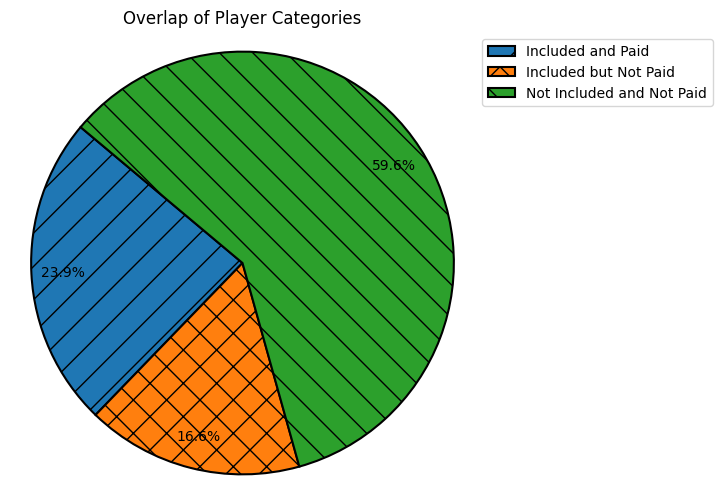

In [ ]:
import matplotlib.pyplot as plt

# Data for the pie chart
sizes = [1839, 3115 - 1839, 7702 - 3115]
labels = ['Included and Paid', 'Included but Not Paid', 'Not Included and Not Paid']

# Hatching patterns for each slice
hatches = ['/', 'x', '\\']

# Create a pie chart with hatching
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=None, autopct='%1.1f%%', startangle=140, colors=['#1f77b4', '#ff7f0e', '#2ca02c'], wedgeprops={'edgecolor': 'black', 'linewidth': 1.5}, pctdistance=0.85, hatch=hatches)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a legend outside the pie chart
plt.legend(labels, loc='upper left', bbox_to_anchor=(1, 1))

# Add a title
plt.title("Overlap of Player Categories")

# Display the pie chart
plt.show()



In [ ]:
test_combined_churns_df

division_player_id  division_id  player_id  \
14539               16726         4024      15343   
14538               16725         4024      15306   
14733               16944         4060      15028   
14732               16943         4060      15306   
14730               16941         4060      15343   
...                   ...          ...        ...   
6968                 8377         2639       7593   
6967                 8376         2639       1600   
6966                 8375         2639       8210   
6965                 8374         2639       1706   
0                       1            3         11   

                             List of seasons included in  division_name  \
14539                                       [2380, 2390]              1   
14538                                       [2380, 2390]              1   
14733                                       [2380, 2390]              1   
14732                                       [2380, 2390]              1   
14730                                       [2380, 2390]              1   
...                                                  ...            ...   
6968   [2066, 2073, 2078, 2085, 2090, 2097, 2104, 210...              6   
6967   [102, 110, 118, 2005, 2012, 2024, 2031, 2036, ...              6   
6966          [2097, 2104, 2108, 2114, 2118, 2123, 2127]              6   
6965   [110, 118, 2005, 2012, 2024, 2031, 2036, 2044,...              6   
0                              [1, 2, 3, 11, 12, 15, 29]              3   

       season_id  league_id List of all leagues played in  \
14539       2380       2045                        [2045]   
14538       2380       2045                        [2045]   
14733       2390       2045                        [2045]   
14732       2390       2045                        [2045]   
14730       2390       2045                        [2045]   
...          ...        ...                           ...   
6968        2104          1                           [1]   
6967        2104          1                           [1]   
6966        2104          1                           [1]   
6965        2104          1                           [1]   
0              1          1                           [1]   

       First_league_included_in  Second_league_included_in  ...  \
14539                      2045                          0  ...   
14538                      2045                          0  ...   
14733                      2045                          0  ...   
14732                      2045                          0  ...   
14730                      2045                          0  ...   
...                         ...                        ...  ...   
6968                          1                          0  ...   
6967                          1                          0  ...   
6966                          1                          0  ...   
6965                          1                          0  ...   
0                             1                          0  ...   

       churn_count_from_first_league  churned_seasons_from_second_league  \
14539                              0                                  []   
14538                              0                                  []   
14733                              0                                  []   
14732                              0                                  []   
14730                              0                                  []   
...                              ...                                 ...   
6968                               1                                  []   
6967                               1                                  []   
6966                               1                                  []   
6965                               1                                  []   
0                                  2                                  []   

      churn_count_

Create features 2: Create a column for opponents in this division

In [ ]:
#Create features 2: Creating division_opponents_df
#Create a column for opponents in this division and add to the by_player_by_season dataframe
#This involves creating a sub-dictionary called Division_opponents

#Create test df for this function
test_division_opponents_df=test_combined_churns_df

# Create an empty dictionary to store division opponents
Division_opponents = {}

# Add the 'Set of opponents' column to the DataFrame
test_division_opponents_df['Set of opponents'] = None

# Iterate through each row
for index, row in test_division_opponents_df.iterrows():
    division_id = row['division_id']
    season_id = row['season_id']
    player_id = row['player_id']

    # Filter rows with the same division and season
    division_season_rows = test_division_opponents_df[(test_division_opponents_df['division_id'] == division_id) & (test_division_opponents_df['season_id'] == season_id)]

    # Extract the list of opponents (player_ids)
    opponents = division_season_rows['player_id'].tolist()

    # # Remove the current player from the list of opponents
    opponents.remove(player_id)

    # Store the opponents list in the 'Set of opponents' column
    test_division_opponents_df.at[index, 'Set of opponents'] = opponents

    # Update the Division_opponents dictionary
    if division_id not in Division_opponents:
        Division_opponents[division_id] = opponents

# Display the updated DataFrame
print(test_division_opponents_df)

# Display the Division_opponents dictionary
# print(Division_opponents)
# Display the Division_opponents dictionary in descending order of keys
# for key in sorted(Division_opponents.keys(), reverse=True):
#     print(key, ":", Division_opponents[key])



       division_player_id  division_id  player_id  \
14539               16726         4024      15343   
14538               16725         4024      15306   
14733               16944         4060      15028   
14732               16943         4060      15306   
14730               16941         4060      15343   
...                   ...          ...        ...   
6968                 8377         2639       7593   
6967                 8376         2639       1600   
6966                 8375         2639       8210   
6965                 8374         2639       1706   
0                       1            3         11   

                             List of seasons included in  division_name  \
14539                                       [2380, 2390]              1   
14538                                       [2380, 2390]              1   
14733                                       [2380, 2390]              1   
14732                                       [2380, 2390]       

In [ ]:
#Create dictionary of players per division. A lot of stats pertain to this, so can live in this dictionary.

def create_dict_players_per_division(df):
  # Create an empty dictionary to store division opponents
  players_per_division_dict = {}

  # # Add the 'Set of opponents' column to the DataFrame
  # test_division_opponents_df['Set of opponents'] = None

  # Iterate through each row
  for index, row in df.iterrows():
      division_id = row['division_id']
      season_id = row['season_id']
      player_id = row['player_id']

      # Filter rows with the same division and season
      division_season_rows = df[(df['division_id'] == division_id) & (df['season_id'] == season_id)]

      # Extract the list of players (player_ids)
      players = division_season_rows['player_id'].tolist()

      # # Remove the current player from the list of opponents
      # opponents.remove(player_id)

      # Store the opponents list in the 'Set of opponents' column
      # test_division_opponents_df.at[index, 'Set of opponents'] = opponents

      # Update the players_per_division_dict dictionary
      if division_id not in players_per_division_dict:
          players_per_division_dict[division_id] = players
  return players_per_division_dict

  # Display the updated DataFrame
  # print(test_division_opponents_df)

  # Display the Division_opponents dictionary
  # print(Division_opponents)
  # Display the Division_opponents dictionary in descending order of keys
  # for key in sorted(Division_opponents.keys(), reverse=True):
  #     print(key, ":", Division_opponents[key])

# Assuming your DataFrame is named test_division_opponents_df
players_per_division_dict = create_dict_players_per_division(test_division_opponents_df)



print(players_per_division_dict )

# # Create a sorted dictionary in descending order of keys
# players_per_division_dict = {key: Division_opponents[key] for key in sorted(Division_opponents.keys(), reverse=True)}

print(players_per_division_dict[4210]) if 4210 in players_per_division_dict else print("Division 4210 not found")

# Display the players_per_division_dict
for key in sorted(players_per_division_dict.keys(), reverse=True):
    print(key, ":", players_per_division_dict[key])


{4024: [15343, 15306, 15462, 15028, 7880], 4060: [15028, 15306, 15343, 15462, 7880, 15631], 3855: [15070, 894, 15069, 15112, 15148], 3854: [15069, 15070, 15019, 14955, 14953, 15018], 3888: [15182, 15175, 15173, 15172], 3887: [15148, 15181, 15112, 15184, 894], 3886: [14953, 14955, 15018, 15069, 15070, 15019], 3876: [15101, 15106, 15103], 3875: [14841, 14941, 14661, 10998, 10999], 3933: [15101, 15373, 15103, 15286, 15227], 3932: [15167, 15312, 14841, 10998, 15255, 10999], 4154: [15960, 15965, 15227, 15286, 15962, 15666], 3961: [15414, 15101, 15286, 15227, 15255, 10999], 3902: [14661, 15167, 14941, 14841, 10998, 10999], 3903: [15106, 15101, 15103, 15227], 4063: [15286, 15485, 15666, 15227, 9457, 15661], 4034: [15608, 15479, 15227, 15485, 15286, 15101, 9457, 15661], 4114: [15286, 15227, 15821, 15805, 9457], 4087: [15485, 15286, 15227, 15666, 9457, 15661], 4006: [15101, 15479, 15485, 15286, 15227, 9457], 3985: [15227, 15457, 15332, 15485], 3984: [15503, 15286, 15101, 15414, 9457, 15255, 109

In [ ]:
print(players_per_division_dict)
print(len(players_per_division_dict))
print(players_per_division_dict[4210]) if 4210 in players_per_division_dict else print("Division 4210 not found")

{4024: [15343, 15306, 15462, 15028, 7880], 4060: [15028, 15306, 15343, 15462, 7880, 15631], 3855: [15070, 894, 15069, 15112, 15148], 3854: [15069, 15070, 15019, 14955, 14953, 15018], 3888: [15182, 15175, 15173, 15172], 3887: [15148, 15181, 15112, 15184, 894], 3886: [14953, 14955, 15018, 15069, 15070, 15019], 3876: [15101, 15106, 15103], 3875: [14841, 14941, 14661, 10998, 10999], 3933: [15101, 15373, 15103, 15286, 15227], 3932: [15167, 15312, 14841, 10998, 15255, 10999], 4154: [15960, 15965, 15227, 15286, 15962, 15666], 3961: [15414, 15101, 15286, 15227, 15255, 10999], 3902: [14661, 15167, 14941, 14841, 10998, 10999], 3903: [15106, 15101, 15103, 15227], 4063: [15286, 15485, 15666, 15227, 9457, 15661], 4034: [15608, 15479, 15227, 15485, 15286, 15101, 9457, 15661], 4114: [15286, 15227, 15821, 15805, 9457], 4087: [15485, 15286, 15227, 15666, 9457, 15661], 4006: [15101, 15479, 15485, 15286, 15227, 9457], 3985: [15227, 15457, 15332, 15485], 3984: [15503, 15286, 15101, 15414, 9457, 15255, 109

In [ ]:
#Export players_per_division_df holding the dictionary as csv for hardcopy version


# Convert the dictionary to a DataFrame
players_per_division_df = pd.DataFrame(players_per_division_dict.items(), columns=['division_id', 'players'])

# Export the DataFrame as CSV
players_per_division_df.to_csv("players_per_division_dict.csv", index=False)

# Verify that the CSV file was created
!ls "players_per_division_dict.csv"
# In this code, we first convert the players_per_division_dict dictionary to a DataFrame named players_per_division_df with two columns: division_id and opponents. Then we use .to_csv() to export the DataFrame to a CSV file. The index=False argument ensures that the index column is not included in the CSV file.

# After running this code, you should have the players_per_division_dict.csv file containing the exported data.






players_per_division_dict.csv


In [ ]:
#To calculate total number of players in the players_per_division_dict
total_elements = sum(len(value) for value in players_per_division_dict.values())
print(total_elements)

#To get number of divisions
print(len(players_per_division_dict))


15578
2752


Interpretation. By multiplying these numbers, (15578 and 2752) I get the number of keys in a potential dictionary for all player_id_division_id pairs. This gives 42870656, so over 42million entries.
This is too large, so instead of using this dictionary, new columns will be added to the dataframe for each 'per division per player' metric.



In [ ]:
test_division_opponents_df
output_file_path = 'test_division_opponents_df.csv'

test_division_opponents_df.to_csv(output_file_path)

In [ ]:
test_division_opponents_df

division_player_id  division_id  player_id  \
14539               16726         4024      15343   
14538               16725         4024      15306   
14733               16944         4060      15028   
14732               16943         4060      15306   
14730               16941         4060      15343   
...                   ...          ...        ...   
6968                 8377         2639       7593   
6967                 8376         2639       1600   
6966                 8375         2639       8210   
6965                 8374         2639       1706   
0                       1            3         11   

                             List of seasons included in  division_name  \
14539                                       [2380, 2390]              1   
14538                                       [2380, 2390]              1   
14733                                       [2380, 2390]              1   
14732                                       [2380, 2390]              1   
14730                                       [2380, 2390]              1   
...                                                  ...            ...   
6968   [2066, 2073, 2078, 2085, 2090, 2097, 2104, 210...              6   
6967   [102, 110, 118, 2005, 2012, 2024, 2031, 2036, ...              6   
6966          [2097, 2104, 2108, 2114, 2118, 2123, 2127]              6   
6965   [110, 118, 2005, 2012, 2024, 2031, 2036, 2044,...              6   
0                              [1, 2, 3, 11, 12, 15, 29]              3   

       season_id  league_id List of all leagues played in  \
14539       2380       2045                        [2045]   
14538       2380       2045                        [2045]   
14733       2390       2045                        [2045]   
14732       2390       2045                        [2045]   
14730       2390       2045                        [2045]   
...          ...        ...                           ...   
6968        2104          1                           [1]   
6967        2104          1                           [1]   
6966        2104          1                           [1]   
6965        2104          1                           [1]   
0              1          1                           [1]   

       First_league_included_in  Second_league_included_in  ...  \
14539                      2045                          0  ...   
14538                      2045                          0  ...   
14733                      2045                          0  ...   
14732                      2045                          0  ...   
14730                      2045                          0  ...   
...                         ...                        ...  ...   
6968                          1                          0  ...   
6967                          1                          0  ...   
6966                          1                          0  ...   
6965                          1                          0  ...   
0                             1                          0  ...   

       churned_seasons_from_second_league  churn_count_from_second_league  \
14539                                  []                               0   
14538                                  []                               0   
14733                                  []                               0   
14732                                  []                               0   
14730                                  []                               0   
...                                   ...                             ...   
6968                                   []                               0   
6967                                   []                               0   
6966                                   []                               0   
6965                                   []                               0   
0                                      []                               0   

      

In [ ]:
#Change datatype of column challengee_id to nullable integers (Int64), which can represent both integer values and NaN.

apccg_df['challengee_id'] = pd.to_numeric(apccg_df['challengee_id'], errors='coerce').astype('Int64')

apccg_df

game_id  season_id  division_id  winner_id  \
0              0       <NA>         <NA>       <NA>   
1              0       <NA>         <NA>       <NA>   
2              0       <NA>         <NA>       <NA>   
3              0       <NA>         <NA>       <NA>   
4              0       <NA>         <NA>       <NA>   
...          ...        ...          ...        ...   
1021598    17275       2424         4182        673   
1021599    17276       2425         4188      15345   
1021600    17276       2425         4188      15345   
1021601    17277       2426         4195      15895   
1021602    17277       2426         4195      15895   

                               score  Played_a_game  Received_inputted_game  \
0                                NaN           <NA>                    <NA>   
1                                NaN           <NA>                    <NA>   
2                                NaN           <NA>                    <NA>   
3                                NaN           <NA>                    <NA>   
4                                NaN           <NA>                    <NA>   
...                              ...            ...                     ...   
1021598            15-13,16-14,15-10              1                       1   
1021599         9-15,15-9,15-9,15-12              1                    <NA>   
1021600         9-15,15-9,15-9,15-12              1                       1   
1021601  14-16,15-7,15-7,14-16,15-11              1                    <NA>   
1021602  14-16,15-7,15-7,14-16,15-11              1                       1   

        Inputted_game_result  game_player_id  challenge_id  ...  comm_send  \
0                        NaN               0             0  ...          0   
1                        NaN               0             0  ...          0   
2                        NaN               0             0  ...          0   
3                        NaN               0             0  ...          0   
4                        NaN               0             0  ...          0   
...                      ...             ...           ...  ...        ...   
1021598                  NaN           15734             0  ...          0   
1021599                    1           15345             0  ...          0   
1021600                  NaN           15947             0  ...          0   
1021601                    1           15877             0  ...          0   
1021602                  NaN           15895             0  ...          0   

         comm_read  Involved_in_Comms  Received_comms activity_log_log_id  \
0             <NA>               <NA>            <NA>                   0   
1             <NA>               <NA>            <NA>                   0   
2             <NA>               <NA>            <NA>                   0   
3             <NA>               <NA>            <NA>                   0   
4             <NA>               <NA>            <NA>                   0   
...            ...                ...             ...                 ...   
1021598       <NA>               <NA>            <NA>                   0   
1021599       <NA>               <NA>            <NA>                   0   
1021600       <NA>               <NA>            <NA>                   0   
1021601       <NA>               <NA>            <NA>                   0   
1021602       <NA>               <NA>            <NA>                   0   

         activity_log_log_msg payments_log_negativespace_payment_id  \
0                         NaN                                   176   
1                         NaN                                   173   
2                         NaN                                   171   
3                         NaN                                   172   
4                         NaN                                   174   
...                       ...                                   ...   
1021598                   NaN           

In [ ]:
#Finding how many rows in apccg have a real division_id and season_id

# Finding how many rows in apccg have a real division_id
num_rows_with_division = apccg_df['division_id'].notna().sum()
print("Number of rows with division_id not NaN:", num_rows_with_division)

#To find not null and not 0
num_rows_with_division2 = ((apccg_df['division_id'].notna()) & (apccg_df['division_id'] != 0)).sum()
print("Number of rows with division_id not NaN and not 0:", num_rows_with_division2)


#Finding how many rows in apccg have a real season_id
num_rows_with_season = apccg_df['season_id'].notna().sum()
print("Number of rows with season_id not NaN:", num_rows_with_season)

#To find not null and not 0
num_rows_with_season2 = ((apccg_df['season_id'].notna()) & (apccg_df['season_id'] != 0)).sum()
print("Number of rows with season_id not NaN and not 0:", num_rows_with_season2)

Number of rows with division_id not NaN: 33574
Number of rows with division_id not NaN and not 0: 33574
Number of rows with season_id not NaN: 33574
Number of rows with season_id not NaN and not 0: 33574


Interpretation: All the games data from the games table have season and division already populated. No other rows do have this data.

In [ ]:
# Calculate metrics and store them in a new column
# test_apccg_df=apccg_df
# def calculate_metrics(row):
#     division_id = row['division_id']
#     player_id = row['player_id']

#     # Calculate your metric based on division_id and player_id
#     metric_value = calculate_metric_value(division_id, player_id)

#     return metric_value

# # Assuming your DataFrame is named df
# test_apccg_df['new_metric_column'] = test_apccg_df.apply(calculate_metrics, axis=1)

In [ ]:
#convert the date column in a DataFrame to the datetime data type
updated_test_apccg_df=apccg_df

#datatype before the switch
column_dtype = updated_test_apccg_df['date'].dtype
print('date datatype before function is ', column_dtype)

def convert_date_column_to_datetime(dataframe, date_column_name):
    dataframe[date_column_name] = pd.to_datetime(dataframe[date_column_name])
    return dataframe

# Convert 'date' column to datetime data type
updated_test_apccg_df = convert_date_column_to_datetime(updated_test_apccg_df, 'date')

#Prove it worked
column_dtype = updated_test_apccg_df['date'].dtype
print('date datatype is ', column_dtype)

#Convert columns 'season_date' and 'season_date_end' from the seasons_df to datetime datatype
updated_seasons_df = convert_date_column_to_datetime(seasons_df, 'season_date')
updated_seasons_df = convert_date_column_to_datetime(seasons_df, 'season_date_end')

#Prove it worked
column1_dtype = updated_seasons_df['season_date'].dtype
print('season_date datatype is ', column1_dtype)

column2_dtype = updated_seasons_df['season_date_end'].dtype
print('season_date_end datatype is ',column2_dtype)

#Check chalengee_id datatype
column_dtype = updated_test_apccg_df['challengee_id'].dtype
print('challengee_id datatype is ', column_dtype)

#Check datatype for payments_log_negativespace_payment_seasons
column_dtype = updated_test_apccg_df['payments_log_negativespace_payment_seasons'].dtype
print('payments_log_negativespace_payment_seasons datatype is ', column_dtype)

date datatype before function is  datetime64[ns]
date datatype is  datetime64[ns]
season_date datatype is  datetime64[ns]
season_date_end datatype is  datetime64[ns]
challengee_id datatype is  Int64
payments_log_negativespace_payment_seasons datatype is  Int64


In [ ]:
updated_test_apccg_df
# Get the columns and datatypes
columns = updated_test_apccg_df.columns
dtypes = updated_test_apccg_df.dtypes

print(columns)
print(dtypes)

In [ ]:
updated_test_apccg_df

In [ ]:
#Proving the season_id and division_id are not populated in the main dataframe if there is a challenge within a season.
#Create test df of 5 rows with some challenge_id data in
filtered_df = updated_test_apccg_df[updated_test_apccg_df['challenge_id'] != 0].head(5)

print(filtered_df)

#Export filtered_df
filtered_df.to_csv('filtered_df.csv', index=False)

        game_id  season_id  division_id  winner_id score  Played_a_game  \
918230        0       <NA>         <NA>       <NA>   NaN           <NA>   
918231        0       <NA>         <NA>       <NA>   NaN           <NA>   
918232        0       <NA>         <NA>       <NA>   NaN           <NA>   
918233        0       <NA>         <NA>       <NA>   NaN           <NA>   
918234        0       <NA>         <NA>       <NA>   NaN           <NA>   

        Received_inputted_game Inputted_game_result  game_player_id  \
918230                    <NA>                  NaN               0   
918231                    <NA>                  NaN               0   
918232                    <NA>                  NaN               0   
918233                    <NA>                  NaN               0   
918234                    <NA>                  NaN               0   

        challenge_id  ...  comm_send  comm_read  Involved_in_Comms  \
918230            39  ...          0       <NA>     

In [ ]:
#Create a smaller df with just challenges and checking number of challenges
#Code to slice big apccg dataframe to just those rows with challenges and both players
challenges_w_challengee_filtered_df = updated_test_apccg_df[(updated_test_apccg_df['challenge_id'] != 0) & (updated_test_apccg_df['challenger_id'] != 0)]
challenges_filtered_df = updated_test_apccg_df[(updated_test_apccg_df['challenge_id']!= 0)]

print('Number of challenges with challengee', len(challenges_w_challengee_filtered_df))
print('Number of challenges', len(challenges_filtered_df))


# print(challenges_filtered_df)

#Number of unique challenge_id
print('Number of unique challenge_id:', len(challenges_w_challengee_filtered_df['challenge_id'].unique()))
# print(challenges_filtered_df)

# Get the row for challenge_id=34993
row_34993 = challenges_w_challengee_filtered_df[challenges_w_challengee_filtered_df['challenge_id'] == 34993]
# print(row_34993)

# Get the columns numbered 0-3 and 9-15
row_34993_imp_cols = row_34993[['game_id', 'season_id', 'division_id', 'challenge_id', 'challenger_id', 'challengee_id', 'date']]
print(row_34993_imp_cols)




Number of challenges with challengee 34934
Number of challenges 69799
Number of unique challenge_id: 34934
        game_id  season_id  division_id  challenge_id  challenger_id  \
988028        0       <NA>         <NA>         34993          15734   

        challengee_id       date  
988028          16008 2023-02-08  


In [ ]:
#Code to give the number of rows where the columns challenge_id contain real numbers
no_of_challenges=len(updated_test_apccg_df[(updated_test_apccg_df['challenge_id'] != 0) & pd.notna(updated_test_apccg_df['challenge_id'])])
print('No of challenge rows: ', no_of_challenges)

#Code to give the number of rows where the columns challenge_id, season_id, or division_id contain real numbers
no_of_challenge_rows_w_data=len(updated_test_apccg_df[
    (updated_test_apccg_df['challenge_id'] != 0) &
    pd.notna(updated_test_apccg_df['challenge_id']) &
    (updated_test_apccg_df['season_id'] != 0) &
    pd.notna(updated_test_apccg_df['season_id']) &
    (updated_test_apccg_df['division_id'] != 0) &
    pd.notna(updated_test_apccg_df['division_id'])
])

print('No of challenge rows with season data: ', no_of_challenge_rows_w_data)

No of challenge rows:  69799
No of challenge rows with season data:  0


There are 69799 challenge rows in the dataframe and none have season or division data in yet.

In [ ]:
updated_test_apccg_df

In [ ]:
#Create features 3b: Function populate_division_id_for_challenges and helper functions
#This is needed to populate division_id for challenges in main dataframe apccg_df

import pandas as pd


def get_included_seasons(player_id, inclusion_df):
    # Find the rows where player_id in the Inclusion_df = player_id provided to the function
    filtered_df = inclusion_df[inclusion_df['player_id'] == player_id]

    # Check if filtered_df is empty
    if filtered_df.empty:
        return []

    # Get the list of seasons directly from the DataFrame
    included_seasons = filtered_df.at[filtered_df.index[0], 'List of seasons included in']

    return included_seasons


def get_season_info(season_id, seasons_df):
    # Find the row corresponding where the given season_id is the same as the value in the seasons_df season_id column
    row = seasons_df[seasons_df['season_id'] == season_id]

    return {
    'season_date': row['season_date'].iloc[0],
    'season_date_end': row['season_date_end'].iloc[0]
}


def get_opponents_set(season_id, player_id, test_division_opponents_df):
    # Find all matches from the test_division_opponents_df where the season_id and player_id given match the season_id and player_id column values
    rows = test_division_opponents_df[
        (test_division_opponents_df['season_id'] == season_id) &
        (test_division_opponents_df['player_id'] == player_id)
    ]

    # Initialize an empty list
    opponents_set = []

    # Iterate over the rows
    for _, row in rows.iterrows():
        # Add the 'Set of opponents' value to the list
        opponents_set.extend(row['Set of opponents'])

    # Return the list
    return opponents_set

def get_division_id(season_id, player_id, test_division_opponents_df):
    # Find the row where the season_id and player_id given match the values in the season_id column and player_id column of the test_division_opponents_df
    row = test_division_opponents_df[
        (test_division_opponents_df['season_id'] == season_id) &
        (test_division_opponents_df['player_id'] == player_id)
    ]

    # Return the division_id for that row
    return row['division_id'].iloc[0]

def reduce_to_just_challenges(df):
    relevant_columns = ['challenge_id', 'challenger_id', 'challengee_id', 'date']
    reduced_df = df[relevant_columns].dropna(subset=['challenge_id', 'challenger_id', 'challengee_id', 'date'])

    # Filter out rows where challenge_id is equal to 0
    reduced_df = reduced_df[reduced_df['challenge_id'] != 0]

    return reduced_df

def populate_division_id_for_challenges(apccg_df, test_division_opponents_df, inclusion_df, seasons_df):
    counter = 0

    # Create a copy of the input DataFrame
    apccg_copy = apccg_df.copy()

    reduced_df = reduce_to_just_challenges(apccg_copy)

    for index, row in reduced_df.iterrows():
        challenge_id = row['challenge_id']
        challenger_id = row['challenger_id']
        challengee_id = row['challengee_id']

        included_seasons = get_included_seasons(challenger_id, inclusion_df)

        for season_id in included_seasons:
            season_info = get_season_info(season_id, seasons_df)
            season_date = season_info['season_date']
            season_date_end = season_info['season_date_end']

            challenge_date = row['date']
            season_date = pd.to_datetime(season_date)
            season_date_end = pd.to_datetime(season_date_end)
            challenge_date = pd.to_datetime(challenge_date)

            if season_date <= challenge_date <= season_date_end:
                opponents_set = get_opponents_set(season_id, challenger_id, test_division_opponents_df)

                if challengee_id in opponents_set:
                    division_id = get_division_id(season_id, challenger_id, test_division_opponents_df)

                    apccg_copy.at[index, 'season_id'] = season_id
                    apccg_copy.at[index, 'division_id'] = division_id

                    counter += 1
                    break

    print("Populated season_id and division_id for", counter, "rows")
    return apccg_copy






# Call the function with your dataframes
# updated_test_apccg_df = populate_division_id_for_challenges(updated_test_apccg_df, test_division_opponents_df, inclusion_df, updated_seasons_df)


# Call the function with your dataframes
# updated_test_apccg_df = populate_division_id_for_challenges(updated_test_apccg_df, test_division_opponents_df, inclusion_df, updated_seasons_df)



# Assuming you have loaded the necessary DataFrames: apccg_df, test_division_opponents_df, inclusion_df, seasons_df

# Call the function on the tester df
test_filtered_df = populate_division_id_for_challenges(filtered_df, test_division_opponents_df, inclusion_df, updated_seasons_df)
# test_filtered_df

toy_df = test_filtered_df[['season_id', 'division_id', 'challenge_id', 'challenger_id', 'challengee_id']]
print(toy_df)

# display(test_filtered_df)

# Call the function on the real df updated_test_apccg_df
populated_div_and_season_for_challenges_df = populate_division_id_for_challenges(updated_test_apccg_df, test_division_opponents_df, inclusion_df, updated_seasons_df)

# # Display the resulting DataFrame
print(populated_div_and_season_for_challenges_df)




Populated season_id and division_id for 2 rows
        season_id  division_id  challenge_id  challenger_id  challengee_id
918230       <NA>         <NA>            39              0             23
918231          6           23            39              3             23
918232       <NA>         <NA>            40              0             23
918233          6           23            40             16             23
918234       <NA>         <NA>            41              0             24
Populated season_id and division_id for 29821 rows
         game_id  season_id  division_id  winner_id  \
0              0       <NA>         <NA>       <NA>   
1              0       <NA>         <NA>       <NA>   
2              0       <NA>         <NA>       <NA>   
3              0       <NA>         <NA>       <NA>   
4              0       <NA>         <NA>       <NA>   
...          ...        ...          ...        ...   
1021598    17275       2424         4182        673   
1021599    1

Note the function populated_div_and_season_for_challenges_df only populated half the challenges, those where the challengee_id is present. A subsequent function will copy in the populated season_id and division_id for the challenges for rows where the challengee_id is not present.

In [ ]:
#Code to prove function populate_division_id_for_challenges worked on the main df
#Code to give the number of rows where the columns challenge_id contain real numbers
no_of_challenges=len(populated_div_and_season_for_challenges_df[(populated_div_and_season_for_challenges_df['challenge_id'] != 0) & pd.notna(populated_div_and_season_for_challenges_df['challenge_id'])])
print('No of challenge rows: ', no_of_challenges)

#Code to give the number of rows where the columns challenge_id, season_id, or division_id contain real numbers
no_of_challenge_rows_w_data=len(populated_div_and_season_for_challenges_df[
    (populated_div_and_season_for_challenges_df['challenge_id'] != 0) &
    pd.notna(populated_div_and_season_for_challenges_df['challenge_id']) &
    (populated_div_and_season_for_challenges_df['season_id'] != 0) &
    pd.notna(populated_div_and_season_for_challenges_df['season_id']) &
    (populated_div_and_season_for_challenges_df['division_id'] != 0) &
    pd.notna(populated_div_and_season_for_challenges_df['division_id'])
])

print('No of challenge rows with season data: ', no_of_challenge_rows_w_data)

No of challenge rows:  69799
No of challenge rows with season data:  29821


Interpretation: Challenges made within a season are 29821. These need to be doubled, to represent the two people involved in each challenge. 69799-(2 x 29821) = 69799-(59642) = 10157 extra seasonal challenges.

There are 69799 rows of challenges. If all challenges were in a season, then half of this number would have season_id and division_id already populated, and the other half would still need to be populated with season_id and division_id.

In [ ]:
#Check no of rows of season_id and division_id populated in full df
# populated_div_and_season_for_challenges_df

# Count the number of rows where season_id is not null or 0, and division_id is not null or 0
count_valid_rows = len(populated_div_and_season_for_challenges_df[
    (populated_div_and_season_for_challenges_df['season_id'].notnull() | (populated_div_and_season_for_challenges_df['season_id'] != 0)) &
    (populated_div_and_season_for_challenges_df['division_id'].notnull() | (populated_div_and_season_for_challenges_df['division_id'] != 0))
])

print("Number of rows where season_id is not null or 0, and division_id is not null or 0:", count_valid_rows)


Number of rows where season_id is not null or 0, and division_id is not null or 0: 63395


Interpretation: This is the number of rows where season and division are populated, before the action of the filling in function (copy_season_and_division_ids)

Necessary processing: Copy season and division ids into blank cells for other challenge_id

In [ ]:
#Function copy_season_and_division_ids to share the derived season and division data into blank cells for other challenge_id row
def copy_season_and_division_ids(apccg_df):
    apccg_copy = apccg_df.copy()  # Create a copy of the DataFrame

    # Filter rows where challenge_id is not null
    challenge_rows = apccg_copy[apccg_copy['challenge_id'].notnull()]

    # Filter rows where challenge_id is not 0
    challenge_rows = challenge_rows[challenge_rows['challenge_id']!=0]

    print (len(challenge_rows))

    # Group by challenge_id
    challenge_groups = challenge_rows.groupby('challenge_id')

    print (len(challenge_groups))

    for challenge_id, group in challenge_groups:
        non_nan_rows = group.dropna(subset=['season_id', 'division_id'])

        if len(non_nan_rows) > 0:
            copied_season_id = non_nan_rows['season_id'].iloc[0]
            copied_division_id = non_nan_rows['division_id'].iloc[0]

            # Fill NaN values in season_id and division_id only if they are empty
            mask_season = group['season_id'].isnull()
            mask_division = group['division_id'].isnull()

            apccg_copy.loc[group[mask_season].index, 'season_id'] = copied_season_id
            apccg_copy.loc[group[mask_division].index, 'division_id'] = copied_division_id

    return apccg_copy




#Test on toy df
toy_df_w_copied_season_and_division_ids= copy_season_and_division_ids(toy_df)
# toy_df_w_copied_season_and_division_ids

#Test on filtered_df
test_filtered_df_w_copied_season_and_division_ids= copy_season_and_division_ids(test_filtered_df)
# test_filtered_df_w_copied_season_and_division_ids


##Run copy_season_and_division_ids on real df
real_df_w_copied_season_and_division_ids=copy_season_and_division_ids(populated_div_and_season_for_challenges_df)
real_df_w_copied_season_and_division_ids


5
3
5
3
69799
34934


game_id  season_id  division_id  winner_id  \
0              0       <NA>         <NA>       <NA>   
1              0       <NA>         <NA>       <NA>   
2              0       <NA>         <NA>       <NA>   
3              0       <NA>         <NA>       <NA>   
4              0       <NA>         <NA>       <NA>   
...          ...        ...          ...        ...   
1021598    17275       2424         4182        673   
1021599    17276       2425         4188      15345   
1021600    17276       2425         4188      15345   
1021601    17277       2426         4195      15895   
1021602    17277       2426         4195      15895   

                               score  Played_a_game  Received_inputted_game  \
0                                NaN           <NA>                    <NA>   
1                                NaN           <NA>                    <NA>   
2                                NaN           <NA>                    <NA>   
3                                NaN           <NA>                    <NA>   
4                                NaN           <NA>                    <NA>   
...                              ...            ...                     ...   
1021598            15-13,16-14,15-10              1                       1   
1021599         9-15,15-9,15-9,15-12              1                    <NA>   
1021600         9-15,15-9,15-9,15-12              1                       1   
1021601  14-16,15-7,15-7,14-16,15-11              1                    <NA>   
1021602  14-16,15-7,15-7,14-16,15-11              1                       1   

        Inputted_game_result  game_player_id  challenge_id  ...  comm_send  \
0                        NaN               0             0  ...          0   
1                        NaN               0             0  ...          0   
2                        NaN               0             0  ...          0   
3                        NaN               0             0  ...          0   
4                        NaN               0             0  ...          0   
...                      ...             ...           ...  ...        ...   
1021598                  NaN           15734             0  ...          0   
1021599                    1           15345             0  ...          0   
1021600                  NaN           15947             0  ...          0   
1021601                    1           15877             0  ...          0   
1021602                  NaN           15895             0  ...          0   

         comm_read  Involved_in_Comms  Received_comms activity_log_log_id  \
0             <NA>               <NA>            <NA>                   0   
1             <NA>               <NA>            <NA>                   0   
2             <NA>               <NA>            <NA>                   0   
3             <NA>               <NA>            <NA>                   0   
4             <NA>               <NA>            <NA>                   0   
...            ...                ...             ...                 ...   
1021598       <NA>               <NA>            <NA>                   0   
1021599       <NA>               <NA>            <NA>                   0   
1021600       <NA>               <NA>            <NA>                   0   
1021601       <NA>               <NA>            <NA>                   0   
1021602       <NA>               <NA>            <NA>                   0   

         activity_log_log_msg payments_log_negativespace_payment_id  \
0                         NaN                                   176   
1                         NaN                                   173   
2                         NaN                                   171   
3                         NaN                                   172   
4                         NaN                                   174   
...                       ...                                   ...   
1021598                   NaN           

#Explaining function: copy_season_and_division_ids
This is to iterate through rows, find where for a challenge_id there is a season_id and division_id in one row, and duplicate to get another row for that challenge_id number.
It starts by grouping the dataframe apccg_df by the challenge_id value.

Then we iterate through each challenge_id group.
Inside the loop for each challenge_id group, it creates a new  dataframe called non_nan_rows by dropping rows from the full dataframe where either season_id or division_id is NaN.
Assuming we have some data in there, and therefore the non_nan_rows dataframe is not empty, we use this data to populate the fields in other rows.
If there are any non_nan_rows, it extracts the season_id and division_id values from the first row of non_nan_rows using .iloc[0].
It then updates the original DataFrame apccg_df by populating the season_id and division_id values obtained earlier to all the rows in the current group, i.e. those two rows with the same challenge_id.





In [ ]:
#Checking season and division were successfully copied and putting dataframe back in apccg_df variable
apccg_df = real_df_w_copied_season_and_division_ids
# # Select rows where challenge_id=39
# df_filtered_real = real_df_w_copied_season_and_division_ids[real_df_w_copied_season_and_division_ids['challenge_id'] == 39]

# # Print the filtered DataFrame
# print(df_filtered_real)

#Check datatype for apccg_df 'season_id' and division id
# Select rows where challenge_id=39
df_filtered = apccg_df[apccg_df['challenge_id'] == 39]

# Print the filtered DataFrame
print(df_filtered)


# #Find number of rows with real season_id and division_id
# # Check if season_id and division_id are populated with a real integer
# df_season_division = apccg_df[(apccg_df['season_id'].notnull()) & (apccg_df['division_id'].notnull()) & (apccg_df['season_id'] != 0) & (apccg_df['division_id'] != 0)]

# # Get the number of rows
# number_of_rows = df_season_division.shape[0]

# # Print the number of rows
# print(number_of_rows)

        game_id  season_id  division_id  winner_id score  Played_a_game  \
918230        0          6           23       <NA>   NaN           <NA>   
918231        0          6           23       <NA>   NaN           <NA>   

        Received_inputted_game Inputted_game_result  game_player_id  \
918230                    <NA>                  NaN               0   
918231                    <NA>                  NaN               0   

        challenge_id  ...  comm_send  comm_read  Involved_in_Comms  \
918230            39  ...          0       <NA>               <NA>   
918231            39  ...          0       <NA>               <NA>   

        Received_comms activity_log_log_id  activity_log_log_msg  \
918230            <NA>                   0                   NaN   
918231            <NA>                   0                   NaN   

       payments_log_negativespace_payment_id  \
918230                                     0   
918231                                     0   


Interpretation: This is higher than before, 93216 (previously 63395), so 23821 have been added.

In [ ]:
toy_df_w_copied_season_and_division_ids

season_id  division_id  challenge_id  challenger_id  challengee_id
918230          6           23            39              0             23
918231          6           23            39              3             23
918232          6           23            40              0             23
918233          6           23            40             16             23
918234       <NA>         <NA>            41              0             24

In [ ]:
test_filtered_df_w_copied_season_and_division_ids

game_id  season_id  division_id  winner_id score  Played_a_game  \
918230        0          6           23       <NA>   NaN           <NA>   
918231        0          6           23       <NA>   NaN           <NA>   
918232        0          6           23       <NA>   NaN           <NA>   
918233        0          6           23       <NA>   NaN           <NA>   
918234        0       <NA>         <NA>       <NA>   NaN           <NA>   

        Received_inputted_game Inputted_game_result  game_player_id  \
918230                    <NA>                  NaN               0   
918231                    <NA>                  NaN               0   
918232                    <NA>                  NaN               0   
918233                    <NA>                  NaN               0   
918234                    <NA>                  NaN               0   

        challenge_id  ...  comm_send  comm_read  Involved_in_Comms  \
918230            39  ...          0       <NA>               <NA>   
918231            39  ...          0       <NA>               <NA>   
918232            40  ...          0       <NA>               <NA>   
918233            40  ...          0       <NA>               <NA>   
918234            41  ...          0       <NA>               <NA>   

        Received_comms activity_log_log_id  activity_log_log_msg  \
918230            <NA>                   0                   NaN   
918231            <NA>                   0                   NaN   
918232            <NA>                   0                   NaN   
918233            <NA>                   0                   NaN   
918234            <NA>                   0                   NaN   

       payments_log_negativespace_payment_id  \
918230                                     0   
918231                                     0   
918232                                     0   
918233                                     0   
918234                                     0   

       payments_log_negativespace_payment_seasons  datetime  \
918230                                       <NA>       NaN   
918231                                       <NA>       NaN   
918232                                       <NA>       NaN   
918233                                       <NA>       NaN   
918234                                       <NA>       NaN   

        player_paid_for_at_least_one_season  
918230                                    1  
918231                                    1  
918232                                    1  
918233                                    0  
918234                                    1  

[5 rows x 30 columns]

In [ ]:
apccg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1021603 entries, 0 to 1021602
Data columns (total 30 columns):
 #   Column                                      Non-Null Count    Dtype         
---  ------                                      --------------    -----         
 0   game_id                                     1021603 non-null  int64         
 1   season_id                                   93216 non-null    Int64         
 2   division_id                                 93216 non-null    Int64         
 3   winner_id                                   33574 non-null    Int64         
 4   score                                       32940 non-null    object        
 5   Played_a_game                               33574 non-null    Int64         
 6   Received_inputted_game                      16787 non-null    Int64         
 7   Inputted_game_result                        16787 non-null    object        
 8   game_player_id                              1021603 non-null  

Proof that the datatypes within apccg_df are good.

In [ ]:
apccg_df
# Export the DataFrame to a CSV file
apccg_df.to_csv('apccg_df_here.csv', index=False)

In [ ]:
# Test to check copy_season_and_division_ids function worked on real df

#Check just columns of interest in the real df
reduced_real_df = apccg_df[['season_id', 'division_id', 'challenge_id', 'challenger_id', 'challengee_id', 'date']]
print(len(reduced_real_df))

#Filter DataFrame to show where challenge_id is real number and not NaN
reduced_real_df = reduced_real_df[
    (reduced_real_df['challenge_id'].astype(float) != 0) &
    pd.notna(reduced_real_df['challenge_id'])
]


# Print the DataFrame
# print(reduced_real_df)
print(len(reduced_real_df))


# #Check for challeng_id=39
filtered_rows = reduced_real_df[reduced_real_df['challenge_id'] == 39]
print(filtered_rows)
# #Check for challeng_id=41
filtered_rows = reduced_real_df[reduced_real_df['challenge_id'] == 41]
print(filtered_rows)


1021603
69799
        season_id  division_id  challenge_id  challenger_id  challengee_id  \
918230          6           23            39              0             23   
918231          6           23            39              3             23   

             date  
918230 2010-08-06  
918231 2010-08-06  
        season_id  division_id  challenge_id  challenger_id  challengee_id  \
918234       <NA>         <NA>            41              0             24   
918235       <NA>         <NA>            41             41             24   

             date  
918234 2010-08-06  
918235 2010-08-06  


This is proof that season and division id have been copied correctly in the apccg_df.

For challenge_id=39 the season and division id were correctly copied to both rows.

So for challenge_id=41 the function did not find and populate the season_id and division_id because this challenge was made to a player (player_id=24) who on the date (2010-08-06) was not included in a season with the person who sent the challenge (player_id=41). All the <NaN> rows show challenges sent unrelated to a season, for an ad hoc match.

In [ ]:
#Checking how many challenges were outside seasons
#Filter to find real challenges with no season or division data
filtered_rows = reduced_real_df[(reduced_real_df['challenge_id'] != 0) &
                                (reduced_real_df['season_id'].isna()) &
                                (reduced_real_df['division_id'].isna())]
num_filtered_rows = len(filtered_rows)
print("Number of rows with challenge_id not equal to 0 and both season_id and division_id as NaN:", num_filtered_rows)


#Filter to find real challenges with no season or division data
filtered_rows_apccg_df = apccg_df[(apccg_df['challenge_id'] != 0) &
                                (apccg_df['season_id'].isna()) &
                                (apccg_df['division_id'].isna())]
num_filtered_rows_apccg_df = len(filtered_rows_apccg_df)
print("Number of rows in main df with challenge_id not equal to 0 and both season_id and division_id as NaN:", num_filtered_rows_apccg_df)


Number of rows with challenge_id not equal to 0 and both season_id and division_id as NaN: 10157
Number of rows in main df with challenge_id not equal to 0 and both season_id and division_id as NaN: 10157


Insight: There were 10157 challenges sent outside a season for the reduced_real_df and 69799 for the main df. A list of these was made and exported. Insight: There were 2240 unique player_ids who sent a challenge outside a season. These are interesting as they represent challenges made before or after a legitimate season. However, this will not be a created new feature (initially a feature ever_sent_non_season_challenge was proposed).

Creating feature 3a:  Add start and end dates for each season

Creating feature 3: Number of sent challenges that season to an opponent (i.e. on challenger_id for that season)

In [ ]:
#Create new feature 3a:  Add start and end dates for each season into test_division_opponents_df
def populate_season_dates(test_division_opponents_df, seasons_df):
    test_division_opponents_df['season_start_date'] = None
    test_division_opponents_df['season_end_date'] = None

    for index, row in test_division_opponents_df.iterrows():
        season_id = row['season_id']
        season_row = seasons_df[seasons_df['season_id'] == season_id]

        if not season_row.empty:
            test_division_opponents_df.at[index, 'season_start_date'] = season_row['season_date'].iloc[0]
            test_division_opponents_df.at[index, 'season_end_date'] = season_row['season_date_end'].iloc[0]

    return test_division_opponents_df

#Run the function
populate_season_dates(test_division_opponents_df, seasons_df)

#Check new columns are there
test_division_opponents_df

division_player_id  division_id  player_id  \
14539               16726         4024      15343   
14538               16725         4024      15306   
14733               16944         4060      15028   
14732               16943         4060      15306   
14730               16941         4060      15343   
...                   ...          ...        ...   
6968                 8377         2639       7593   
6967                 8376         2639       1600   
6966                 8375         2639       8210   
6965                 8374         2639       1706   
0                       1            3         11   

                             List of seasons included in  division_name  \
14539                                       [2380, 2390]              1   
14538                                       [2380, 2390]              1   
14733                                       [2380, 2390]              1   
14732                                       [2380, 2390]              1   
14730                                       [2380, 2390]              1   
...                                                  ...            ...   
6968   [2066, 2073, 2078, 2085, 2090, 2097, 2104, 210...              6   
6967   [102, 110, 118, 2005, 2012, 2024, 2031, 2036, ...              6   
6966          [2097, 2104, 2108, 2114, 2118, 2123, 2127]              6   
6965   [110, 118, 2005, 2012, 2024, 2031, 2036, 2044,...              6   
0                              [1, 2, 3, 11, 12, 15, 29]              3   

       season_id  league_id List of all leagues played in  \
14539       2380       2045                        [2045]   
14538       2380       2045                        [2045]   
14733       2390       2045                        [2045]   
14732       2390       2045                        [2045]   
14730       2390       2045                        [2045]   
...          ...        ...                           ...   
6968        2104          1                           [1]   
6967        2104          1                           [1]   
6966        2104          1                           [1]   
6965        2104          1                           [1]   
0              1          1                           [1]   

       First_league_included_in  Second_league_included_in  ...  \
14539                      2045                          0  ...   
14538                      2045                          0  ...   
14733                      2045                          0  ...   
14732                      2045                          0  ...   
14730                      2045                          0  ...   
...                         ...                        ...  ...   
6968                          1                          0  ...   
6967                          1                          0  ...   
6966                          1                          0  ...   
6965                          1                          0  ...   
0                             1                          0  ...   

       churned_seasons_from_third_league  churn_count_from_third_league  \
14539                                 []                              0   
14538                                 []                              0   
14733                                 []                              0   
14732                                 []                              0   
14730                                 []                              0   
...                                  ...                            ...   
6968                                  []                              0   
6967                                  []                              0   
6966                                  []                              0   
6965                                  []                              0   
0                                     []                              0   

      churned_seasons_from_fou

In [ ]:
#Export new test_division_opponents_df that includes start and end date per season
# Export the DataFrame to a CSV file
test_division_opponents_df.to_csv('test_division_opponents_df_w_season_dates.csv', index=False)

In [ ]:
# Check datatype of season IDs in 'List of seasons included in' column
list_of_seasons_dtype = test_division_opponents_df['List of seasons included in'].apply(type).unique()
print("Datatype of season IDs in 'List of seasons included in' column:", list_of_seasons_dtype)

# Print the example and its datatype
example = test_division_opponents_df['List of seasons included in'].head(1)


print(example, type(example))
# Split the data at comma
split_data = example.str.split(',')
# Find the datatype of each element
for item in split_data:
    print(item, type(item))

# Check datatype of season IDs in 'season_id' column of seasons_df
season_id_dtype = seasons_df['season_id'].apply(type).unique()
print("Datatype of season IDs in 'season_id' column of seasons_df:", season_id_dtype)


Datatype of season IDs in 'List of seasons included in' column: [<class 'list'>]
14539    [2380, 2390]
Name: List of seasons included in, dtype: object <class 'pandas.core.series.Series'>
nan <class 'float'>
Datatype of season IDs in 'season_id' column of seasons_df: [<class 'int'>]


Interpretation: I needed to change datatype of values in 'List of seasons included in' from str to list. The cell below creates a list of ints for the value. This is crucial to make the below populate_player_season_info function work.

In [ ]:
# Convert season IDs in 'List of seasons included in' column to integers
# test_division_opponents_df['List of seasons included in'] = test_division_opponents_df['List of seasons included in'].apply(lambda x: [int(season_id) for season_id in x.split(',')])

# Check datatype of 'List of seasons included in' for the first row
first_row_seasons_included = test_division_opponents_df.loc[0, 'List of seasons included in']
print("Datatype of 'List of seasons included in' for the first row:", type(first_row_seasons_included))

# Iterate through the elements of the list and check their datatypes
for season_id in first_row_seasons_included:
    print(season_id, type(season_id))


Datatype of 'List of seasons included in' for the first row: <class 'list'>
1 <class 'int'>
2 <class 'int'>
3 <class 'int'>
11 <class 'int'>
12 <class 'int'>
15 <class 'int'>
29 <class 'int'>


In [ ]:
# Check datatype of season IDs in 'List of seasons included in' column
list_of_seasons_dtype = test_division_opponents_df['List of seasons included in'].apply(type).unique()
print("Datatype of season IDs in 'List of seasons included in' column:", list_of_seasons_dtype)

# Find the first example of 'List of seasons included in'
example = test_division_opponents_df['List of seasons included in'].head(1)

# Print the example and its datatype
print(example, type(example))
for season_id in example:
    print(season_id, type(season_id))

# # Split the data at comma
# split_data = example.str.split(',')
# # Find the datatype of each element
# for item in split_data:
#     print(item, type(item))

# Check datatype of season IDs in 'season_id' column of seasons_df
season_id_dtype = seasons_df['season_id'].apply(type).unique()
print("Datatype of season IDs in 'season_id' column of seasons_df:", season_id_dtype)

Datatype of season IDs in 'List of seasons included in' column: [<class 'list'>]
14539    [2380, 2390]
Name: List of seasons included in, dtype: object <class 'pandas.core.series.Series'>
[2380, 2390] <class 'list'>
Datatype of season IDs in 'season_id' column of seasons_df: [<class 'int'>]


In [ ]:
test_division_opponents_df

# # Drop the column
# test_division_opponents_df = test_division_opponents_df.drop('Dictionary of seasons included in with dates', axis=1)

# print(test_division_opponents_df)

division_player_id  division_id  player_id  \
14539               16726         4024      15343   
14538               16725         4024      15306   
14733               16944         4060      15028   
14732               16943         4060      15306   
14730               16941         4060      15343   
...                   ...          ...        ...   
6968                 8377         2639       7593   
6967                 8376         2639       1600   
6966                 8375         2639       8210   
6965                 8374         2639       1706   
0                       1            3         11   

                             List of seasons included in  division_name  \
14539                                       [2380, 2390]              1   
14538                                       [2380, 2390]              1   
14733                                       [2380, 2390]              1   
14732                                       [2380, 2390]              1   
14730                                       [2380, 2390]              1   
...                                                  ...            ...   
6968   [2066, 2073, 2078, 2085, 2090, 2097, 2104, 210...              6   
6967   [102, 110, 118, 2005, 2012, 2024, 2031, 2036, ...              6   
6966          [2097, 2104, 2108, 2114, 2118, 2123, 2127]              6   
6965   [110, 118, 2005, 2012, 2024, 2031, 2036, 2044,...              6   
0                              [1, 2, 3, 11, 12, 15, 29]              3   

       season_id  league_id List of all leagues played in  \
14539       2380       2045                        [2045]   
14538       2380       2045                        [2045]   
14733       2390       2045                        [2045]   
14732       2390       2045                        [2045]   
14730       2390       2045                        [2045]   
...          ...        ...                           ...   
6968        2104          1                           [1]   
6967        2104          1                           [1]   
6966        2104          1                           [1]   
6965        2104          1                           [1]   
0              1          1                           [1]   

       First_league_included_in  Second_league_included_in  ...  \
14539                      2045                          0  ...   
14538                      2045                          0  ...   
14733                      2045                          0  ...   
14732                      2045                          0  ...   
14730                      2045                          0  ...   
...                         ...                        ...  ...   
6968                          1                          0  ...   
6967                          1                          0  ...   
6966                          1                          0  ...   
6965                          1                          0  ...   
0                             1                          0  ...   

       churned_seasons_from_third_league  churn_count_from_third_league  \
14539                                 []                              0   
14538                                 []                              0   
14733                                 []                              0   
14732                                 []                              0   
14730                                 []                              0   
...                                  ...                            ...   
6968                                  []                              0   
6967                                  []                              0   
6966                                  []                              0   
6965                                  []                              0   
0                                     []                              0   

      churned_seasons_from_fou

In [ ]:
#Create features 3: Function to create number_of_sent_challenges_per_player_and_season in test_division_opponents_df
import pandas as pd

def number_of_sent_challenges_per_player_and_season(apccg_df, test_division_opponents_df):
    test_division_opponents_df['challenges_sent_this_season'] = None
    test_division_opponents_df['number_of_sent_challenges_to_opponent'] = 0

    grouped_opponents_df = test_division_opponents_df.groupby('player_id')

    for _, challenge_row in apccg_df.iterrows():
        challenger_id = challenge_row['challenger_id']
        challenge_id = challenge_row['challenge_id']

        if pd.notna(challenger_id) and challenger_id != 0:
            if pd.notna(challenge_id) and challenge_id != 0:
                challengee_id = challenge_row['challengee_id']
                challenge_date = challenge_row['date']

                if challenger_id in grouped_opponents_df.groups:
                    rows_for_challenger = grouped_opponents_df.get_group(challenger_id)

                    for index, row in rows_for_challenger.iterrows():
                        season_start_date = row['season_start_date']
                        season_end_date = row['season_end_date']

                        if (challengee_id in row['Set of opponents'] and
                            season_start_date <= challenge_date <= season_end_date):

                            if row['challenges_sent_this_season'] is None:
                                test_division_opponents_df.at[index, 'challenges_sent_this_season'] = []
                            test_division_opponents_df.at[index, 'challenges_sent_this_season'].append(challenge_id)
                            test_division_opponents_df.at[index, 'number_of_sent_challenges_to_opponent'] = len(test_division_opponents_df.at[index, 'challenges_sent_this_season'])
                    continue

    return test_division_opponents_df


keep_it_safe=test_division_opponents_df

division_opponents_w_dates_and_no_of_challenges_df=number_of_sent_challenges_per_player_and_season(apccg_df, test_division_opponents_df)

In [ ]:
display(division_opponents_w_dates_and_no_of_challenges_df)

#Investigate max and min challenges sent per season
# Find the maximum and minimum values
max_value = division_opponents_w_dates_and_no_of_challenges_df['number_of_sent_challenges_to_opponent'].max()
min_value = division_opponents_w_dates_and_no_of_challenges_df['number_of_sent_challenges_to_opponent'].min()

# Print the maximum and minimum values
print('The maximum value is', max_value)
print('The minimum value is', min_value)

#Showing most active challenger
# Find the row where number_of_sent_challenges_to_opponent is equal to 34
row = division_opponents_w_dates_and_no_of_challenges_df[division_opponents_w_dates_and_no_of_challenges_df['number_of_sent_challenges_to_opponent'] == 34]

# Print the player_id and season_id columns
print(row[['player_id', 'season_id']])


division_player_id  division_id  player_id  \
14539               16726         4024      15343   
14538               16725         4024      15306   
14733               16944         4060      15028   
14732               16943         4060      15306   
14730               16941         4060      15343   
...                   ...          ...        ...   
6968                 8377         2639       7593   
6967                 8376         2639       1600   
6966                 8375         2639       8210   
6965                 8374         2639       1706   
0                       1            3         11   

                             List of seasons included in  division_name  \
14539                                       [2380, 2390]              1   
14538                                       [2380, 2390]              1   
14733                                       [2380, 2390]              1   
14732                                       [2380, 2390]              1   
14730                                       [2380, 2390]              1   
...                                                  ...            ...   
6968   [2066, 2073, 2078, 2085, 2090, 2097, 2104, 210...              6   
6967   [102, 110, 118, 2005, 2012, 2024, 2031, 2036, ...              6   
6966          [2097, 2104, 2108, 2114, 2118, 2123, 2127]              6   
6965   [110, 118, 2005, 2012, 2024, 2031, 2036, 2044,...              6   
0                              [1, 2, 3, 11, 12, 15, 29]              3   

       season_id  league_id List of all leagues played in  \
14539       2380       2045                        [2045]   
14538       2380       2045                        [2045]   
14733       2390       2045                        [2045]   
14732       2390       2045                        [2045]   
14730       2390       2045                        [2045]   
...          ...        ...                           ...   
6968        2104          1                           [1]   
6967        2104          1                           [1]   
6966        2104          1                           [1]   
6965        2104          1                           [1]   
0              1          1                           [1]   

       First_league_included_in  Second_league_included_in  ...  \
14539                      2045                          0  ...   
14538                      2045                          0  ...   
14733                      2045                          0  ...   
14732                      2045                          0  ...   
14730                      2045                          0  ...   
...                         ...                        ...  ...   
6968                          1                          0  ...   
6967                          1                          0  ...   
6966                          1                          0  ...   
6965                          1                          0  ...   
0                             1                          0  ...   

       churned_seasons_from_fourth_league  churn_count_from_fourth_league  \
14539                                  []                               0   
14538                                  []                               0   
14733                                  []                               0   
14732                                  []                               0   
14730                                  []                               0   
...                                   ...                             ...   
6968                                   []                               0   
6967                                   []                               0   
6966                                   []                               0   
6965                                   []                               0   
0                                      []                               0   

      

The maximum value is 34
The minimum value is 0
       player_id  season_id
11271       7689       2230


Interpretation: The most active player in any season sent 34 challenges in that season (player_id=7659 and in season_id=2230.

In [ ]:

# Export the DataFrame to a CSV file
division_opponents_w_dates_and_no_of_challenges_df.to_csv('division_opponents_w_dates_and_no_of_challenges_df.csv', index=False)

In [ ]:
#Create features 4: Create_dictionary_column_challenges_w_opponents in division_opponents_w_dates_and_no_of_challenges_df

def find_recipient(challenge_id, challenger_id, apccg_df):
    # Search for the corresponding row in apccg_df based on challenge_id and challenger_id
    recipient_row = apccg_df[(apccg_df['challenge_id'] == challenge_id) & (apccg_df['challenger_id'] == challenger_id)]

    if not recipient_row.empty:
        # Extract the challengee_id from the recipient_row
        challengee_id = recipient_row.iloc[0]['challengee_id']
        return challengee_id
    else:
        return None  # Return None if recipient not found

def create_dictionary_column_challenges_w_opponents(division_opponents_w_dates_and_no_of_challenges_df, apccg_df):
    # Create an empty dictionary to store challenges and their opponents
    challenges_w_opponents = {}

    for index, row in division_opponents_w_dates_and_no_of_challenges_df.iterrows():
        # Access the challenges_sent_this_season list
        challenges_sent = row['challenges_sent_this_season']

        if challenges_sent is not None:
            # Create a dictionary for this row's challenges and their opponents
            challenges_dict = {}

            for challenge_id in challenges_sent:
                challenger_id = row['player_id']

                # Find the recipient using the helper function
                challengee_id = find_recipient(challenge_id, challenger_id, apccg_df)

                if challengee_id is not None:
                    challenges_dict[challenge_id] = challengee_id

            # Add the challenges dictionary to the main dictionary
            challenges_w_opponents[index] = challenges_dict
        else:
            # If challenges_sent is None, add an empty dictionary for this row
            challenges_w_opponents[index] = {}

    # Create a new column with the challenges and their opponents
    division_opponents_w_dates_and_no_of_challenges_df['dictionary_challenges_w_opponents'] = challenges_w_opponents

    return division_opponents_w_dates_and_no_of_challenges_df







division_opponents_w_challenges_w_opponents=create_dictionary_column_challenges_w_opponents(division_opponents_w_dates_and_no_of_challenges_df, apccg_df)
division_opponents_w_challenges_w_opponents

division_player_id  division_id  player_id  \
14539               16726         4024      15343   
14538               16725         4024      15306   
14733               16944         4060      15028   
14732               16943         4060      15306   
14730               16941         4060      15343   
...                   ...          ...        ...   
6968                 8377         2639       7593   
6967                 8376         2639       1600   
6966                 8375         2639       8210   
6965                 8374         2639       1706   
0                       1            3         11   

                             List of seasons included in  division_name  \
14539                                       [2380, 2390]              1   
14538                                       [2380, 2390]              1   
14733                                       [2380, 2390]              1   
14732                                       [2380, 2390]              1   
14730                                       [2380, 2390]              1   
...                                                  ...            ...   
6968   [2066, 2073, 2078, 2085, 2090, 2097, 2104, 210...              6   
6967   [102, 110, 118, 2005, 2012, 2024, 2031, 2036, ...              6   
6966          [2097, 2104, 2108, 2114, 2118, 2123, 2127]              6   
6965   [110, 118, 2005, 2012, 2024, 2031, 2036, 2044,...              6   
0                              [1, 2, 3, 11, 12, 15, 29]              3   

       season_id  league_id List of all leagues played in  \
14539       2380       2045                        [2045]   
14538       2380       2045                        [2045]   
14733       2390       2045                        [2045]   
14732       2390       2045                        [2045]   
14730       2390       2045                        [2045]   
...          ...        ...                           ...   
6968        2104          1                           [1]   
6967        2104          1                           [1]   
6966        2104          1                           [1]   
6965        2104          1                           [1]   
0              1          1                           [1]   

       First_league_included_in  Second_league_included_in  ...  \
14539                      2045                          0  ...   
14538                      2045                          0  ...   
14733                      2045                          0  ...   
14732                      2045                          0  ...   
14730                      2045                          0  ...   
...                         ...                        ...  ...   
6968                          1                          0  ...   
6967                          1                          0  ...   
6966                          1                          0  ...   
6965                          1                          0  ...   
0                             1                          0  ...   

       churn_count_from_fourth_league  total_churns seasons_churned  \
14539                               0             0              []   
14538                               0             0              []   
14733                               0             0              []   
14732                               0             0              []   
14730                               0             0              []   
...                               ...           ...             ...   
6968                                0             1          [2123]   
6967                                0             1          [2127]   
6966                                0             1          [2134]   
6965                                0             1          [2187]   
0                                   0             2         [6, 30]   

                dictionary_of_seasons_churned_per_league  \
14539  {'first_lea

In [ ]:
division_opponents_w_challenges_w_opponents.to_csv('division_opponents_w_challenges_w_opponents.csv', index=False)

In [ ]:
# Sort the DataFrame by game_id
df = apccg_df.sort_values(by=['game_id'],ascending=True)

# Print the DataFrame
print(df)

         game_id  season_id  division_id  winner_id  \
0              0       <NA>         <NA>       <NA>   
658680         0       <NA>         <NA>       <NA>   
658681         0       <NA>         <NA>       <NA>   
658682         0       <NA>         <NA>       <NA>   
658683         0       <NA>         <NA>       <NA>   
...          ...        ...          ...        ...   
1021598    17275       2424         4182        673   
1021599    17276       2425         4188      15345   
1021600    17276       2425         4188      15345   
1021601    17277       2426         4195      15895   
1021602    17277       2426         4195      15895   

                               score  Played_a_game  Received_inputted_game  \
0                                NaN           <NA>                    <NA>   
658680                           NaN           <NA>                    <NA>   
658681                           NaN           <NA>                    <NA>   
658682                 

In [ ]:
# Find number of populated game_id in apccg_df:
#Check if game_id is not null and not zero
is_valid_game_id = ~df['game_id'].isnull() & (df['game_id'] != 0)

# Count the number of rows where is_valid_game_id is True
number_of_rows = is_valid_game_id.sum()

# Print the number of rows
print(number_of_rows)

33574


In [ ]:
#Function to create list of games per season and per player in test_division_opponents_df_w_season_dates
def games_played_this_season(apccg_df, test_division_opponents_df_w_season_dates):
    test_division_opponents_df_w_season_dates['games_played_this_season'] = None
    test_division_opponents_df_w_season_dates['number_of_games_this_season'] = 0

    for _, row in test_division_opponents_df_w_season_dates.iterrows():
        player_id = row['player_id']
        season_id = row['season_id']

        # Filter apccg_df for valid game_id
        valid_games = apccg_df[(pd.notna(apccg_df['game_id'])) & (apccg_df['game_id'] != 0)]

        # Find games played by player_id in season_id
        games_played = valid_games[(valid_games['player_id'] == player_id) & (valid_games['season_id'] == season_id)]['game_id'].tolist()

        test_division_opponents_df_w_season_dates.at[_, 'games_played_this_season'] = games_played
        test_division_opponents_df_w_season_dates.at[_, 'number_of_games_this_season'] = len(games_played)

    return test_division_opponents_df_w_season_dates

division_opponents_w_games_played_df=games_played_this_season(apccg_df, division_opponents_w_challenges_w_opponents)
division_opponents_w_games_played_df

division_player_id  division_id  player_id  \
14539               16726         4024      15343   
14538               16725         4024      15306   
14733               16944         4060      15028   
14732               16943         4060      15306   
14730               16941         4060      15343   
...                   ...          ...        ...   
6968                 8377         2639       7593   
6967                 8376         2639       1600   
6966                 8375         2639       8210   
6965                 8374         2639       1706   
0                       1            3         11   

                             List of seasons included in  division_name  \
14539                                       [2380, 2390]              1   
14538                                       [2380, 2390]              1   
14733                                       [2380, 2390]              1   
14732                                       [2380, 2390]              1   
14730                                       [2380, 2390]              1   
...                                                  ...            ...   
6968   [2066, 2073, 2078, 2085, 2090, 2097, 2104, 210...              6   
6967   [102, 110, 118, 2005, 2012, 2024, 2031, 2036, ...              6   
6966          [2097, 2104, 2108, 2114, 2118, 2123, 2127]              6   
6965   [110, 118, 2005, 2012, 2024, 2031, 2036, 2044,...              6   
0                              [1, 2, 3, 11, 12, 15, 29]              3   

       season_id  league_id List of all leagues played in  \
14539       2380       2045                        [2045]   
14538       2380       2045                        [2045]   
14733       2390       2045                        [2045]   
14732       2390       2045                        [2045]   
14730       2390       2045                        [2045]   
...          ...        ...                           ...   
6968        2104          1                           [1]   
6967        2104          1                           [1]   
6966        2104          1                           [1]   
6965        2104          1                           [1]   
0              1          1                           [1]   

       First_league_included_in  Second_league_included_in  ...  \
14539                      2045                          0  ...   
14538                      2045                          0  ...   
14733                      2045                          0  ...   
14732                      2045                          0  ...   
14730                      2045                          0  ...   
...                         ...                        ...  ...   
6968                          1                          0  ...   
6967                          1                          0  ...   
6966                          1                          0  ...   
6965                          1                          0  ...   
0                             1                          0  ...   

       seasons_churned           dictionary_of_seasons_churned_per_league  \
14539               []  {'first_league': [], 'second_league': [], 'thi...   
14538               []  {'first_league': [], 'second_league': [], 'thi...   
14733               []  {'first_league': [], 'second_league': [], 'thi...   
14732               []  {'first_league': [], 'second_league': [], 'thi...   
14730               []  {'first_league': [], 'second_league': [], 'thi...   
...                ...                                                ...   
6968            [2123]  {'first_league': [2123], 'second_league': [], ...   
6967            [2127]  {'first_league': [2127], 'second_league': [], ...   
6966            [2134]  {'first_league': [2134], 'second_league': [], ...   
6965            [2187]  {'first_league': [2187], 'second_league': [], ...   
0              [6, 30]  {'first_league': [6, 30], 'second_league': [],...   

      

In [ ]:
# Export the DataFrame division_opponents_w_games_played_df to a CSV file
division_opponents_w_games_played_df.to_csv('division_opponents_w_games_played_df.csv', index=False)

In [ ]:
# Export the DataFrame to a CSV file
apccg_df.to_csv('apccg_df.csv', index=False)

Necessary processing: Add dictionary_of_games_and_opponents to division_opponents df

In [ ]:
#Adding column dictionary_of_games_and_opponents to division_opponents df

#Helper function find_opponent
def find_opponent(player_id, game_id, apccg_df):
   # Filter apccg_df to rows where game_id matches
   matching_rows = apccg_df[apccg_df['game_id'] == game_id]


   # Iterate through matching rows to find the opponent's player_id
   for _, row in matching_rows.iterrows():
       if row['player_id'] != player_id:
           return row['player_id']


   return None  # No opponent found for this game


# Example usage:
# opponent_player_id = find_opponent(player_id=6817, game_id=6200, apccg_df=apccg_df)
# if opponent_player_id is not None:
#     print(f"The opponent's player_id is: {opponent_player_id}")
# else:
#     print("No opponent found for this game.")


# #Create within division_opponents_w_games_played_df a new column for dictionary of games and opponents per season and per player.


def create_dictionary_of_games_and_opponents(df, apccg_df):
   df['dictionary_of_games_and_opponents'] = None  # Initialize the new column with None


   for index, row in df.iterrows():
       player_id = row['player_id']
       games_played_this_season = row['games_played_this_season']


       game_opponents_dict = {}  # Initialize an empty dictionary for this row


       for game_id in games_played_this_season:
           opponent_id = find_opponent(player_id, game_id, apccg_df)
           game_opponents_dict[game_id] = opponent_id


       # Assign the created dictionary to the new column
       df.at[index, 'dictionary_of_games_and_opponents'] = game_opponents_dict


   return df




# Example usage:
game_opponents_dict_df = create_dictionary_of_games_and_opponents(division_opponents_w_games_played_df, apccg_df)


game_opponents_dict_df


division_player_id  division_id  player_id  \
14539               16726         4024      15343   
14538               16725         4024      15306   
14733               16944         4060      15028   
14732               16943         4060      15306   
14730               16941         4060      15343   
...                   ...          ...        ...   
6968                 8377         2639       7593   
6967                 8376         2639       1600   
6966                 8375         2639       8210   
6965                 8374         2639       1706   
0                       1            3         11   

                             List of seasons included in  division_name  \
14539                                       [2380, 2390]              1   
14538                                       [2380, 2390]              1   
14733                                       [2380, 2390]              1   
14732                                       [2380, 2390]              1   
14730                                       [2380, 2390]              1   
...                                                  ...            ...   
6968   [2066, 2073, 2078, 2085, 2090, 2097, 2104, 210...              6   
6967   [102, 110, 118, 2005, 2012, 2024, 2031, 2036, ...              6   
6966          [2097, 2104, 2108, 2114, 2118, 2123, 2127]              6   
6965   [110, 118, 2005, 2012, 2024, 2031, 2036, 2044,...              6   
0                              [1, 2, 3, 11, 12, 15, 29]              3   

       season_id  league_id List of all leagues played in  \
14539       2380       2045                        [2045]   
14538       2380       2045                        [2045]   
14733       2390       2045                        [2045]   
14732       2390       2045                        [2045]   
14730       2390       2045                        [2045]   
...          ...        ...                           ...   
6968        2104          1                           [1]   
6967        2104          1                           [1]   
6966        2104          1                           [1]   
6965        2104          1                           [1]   
0              1          1                           [1]   

       First_league_included_in  Second_league_included_in  ...  \
14539                      2045                          0  ...   
14538                      2045                          0  ...   
14733                      2045                          0  ...   
14732                      2045                          0  ...   
14730                      2045                          0  ...   
...                         ...                        ...  ...   
6968                          1                          0  ...   
6967                          1                          0  ...   
6966                          1                          0  ...   
6965                          1                          0  ...   
0                             1                          0  ...   

                dictionary_of_seasons_churned_per_league  \
14539  {'first_league': [], 'second_league': [], 'thi...   
14538  {'first_league': [], 'second_league': [], 'thi...   
14733  {'first_league': [], 'second_league': [], 'thi...   
14732  {'first_league': [], 'second_league': [], 'thi...   
14730  {'first_league': [], 'second_league': [], 'thi...   
...                                                  ...   
6968   {'first_league': [2123], 'second_league': [], ...   
6967   {'first_league': [2127], 'second_league': [], ...   
6966   {'first_league': [2134], 'second_league': [], ...   
6965   {'first_league': [2187], 'second_league': [], ...   
0      {'first_league': [6, 30], 'second_league': [],...   

                         Set of opponents    season_start_date  \
14539         [15306, 15462, 15028, 7880]  2022-04-11 00:00:00   
14538         [15343, 15462, 15028, 7880]  2022-04-11 00:00:00   
14733  [1530

In [ ]:
# Export the DataFrame to a CSV file
game_opponents_dict_df.to_csv('game_opponents_dict_df.csv', index=False)

In [ ]:
game_opponents_dict_df

division_player_id  division_id  player_id  \
14539               16726         4024      15343   
14538               16725         4024      15306   
14733               16944         4060      15028   
14732               16943         4060      15306   
14730               16941         4060      15343   
...                   ...          ...        ...   
6968                 8377         2639       7593   
6967                 8376         2639       1600   
6966                 8375         2639       8210   
6965                 8374         2639       1706   
0                       1            3         11   

                             List of seasons included in  division_name  \
14539                                       [2380, 2390]              1   
14538                                       [2380, 2390]              1   
14733                                       [2380, 2390]              1   
14732                                       [2380, 2390]              1   
14730                                       [2380, 2390]              1   
...                                                  ...            ...   
6968   [2066, 2073, 2078, 2085, 2090, 2097, 2104, 210...              6   
6967   [102, 110, 118, 2005, 2012, 2024, 2031, 2036, ...              6   
6966          [2097, 2104, 2108, 2114, 2118, 2123, 2127]              6   
6965   [110, 118, 2005, 2012, 2024, 2031, 2036, 2044,...              6   
0                              [1, 2, 3, 11, 12, 15, 29]              3   

       season_id  league_id List of all leagues played in  \
14539       2380       2045                        [2045]   
14538       2380       2045                        [2045]   
14733       2390       2045                        [2045]   
14732       2390       2045                        [2045]   
14730       2390       2045                        [2045]   
...          ...        ...                           ...   
6968        2104          1                           [1]   
6967        2104          1                           [1]   
6966        2104          1                           [1]   
6965        2104          1                           [1]   
0              1          1                           [1]   

       First_league_included_in  Second_league_included_in  ...  \
14539                      2045                          0  ...   
14538                      2045                          0  ...   
14733                      2045                          0  ...   
14732                      2045                          0  ...   
14730                      2045                          0  ...   
...                         ...                        ...  ...   
6968                          1                          0  ...   
6967                          1                          0  ...   
6966                          1                          0  ...   
6965                          1                          0  ...   
0                             1                          0  ...   

                dictionary_of_seasons_churned_per_league  \
14539  {'first_league': [], 'second_league': [], 'thi...   
14538  {'first_league': [], 'second_league': [], 'thi...   
14733  {'first_league': [], 'second_league': [], 'thi...   
14732  {'first_league': [], 'second_league': [], 'thi...   
14730  {'first_league': [], 'second_league': [], 'thi...   
...                                                  ...   
6968   {'first_league': [2123], 'second_league': [], ...   
6967   {'first_league': [2127], 'second_league': [], ...   
6966   {'first_league': [2134], 'second_league': [], ...   
6965   {'first_league': [2187], 'second_league': [], ...   
0      {'first_league': [6, 30], 'second_league': [],...   

                         Set of opponents    season_start_date  \
14539         [15306, 15462, 15028, 7880]  2022-04-11 00:00:00   
14538         [15343, 15462, 15028, 7880]  2022-04-11 00:00:00   
14733  [1530

In [ ]:
#create_game_players_dictionary
def create_game_players_dictionary(apccg_df):
    game_rows = apccg_df[(apccg_df['game_id'].notna()) & (apccg_df['game_id'] != 0)]
    game_players_dictionary = {}

    for _, game_row in game_rows.iterrows():
        game_id = game_row['game_id']
        player1_id = game_row['player_id']
        player2_id = find_opponent(player1_id, game_id, apccg_df)
        season_id_from_game = game_row['season_id']

        # Create the 3-tuple
        game_info = (player1_id, player2_id, season_id_from_game)

        # Add the entry to the dictionary
        game_players_dictionary[game_id] = game_info

    return game_players_dictionary

game_players_dictionary=create_game_players_dictionary(apccg_df)
game_players_dictionary

{92: (16, 14, 1),
 93: (12, 3, 1),
 94: (15, 5, 1),
 95: (16, 15, 1),
 96: (2, 1, 1),
 97: (12, 9, 1),
 98: (23, 16, 1),
 99: (16, 11, 1),
 100: (16, 5, 1),
 101: (23, 5, 1),
 102: (23, 14, 1),
 103: (12, 10, 1),
 104: (23, 15, 1),
 105: (8, 4, 1),
 106: (15, 11, 1),
 107: (14, 11, 1),
 108: (7, 2, 1),
 109: (4, 2, 1),
 110: (23, 11, 1),
 111: (10, 3, 1),
 112: (14, 5, 1),
 113: (13, 12, 1),
 114: (8, 2, 1),
 115: (15, 14, 1),
 116: (13, 10, 1),
 117: (9, 3, 1),
 118: (11, 5, 1),
 119: (4, 1, 1),
 120: (8, 1, 1),
 121: (26, 16, 2),
 122: (29, 16, 2),
 123: (16, 3, 2),
 124: (12, 10, 2),
 125: (12, 9, 2),
 126: (10, 9, 2),
 127: (29, 3, 2),
 128: (13, 1, 2),
 129: (30, 14, 2),
 130: (25, 10, 2),
 131: (30, 23, 2),
 132: (2, 1, 2),
 133: (23, 11, 2),
 134: (23, 15, 2),
 135: (26, 24, 2),
 136: (29, 26, 2),
 137: (23, 15, 3),
 138: (35, 10, 3),
 139: (23, 11, 3),
 140: (39, 38, 3),
 141: (29, 12, 3),
 142: (26, 2, 3),
 143: (32, 29, 3),
 144: (23, 14, 3),
 145: (30, 16, 3),
 146: (40, 39,

In [ ]:
# Export game_players_dictionary

import csv

with open('game_players_dictionary.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)

    column_headers = ['game_id', 'challenger_id', 'challengee_id', 'season_id']
    writer.writerow(column_headers)
    for key, values in game_players_dictionary.items():
        values_list = list(values)
        writer.writerow([key] + values_list)

In [ ]:
# Create dictionary of challenges leading to a game
import numpy as np

def create_dictionary_of_challenges_to_game(game_opponents_dict_df):
    # Initialize an empty dictionary to store challenges leading to each game
    dictionary_of_challenges_to_game = {}

    for index, row in game_opponents_dict_df.iterrows():
        # Access the dictionary_challenges_w_opponents value for this row
        challenges_w_opponents_dict = row['dictionary_challenges_w_opponents']
        games_and_opponents_dict = row['dictionary_of_games_and_opponents']

        # Create a dictionary to store challenge_ids for this game
        challenges_for_game = {}

        # Iterate through the keys (game IDs) in games_and_opponents_dict
        for game_id, opponent_player_id in games_and_opponents_dict.items():
            # Initialize an empty list to store challenge_ids for this game
            challenge_ids = []

            # Check if there are challenges for this game
            for challenge_id, challengee_id in challenges_w_opponents_dict.items():
                # Check if the opponent_player_id matches the challengee_id
                if opponent_player_id == challengee_id:
                    challenge_ids.append(challenge_id)

            # Only add challenges_for_game entry if there are challenges
            if challenge_ids:
                challenges_for_game[game_id] = challenge_ids

        # Replace None or NaN with an empty dictionary
        if not challenges_for_game:
            challenges_for_game = {}

        # Add the challenges_for_game dictionary to the dictionary_of_challenges_to_game
        dictionary_of_challenges_to_game[index] = challenges_for_game

    # Create a new column in game_opponents_dict_df
    game_opponents_dict_df['dictionary_of_challenges_to_game'] = dictionary_of_challenges_to_game

    return game_opponents_dict_df







division_opponents_challenges_to_game_df=create_dictionary_of_challenges_to_game(game_opponents_dict_df)
division_opponents_challenges_to_game_df

division_player_id  division_id  player_id  \
14539               16726         4024      15343   
14538               16725         4024      15306   
14733               16944         4060      15028   
14732               16943         4060      15306   
14730               16941         4060      15343   
...                   ...          ...        ...   
6968                 8377         2639       7593   
6967                 8376         2639       1600   
6966                 8375         2639       8210   
6965                 8374         2639       1706   
0                       1            3         11   

                             List of seasons included in  division_name  \
14539                                       [2380, 2390]              1   
14538                                       [2380, 2390]              1   
14733                                       [2380, 2390]              1   
14732                                       [2380, 2390]              1   
14730                                       [2380, 2390]              1   
...                                                  ...            ...   
6968   [2066, 2073, 2078, 2085, 2090, 2097, 2104, 210...              6   
6967   [102, 110, 118, 2005, 2012, 2024, 2031, 2036, ...              6   
6966          [2097, 2104, 2108, 2114, 2118, 2123, 2127]              6   
6965   [110, 118, 2005, 2012, 2024, 2031, 2036, 2044,...              6   
0                              [1, 2, 3, 11, 12, 15, 29]              3   

       season_id  league_id List of all leagues played in  \
14539       2380       2045                        [2045]   
14538       2380       2045                        [2045]   
14733       2390       2045                        [2045]   
14732       2390       2045                        [2045]   
14730       2390       2045                        [2045]   
...          ...        ...                           ...   
6968        2104          1                           [1]   
6967        2104          1                           [1]   
6966        2104          1                           [1]   
6965        2104          1                           [1]   
0              1          1                           [1]   

       First_league_included_in  Second_league_included_in  ...  \
14539                      2045                          0  ...   
14538                      2045                          0  ...   
14733                      2045                          0  ...   
14732                      2045                          0  ...   
14730                      2045                          0  ...   
...                         ...                        ...  ...   
6968                          1                          0  ...   
6967                          1                          0  ...   
6966                          1                          0  ...   
6965                          1                          0  ...   
0                             1                          0  ...   

                         Set of opponents    season_start_date  \
14539         [15306, 15462, 15028, 7880]  2022-04-11 00:00:00   
14538         [15343, 15462, 15028, 7880]  2022-04-11 00:00:00   
14733  [15306, 15343, 15462, 7880, 15631]  2022-05-31 00:00:00   
14732  [15028, 15343, 15462, 7880, 15631]  2022-05-31 00:00:00   
14730  [15028, 15306, 15462, 7880, 15631]  2022-05-31 00:00:00   
...                                   ...                  ...   
6968         [8449, 23, 1600, 8210, 1706]  2015-04-24 00:00:00   
6967         [8449, 23, 7593, 8210, 1706]  2015-04-24 00:00:00   
6966         [8449, 23, 7593, 1600, 1706]  2015-04-24 00:00:00   
6965         [8449, 23, 7593, 1600, 8210]  2015-04-24 00:00:00   
0                     [23, 16, 15, 14, 5]  2010-03-15 00:00:00   

           season_end_date                        challenges_sent_this_season  \
14539  2022-05-25 00:00:00                               

In [ ]:
# Export the DataFrame to a CSV file
division_opponents_challenges_to_game_df.to_csv('division_opponents_challenges_to_game_df.csv', index=False)

In [ ]:
#Code to give the number of rows where the columns challenge_id contain real numbers
no_of_comms=len(apccg_df[(apccg_df['comm_id'] != 0) & pd.notna(apccg_df['comm_id'])])
print('No of comm rows: ', no_of_comms)

#Code to give the number of rows where the columns challenge_id, season_id, or division_id contain real numbers
no_of_comms_w_data=len(apccg_df[
    (apccg_df['comm_id'] != 0) &
    pd.notna(apccg_df['comm_id']) &
    (apccg_df['season_id'] != 0) &
    pd.notna(apccg_df['season_id']) &
    (apccg_df['division_id'] != 0) &
    pd.notna(apccg_df['division_id'])
])

print('No of comms rows with season data: ', no_of_comms_w_data)

No of comm rows:  435170
No of comms rows with season data:  0


Interpretation: Thewre are 435170 rows where the comm_id is populated with a real number. Each comm is represened by two rows, so this number needs to be halved to get the real number of comms (emails) that are stored in the main dataframe. 435170/2 = 217585 real comms messages stored.

In [ ]:
#Create features 5: Function populate_division_id_for_comms and helper functions
#This is needed to populate division_id for comms in main dataframe apccg_df

import pandas as pd


def get_included_seasons(player_id, inclusion_df):
    # Find the rows where player_id in the Inclusion_df = player_id provided to the function
    filtered_df = inclusion_df[inclusion_df['player_id'] == player_id]

    # Check if filtered_df is empty
    if filtered_df.empty:
        return []

    # Get the list of seasons directly from the DataFrame
    included_seasons = filtered_df.at[filtered_df.index[0], 'List of seasons included in']

    return included_seasons


def get_season_info(season_id, seasons_df):
    # Find the row corresponding where the given season_id is the same as the value in the seasons_df season_id column
    row = seasons_df[seasons_df['season_id'] == season_id]

    return {
    'season_date': row['season_date'].iloc[0],
    'season_date_end': row['season_date_end'].iloc[0]
}


def get_opponents_set(season_id, player_id, division_opponents_df):
    # Find all matches from the test_division_opponents_df where the season_id and player_id given match the season_id and player_id column values
    rows = division_opponents_df[
        (division_opponents_df['season_id'] == season_id) &
        (division_opponents_df['player_id'] == player_id)
    ]

    # Initialize an empty list
    opponents_set = []

    # Iterate over the rows
    for _, row in rows.iterrows():
        # Add the 'Set of opponents' value to the list
        opponents_set.extend(row['Set of opponents'])

    # Return the list
    return opponents_set

def get_division_id(season_id, player_id, test_division_opponents_df):
    # Find the row where the season_id and player_id given match the values in the season_id column and player_id column of the test_division_opponents_df
    row = test_division_opponents_df[
        (test_division_opponents_df['season_id'] == season_id) &
        (test_division_opponents_df['player_id'] == player_id)
    ]

    # Return the division_id for that row
    return row['division_id'].iloc[0]

def reduce_to_just_comms(df):
    #Filter out rows where comm_id is none
    reduced_df = df[lambda x: x['comm_id'].notna()]

    # Filter out rows where comm_id is equal to 0
    reduced_df = reduced_df[reduced_df['comm_id'] != 0]

    return reduced_df

def process_comm_pair(row1, row2):
    comm_id1 = row1['comm_id']
    comm_id2 = row2['comm_id']

    if comm_id1 != comm_id2:
        raise ValueError("Rows do not have the same comm_id")

    comm_sender = None
    comm_recipient = None

    if not pd.isna(row1['Received_comms']) and row1['Received_comms'] == 1:
        comm_recipient = row1['player_id']
        comm_sender = row2['player_id']
    elif not pd.isna(row2['Received_comms']) and row2['Received_comms'] == 1:
        comm_recipient = row2['player_id']
        comm_sender = row1['player_id']

    return comm_sender, comm_recipient


def process_comm_rows(df):
    iterator = iter(df.iterrows())

    for index, row in iterator:
        try:
            _, next_row = next(iterator)
        except StopIteration:
            # Reached the end of the DataFrame
            break

        if row['comm_id'] == next_row['comm_id']:
            comm_sender, comm_recipient = process_comm_pair(row, next_row)
            return comm_sender, comm_recipient

def find_comm_recipient(comm_id, player_id, reduced_df):
    comm_rows = reduced_df[reduced_df['comm_id'] == comm_id]

    if len(comm_rows) != 2:
        raise ValueError(f"Invalid number of rows for comm_id {comm_id}")

    comm_sender, comm_recipient = process_comm_pair(comm_rows.iloc[0], comm_rows.iloc[1])

    if player_id == comm_sender:
        return comm_recipient
    elif player_id == comm_recipient:
        return comm_sender
    else:
        return None  # Return None if player_id is not found in comm_pair


def populate_division_id_for_comms(apccg_df, division_opponents_df, inclusion_df, seasons_df):
    counter = 0

    # Create a copy of the input DataFrame
    apccg_copy = apccg_df.copy()

    reduced_df = reduce_to_just_comms(apccg_copy)

    # Create a set to keep track of unique comm_ids
    unique_comm_ids = set(reduced_df['comm_id'])

    print(len(unique_comm_ids))

    for comm_id in unique_comm_ids:
        # Find rows with the same comm_id
        comm_rows = reduced_df[reduced_df['comm_id'] == comm_id]

        # Ensure we have exactly two rows with the same comm_id
        if len(comm_rows) == 2:
            # Extract comm_sender and comm_recipient from the rows
            comm_sender, comm_recipient = process_comm_pair(comm_rows.iloc[0], comm_rows.iloc[1])
            comm_date = comm_rows.iloc[0]['date']  # Use the date from the first row

            # Filter division_opponents_df to just get included seasons for the comm_sender
            included_seasons = get_included_seasons(comm_sender, division_opponents_challenges_to_game_df)

            for season_id in included_seasons:
                season_info = get_season_info(season_id, seasons_df)
                season_date = season_info['season_date']
                season_date_end = season_info['season_date_end']

                comm_date = pd.to_datetime(comm_date)
                season_date = pd.to_datetime(season_date)
                season_date_end = pd.to_datetime(season_date_end)

                if season_date <= comm_date <= season_date_end:
                    # Use season_id and comm_sender to find the 'Set of opponents' value from division_opponents_challenges_to_game_df
                    opponents_set = get_opponents_set(season_id, comm_sender, division_opponents_df)

                    if comm_recipient in opponents_set:
                        division_id = get_division_id(season_id, comm_sender, test_division_opponents_df)

                        # Update season_id and division_id for the current communication
                        apccg_copy.at[comm_rows.index[0], 'season_id'] = season_id
                        apccg_copy.at[comm_rows.index[0], 'division_id'] = division_id

                        apccg_copy.at[comm_rows.index[1], 'season_id'] = season_id
                        apccg_copy.at[comm_rows.index[1], 'division_id'] = division_id

                        counter += 2  # Increment by 2 since we processed two rows

    print("Populated season_id and division_id for", counter, "comms")
    return apccg_copy




# Call the function with your dataframes
updated_apccg_df_w_div_id_comms = populate_division_id_for_comms(apccg_df, division_opponents_challenges_to_game_df, inclusion_df, updated_seasons_df)

updated_apccg_df_w_div_id_comms


217633
Populated season_id and division_id for 292220 comms


game_id  season_id  division_id  winner_id  \
0              0       <NA>         <NA>       <NA>   
1              0       <NA>         <NA>       <NA>   
2              0       <NA>         <NA>       <NA>   
3              0       <NA>         <NA>       <NA>   
4              0       <NA>         <NA>       <NA>   
...          ...        ...          ...        ...   
1021598    17275       2424         4182        673   
1021599    17276       2425         4188      15345   
1021600    17276       2425         4188      15345   
1021601    17277       2426         4195      15895   
1021602    17277       2426         4195      15895   

                               score  Played_a_game  Received_inputted_game  \
0                                NaN           <NA>                    <NA>   
1                                NaN           <NA>                    <NA>   
2                                NaN           <NA>                    <NA>   
3                                NaN           <NA>                    <NA>   
4                                NaN           <NA>                    <NA>   
...                              ...            ...                     ...   
1021598            15-13,16-14,15-10              1                       1   
1021599         9-15,15-9,15-9,15-12              1                    <NA>   
1021600         9-15,15-9,15-9,15-12              1                       1   
1021601  14-16,15-7,15-7,14-16,15-11              1                    <NA>   
1021602  14-16,15-7,15-7,14-16,15-11              1                       1   

        Inputted_game_result  game_player_id  challenge_id  ...  comm_send  \
0                        NaN               0             0  ...          0   
1                        NaN               0             0  ...          0   
2                        NaN               0             0  ...          0   
3                        NaN               0             0  ...          0   
4                        NaN               0             0  ...          0   
...                      ...             ...           ...  ...        ...   
1021598                  NaN           15734             0  ...          0   
1021599                    1           15345             0  ...          0   
1021600                  NaN           15947             0  ...          0   
1021601                    1           15877             0  ...          0   
1021602                  NaN           15895             0  ...          0   

         comm_read  Involved_in_Comms  Received_comms activity_log_log_id  \
0             <NA>               <NA>            <NA>                   0   
1             <NA>               <NA>            <NA>                   0   
2             <NA>               <NA>            <NA>                   0   
3             <NA>               <NA>            <NA>                   0   
4             <NA>               <NA>            <NA>                   0   
...            ...                ...             ...                 ...   
1021598       <NA>               <NA>            <NA>                   0   
1021599       <NA>               <NA>            <NA>                   0   
1021600       <NA>               <NA>            <NA>                   0   
1021601       <NA>               <NA>            <NA>                   0   
1021602       <NA>               <NA>            <NA>                   0   

         activity_log_log_msg payments_log_negativespace_payment_id  \
0                         NaN                                   176   
1                         NaN                                   173   
2                         NaN                                   171   
3                         NaN                                   172   
4                         NaN                                   174   
...                       ...                                   ...   
1021598                   NaN           

In [ ]:
# Export the DataFrame to a CSV file
updated_apccg_df_w_div_id_comms.to_csv("updated_apccg_df_w_div_id_comms.csv", index=False)

In [ ]:
#Check the season_id and division_id are in
# Print the season_id, division_id and comm_id columns
# print(updated_apccg_df_w_div_id_comms[['season_id', 'division_id', 'comm_id']])

# Filter for rows where comm_id is not None and not 0
reduced_df = updated_apccg_df_w_div_id_comms[updated_apccg_df_w_div_id_comms['comm_id'].notnull() & df['comm_id'] != 0]

print(reduced_df[['season_id', 'division_id', 'comm_id']])
# print(reduced_df)



# Check for NaN values in season_id and division_id columns
nan_season_id_count = reduced_df['season_id'].isna().sum()
nan_division_id_count = reduced_df['division_id'].isna().sum()

print("Number of rows with NaN in season_id:", nan_season_id_count)
print("Number of rows with NaN in division_id:", nan_division_id_count)


        season_id  division_id  comm_id
36           <NA>         <NA>        1
37           <NA>         <NA>        1
39           <NA>         <NA>        3
41           <NA>         <NA>        5
43           <NA>         <NA>        7
...           ...          ...      ...
917251       <NA>         <NA>   218081
917257       2424         4182   218055
917259       2424         4182   218071
917346       2426         4192   218087
917375       2426         4192   218087

[217569 rows x 3 columns]
Number of rows with NaN in season_id: 71427
Number of rows with NaN in division_id: 71427


Interpretation: There are 217569 rows with a real comm_id. Of these, 71427 have NaN in the season_id and division_id, meaning they occured outside of an included season. 71427 / 217569 = 0.3282958 so approximately 33% of all comms were outside a season.

In [ ]:
apccg_df=updated_apccg_df_w_div_id_comms

In [ ]:
season_id = 2426
player_id = 15187

reduced_df = apccg_df[apccg_df['comm_id'].notna() & (apccg_df['comm_id'] != 0) & apccg_df['season_id'].notna() & apccg_df['division_id'].notna()]

matching_rows = reduced_df[(reduced_df['season_id'] == season_id) & (reduced_df['player_id'] == player_id)]
print(matching_rows[['comm_id', 'player_id', 'season_id']])

# display(matching_rows)

# test = matching_rows[['comm_id']]
# print(test)

        comm_id  player_id  season_id
909644   216637      15187       2426
913328   217391      15187       2426
915661   217814      15187       2426
916732   218022      15187       2426
917345   218086      15187       2426
917346   218087      15187       2426
917347   218088      15187       2426


In [ ]:
#Create dictionary of comms by player and season, using create_dictionary_comms_per_player_per_season function to amend division_player df
import pandas as pd


def process_comm_pair(row1, row2):
    comm_id1 = row1['comm_id']
    comm_id2 = row2['comm_id']

    if comm_id1 != comm_id2:
        raise ValueError("Rows do not have the same comm_id")

    comm_sender = None
    comm_recipient = None

    if not pd.isna(row1['Received_comms']) and row1['Received_comms'] == 1:
        comm_recipient = row1['player_id']
        comm_sender = row2['player_id']
    elif not pd.isna(row2['Received_comms']) and row2['Received_comms'] == 1:
        comm_recipient = row2['player_id']
        comm_sender = row1['player_id']

    return comm_sender, comm_recipient

def find_comm_recipient(comm_id, player_id, reduced_df):
    comm_rows = reduced_df[reduced_df['comm_id'] == comm_id]

    if len(comm_rows) != 2:
        raise ValueError(f"Invalid number of rows for comm_id {comm_id}")

    comm_sender, comm_recipient = process_comm_pair(comm_rows.iloc[0], comm_rows.iloc[1])

    if player_id == comm_sender:
        return comm_recipient
    elif player_id == comm_recipient:
        return comm_sender
    else:
        return None  # Return None if player_id is not found in comm_pair

def create_dictionary_comms_per_player_per_season(apccg_df, division_opponents_challenges_to_game_df):
    reduced_df = apccg_df[(apccg_df['comm_id'].notna()) & (apccg_df['comm_id'] != 0) & (apccg_df['season_id'].notna()) & (apccg_df['division_id'].notna())]

    # Initialize new columns for the dictionary of comms and number of sent emails
    division_opponents_challenges_to_game_df['dictionary_of_comms_sent_by_this_player_this_season_to_an_opponent'] = None
    division_opponents_challenges_to_game_df['number_of_sent_email_this_season_to_an_opponent'] = None

    for index, row in division_opponents_challenges_to_game_df.iterrows():
        season_id = row['season_id']
        player_id = row['player_id']

        # Initialize an empty dictionary and count for this iteration
        comm_dict = {}
        sent_email_count = 0

        matching_rows = reduced_df[(reduced_df['season_id'] == season_id) & (reduced_df['player_id'] == player_id)]

        for _, comm_row in matching_rows.iterrows():
            comm_id = comm_row['comm_id']
            recipient_player_id = find_comm_recipient(comm_id, player_id, reduced_df)

            if recipient_player_id is not None:
                if comm_id not in comm_dict:
                    comm_dict[comm_id] = []

                comm_dict[comm_id].append(recipient_player_id)
                sent_email_count += 1

        # Set the comm_dict and sent email count in the new columns for this player and season combination
        division_opponents_challenges_to_game_df.at[index, 'dictionary_of_comms_sent_by_this_player_this_season_to_an_opponent'] = comm_dict
        division_opponents_challenges_to_game_df.at[index, 'number_of_sent_email_this_season_to_an_opponent'] = sent_email_count

    return division_opponents_challenges_to_game_df


# Example usage:
division_opponents_w_dict_comms_per_player_per_season_df = create_dictionary_comms_per_player_per_season(apccg_df, division_opponents_challenges_to_game_df)

division_opponents_w_dict_comms_per_player_per_season_df

# Export the DataFrame to a CSV file
division_opponents_w_dict_comms_per_player_per_season_df.to_csv("division_opponents_w_dict_comms_per_player_per_season_df.csv", index=False)


In [ ]:
division_opponents_w_dict_comms_per_player_per_season_df

division_player_id  division_id  player_id  \
14539               16726         4024      15343   
14538               16725         4024      15306   
14733               16944         4060      15028   
14732               16943         4060      15306   
14730               16941         4060      15343   
...                   ...          ...        ...   
6968                 8377         2639       7593   
6967                 8376         2639       1600   
6966                 8375         2639       8210   
6965                 8374         2639       1706   
0                       1            3         11   

                             List of seasons included in  division_name  \
14539                                       [2380, 2390]              1   
14538                                       [2380, 2390]              1   
14733                                       [2380, 2390]              1   
14732                                       [2380, 2390]              1   
14730                                       [2380, 2390]              1   
...                                                  ...            ...   
6968   [2066, 2073, 2078, 2085, 2090, 2097, 2104, 210...              6   
6967   [102, 110, 118, 2005, 2012, 2024, 2031, 2036, ...              6   
6966          [2097, 2104, 2108, 2114, 2118, 2123, 2127]              6   
6965   [110, 118, 2005, 2012, 2024, 2031, 2036, 2044,...              6   
0                              [1, 2, 3, 11, 12, 15, 29]              3   

       season_id  league_id List of all leagues played in  \
14539       2380       2045                        [2045]   
14538       2380       2045                        [2045]   
14733       2390       2045                        [2045]   
14732       2390       2045                        [2045]   
14730       2390       2045                        [2045]   
...          ...        ...                           ...   
6968        2104          1                           [1]   
6967        2104          1                           [1]   
6966        2104          1                           [1]   
6965        2104          1                           [1]   
0              1          1                           [1]   

       First_league_included_in  Second_league_included_in  ...  \
14539                      2045                          0  ...   
14538                      2045                          0  ...   
14733                      2045                          0  ...   
14732                      2045                          0  ...   
14730                      2045                          0  ...   
...                         ...                        ...  ...   
6968                          1                          0  ...   
6967                          1                          0  ...   
6966                          1                          0  ...   
6965                          1                          0  ...   
0                             1                          0  ...   

           season_end_date                        challenges_sent_this_season  \
14539  2022-05-25 00:00:00                                               None   
14538  2022-05-25 00:00:00                                               None   
14733  2022-07-15 00:00:00                                               None   
14732  2022-07-15 00:00:00                                               None   
14730  2022-07-15 00:00:00                                               None   
...                    ...                                                ...   
6968   2015-06-07 00:00:00                                     [15467, 15468]   
6967   2015-06-07 00:00:00  [15336, 15337, 15338, 15339, 15381, 15382, 153...   
6966   2015-06-07 00:00:00         [15125, 15126, 15127, 15128, 15303, 15304]   
6965   2015-06-07 00:00:00                                               None   
0      2010-04-30 00:00:00              

In [ ]:
#Investigate number_of_sent_email_this_season_to_an_opponent
# Find the min and max values for the number_of_sent_email_this_season_to_an_opponent column
min_value = division_opponents_w_dict_comms_per_player_per_season_df['number_of_sent_email_this_season_to_an_opponent'].min()
max_value = division_opponents_w_dict_comms_per_player_per_season_df['number_of_sent_email_this_season_to_an_opponent'].max()

# Print the min and max values
print('The min value is', min_value)
print('The max value is', max_value)

# Find the rows where the number_of_sent_email_this_season_to_an_opponent column is equal to the min or max value
min_rows = division_opponents_w_dict_comms_per_player_per_season_df[division_opponents_w_dict_comms_per_player_per_season_df['number_of_sent_email_this_season_to_an_opponent'] == min_value]
max_rows = division_opponents_w_dict_comms_per_player_per_season_df[division_opponents_w_dict_comms_per_player_per_season_df['number_of_sent_email_this_season_to_an_opponent'] == max_value]

# Print the player_id for the min and max rows
print('The players with the min emails sent are: ', min_rows[['player_id']])
print('The number of players sending the minimum emails (0) is:', len(min_rows))

print('The players with the maximum emails sent (126) are: ',max_rows[['player_id']])

The min value is 0
The max value is 126
The players with the min emails sent are:         player_id
13675        894
13787      15148
13808      15182
13799      15019
13807      15175
...          ...
13579      12705
13580      12724
13581       7689
7128        7582
0             11

[1994 rows x 1 columns]
The number of players sending the minimum emails (0) is: 1994
The players with the maximum emails sent (126) are:         player_id
10087      10328


Interpretation: Player_id 10328 sent 126 emails one season, which was the most of anyone any season. Lots of players (1995) sent 0 emails.

[saves time, remove from final version]

In [ ]:
#Check and remove blank final row from players per season df
#Check it's there
division_opponents_w_dict_comms_per_player_per_season_df.tail(2)

import pandas as pd
import numpy as np  # Import numpy for NaN checking

# Check if the last row contains only NaN values
last_row_is_nan = division_opponents_w_dict_comms_per_player_per_season_df.iloc[-1].isna().all()

# If the last row contains only NaN values, drop it
if last_row_is_nan:
    division_opponents_w_dict_comms_per_player_per_season_df = division_opponents_w_dict_comms_per_player_per_season_df.iloc[:-1]  # This will remove the last row

# Print the modified DataFrame
print(division_opponents_w_dict_comms_per_player_per_season_df)

#Check it's not there
division_opponents_w_dict_comms_per_player_per_season_df.tail(2)




       division_player_id  division_id  player_id  \
14539               16726         4024      15343   
14538               16725         4024      15306   
14733               16944         4060      15028   
14732               16943         4060      15306   
14730               16941         4060      15343   
...                   ...          ...        ...   
6968                 8377         2639       7593   
6967                 8376         2639       1600   
6966                 8375         2639       8210   
6965                 8374         2639       1706   
0                       1            3         11   

                             List of seasons included in  division_name  \
14539                                       [2380, 2390]              1   
14538                                       [2380, 2390]              1   
14733                                       [2380, 2390]              1   
14732                                       [2380, 2390]       

division_player_id  division_id  player_id  \
6965                8374         2639       1706   
0                      1            3         11   

                            List of seasons included in  division_name  \
6965  [110, 118, 2005, 2012, 2024, 2031, 2036, 2044,...              6   
0                             [1, 2, 3, 11, 12, 15, 29]              3   

      season_id  league_id List of all leagues played in  \
6965       2104          1                           [1]   
0             1          1                           [1]   

      First_league_included_in  Second_league_included_in  ...  \
6965                         1                          0  ...   
0                            1                          0  ...   

          season_end_date  challenges_sent_this_season  \
6965  2015-06-07 00:00:00                         None   
0     2010-04-30 00:00:00                         None   

     number_of_sent_challenges_to_opponent dictionary_challenges_w_opponents  \
6965                                     0                                {}   
0                                        0                                {}   

      games_played_this_season number_of_games_this_season  \
6965                    [6556]                           1   
0     [99, 106, 107, 110, 118]                           5   

                dictionary_of_games_and_opponents  \
6965                                 {6556: 8210}   
0     {99: 16, 106: 15, 107: 14, 110: 23, 118: 5}   

     dictionary_of_challenges_to_game  \
6965                               {}   
0                                  {}   

     dictionary_of_comms_sent_by_this_player_this_season_to_an_opponent  \
6965  {95867: [8210], 96185: [8210], 96410: [8210], ...                   
0                                                    {}                   

     number_of_sent_email_this_season_to_an_opponent  
6965                                              12  
0                                                  0  

[2 rows x 43 columns]

In [ ]:
by_player_by_season_df=division_opponents_w_dict_comms_per_player_per_season_df
by_player_by_season_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15578 entries, 14539 to 0
Data columns (total 43 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   division_player_id                                                  15578 non-null  int64 
 1   division_id                                                         15578 non-null  int64 
 2   player_id                                                           15578 non-null  int64 
 3   List of seasons included in                                         15578 non-null  object
 4   division_name                                                       15578 non-null  int64 
 5   season_id                                                           15578 non-null  int64 
 6   league_id                                                           15578 non-null  int64 
 7   List of all leagues pl

In [ ]:
#Export all three: seasons_df, apccg_df and by_player_by_season_df
# Export the DataFrame to a CSV file
updated_seasons_df.to_csv('seasons_df.csv', index=False)

# Export the DataFrame to a CSV file
apccg_df.to_csv('apccg_df_restart.csv', index=False)

# Export the DataFrame to a CSV file
by_player_by_season_df.to_csv('by_player_by_season_df.csv', index=False)

In [ ]:
#Import all three: seasons_df, apccg_df and by_player_by_season_df



In [ ]:
#Create features 6: Create_number_of_sent_emails_resulting_in_game function

def create_number_of_sent_emails_resulting_in_game(by_player_by_season_df):
    # Add new columns for the results
    by_player_by_season_df['dictionary_of_emails_resulting_in_games'] = None
    by_player_by_season_df['number_sent_emails_resulting_in_game'] = None

    # Iterate through each row in the DataFrame
    for index, row in by_player_by_season_df.iterrows():
        # Get the 'dictionary_of_comms_sent_by_this_player_this_season_to_an_opponent' for this row
        comms_dict = row['dictionary_of_comms_sent_by_this_player_this_season_to_an_opponent']

        # Get the 'dictionary_of_games_and_opponents' for this row
        games_dict = row['dictionary_of_games_and_opponents']

        # Initialize an empty dictionary to store comm_id and recipient player_id pairs
        comm_leading_to_game = {}

        # Iterate through the entries in 'dictionary_of_comms_sent_by_this_player_this_season_to_an_opponent'
        for comm_id, recipient_list in comms_dict.items():
            # Iterate through the 'dictionary_of_games_and_opponents'
            for game_id, opponent_player_id in games_dict.items():
                # Check if opponent_player_id is in the recipient_list
                if opponent_player_id in recipient_list:
                    # Add the comm_id and recipient_player_id to the comm_leading_to_game dictionary
                    comm_leading_to_game[comm_id] = recipient_list

        # Set the comm_leading_to_game dictionary for this row
        by_player_by_season_df.at[index, 'dictionary_of_emails_resulting_in_games'] = comm_leading_to_game

        # Calculate the number of sent emails resulting in a game (length of comm_leading_to_game)
        by_player_by_season_df.at[index, 'number_sent_emails_resulting_in_game'] = len(comm_leading_to_game)

    return by_player_by_season_df



by_player_by_season_w_emails_resulting_in_games_df=create_number_of_sent_emails_resulting_in_game(by_player_by_season_df)
by_player_by_season_w_emails_resulting_in_games_df

division_player_id  division_id  player_id  \
14539               16726         4024      15343   
14538               16725         4024      15306   
14733               16944         4060      15028   
14732               16943         4060      15306   
14730               16941         4060      15343   
...                   ...          ...        ...   
6968                 8377         2639       7593   
6967                 8376         2639       1600   
6966                 8375         2639       8210   
6965                 8374         2639       1706   
0                       1            3         11   

                             List of seasons included in  division_name  \
14539                                       [2380, 2390]              1   
14538                                       [2380, 2390]              1   
14733                                       [2380, 2390]              1   
14732                                       [2380, 2390]              1   
14730                                       [2380, 2390]              1   
...                                                  ...            ...   
6968   [2066, 2073, 2078, 2085, 2090, 2097, 2104, 210...              6   
6967   [102, 110, 118, 2005, 2012, 2024, 2031, 2036, ...              6   
6966          [2097, 2104, 2108, 2114, 2118, 2123, 2127]              6   
6965   [110, 118, 2005, 2012, 2024, 2031, 2036, 2044,...              6   
0                              [1, 2, 3, 11, 12, 15, 29]              3   

       season_id  league_id List of all leagues played in  \
14539       2380       2045                        [2045]   
14538       2380       2045                        [2045]   
14733       2390       2045                        [2045]   
14732       2390       2045                        [2045]   
14730       2390       2045                        [2045]   
...          ...        ...                           ...   
6968        2104          1                           [1]   
6967        2104          1                           [1]   
6966        2104          1                           [1]   
6965        2104          1                           [1]   
0              1          1                           [1]   

       First_league_included_in  Second_league_included_in  ...  \
14539                      2045                          0  ...   
14538                      2045                          0  ...   
14733                      2045                          0  ...   
14732                      2045                          0  ...   
14730                      2045                          0  ...   
...                         ...                        ...  ...   
6968                          1                          0  ...   
6967                          1                          0  ...   
6966                          1                          0  ...   
6965                          1                          0  ...   
0                             1                          0  ...   

       number_of_sent_challenges_to_opponent  \
14539                                      0   
14538                                      0   
14733                                      0   
14732                                      0   
14730                                      0   
...                                      ...   
6968                                       2   
6967                                      12   
6966                                       6   
6965                                       0   
0                                          0   

                       dictionary_challenges_w_opponents  \
14539                                                 {}   
14538                                                 {}   
14733                                                 {}   
14732                                                 {}   
14730                                                 

In [ ]:
#Investigate number of emails leading to a game
by_player_by_season_w_emails_resulting_in_games_df

# Find the minimum and maximum values in the 'number_sent_emails_resulting_in_game' column
min_value = by_player_by_season_w_emails_resulting_in_games_df['number_sent_emails_resulting_in_game'].min()
max_value = by_player_by_season_w_emails_resulting_in_games_df['number_sent_emails_resulting_in_game'].max()

# Find the player_id(s) corresponding to the minimum value
min_players = by_player_by_season_w_emails_resulting_in_games_df[by_player_by_season_w_emails_resulting_in_games_df['number_sent_emails_resulting_in_game'] == min_value]['player_id']

# Find the player_id(s) corresponding to the maximum value
max_players = by_player_by_season_w_emails_resulting_in_games_df[by_player_by_season_w_emails_resulting_in_games_df['number_sent_emails_resulting_in_game'] == max_value]['player_id']

# Print the results
print(f"Minimum value in 'number_sent_emails_resulting_in_game': {min_value}")
print(f"Player ID(s) with the minimum value: {min_players.tolist()}")
print(f"Maximum value in 'number_sent_emails_resulting_in_game': {max_value}")
print(f"Player ID(s) with the maximum value: {max_players.tolist()}")

# Count the number of players with the minimum value
num_players_with_min = len(min_players)
print(f"Number of players with the minimum value: {num_players_with_min}")

# Export the updated DataFrame to a CSV file
by_player_by_season_w_emails_resulting_in_games_df.to_csv('by_player_by_season_w_emails_resulting_in_games_df.csv', index=False)


Minimum value in 'number_sent_emails_resulting_in_game': 0
Player ID(s) with the minimum value: [15343, 15306, 15028, 15306, 15343, 15462, 15462, 894, 15148, 15019, 15182, 14953, 14955, 15018, 15069, 15070, 15019, 15184, 15175, 894, 15173, 15172, 14841, 15106, 14941, 15965, 15286, 15103, 14661, 15106, 15286, 15666, 15608, 15286, 15227, 15821, 15805, 14841, 15286, 15227, 15332, 15503, 15286, 15479, 15485, 15101, 15414, 11477, 11573, 8825, 8825, 985, 11573, 8825, 8783, 11211, 11510, 11371, 12518, 985, 12521, 11371, 11045, 8783, 11510, 11510, 11045, 15218, 11524, 15147, 15003, 15124, 10940, 10395, 11004, 10835, 10160, 11558, 11057, 8749, 10005, 15147, 11524, 15003, 10254, 10315, 10907, 10224, 10315, 10254, 10533, 10340, 10208, 11013, 15147, 12693, 12185, 11094, 10907, 10188, 15699, 15218, 15003, 11195, 10942, 10570, 11640, 15123, 10835, 15147, 15003, 15124, 11156, 11196, 11324, 10953, 15548, 12495, 15299, 15246, 15147, 15124, 11524, 15246, 15218, 10892, 15369, 15389, 15218, 15003, 15003, 

Interpretation: There were lots of players who didn't send any comms emails (5202) but they still went on to play a game that season.

In [ ]:
# Find the row where 'number_sent_emails_resulting_in_game' is maximum (e.g., 116)
max_value = 116
max_row = by_player_by_season_w_emails_resulting_in_games_df[by_player_by_season_w_emails_resulting_in_games_df['number_sent_emails_resulting_in_game'] == max_value]

# Check if there are any rows with the maximum value
if not max_row.empty:
    # Print the 'season_id' for the first row with the maximum value
    season_id_max = max_row.iloc[0]['season_id']
    print(f"Season ID for the maximum 'number_sent_emails_resulting_in_game' ({max_value}): {season_id_max}")
else:
    print(f"No rows found with 'number_sent_emails_resulting_in_game' equal to {max_value}")

# Find the dictionary_of_emails_resulting_in_games corresponding to the maximum value
max_emails = by_player_by_season_w_emails_resulting_in_games_df.loc[
    by_player_by_season_w_emails_resulting_in_games_df['number_sent_emails_resulting_in_game'] == max_value,
    'dictionary_of_emails_resulting_in_games'
]

# Print the max_emails
print(max_emails)


Season ID for the maximum 'number_sent_emails_resulting_in_game' (116): 2311
13321    {191688: [11383], 191702: [11383], 191775: [11...
Name: dictionary_of_emails_resulting_in_games, dtype: object


Interpretation. The most persistent player was player_id=10998 who emailed 116 times one season (season_id=2311). This is unsually persistent.

In [ ]:
#Code to check whether the most persistent player was harassing one player the most, or all opponents evenly.
from collections import Counter

#'max_emails' contains the dictionary of emails for the player with 116 entries
def count_recipients(emails_dict):
    all_recipients = [recipient for recipients_list in emails_dict.values() for recipient in recipients_list]
    recipient_counts = Counter(all_recipients)
    return recipient_counts

# Apply the custom function to the 'max_emails' column
recipient_counts_series = by_player_by_season_w_emails_resulting_in_games_df['dictionary_of_emails_resulting_in_games'].apply(count_recipients)

# Find the max value in the 'number_sent_emails_resulting_in_game' column
max_value = by_player_by_season_w_emails_resulting_in_games_df['number_sent_emails_resulting_in_game'].max()

# Get the row where 'number_sent_emails_resulting_in_game' is max
max_emails_row = by_player_by_season_w_emails_resulting_in_games_df[by_player_by_season_w_emails_resulting_in_games_df['number_sent_emails_resulting_in_game'] == max_value]

# Access the recipient counts for the row with max emails
max_recipient_counts = recipient_counts_series[max_emails_row.index[0]]

# Print the results
print(f"Unique recipient player_ids: {len(max_recipient_counts)}")
print("Entries per recipient:")
for recipient, count in max_recipient_counts.items():
    print(f"Recipient {recipient}: {count} entries")



Unique recipient player_ids: 6
Entries per recipient:
Recipient 11383: 36 entries
Recipient 11835: 13 entries
Recipient 11036: 10 entries
Recipient 10263: 30 entries
Recipient 1515: 19 entries
Recipient 11252: 8 entries


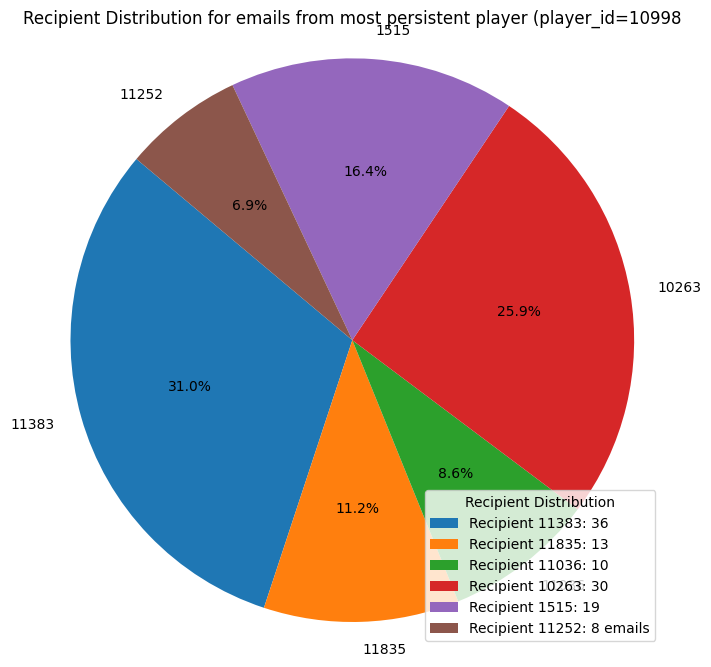

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# pip install matplotlib
import matplotlib.pyplot as plt

# Data for the pie chart
recipient_counts = max_recipient_counts.values()
recipient_labels = max_recipient_counts.keys()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(recipient_counts, labels=recipient_labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Create a custom legend
legend_labels = ['Recipient 11383: 36', 'Recipient 11835: 13', 'Recipient 11036: 10',
                 'Recipient 10263: 30', 'Recipient 1515: 19', 'Recipient 11252: 8 emails']

# Add the legend to the chart
plt.legend(legend_labels, title='Recipient Distribution', loc='lower right')


# Set the title
plt.title('Recipient Distribution for emails from most persistent player (player_id=10998')

# Save the figure as a JPEG image
plt.savefig('recipient_distribution_for_emails_from_most_persistent_player.jpg')


# Show the pie chart
plt.show()


#Download jpeg (from virtual machine's file system)
from google.colab import files
files.download('recipient_distribution_for_emails_from_most_persistent_player.jpg')


Insight: This does not show too much inbalance in who received the emails.

In [ ]:
#To download apccg_df_restart from virtual machine's memory
from google.colab import files
files.download('apccg_df_restart.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Put updated df into by_player_by_season_df
by_player_by_season_df = by_player_by_season_w_emails_resulting_in_games_df

In [ ]:
#Create features 7: Create_dictionary_emails_received_from_opponent
import pandas as pd

def create_dictionary_emails_received_from_opponent(by_player_by_season_df):
    # Initialize the new columns with None
    by_player_by_season_df['dictionary_emails_received_from_opponent'] = None
    by_player_by_season_df['number_emails_received_from_opponent'] = None

    # Iterate through each row in the DataFrame
    for index, row in by_player_by_season_df.iterrows():
        # Get the player_id and division_id for this row
        player_id = row['player_id']
        division_id = row['division_id']

        # Filter the DataFrame to find opponent dictionaries for this division
        opponent_dicts_df = by_player_by_season_df[
            (by_player_by_season_df['division_id'] == division_id) & (by_player_by_season_df['player_id'] != player_id)
        ]

        # Initialize an empty dictionary to store received emails from opponents
        emails_received_from_opponent = {}

        # Iterate through the opponent dictionaries
        for opponent_index, opponent_row in opponent_dicts_df.iterrows():
            opponent_dict = opponent_row['dictionary_of_comms_sent_by_this_player_this_season_to_an_opponent']
            opponent_player_id = opponent_row['player_id']

            for comm_id, recipient in opponent_dict.items():
                if player_id in recipient:
                    # Add the comm_id and opponent_player_id to the emails_received_from_opponent dictionary
                    emails_received_from_opponent[comm_id] = opponent_player_id

        # Set the dictionary_emails_received_from_opponent column for this row
        by_player_by_season_df.at[index, 'dictionary_emails_received_from_opponent'] = emails_received_from_opponent

        # Set the number_emails_received_from_opponent column for this row
        by_player_by_season_df.at[index, 'number_emails_received_from_opponent'] = len(emails_received_from_opponent)

    return by_player_by_season_df



# Example usage:
by_player_by_season_w_emails_received_from_opponent_df = create_dictionary_emails_received_from_opponent(by_player_by_season_df)
by_player_by_season_w_emails_received_from_opponent_df



division_player_id  division_id  player_id  \
14539               16726         4024      15343   
14538               16725         4024      15306   
14733               16944         4060      15028   
14732               16943         4060      15306   
14730               16941         4060      15343   
...                   ...          ...        ...   
6968                 8377         2639       7593   
6967                 8376         2639       1600   
6966                 8375         2639       8210   
6965                 8374         2639       1706   
0                       1            3         11   

                             List of seasons included in  division_name  \
14539                                       [2380, 2390]              1   
14538                                       [2380, 2390]              1   
14733                                       [2380, 2390]              1   
14732                                       [2380, 2390]              1   
14730                                       [2380, 2390]              1   
...                                                  ...            ...   
6968   [2066, 2073, 2078, 2085, 2090, 2097, 2104, 210...              6   
6967   [102, 110, 118, 2005, 2012, 2024, 2031, 2036, ...              6   
6966          [2097, 2104, 2108, 2114, 2118, 2123, 2127]              6   
6965   [110, 118, 2005, 2012, 2024, 2031, 2036, 2044,...              6   
0                              [1, 2, 3, 11, 12, 15, 29]              3   

       season_id  league_id List of all leagues played in  \
14539       2380       2045                        [2045]   
14538       2380       2045                        [2045]   
14733       2390       2045                        [2045]   
14732       2390       2045                        [2045]   
14730       2390       2045                        [2045]   
...          ...        ...                           ...   
6968        2104          1                           [1]   
6967        2104          1                           [1]   
6966        2104          1                           [1]   
6965        2104          1                           [1]   
0              1          1                           [1]   

       First_league_included_in  Second_league_included_in  ...  \
14539                      2045                          0  ...   
14538                      2045                          0  ...   
14733                      2045                          0  ...   
14732                      2045                          0  ...   
14730                      2045                          0  ...   
...                         ...                        ...  ...   
6968                          1                          0  ...   
6967                          1                          0  ...   
6966                          1                          0  ...   
6965                          1                          0  ...   
0                             1                          0  ...   

       games_played_this_season  number_of_games_this_season  \
14539                        []                            0   
14538                        []                            0   
14733                        []                            0   
14732                        []                            0   
14730                        []                            0   
...                         ...                          ...   
6968         [6555, 6606, 6618]                            3   
6967               [6618, 6631]                            2   
6966         [6555, 6556, 6602]                            3   
6965                     [6556]                            1   
0      [99, 106, 107, 110, 118]                            5   

                 dictionary_of_games_and_opponents  \
14539                                           {}   
14538                                           {}   


In [ ]:
#Investigate number of emails_received_from_opponent
# Find the row with the maximum number_emails_received_from_opponent
max_row = by_player_by_season_w_emails_received_from_opponent_df[
    by_player_by_season_w_emails_received_from_opponent_df['number_emails_received_from_opponent'] ==
    by_player_by_season_w_emails_received_from_opponent_df['number_emails_received_from_opponent'].max()
]

# Extract player_id and season_id for the max row
max_player_id = max_row['player_id'].iloc[0]
max_season_id = max_row['season_id'].iloc[0]

max_value = max_row['number_emails_received_from_opponent'].iloc[0]

print(f"Player ID with max number_emails_received_from_opponent: {max_player_id}")
print(f"Season ID with max number_emails_received_from_opponent: {max_season_id}")
print(f"Maximum number_emails_received_from_opponent: {max_value}")

# Find the minimum value of number_emails_received_from_opponent
min_value = by_player_by_season_w_emails_received_from_opponent_df['number_emails_received_from_opponent'].min()

# Find all player_ids with the minimum value
min_player_ids = by_player_by_season_w_emails_received_from_opponent_df[
    by_player_by_season_w_emails_received_from_opponent_df['number_emails_received_from_opponent'] == min_value
]['player_id'].tolist()

print(f"Player IDs with minimum number_emails_received_from_opponent: {min_player_ids}")
print(f"Number of players receiving the minimum number_emails_received_from_opponent: {len(min_player_ids)}")
print(f"Minimum number_emails_received_from_opponent: {min_value}")


# Export the updated DataFrame to a CSV file
by_player_by_season_w_emails_received_from_opponent_df.to_csv('by_player_by_season_w_emails_received_from_opponent_df.csv', index=False)

by_player_by_season_df=by_player_by_season_w_emails_received_from_opponent_df

Player ID with max number_emails_received_from_opponent: 10328
Season ID with max number_emails_received_from_opponent: 2194
Maximum number_emails_received_from_opponent: 126
Player IDs with minimum number_emails_received_from_opponent: [894, 15148, 15182, 15019, 15175, 15173, 15172, 15106, 15666, 15286, 15503, 15286, 11477, 11573, 11573, 11510, 12518, 985, 12521, 11510, 15218, 11524, 15003, 15124, 10940, 10395, 11004, 10835, 11057, 15147, 10315, 10254, 10533, 15147, 15218, 15003, 15123, 15003, 15124, 11196, 10953, 15548, 12495, 15299, 15246, 15147, 15218, 15003, 15147, 10892, 11524, 15003, 15218, 16083, 11524, 9179, 15496, 15147, 15959, 15670, 9179, 15124, 15147, 15389, 11524, 15496, 15389, 15123, 14570, 15123, 9579, 9469, 9546, 8580, 8415, 8416, 8460, 8426, 8313, 8318, 8314, 8312, 8317, 8311, 8204, 8315, 8220, 8224, 8208, 8245, 8211, 8142, 8143, 6119, 8072, 7859, 7811, 7722, 8062, 7766, 7720, 7728, 7680, 7577, 7618, 7615, 7591, 7596, 7569, 7656, 7286, 7422, 7286, 7286, 7447, 7447, 74

Interpretation: Lots of players (1997) never received an email from an opponent. The most popular player, who received the most emails from an opponent, received 126 emails (player_id=10328 and season_id=2194) in a season. This is a wide variation.  

In [ ]:
by_player_by_season_df=by_player_by_season_w_emails_received_from_opponent_df
by_player_by_season_df

division_player_id  division_id  player_id  \
14539               16726         4024      15343   
14538               16725         4024      15306   
14733               16944         4060      15028   
14732               16943         4060      15306   
14730               16941         4060      15343   
...                   ...          ...        ...   
6968                 8377         2639       7593   
6967                 8376         2639       1600   
6966                 8375         2639       8210   
6965                 8374         2639       1706   
0                       1            3         11   

                             List of seasons included in  division_name  \
14539                                       [2380, 2390]              1   
14538                                       [2380, 2390]              1   
14733                                       [2380, 2390]              1   
14732                                       [2380, 2390]              1   
14730                                       [2380, 2390]              1   
...                                                  ...            ...   
6968   [2066, 2073, 2078, 2085, 2090, 2097, 2104, 210...              6   
6967   [102, 110, 118, 2005, 2012, 2024, 2031, 2036, ...              6   
6966          [2097, 2104, 2108, 2114, 2118, 2123, 2127]              6   
6965   [110, 118, 2005, 2012, 2024, 2031, 2036, 2044,...              6   
0                              [1, 2, 3, 11, 12, 15, 29]              3   

       season_id  league_id List of all leagues played in  \
14539       2380       2045                        [2045]   
14538       2380       2045                        [2045]   
14733       2390       2045                        [2045]   
14732       2390       2045                        [2045]   
14730       2390       2045                        [2045]   
...          ...        ...                           ...   
6968        2104          1                           [1]   
6967        2104          1                           [1]   
6966        2104          1                           [1]   
6965        2104          1                           [1]   
0              1          1                           [1]   

       First_league_included_in  Second_league_included_in  ...  \
14539                      2045                          0  ...   
14538                      2045                          0  ...   
14733                      2045                          0  ...   
14732                      2045                          0  ...   
14730                      2045                          0  ...   
...                         ...                        ...  ...   
6968                          1                          0  ...   
6967                          1                          0  ...   
6966                          1                          0  ...   
6965                          1                          0  ...   
0                             1                          0  ...   

       games_played_this_season  number_of_games_this_season  \
14539                        []                            0   
14538                        []                            0   
14733                        []                            0   
14732                        []                            0   
14730                        []                            0   
...                         ...                          ...   
6968         [6555, 6606, 6618]                            3   
6967               [6618, 6631]                            2   
6966         [6555, 6556, 6602]                            3   
6965                     [6556]                            1   
0      [99, 106, 107, 110, 118]                            5   

                 dictionary_of_games_and_opponents  \
14539                                           {}   
14538                                           {}   


In [ ]:
#Create features 8: create_dictionary_received_challenges_from_opponent
import pandas as pd

def create_dictionary_received_challenges_from_opponent(by_player_by_season_df):
    # Initialize the new columns with None
    by_player_by_season_df['dictionary_received_challenges_from_opponent'] = None
    by_player_by_season_df['number_received_challenges_from_opponent'] = None

    # Iterate through the rows of the DataFrame
    for index, row in by_player_by_season_df.iterrows():
        player_id = row['player_id']
        division_id = row['division_id']

        # Find all opponents' dictionaries that match the division_id and exclude the current player_id
        opponent_dicts_df = by_player_by_season_df[
            (by_player_by_season_df['division_id'] == division_id) &
            (by_player_by_season_df['player_id'] != player_id)
        ]

        # Initialize an empty dictionary for received challenges
        received_challenges_dict = {}

        # Iterate through opponent dictionaries
        for _, opponent_row in opponent_dicts_df.iterrows():
            opponent_player_id = opponent_row['player_id']

            # Check if the opponent has sent challenges
            challenges_w_opponents = opponent_row['dictionary_challenges_w_opponents']

            if isinstance(challenges_w_opponents, dict):
                for challenge_id, challengee_id in challenges_w_opponents.items():
                    if player_id == challengee_id:
                        received_challenges_dict[challenge_id] = opponent_player_id

        # Populate the new columns
        by_player_by_season_df.at[index, 'dictionary_received_challenges_from_opponent'] = received_challenges_dict
        by_player_by_season_df.at[index, 'number_received_challenges_from_opponent'] = len(received_challenges_dict)

    return by_player_by_season_df

# Example usage:
by_player_by_season_received_challenges_df = create_dictionary_received_challenges_from_opponent(by_player_by_season_df)
by_player_by_season_received_challenges_df

division_player_id  division_id  player_id  \
14539               16726         4024      15343   
14538               16725         4024      15306   
14733               16944         4060      15028   
14732               16943         4060      15306   
14730               16941         4060      15343   
...                   ...          ...        ...   
6968                 8377         2639       7593   
6967                 8376         2639       1600   
6966                 8375         2639       8210   
6965                 8374         2639       1706   
0                       1            3         11   

                             List of seasons included in  division_name  \
14539                                       [2380, 2390]              1   
14538                                       [2380, 2390]              1   
14733                                       [2380, 2390]              1   
14732                                       [2380, 2390]              1   
14730                                       [2380, 2390]              1   
...                                                  ...            ...   
6968   [2066, 2073, 2078, 2085, 2090, 2097, 2104, 210...              6   
6967   [102, 110, 118, 2005, 2012, 2024, 2031, 2036, ...              6   
6966          [2097, 2104, 2108, 2114, 2118, 2123, 2127]              6   
6965   [110, 118, 2005, 2012, 2024, 2031, 2036, 2044,...              6   
0                              [1, 2, 3, 11, 12, 15, 29]              3   

       season_id  league_id List of all leagues played in  \
14539       2380       2045                        [2045]   
14538       2380       2045                        [2045]   
14733       2390       2045                        [2045]   
14732       2390       2045                        [2045]   
14730       2390       2045                        [2045]   
...          ...        ...                           ...   
6968        2104          1                           [1]   
6967        2104          1                           [1]   
6966        2104          1                           [1]   
6965        2104          1                           [1]   
0              1          1                           [1]   

       First_league_included_in  Second_league_included_in  ...  \
14539                      2045                          0  ...   
14538                      2045                          0  ...   
14733                      2045                          0  ...   
14732                      2045                          0  ...   
14730                      2045                          0  ...   
...                         ...                        ...  ...   
6968                          1                          0  ...   
6967                          1                          0  ...   
6966                          1                          0  ...   
6965                          1                          0  ...   
0                             1                          0  ...   

                 dictionary_of_games_and_opponents  \
14539                                           {}   
14538                                           {}   
14733                                           {}   
14732                                           {}   
14730                                           {}   
...                                            ...   
6968            {6555: 8210, 6606: 23, 6618: 1600}   
6967                      {6618: 7593, 6631: 8449}   
6966            {6555: 7593, 6556: 1706, 6602: 23}   
6965                                  {6556: 8210}   
0      {99: 16, 106: 15, 107: 14, 110: 23, 118: 5}   

                    dictionary_of_challenges_to_game  \
14539                                             {}   
14538                                             {}   
14733                                             {}   
14732                                             {}   
14

In [ ]:
#Investigate number_received_challenges_from_opponent


# Find the maximum and minimum values of number_received_challenges_from_opponent
max_value = by_player_by_season_received_challenges_df['number_received_challenges_from_opponent'].max()
min_value = by_player_by_season_received_challenges_df['number_received_challenges_from_opponent'].min()

print(f"Max number_received_challenges_from_opponent: {max_value}")
print(f"Min number_received_challenges_from_opponent: {min_value}")


# Find the row with the maximum number_received_challenges_from_opponent
max_row = by_player_by_season_received_challenges_df[
    by_player_by_season_received_challenges_df['number_received_challenges_from_opponent'] ==
    by_player_by_season_received_challenges_df['number_received_challenges_from_opponent'].max()
]

# Extract player_id and season_id for the max row
max_player_id = max_row['player_id'].iloc[0]
max_season_id = max_row['season_id'].iloc[0]

print(f"Player ID with max number_received_challenges_from_opponent: {max_player_id}")
print(f"Season ID with max number_received_challenges_from_opponent: {max_season_id}")

# Find the minimum value of number_received_challenges_from_opponent
min_value = by_player_by_season_received_challenges_df['number_received_challenges_from_opponent'].min()

# Find all player_ids with the minimum value
min_player_ids = by_player_by_season_received_challenges_df[
    by_player_by_season_received_challenges_df['number_received_challenges_from_opponent'] == min_value
]['player_id'].tolist()

print(f"Player IDs with minimum number_received_challenges_from_opponent: {min_player_ids}")
print(f"Number of players receiving the minimum number_received_challenges_from_opponent: {len(min_player_ids)}")


# # Export the updated DataFrame to a CSV file
by_player_by_season_received_challenges_df.to_csv('by_player_by_season_received_challenges_df.csv', index=False)

by_player_by_season_df=by_player_by_season_received_challenges_df


Max number_received_challenges_from_opponent: 16
Min number_received_challenges_from_opponent: 0
Player ID with max number_received_challenges_from_opponent: 9467
Season ID with max number_received_challenges_from_opponent: 2165
Player IDs with minimum number_received_challenges_from_opponent: [15028, 15028, 894, 15069, 15069, 15148, 14953, 15182, 15148, 15018, 15019, 15175, 15173, 15172, 15101, 15103, 15167, 15227, 15101, 14661, 15106, 15101, 15103, 15227, 15666, 15286, 15227, 14841, 15227, 15485, 15485, 15503, 15286, 15666, 16051, 15666, 15485, 16047, 15479, 15986, 15101, 11477, 11573, 8825, 8825, 11573, 11371, 11211, 11510, 12518, 985, 12521, 11510, 11541, 15389, 11331, 9561, 15218, 11524, 15147, 15003, 15124, 10892, 15548, 10940, 10395, 11004, 10188, 10835, 11955, 12495, 10160, 11057, 10188, 10005, 15496, 15147, 11524, 10254, 8749, 10940, 9179, 10188, 10570, 10315, 10254, 10533, 15872, 15147, 15496, 11331, 10188, 10160, 10188, 15218, 15003, 11195, 11331, 11004, 11955, 15872, 15123,

Interpretation: There were a lot of players receiving no challenges from any players (4177). The most challenged player received 16 challenges within one season (player_id=9467, seasons_id=2165).

In [ ]:
#Create features 9: Create_dictionary_received_challenges_resulting_in_game
import pandas as pd

def create_dictionary_received_challenges_resulting_in_game(by_player_by_season_df):
    # Initialize the new columns with None
    by_player_by_season_df['dictionary_received_challenges_resulting_in_game'] = None
    by_player_by_season_df['number_received_challenges_resulting_in_game'] = None

    # Iterate through each row in the DataFrame
    for index, row in by_player_by_season_df.iterrows():
        # Get the player's ID
        player_id = row['player_id']

        # Get the opponent's challenges dictionary
        opponent_challenges_dict = row['dictionary_received_challenges_from_opponent']

        # Initialize an empty dictionary for received challenges resulting in a game
        received_challenges_resulting_in_game = {}

        # Iterate through the opponent's challenges dictionary
        for challenge_id, challenger_id in opponent_challenges_dict.items():
            # Get the dictionary of games and opponents for this row
            games_dict = row['dictionary_of_games_and_opponents']

            # Check if challenger_id matches any opponent in the games dictionary
            for game_id, opponent_player_id in games_dict.items():
                if challenger_id == opponent_player_id:
                    # Add the challenge_id, game_id, and opponent_player_id to the resulting dictionary
                    received_challenges_resulting_in_game[challenge_id] = [game_id, opponent_player_id]

        # Populate the new columns for this row
        by_player_by_season_df.at[index, 'dictionary_received_challenges_resulting_in_game'] = received_challenges_resulting_in_game
        by_player_by_season_df.at[index, 'number_received_challenges_resulting_in_game'] = len(received_challenges_resulting_in_game)

    return by_player_by_season_df


by_player_by_season_received_challenges_resulting_in_game_df = create_dictionary_received_challenges_resulting_in_game(by_player_by_season_df)
by_player_by_season_received_challenges_resulting_in_game_df

division_player_id  division_id  player_id  \
14539               16726         4024      15343   
14538               16725         4024      15306   
14733               16944         4060      15028   
14732               16943         4060      15306   
14730               16941         4060      15343   
...                   ...          ...        ...   
6968                 8377         2639       7593   
6967                 8376         2639       1600   
6966                 8375         2639       8210   
6965                 8374         2639       1706   
0                       1            3         11   

                             List of seasons included in  division_name  \
14539                                       [2380, 2390]              1   
14538                                       [2380, 2390]              1   
14733                                       [2380, 2390]              1   
14732                                       [2380, 2390]              1   
14730                                       [2380, 2390]              1   
...                                                  ...            ...   
6968   [2066, 2073, 2078, 2085, 2090, 2097, 2104, 210...              6   
6967   [102, 110, 118, 2005, 2012, 2024, 2031, 2036, ...              6   
6966          [2097, 2104, 2108, 2114, 2118, 2123, 2127]              6   
6965   [110, 118, 2005, 2012, 2024, 2031, 2036, 2044,...              6   
0                              [1, 2, 3, 11, 12, 15, 29]              3   

       season_id  league_id List of all leagues played in  \
14539       2380       2045                        [2045]   
14538       2380       2045                        [2045]   
14733       2390       2045                        [2045]   
14732       2390       2045                        [2045]   
14730       2390       2045                        [2045]   
...          ...        ...                           ...   
6968        2104          1                           [1]   
6967        2104          1                           [1]   
6966        2104          1                           [1]   
6965        2104          1                           [1]   
0              1          1                           [1]   

       First_league_included_in  Second_league_included_in  ...  \
14539                      2045                          0  ...   
14538                      2045                          0  ...   
14733                      2045                          0  ...   
14732                      2045                          0  ...   
14730                      2045                          0  ...   
...                         ...                        ...  ...   
6968                          1                          0  ...   
6967                          1                          0  ...   
6966                          1                          0  ...   
6965                          1                          0  ...   
0                             1                          0  ...   

       dictionary_of_comms_sent_by_this_player_this_season_to_an_opponent  \
14539  {206681: [15028], 206689: [15028], 206754: [15...                    
14538  {206684: [15028], 206938: [15462], 207047: [78...                    
14733  {207859: [15306], 207860: [15343], 207866: [15...                    
14732                 {207859: [15028], 207906: [15631]}                    
14730  {207860: [15028], 207866: [15028], 207905: [15...                    
...                                                  ...                    
6968   {95868: [8210], 95924: [8210], 96105: [8210], ...                    
6967   {95869: [8210], 96831: [8210], 96988: [23], 97...                    
6966   {95866: [23], 95867: [1706], 95868: [7593], 95...                    
6965   {95867: [8210], 96185: [8210], 96410: [8210], ...                    
0                                                     {}                    

      

In [ ]:
#Investigate number_received_challenges_resulting_in_game
# Find the max and min values of number_received_challenges_resulting_in_game
max_value = by_player_by_season_df['number_received_challenges_resulting_in_game'].max()
min_value = by_player_by_season_df['number_received_challenges_resulting_in_game'].min()

# Print the max and min values
print(f"Max number_received_challenges_resulting_in_game: {max_value}")
print(f"Min number_received_challenges_resulting_in_game: {min_value}")

# Find the player with max number_received_challenges_resulting_in_game
max_player = by_player_by_season_df[by_player_by_season_df['number_received_challenges_resulting_in_game'] == max_value]
max_player_id = max_player['player_id'].iloc[0]
max_season_id = max_player['season_id'].iloc[0]

# Print the player_id and season_id for the player with max value
print(f"Player with max number_received_challenges_resulting_in_game:")
print(f"Player ID: {max_player_id}")
print(f"Season ID: {max_season_id}")

# Create a list of player_id for those with the minimum number_received_challenges_resulting_in_game
min_players = by_player_by_season_df[by_player_by_season_df['number_received_challenges_resulting_in_game'] == min_value]
min_player_ids = min_players['player_id'].tolist()

# Print the len of the list
print(f"Number of players with the minimum number_received_challenges_resulting_in_game: {len(min_player_ids)}")



# Export the updated DataFrame to a CSV file
by_player_by_season_received_challenges_resulting_in_game_df.to_csv('by_player_by_season_received_challenges_resulting_in_game_df.csv', index=False)

by_player_by_season_df=by_player_by_season_received_challenges_resulting_in_game_df



Max number_received_challenges_resulting_in_game: 14
Min number_received_challenges_resulting_in_game: 0
Player with max number_received_challenges_resulting_in_game:
Player ID: 9542
Season ID: 2230
Number of players with the minimum number_received_challenges_resulting_in_game: 7698


Interpretation: The most challenged player (who then ended up playing the game) received 14 challenges within a season (player_id=9542, season_id=2230). Lots of players (7698) played a game without receiving a challenge.

In [ ]:
#Create features 10: Create_dictionary_received_emails_resulting_in_game
def create_dictionary_received_emails_resulting_in_game(by_player_by_season_df):
    # Initialize the new columns with None
    by_player_by_season_df['dictionary_received_emails_resulting_in_game'] = None
    by_player_by_season_df['number_received_emails_resulting_in_game'] = None

    # Iterate through each row in the DataFrame
    for index, row in by_player_by_season_df.iterrows():
        # Get the value from dictionary_of_games_and_opponents for this row
        games_and_opponents = row['dictionary_of_games_and_opponents']

        # Initialize an empty dictionary to store comm_id and game info
        received_emails_resulting_in_game = {}

        # Get the value from dictionary_emails_received_from_opponent for this row
        emails_received_from_opponent = row['dictionary_emails_received_from_opponent']

        # Iterate through the games_and_opponents dictionary
        for game_id, opponent_player_id in games_and_opponents.items():
            # Check if opponent_player_id is in the values of emails_received_from_opponent
            for comm_id, comm_sender in emails_received_from_opponent.items():
                if opponent_player_id == comm_sender:
                    # Add the comm_id and game info to the received_emails_resulting_in_game dictionary
                    received_emails_resulting_in_game[comm_id] = [game_id, opponent_player_id]

        # Populate the new columns for this row
        by_player_by_season_df.at[index, 'dictionary_received_emails_resulting_in_game'] = received_emails_resulting_in_game
        by_player_by_season_df.at[index, 'number_received_emails_resulting_in_game'] = len(received_emails_resulting_in_game)

    return by_player_by_season_df

by_player_by_season_w_received_emails_resulting_in_game_df=create_dictionary_received_emails_resulting_in_game(by_player_by_season_df)

by_player_by_season_w_received_emails_resulting_in_game_df



division_player_id  division_id  player_id  \
14539               16726         4024      15343   
14538               16725         4024      15306   
14733               16944         4060      15028   
14732               16943         4060      15306   
14730               16941         4060      15343   
...                   ...          ...        ...   
6968                 8377         2639       7593   
6967                 8376         2639       1600   
6966                 8375         2639       8210   
6965                 8374         2639       1706   
0                       1            3         11   

                             List of seasons included in  division_name  \
14539                                       [2380, 2390]              1   
14538                                       [2380, 2390]              1   
14733                                       [2380, 2390]              1   
14732                                       [2380, 2390]              1   
14730                                       [2380, 2390]              1   
...                                                  ...            ...   
6968   [2066, 2073, 2078, 2085, 2090, 2097, 2104, 210...              6   
6967   [102, 110, 118, 2005, 2012, 2024, 2031, 2036, ...              6   
6966          [2097, 2104, 2108, 2114, 2118, 2123, 2127]              6   
6965   [110, 118, 2005, 2012, 2024, 2031, 2036, 2044,...              6   
0                              [1, 2, 3, 11, 12, 15, 29]              3   

       season_id  league_id List of all leagues played in  \
14539       2380       2045                        [2045]   
14538       2380       2045                        [2045]   
14733       2390       2045                        [2045]   
14732       2390       2045                        [2045]   
14730       2390       2045                        [2045]   
...          ...        ...                           ...   
6968        2104          1                           [1]   
6967        2104          1                           [1]   
6966        2104          1                           [1]   
6965        2104          1                           [1]   
0              1          1                           [1]   

       First_league_included_in  Second_league_included_in  ...  \
14539                      2045                          0  ...   
14538                      2045                          0  ...   
14733                      2045                          0  ...   
14732                      2045                          0  ...   
14730                      2045                          0  ...   
...                         ...                        ...  ...   
6968                          1                          0  ...   
6967                          1                          0  ...   
6966                          1                          0  ...   
6965                          1                          0  ...   
0                             1                          0  ...   

                 dictionary_of_emails_resulting_in_games  \
14539                                                 {}   
14538                                                 {}   
14733                                                 {}   
14732                                                 {}   
14730                                                 {}   
...                                                  ...   
6968   {95868: [8210], 95924: [8210], 96105: [8210], ...   
6967   {97057: [7593], 97058: [8449], 97296: [8449], ...   
6966   {95866: [23], 95867: [1706], 95868: [7593], 95...   
6965   {95867: [8210], 96185: [8210], 96410: [8210], ...   
0                                                     {}   

       number_sent_emails_resulting_in_game  \
14539                                     0   
14538                                     0   
14733                                     0   
14732                 

In [ ]:
#Investigate number_received_emails_resulting_in_game
# Find the maximum and minimum values of number_received_emails_resulting_in_game
max_value = by_player_by_season_df['number_received_emails_resulting_in_game'].max()
min_value = by_player_by_season_df['number_received_emails_resulting_in_game'].min()

print(f"Max number_received_emails_resulting_in_game: {max_value}")
print(f"Min number_received_emails_resulting_in_game: {min_value}")

# Find the row with the maximum number_received_emails_resulting_in_game
max_row = by_player_by_season_df[
    by_player_by_season_df['number_received_emails_resulting_in_game'] == max_value
]

# Extract player_id and season_id for the max row
max_player_id = max_row['player_id'].iloc[0]
max_season_id = max_row['season_id'].iloc[0]

print(f"Player ID with max number_received_emails_resulting_in_game: {max_player_id}")
print(f"Season ID with max number_received_emails_resulting_in_game: {max_season_id}")

# Find the player_ids with the minimum number_received_emails_resulting_in_game
min_player_ids = by_player_by_season_df[
    by_player_by_season_df['number_received_emails_resulting_in_game'] == min_value
]['player_id'].tolist()

print(f"Player IDs with minimum number_received_emails_resulting_in_game: {min_player_ids}")
print(f"Number of players with minimum number_received_emails_resulting_in_game: {len(min_player_ids)}")


# Export the updated DataFrame to a CSV file
by_player_by_season_w_received_emails_resulting_in_game_df.to_csv('by_player_by_season_w_received_emails_resulting_in_game_df.csv', index=False)

by_player_by_season_df=by_player_by_season_w_received_emails_resulting_in_game_df



Max number_received_emails_resulting_in_game: 116
Min number_received_emails_resulting_in_game: 0
Player ID with max number_received_emails_resulting_in_game: 10998
Season ID with max number_received_emails_resulting_in_game: 2311
Player IDs with minimum number_received_emails_resulting_in_game: [15343, 15306, 15028, 15306, 15343, 15462, 15462, 894, 15148, 15019, 15182, 14953, 14955, 15018, 15069, 15070, 15019, 15184, 15175, 894, 15173, 15172, 14841, 15106, 14941, 15965, 15286, 15103, 14661, 15106, 15286, 15666, 15608, 15286, 15227, 15821, 15805, 14841, 15286, 15227, 15332, 15503, 15286, 15479, 15485, 15101, 15414, 11477, 11573, 8825, 8825, 985, 11573, 8825, 8783, 11211, 11510, 11371, 12518, 985, 12521, 11371, 11045, 8783, 11510, 11510, 11045, 15218, 11524, 15147, 15003, 15124, 10940, 10395, 11004, 10835, 10160, 11558, 11057, 8749, 10005, 15147, 11524, 15003, 10254, 10315, 10907, 10224, 10315, 10254, 10533, 10340, 10208, 11013, 15147, 12693, 12185, 11094, 10907, 10188, 15699, 15218, 15

Interpretation: This is the inverse of what we found earlier when looking at the most emails someone had sent to play a game. The player_id=10998 received 116 emails and eventually accepted and played a game. Lots of players (5202) did not receive any emails and yet did play a game.

In [ ]:
#Create features 11: create_received_no_opponent_email_or_challenge function creating new column received_no_opponent_email_or_challenge in the by_player_by_season_df
import pandas as pd

def create_received_no_opponent_email_or_challenge(by_player_by_season_df):
    # Initialize the 'received_no_opponent_email_or_challenge' column to None
    by_player_by_season_df['received_no_opponent_email_or_challenge'] = None

    # Iterate through rows and calculate 'comb_value'
    for index, row in by_player_by_season_df.iterrows():
        comb_value = row['number_received_challenges_from_opponent'] + row['number_emails_received_from_opponent']
        # Set 'received_no_opponent_email_or_challenge' to 1 if comb_value equals 0, otherwise set it to 0
        by_player_by_season_df.at[index, 'received_no_opponent_email_or_challenge'] = 1 if comb_value == 0 else 0

    return by_player_by_season_df


# Call the function to create the new column and update the DataFrame
by_player_by_season_w_received_no_opponent_email_or_challenge_df = create_received_no_opponent_email_or_challenge(by_player_by_season_df)
by_player_by_season_w_received_no_opponent_email_or_challenge_df

division_player_id  division_id  player_id  \
14539               16726         4024      15343   
14538               16725         4024      15306   
14733               16944         4060      15028   
14732               16943         4060      15306   
14730               16941         4060      15343   
...                   ...          ...        ...   
6968                 8377         2639       7593   
6967                 8376         2639       1600   
6966                 8375         2639       8210   
6965                 8374         2639       1706   
0                       1            3         11   

                             List of seasons included in  division_name  \
14539                                       [2380, 2390]              1   
14538                                       [2380, 2390]              1   
14733                                       [2380, 2390]              1   
14732                                       [2380, 2390]              1   
14730                                       [2380, 2390]              1   
...                                                  ...            ...   
6968   [2066, 2073, 2078, 2085, 2090, 2097, 2104, 210...              6   
6967   [102, 110, 118, 2005, 2012, 2024, 2031, 2036, ...              6   
6966          [2097, 2104, 2108, 2114, 2118, 2123, 2127]              6   
6965   [110, 118, 2005, 2012, 2024, 2031, 2036, 2044,...              6   
0                              [1, 2, 3, 11, 12, 15, 29]              3   

       season_id  league_id List of all leagues played in  \
14539       2380       2045                        [2045]   
14538       2380       2045                        [2045]   
14733       2390       2045                        [2045]   
14732       2390       2045                        [2045]   
14730       2390       2045                        [2045]   
...          ...        ...                           ...   
6968        2104          1                           [1]   
6967        2104          1                           [1]   
6966        2104          1                           [1]   
6965        2104          1                           [1]   
0              1          1                           [1]   

       First_league_included_in  Second_league_included_in  ...  \
14539                      2045                          0  ...   
14538                      2045                          0  ...   
14733                      2045                          0  ...   
14732                      2045                          0  ...   
14730                      2045                          0  ...   
...                         ...                        ...  ...   
6968                          1                          0  ...   
6967                          1                          0  ...   
6966                          1                          0  ...   
6965                          1                          0  ...   
0                             1                          0  ...   

       number_sent_emails_resulting_in_game  \
14539                                     0   
14538                                     0   
14733                                     0   
14732                                     0   
14730                                     0   
...                                     ...   
6968                                     20   
6967                                      8   
6966                                     29   
6965                                      6   
0                                         0   

                dictionary_emails_received_from_opponent  \
14539  {206939: 15462, 206681: 15028, 206689: 15028, ...   
14538       {206938: 15462, 206684: 15028, 207047: 7880}   
14733  {207859: 15306, 207860: 15343, 207866: 15343, ...   
14732                     {207859: 15028, 207906: 15631}   
14730  {207860: 15028, 207866: 15028, 208068: 15028, ...   
...   

In [ ]:
#Investigate received_no_opponent_email_or_challenge
# Use value_counts() to count the occurrences of each value
value_counts = by_player_by_season_w_received_no_opponent_email_or_challenge_df['received_no_opponent_email_or_challenge'].value_counts()

# Extract the counts for 0 and 1
count_0 = value_counts.get(0, 0)
count_1 = value_counts.get(1, 0)

# Print the counts
print("Number of 0s:", count_0)
print("Number of 1s:", count_1)


# Export the updated DataFrame to a CSV file
by_player_by_season_w_received_no_opponent_email_or_challenge_df.to_csv('by_player_by_season_w_received_no_opponent_email_or_challenge_df.csv', index=False)
by_player_by_season_df=by_player_by_season_w_received_no_opponent_email_or_challenge_df


Number of 0s: 13622
Number of 1s: 1956


Interpretation: There are far more players who have 0 for the category 'received_no_opponent_email_or_challenge' than have 1. The ratio is approximately 7:1. This means 1/8 of all players never receive a challenge or comms from an opponent in the seasons they are included in.

In [ ]:
#Create features 12: create_number_sent_challenges_or_comms_to_opponent
import pandas as pd

def create_number_sent_challenges_or_comms_to_opponent(by_player_by_season_df):
    # Create a new column 'number_sent_challenges_or_comms_to_opponent' initialized to None
    by_player_by_season_df['number_sent_challenges_or_comms_to_opponent'] = None

    # Iterate through rows and calculate 'comb_value'
    for index, row in by_player_by_season_df.iterrows():
        comb_value = row['number_of_sent_email_this_season_to_an_opponent'] + row['number_of_sent_challenges_to_opponent']
        # Set 'number_sent_challenges_or_comms_to_opponent' to 'comb_value'
        by_player_by_season_df.at[index, 'number_sent_challenges_or_comms_to_opponent'] = comb_value

    return by_player_by_season_df


# Call the function to create the new column and update the DataFrame
by_player_by_season_w_number_sent_challenges_or_comms_to_opponent_df = create_number_sent_challenges_or_comms_to_opponent(by_player_by_season_df)
by_player_by_season_w_number_sent_challenges_or_comms_to_opponent_df

division_player_id  division_id  player_id  \
14539               16726         4024      15343   
14538               16725         4024      15306   
14733               16944         4060      15028   
14732               16943         4060      15306   
14730               16941         4060      15343   
...                   ...          ...        ...   
6968                 8377         2639       7593   
6967                 8376         2639       1600   
6966                 8375         2639       8210   
6965                 8374         2639       1706   
0                       1            3         11   

                             List of seasons included in  division_name  \
14539                                       [2380, 2390]              1   
14538                                       [2380, 2390]              1   
14733                                       [2380, 2390]              1   
14732                                       [2380, 2390]              1   
14730                                       [2380, 2390]              1   
...                                                  ...            ...   
6968   [2066, 2073, 2078, 2085, 2090, 2097, 2104, 210...              6   
6967   [102, 110, 118, 2005, 2012, 2024, 2031, 2036, ...              6   
6966          [2097, 2104, 2108, 2114, 2118, 2123, 2127]              6   
6965   [110, 118, 2005, 2012, 2024, 2031, 2036, 2044,...              6   
0                              [1, 2, 3, 11, 12, 15, 29]              3   

       season_id  league_id List of all leagues played in  \
14539       2380       2045                        [2045]   
14538       2380       2045                        [2045]   
14733       2390       2045                        [2045]   
14732       2390       2045                        [2045]   
14730       2390       2045                        [2045]   
...          ...        ...                           ...   
6968        2104          1                           [1]   
6967        2104          1                           [1]   
6966        2104          1                           [1]   
6965        2104          1                           [1]   
0              1          1                           [1]   

       First_league_included_in  Second_league_included_in  ...  \
14539                      2045                          0  ...   
14538                      2045                          0  ...   
14733                      2045                          0  ...   
14732                      2045                          0  ...   
14730                      2045                          0  ...   
...                         ...                        ...  ...   
6968                          1                          0  ...   
6967                          1                          0  ...   
6966                          1                          0  ...   
6965                          1                          0  ...   
0                             1                          0  ...   

                dictionary_emails_received_from_opponent  \
14539  {206939: 15462, 206681: 15028, 206689: 15028, ...   
14538       {206938: 15462, 206684: 15028, 207047: 7880}   
14733  {207859: 15306, 207860: 15343, 207866: 15343, ...   
14732                     {207859: 15028, 207906: 15631}   
14730  {207860: 15028, 207866: 15028, 208068: 15028, ...   
...                                                  ...   
6968   {97667: 8449, 97726: 8449, 97753: 8449, 96987:...   
6967   {97058: 8449, 97296: 8449, 97340: 8449, 97343:...   
6966   {96832: 8449, 95866: 23, 96540: 23, 96636: 23,...   
6965   {96986: 23, 97498: 23, 97666: 7593, 97055: 160...   
0                                                     {}   

       number_emails_received_from_opponent  \
14539                                     6   
14538                                     3   
14733                                     4   
14732                 

In [ ]:
#Investigate number_sent_challenges_or_comms_to_opponent
by_player_by_season_df=by_player_by_season_w_number_sent_challenges_or_comms_to_opponent_df

# Convert the column to a numeric data type (assuming it's not already numeric)
by_player_by_season_df['number_sent_challenges_or_comms_to_opponent'] = pd.to_numeric(by_player_by_season_df['number_sent_challenges_or_comms_to_opponent'], errors='coerce')

# Count the number of 0s and not 0s
count_0 = (by_player_by_season_df['number_sent_challenges_or_comms_to_opponent'] == 0).sum()
count_not_0 = (by_player_by_season_df['number_sent_challenges_or_comms_to_opponent'] != 0).sum()

# Find the maximum value along with player_id and season_id
max_row = by_player_by_season_df.loc[by_player_by_season_df['number_sent_challenges_or_comms_to_opponent'].idxmax()]
max_value = max_row['number_sent_challenges_or_comms_to_opponent']
max_player_id = max_row['player_id']
max_season_id = max_row['season_id']

# Print the results
print("Number of 0s:", count_0)
print("Number of not 0s:", count_not_0)
print("Max Value:", max_value)
print("Player ID with Max Value:", max_player_id)
print("Season ID with Max Value:", max_season_id)

# Export the updated DataFrame to a CSV file
by_player_by_season_w_number_sent_challenges_or_comms_to_opponent_df.to_csv('by_player_by_season_w_number_sent_challenges_or_comms_to_opponent_df.csv', index=False)




Number of 0s: 1958
Number of not 0s: 13620
Max Value: 130
Player ID with Max Value: 10328
Season ID with Max Value: 2194


Interpretation. The most active player, when taking into account emails sent combined with challenges sent, was player_id=10328, in season_id=2194, who sent a combined 130 challenges and emails that season. From comparing the number of rows with 0 and 1 for this category, we can determine that around 13% (from 1958/(13620+1958) which is 1958/(15578) = 0.12569) of players sent no emails and challenges.

REIMPORT STAGE

In [ ]:
#Get latest by_player_by_season_df
#Import files from google drive
# ! gdown 1okQb_rloWRGz2BhojaKrjxHLkkF_Xkce

Downloading...
From: https://drive.google.com/uc?id=1okQb_rloWRGz2BhojaKrjxHLkkF_Xkce
To: /content/by_player_by_season_w_number_sent_challenges_or_comms_to_opponent_df.csv
100% 32.9M/32.9M [00:00<00:00, 75.4MB/s]


In [ ]:
#Reimport
#import some useful libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab as pl

#import by_player_by_season_df
# by_player_by_season_df = pd.read_csv(
#     "/content/by_player_by_season_w_number_sent_challenges_or_comms_to_opponent_df.csv")


#Check datatypes
by_player_by_season_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15578 entries, 0 to 15577
Data columns (total 55 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   division_player_id                                                  15578 non-null  int64 
 1   division_id                                                         15578 non-null  int64 
 2   player_id                                                           15578 non-null  int64 
 3   List of seasons included in                                         15578 non-null  object
 4   division_name                                                       15578 non-null  int64 
 5   season_id                                                           15578 non-null  int64 
 6   league_id                                                           15578 non-null  int64 
 7   List of all leagues pl

In [ ]:
#check datatypes of certain list columns after reimport
# Columns to check
columns_to_check = [
    'List of seasons included in',
    'seasons_within_second_league',
    'list_of_seasons_included_in_from_third_league',
    'churned_seasons_from_fourth_league',
]

# Check the current data types of the columns
for col in columns_to_check:
    current_dtype = by_player_by_season_df[col].dtype
    print(f"Current Data Type of '{col}': {current_dtype}")

# Get values from the first row for these columns
first_row = by_player_by_season_df.iloc[0]

# Check the data type of values in the first row
for col in columns_to_check:
    value = first_row[col]
    value_dtype = type(value)
    print(f"Data Type of '{col}' in the First Row: {value_dtype}")

    # Check the data type of elements assuming they are lists
    if isinstance(value, list):
        for element in value:
            element_dtype = type(element)
            print(f"Data Type of Element in '{col}': {element_dtype}")

# Output will show the current data types of the columns and the data types of their values and elements (if they are lists).


Current Data Type of 'List of seasons included in': object
Current Data Type of 'seasons_within_second_league': object
Current Data Type of 'list_of_seasons_included_in_from_third_league': object
Current Data Type of 'churned_seasons_from_fourth_league': object
Data Type of 'List of seasons included in' in the First Row: <class 'str'>
Data Type of 'seasons_within_second_league' in the First Row: <class 'str'>
Data Type of 'list_of_seasons_included_in_from_third_league' in the First Row: <class 'str'>
Data Type of 'churned_seasons_from_fourth_league' in the First Row: <class 'str'>


Interpretation: On re-import, the datatypes are destroyed. For the columns that should be lists of ints, it defaults to strings, and datatypes of columns as 'object'.

In [ ]:
#Check to see if dictionary datatype is also destroyed by reimport
# Column to check
column_to_check = 'dictionary_emails_received_from_opponent'

# Check the data type of the column
current_dtype = by_player_by_season_df[column_to_check].dtype
print(f"Current Data Type of '{column_to_check}': {current_dtype}")

# Get the value from the first row for this column
first_row = by_player_by_season_df.iloc[0]
value = first_row[column_to_check]

# Check the data type of the value
value_dtype = type(value)
print(f"Data Type of '{column_to_check}' in the First Row: {value_dtype}")

# Iterate through dictionary entries (assuming it's a dictionary)
if isinstance(value, dict):
    for key, val in value.items():
        key_dtype = type(key)
        val_dtype = type(val)
        print(f"Data Type of Key in '{column_to_check}': {key_dtype}")
        print(f"Data Type of Value in '{column_to_check}': {val_dtype}")


Current Data Type of 'dictionary_emails_received_from_opponent': object
Data Type of 'dictionary_emails_received_from_opponent' in the First Row: <class 'str'>


Interpretation: Yes the dictionary datatype is also destroyed by reimport. It is best to leave it, and convert (str to dict) inside a function, as and when the data is needed.

In [ ]:
#Code to restate the datatypes for columns that hold lists in by_player_by_season_df
import ast

#List columns
# Columns containing lists of values to convert to lists of integers
list_columns = [
    'List of seasons included in',
    'List of all leagues played in',
    'seasons_within_first_league',
    'seasons_within_second_league',
    'seasons_within_third_league',
    'seasons_within_fourth_league',
    'list_of_seasons_included_in_from_first_league',
    'list_of_seasons_included_in_from_second_league',
    'list_of_seasons_included_in_from_third_league',
    'list_of_seasons_included_in_from_fourth_league',
    'churned_seasons_from_first_league',
    'churned_seasons_from_second_league',
    'churned_seasons_from_third_league',
    'churned_seasons_from_fourth_league',
    'seasons_churned',
    'Set of opponents',
    'challenges_sent_this_season',
    'games_played_this_season',
]

# Iterate through the specified columns and convert them to lists of integers
for col in list_columns:
    by_player_by_season_df[col] = by_player_by_season_df[col].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Now, these columns contain lists of integers


In [ ]:
# Columns to check datatypes of lists after reimport and recasting to lists of ints from objects
columns_to_check = [
    'challenges_sent_this_season',
    'games_played_this_season',
]

# Check the data types of the columns
for col in columns_to_check:
    current_dtype = by_player_by_season_df[col].dtype
    print(f"Current Data Type of '{col}': {current_dtype}")

# Get values from the first row for these columns
first_row = by_player_by_season_df.iloc[0]

# Check the data type of values in the first row
for col in columns_to_check:
    value = first_row[col]
    value_dtype = type(value)
    print(f"Data Type of '{col}' in the First Row: {value_dtype}")

    # Check the data type of elements assuming they are lists
    if isinstance(value, list):
        for element in value:
            element_dtype = type(element)
            print(f"Data Type of Element in '{col}': {element_dtype}")


Current Data Type of 'challenges_sent_this_season': object
Current Data Type of 'games_played_this_season': object
Data Type of 'challenges_sent_this_season' in the First Row: <class 'float'>
Data Type of 'games_played_this_season' in the First Row: <class 'list'>


In [ ]:
#Fix the fact that 'challenges_sent_this_season' has 'float' as datatype, to accomodate some empty values with none in
#Code to replace None with empty list, then cast the column to list datatype
# Replace 'None' values with an empty list '[]' using apply and lambda
by_player_by_season_df['challenges_sent_this_season'] = by_player_by_season_df['challenges_sent_this_season'].apply(lambda x: [] if x is None else x)

# Change the column's datatype to list
by_player_by_season_df['challenges_sent_this_season'] = by_player_by_season_df['challenges_sent_this_season'].apply(lambda x: x if isinstance(x, list) else [])

# Verify the data type change
print("Updated Data Type of 'challenges_sent_this_season':", by_player_by_season_df['challenges_sent_this_season'].dtype)


# Get the first row
first_row = by_player_by_season_df.iloc[0]

# Check the data type of the value in the first row
value = first_row['challenges_sent_this_season']
value_dtype = type(value)
print("Data Type of 'challenges_sent_this_season' in the First Row:", value_dtype)


Updated Data Type of 'challenges_sent_this_season': object
Data Type of 'challenges_sent_this_season' in the First Row: <class 'list'>


In [ ]:
by_player_by_season_df

division_player_id  division_id  player_id  \
0                   16726         4024      15343   
1                   16725         4024      15306   
2                   16944         4060      15028   
3                   16943         4060      15306   
4                   16941         4060      15343   
...                   ...          ...        ...   
15573                8377         2639       7593   
15574                8376         2639       1600   
15575                8375         2639       8210   
15576                8374         2639       1706   
15577                   1            3         11   

                             List of seasons included in  division_name  \
0                                           [2380, 2390]              1   
1                                           [2380, 2390]              1   
2                                           [2380, 2390]              1   
3                                           [2380, 2390]              1   
4                                           [2380, 2390]              1   
...                                                  ...            ...   
15573  [2066, 2073, 2078, 2085, 2090, 2097, 2104, 210...              6   
15574  [102, 110, 118, 2005, 2012, 2024, 2031, 2036, ...              6   
15575         [2097, 2104, 2108, 2114, 2118, 2123, 2127]              6   
15576  [110, 118, 2005, 2012, 2024, 2031, 2036, 2044,...              6   
15577                          [1, 2, 3, 11, 12, 15, 29]              3   

       season_id  league_id List of all leagues played in  \
0           2380       2045                        [2045]   
1           2380       2045                        [2045]   
2           2390       2045                        [2045]   
3           2390       2045                        [2045]   
4           2390       2045                        [2045]   
...          ...        ...                           ...   
15573       2104          1                           [1]   
15574       2104          1                           [1]   
15575       2104          1                           [1]   
15576       2104          1                           [1]   
15577          1          1                           [1]   

       First_league_included_in  Second_league_included_in  ...  \
0                          2045                          0  ...   
1                          2045                          0  ...   
2                          2045                          0  ...   
3                          2045                          0  ...   
4                          2045                          0  ...   
...                         ...                        ...  ...   
15573                         1                          0  ...   
15574                         1                          0  ...   
15575                         1                          0  ...   
15576                         1                          0  ...   
15577                         1                          0  ...   

                dictionary_emails_received_from_opponent  \
0      {206939: 15462, 206681: 15028, 206689: 15028, ...   
1           {206938: 15462, 206684: 15028, 207047: 7880}   
2      {207859: 15306, 207860: 15343, 207866: 15343, ...   
3                         {207859: 15028, 207906: 15631}   
4      {207860: 15028, 207866: 15028, 208068: 15028, ...   
...                                                  ...   
15573  {97667: 8449, 97726: 8449, 97753: 8449, 96987:...   
15574  {97058: 8449, 97296: 8449, 97340: 8449, 97343:...   
15575  {96832: 8449, 95866: 23, 96540: 23, 96636: 23,...   
15576  {96986: 23, 97498: 23, 97666: 7593, 97055: 160...   
15577                                                 {}   

       number_emails_received_from_opponent  \
0                                         6   
1                                         3   
2                                         4   
3                     

In [ ]:
#Create features 13: Create_number_sent_challenges_or_comms_that_resulted_in_game
import pandas as pd

def create_number_sent_challenges_or_comms_that_resulted_in_game(by_player_by_season_df):
    # Create a new column 'number_sent_challenges_or_comms_that_resulted_in_game' initialized to 0
    by_player_by_season_df['number_sent_challenges_or_comms_that_resulted_in_game'] = 0

    # Iterate through rows
    for index, row in by_player_by_season_df.iterrows():
        # Store 'number_sent_emails_resulting_in_game' and 'dictionary_of_challenges_to_game' in temporary variables
        number_sent_emails_resulting_in_game = row['number_sent_emails_resulting_in_game']

        # Convert 'dictionary_of_challenges_to_game' from string to dictionary. Works regardless of str or dict input, a dict output
        dictionary_of_challenges_to_game = eval(row['dictionary_of_challenges_to_game'])

        # Calculate 'comb_value' by adding the two temporary variables
        challenges_sent_leading_to_game = len(dictionary_of_challenges_to_game)
        comb_value = number_sent_emails_resulting_in_game + challenges_sent_leading_to_game

        # Update the 'number_sent_challenges_or_comms_that_resulted_in_game' column
        by_player_by_season_df.at[index, 'number_sent_challenges_or_comms_that_resulted_in_game'] = comb_value

    return by_player_by_season_df



# Call the function to create the new column and update the DataFrame
by_player_by_season_w_number_sent_challenges_or_comms_that_resulted_in_game_df = create_number_sent_challenges_or_comms_that_resulted_in_game(by_player_by_season_df)
by_player_by_season_w_number_sent_challenges_or_comms_that_resulted_in_game_df

division_player_id  division_id  player_id  \
0                   16726         4024      15343   
1                   16725         4024      15306   
2                   16944         4060      15028   
3                   16943         4060      15306   
4                   16941         4060      15343   
...                   ...          ...        ...   
15573                8377         2639       7593   
15574                8376         2639       1600   
15575                8375         2639       8210   
15576                8374         2639       1706   
15577                   1            3         11   

                             List of seasons included in  division_name  \
0                                           [2380, 2390]              1   
1                                           [2380, 2390]              1   
2                                           [2380, 2390]              1   
3                                           [2380, 2390]              1   
4                                           [2380, 2390]              1   
...                                                  ...            ...   
15573  [2066, 2073, 2078, 2085, 2090, 2097, 2104, 210...              6   
15574  [102, 110, 118, 2005, 2012, 2024, 2031, 2036, ...              6   
15575         [2097, 2104, 2108, 2114, 2118, 2123, 2127]              6   
15576  [110, 118, 2005, 2012, 2024, 2031, 2036, 2044,...              6   
15577                          [1, 2, 3, 11, 12, 15, 29]              3   

       season_id  league_id List of all leagues played in  \
0           2380       2045                        [2045]   
1           2380       2045                        [2045]   
2           2390       2045                        [2045]   
3           2390       2045                        [2045]   
4           2390       2045                        [2045]   
...          ...        ...                           ...   
15573       2104          1                           [1]   
15574       2104          1                           [1]   
15575       2104          1                           [1]   
15576       2104          1                           [1]   
15577          1          1                           [1]   

       First_league_included_in  Second_league_included_in  ...  \
0                          2045                          0  ...   
1                          2045                          0  ...   
2                          2045                          0  ...   
3                          2045                          0  ...   
4                          2045                          0  ...   
...                         ...                        ...  ...   
15573                         1                          0  ...   
15574                         1                          0  ...   
15575                         1                          0  ...   
15576                         1                          0  ...   
15577                         1                          0  ...   

       number_emails_received_from_opponent  \
0                                         6   
1                                         3   
2                                         4   
3                                         2   
4                                         4   
...                                     ...   
15573                                    24   
15574                                    33   
15575                                    41   
15576                                    12   
15577                                     0   

            dictionary_received_challenges_from_opponent  \
0      {33442: 15462, 33396: 15028, 33415: 7880, 3345...   
1              {33441: 15462, 33399: 15028, 33457: 7880}   
2                                                     {}   
3                                         {33603: 15631}   
4                                         {33602: 15631}   
...   

In [ ]:
#Investigate number_sent_challenges_or_comms_that_resulted_in_game
# Find the maximum and minimum values in 'number_sent_challenges_or_comms_that_resulted_in_game'
max_value = by_player_by_season_w_number_sent_challenges_or_comms_that_resulted_in_game_df['number_sent_challenges_or_comms_that_resulted_in_game'].max()
min_value = by_player_by_season_w_number_sent_challenges_or_comms_that_resulted_in_game_df['number_sent_challenges_or_comms_that_resulted_in_game'].min()

# Find the row with the maximum value
max_row = by_player_by_season_w_number_sent_challenges_or_comms_that_resulted_in_game_df[by_player_by_season_w_number_sent_challenges_or_comms_that_resulted_in_game_df['number_sent_challenges_or_comms_that_resulted_in_game'] == max_value]

# Print the maximum value, player_id, and season_id
print("Maximum Value:", max_value)
print("Player ID for Maximum Value:", max_row['player_id'].values[0])
print("Season ID for Maximum Value:", max_row['season_id'].values[0])
print("Minimum Value:", min_value)

# Create a list of player_ids when 'number_sent_challenges_or_comms_that_resulted_in_game' is at its minimum
min_value_rows = by_player_by_season_w_number_sent_challenges_or_comms_that_resulted_in_game_df[by_player_by_season_w_number_sent_challenges_or_comms_that_resulted_in_game_df['number_sent_challenges_or_comms_that_resulted_in_game'] == min_value]
player_ids_with_min_value = min_value_rows['player_id'].tolist()

# Print the length of the list
print("Number of Player IDs with Minimum Value:", len(player_ids_with_min_value))


# Export the updated DataFrame to a CSV file
by_player_by_season_w_number_sent_challenges_or_comms_that_resulted_in_game_df.to_csv('by_player_by_season_w_number_sent_challenges_or_comms_that_resulted_in_game_df.csv', index=False)

#Update the by_player_by_season_df
by_player_by_season_df=by_player_by_season_w_number_sent_challenges_or_comms_that_resulted_in_game_df


Maximum Value: 121
Player ID for Maximum Value: 10998
Season ID for Maximum Value: 2311
Minimum Value: 0
Number of Player IDs with Minimum Value: 5176


Interpretation: Combining emails and challenges, we see that the most combined, that resulted in a game being played was by player_id=10998 in season_id=2311, with a combined 121 challenges and email comms sent. A lot of people played a game without sending either an email or a challenge. Perhaps this shows that a lot of players will use other methods of communication to arrange games.

In [ ]:
#Create features 14: Entered_game_result_that_season binary categorical feature
def entered_game_result_that_season(by_player_by_season_df):
    # Create a new column 'entered_game_result_that_season' initialized to 0
    by_player_by_season_df['entered_game_result_that_season'] = 0

    # Iterate through rows
    for index, row in by_player_by_season_df.iterrows():
        # Check if 'games_played_this_season' is not an empty list (indicating games were played)
        if row['games_played_this_season']:
            by_player_by_season_df.at[index, 'entered_game_result_that_season'] = 1

    return by_player_by_season_df


by_player_by_season_w_entered_game_result_that_season_df=entered_game_result_that_season(by_player_by_season_df)
by_player_by_season_w_entered_game_result_that_season_df

division_player_id  division_id  player_id  \
0                   16726         4024      15343   
1                   16725         4024      15306   
2                   16944         4060      15028   
3                   16943         4060      15306   
4                   16941         4060      15343   
...                   ...          ...        ...   
15573                8377         2639       7593   
15574                8376         2639       1600   
15575                8375         2639       8210   
15576                8374         2639       1706   
15577                   1            3         11   

                             List of seasons included in  division_name  \
0                                           [2380, 2390]              1   
1                                           [2380, 2390]              1   
2                                           [2380, 2390]              1   
3                                           [2380, 2390]              1   
4                                           [2380, 2390]              1   
...                                                  ...            ...   
15573  [2066, 2073, 2078, 2085, 2090, 2097, 2104, 210...              6   
15574  [102, 110, 118, 2005, 2012, 2024, 2031, 2036, ...              6   
15575         [2097, 2104, 2108, 2114, 2118, 2123, 2127]              6   
15576  [110, 118, 2005, 2012, 2024, 2031, 2036, 2044,...              6   
15577                          [1, 2, 3, 11, 12, 15, 29]              3   

       season_id  league_id List of all leagues played in  \
0           2380       2045                        [2045]   
1           2380       2045                        [2045]   
2           2390       2045                        [2045]   
3           2390       2045                        [2045]   
4           2390       2045                        [2045]   
...          ...        ...                           ...   
15573       2104          1                           [1]   
15574       2104          1                           [1]   
15575       2104          1                           [1]   
15576       2104          1                           [1]   
15577          1          1                           [1]   

       First_league_included_in  Second_league_included_in  ...  \
0                          2045                          0  ...   
1                          2045                          0  ...   
2                          2045                          0  ...   
3                          2045                          0  ...   
4                          2045                          0  ...   
...                         ...                        ...  ...   
15573                         1                          0  ...   
15574                         1                          0  ...   
15575                         1                          0  ...   
15576                         1                          0  ...   
15577                         1                          0  ...   

            dictionary_received_challenges_from_opponent  \
0      {33442: 15462, 33396: 15028, 33415: 7880, 3345...   
1              {33441: 15462, 33399: 15028, 33457: 7880}   
2                                                     {}   
3                                         {33603: 15631}   
4                                         {33602: 15631}   
...                                                  ...   
15573  {15318: 23, 15338: 1600, 15385: 1600, 15127: 8...   
15574   {15319: 23, 15397: 23, 15128: 8210, 15303: 8210}   
15575            {15337: 1600, 15381: 1600, 15435: 1600}   
15576  {15317: 23, 15424: 23, 15467: 7593, 15336: 160...   
15577                                                 {}   

       number_received_challenges_from_opponent  \
0                                             4   
1                                             3   
2                                             0   
3     

In [ ]:
#Investigate entered_game_result_that_season
# Count the occurrences of each value in the 'entered_game_result_that_season' column
value_counts = by_player_by_season_df['entered_game_result_that_season'].value_counts()

# Access the count of rows with 1 and 0
count_of_1 = value_counts.get(1, 0)
count_of_0 = value_counts.get(0, 0)

print("Number of rows with entered_game_result_that_season = 1:", count_of_1)
print("Number of rows with entered_game_result_that_season = 0:", count_of_0)


# Export the updated DataFrame to a CSV file
by_player_by_season_w_entered_game_result_that_season_df.to_csv('by_player_by_season_w_entered_game_result_that_season_df.csv', index=False)

#Update the by_player_by_season_df
by_player_by_season_df=by_player_by_season_w_entered_game_result_that_season_df


Number of rows with entered_game_result_that_season = 1: 11756
Number of rows with entered_game_result_that_season = 0: 3822


Interpretation. 3822 of the 15578 player seasons had no games played in them, which is around 25%.

In [ ]:
#Create features 15: is_included_in_leagues_next_season and helper function search_next_season

def search_next_season(season_id, player_id, by_player_by_season_df):
    # Filter the DataFrame to find rows matching the given season_id and player_id
    matching_rows = by_player_by_season_df[(by_player_by_season_df['season_id'] == season_id) & (by_player_by_season_df['player_id'] == player_id)]

    # Check if any matching rows exist
    if not matching_rows.empty:
        return True
    else:
        return False

def is_included_in_leagues_next_season(by_player_by_season_df):
    # Create a new column 'is_included_in_leagues_next_season' initialized to 0
    by_player_by_season_df['is_included_in_leagues_next_season'] = 0

    # Iterate through rows
    for index, row in by_player_by_season_df.iterrows():
        # Get season_id, league_id, and List of all leagues played in for the current row
        season_id = row['season_id']
        league_id = row['league_id']

        # Determine the seasons_within list based on the league
        if league_id == row['First_league_included_in']:
            seasons_within = row['seasons_within_first_league']
        elif league_id == row['Second_league_included_in']:
            seasons_within = row['seasons_within_second_league']
        elif league_id == row['Third_league_included_in']:
            seasons_within = row['seasons_within_third_league']
        elif league_id == row['Fourth_league_included_in']:
            seasons_within = row['seasons_within_fourth_league']
        else:
            seasons_within = []

        # Iterate through seasons_within list to find the next season
        next_season_id = None
        for i in range(len(seasons_within) - 1):
            if seasons_within[i] == season_id:
                next_season_id = seasons_within[i + 1]
                break

        # Check if the next season is included in the List of all seasons played in
        if next_season_id in row['List of seasons included in']:
            by_player_by_season_df.at[index, 'is_included_in_leagues_next_season'] = 1

    return by_player_by_season_df

by_player_by_season_w_is_included_in_leagues_next_season_df=is_included_in_leagues_next_season(by_player_by_season_df)
by_player_by_season_w_is_included_in_leagues_next_season_df


division_player_id  division_id  player_id  \
0                   16726         4024      15343   
1                   16725         4024      15306   
2                   16944         4060      15028   
3                   16943         4060      15306   
4                   16941         4060      15343   
...                   ...          ...        ...   
15573                8377         2639       7593   
15574                8376         2639       1600   
15575                8375         2639       8210   
15576                8374         2639       1706   
15577                   1            3         11   

                             List of seasons included in  division_name  \
0                                           [2380, 2390]              1   
1                                           [2380, 2390]              1   
2                                           [2380, 2390]              1   
3                                           [2380, 2390]              1   
4                                           [2380, 2390]              1   
...                                                  ...            ...   
15573  [2066, 2073, 2078, 2085, 2090, 2097, 2104, 210...              6   
15574  [102, 110, 118, 2005, 2012, 2024, 2031, 2036, ...              6   
15575         [2097, 2104, 2108, 2114, 2118, 2123, 2127]              6   
15576  [110, 118, 2005, 2012, 2024, 2031, 2036, 2044,...              6   
15577                          [1, 2, 3, 11, 12, 15, 29]              3   

       season_id  league_id List of all leagues played in  \
0           2380       2045                        [2045]   
1           2380       2045                        [2045]   
2           2390       2045                        [2045]   
3           2390       2045                        [2045]   
4           2390       2045                        [2045]   
...          ...        ...                           ...   
15573       2104          1                           [1]   
15574       2104          1                           [1]   
15575       2104          1                           [1]   
15576       2104          1                           [1]   
15577          1          1                           [1]   

       First_league_included_in  Second_league_included_in  ...  \
0                          2045                          0  ...   
1                          2045                          0  ...   
2                          2045                          0  ...   
3                          2045                          0  ...   
4                          2045                          0  ...   
...                         ...                        ...  ...   
15573                         1                          0  ...   
15574                         1                          0  ...   
15575                         1                          0  ...   
15576                         1                          0  ...   
15577                         1                          0  ...   

       number_received_challenges_from_opponent  \
0                                             4   
1                                             3   
2                                             0   
3                                             1   
4                                             1   
...                                         ...   
15573                                         4   
15574                                         4   
15575                                         3   
15576                                         7   
15577                                         0   

        dictionary_received_challenges_resulting_in_game  \
0                                                     {}   
1                                                     {}   
2                                                     {}   
3                                                     {}   
4                 

In [ ]:
#Investigate is_included_in_leagues_next_season
# Count the number of rows with 1 and 0 in the 'is_included_in_leagues_next_season' column
num_rows_with_1 = len(by_player_by_season_w_is_included_in_leagues_next_season_df[by_player_by_season_w_is_included_in_leagues_next_season_df['is_included_in_leagues_next_season'] == 1])
num_rows_with_0 = len(by_player_by_season_w_is_included_in_leagues_next_season_df[by_player_by_season_w_is_included_in_leagues_next_season_df['is_included_in_leagues_next_season'] == 0])

print("Number of rows with 'is_included_in_leagues_next_season' equal to 1:", num_rows_with_1)
print("Number of rows with 'is_included_in_leagues_next_season' equal to 0:", num_rows_with_0)



# Export the updated DataFrame to a CSV file
by_player_by_season_w_is_included_in_leagues_next_season_df.to_csv('by_player_by_season_w_is_included_in_leagues_next_season_df.csv', index=False)

#Update the by_player_by_season_df
by_player_by_season_df=by_player_by_season_w_is_included_in_leagues_next_season_df


Number of rows with 'is_included_in_leagues_next_season' equal to 1: 10606
Number of rows with 'is_included_in_leagues_next_season' equal to 0: 4972


Interpretation. Given a player in a season, the chance they will not be included in the next season is 4972/15578 = 0.319168 so around 32%. The chance they will be included in the next season is the opposite so 68%.

In [ ]:
#Create feature 16: Check whether an appeal from a player must have happened, do to them playing no games this season, but appearing in next season. Using unplaying_appeal_to_remain function.
def unplaying_appeal_to_remain(by_player_by_season_df):
    # Create a new column 'unplaying_appeal_to_remain' initialized to 0
    by_player_by_season_df['unplaying_appeal_to_remain'] = 0

    # Iterate through rows
    for index, row in by_player_by_season_df.iterrows():
        # Check if 'entered_game_result_that_season' is 0 and 'is_included_in_leagues_next_season' is 1
        if row['entered_game_result_that_season'] == 0 and row['is_included_in_leagues_next_season'] == 1:

            # Get season_id and league_id for the current row
            season_id = row['season_id']
            league_id = row['league_id']

            # Determine the seasons_within list based on the league
            if league_id == row['First_league_included_in']:
                seasons_within = row['seasons_within_first_league']
            elif league_id == row['Second_league_included_in']:
                seasons_within = row['seasons_within_second_league']
            elif league_id == row['Third_league_included_in']:
                seasons_within = row['seasons_within_third_league']
            elif league_id == row['Fourth_league_included_in']:
                seasons_within = row['seasons_within_fourth_league']
            else:
                seasons_within = []

            # Iterate through seasons_within list to find the next season
            next_season_id = None
            for i in range(len(seasons_within) - 1):
                if seasons_within[i] == season_id:
                    next_season_id = seasons_within[i + 1]

            # Check if there is a next season
            if next_season_id:
                # Update the 'unplaying_appeal_to_remain' column to 1
                by_player_by_season_df.at[index, 'unplaying_appeal_to_remain'] = 1

    return by_player_by_season_df

by_player_by_season_w_unplaying_appeal_to_remain_df=unplaying_appeal_to_remain(by_player_by_season_df)
by_player_by_season_w_unplaying_appeal_to_remain_df

division_player_id  division_id  player_id  \
0                   16726         4024      15343   
1                   16725         4024      15306   
2                   16944         4060      15028   
3                   16943         4060      15306   
4                   16941         4060      15343   
...                   ...          ...        ...   
15573                8377         2639       7593   
15574                8376         2639       1600   
15575                8375         2639       8210   
15576                8374         2639       1706   
15577                   1            3         11   

                             List of seasons included in  division_name  \
0                                           [2380, 2390]              1   
1                                           [2380, 2390]              1   
2                                           [2380, 2390]              1   
3                                           [2380, 2390]              1   
4                                           [2380, 2390]              1   
...                                                  ...            ...   
15573  [2066, 2073, 2078, 2085, 2090, 2097, 2104, 210...              6   
15574  [102, 110, 118, 2005, 2012, 2024, 2031, 2036, ...              6   
15575         [2097, 2104, 2108, 2114, 2118, 2123, 2127]              6   
15576  [110, 118, 2005, 2012, 2024, 2031, 2036, 2044,...              6   
15577                          [1, 2, 3, 11, 12, 15, 29]              3   

       season_id  league_id List of all leagues played in  \
0           2380       2045                        [2045]   
1           2380       2045                        [2045]   
2           2390       2045                        [2045]   
3           2390       2045                        [2045]   
4           2390       2045                        [2045]   
...          ...        ...                           ...   
15573       2104          1                           [1]   
15574       2104          1                           [1]   
15575       2104          1                           [1]   
15576       2104          1                           [1]   
15577          1          1                           [1]   

       First_league_included_in  Second_league_included_in  ...  \
0                          2045                          0  ...   
1                          2045                          0  ...   
2                          2045                          0  ...   
3                          2045                          0  ...   
4                          2045                          0  ...   
...                         ...                        ...  ...   
15573                         1                          0  ...   
15574                         1                          0  ...   
15575                         1                          0  ...   
15576                         1                          0  ...   
15577                         1                          0  ...   

        dictionary_received_challenges_resulting_in_game  \
0                                                     {}   
1                                                     {}   
2                                                     {}   
3                                                     {}   
4                                                     {}   
...                                                  ...   
15573  {15318: [6606, 23], 15338: [6618, 1600], 15385...   
15574                                                 {}   
15575                                                 {}   
15576                              {15126: [6556, 8210]}   
15577                                                 {}   

       number_received_challenges_resulting_in_game  \
0                                                 0   
1                                                 0   
2                                            

In [ ]:
#Investigate unplaying_appeal_to_remain

unplaying_counts = by_player_by_season_w_unplaying_appeal_to_remain_df['unplaying_appeal_to_remain'].value_counts()
print(unplaying_counts)

# Filter rows with 0 for 'entered_game_result_that_season' and 1 for 'is_included_in_leagues_next_season'
filtered_rows = by_player_by_season_w_unplaying_appeal_to_remain_df[
    (by_player_by_season_w_unplaying_appeal_to_remain_df['entered_game_result_that_season'] == 0) &
    (by_player_by_season_w_unplaying_appeal_to_remain_df['is_included_in_leagues_next_season'] == 1)
]

# Get counts for 'unplaying_appeal_to_remain' in the filtered DataFrame
unplaying_counts_filtered = filtered_rows['unplaying_appeal_to_remain'].value_counts()

print("Counts for unplaying_appeal_to_remain in filtered rows:")
print(unplaying_counts_filtered)

# Export the updated DataFrame to a CSV file
by_player_by_season_w_unplaying_appeal_to_remain_df.to_csv('by_player_by_season_w_unplaying_appeal_to_remain_df.csv', index=False)

#Update the by_player_by_season_df
by_player_by_season_df=by_player_by_season_w_unplaying_appeal_to_remain_df



0    14418
1     1160
Name: unplaying_appeal_to_remain, dtype: int64
Counts for unplaying_appeal_to_remain in filtered rows:
1    1160
Name: unplaying_appeal_to_remain, dtype: int64


Interpretation: In the whole by_player_by_season_df there were 1160/15578 = 0.0744639 so around 7% players that appealed to remain in the league. By normal process they should have been removed (because they didn't play a game in the last season).
I checked to see for rows that had the necessary prerequisistes (i.e. entered_game_result_that_season=0 and is_included_in_leagues_next_season=1) how many were 0 and 1. This is to see if the 'is there a subsequent season in this dataset' check removed any. It did not, so all the rows with prerequisite values had 1 in the unplaying_appeal_to_remain column.

In [ ]:
#Import table with player_id and player_date_join
import pandas as pd

# Replace 'your_file_path_here.csv' with the actual file path
file_path = '/content/Players join date and player_id from Players table from SquashMatch_11577.csv'

# Read the CSV file into a DataFrame
player_join_date_df = pd.read_csv(file_path)

# Convert the 'player_date_join' column to datetime
player_join_date_df['player_date_join'] = pd.to_datetime(player_join_date_df['player_date_join'])

# Convert the 'player_id' column to int64
player_join_date_df['player_id'] = player_join_date_df['player_id'].astype('int64')

# Now, df contains the data with the specified data types
player_join_date_df


#add_player_date_join function to by_player_by_season_df
def add_player_date_join(player_join_date_df, by_player_by_season_df):
    # Create a new column 'player_join_date' initialized to None in by_player_by_season_df
    by_player_by_season_df['player_join_date'] = None

    # Iterate through by_player_by_season_df row by row
    for index, row in by_player_by_season_df.iterrows():
        player_id = row['player_id']

        # Look up the player_id in player_join_date_df and get the player_join_date
        player_join_date = player_join_date_df[player_join_date_df['player_id'] == player_id]['player_date_join'].values

        # Populate the 'player_join_date' column in by_player_by_season_df
        if len(player_join_date) > 0:
            by_player_by_season_df.at[index, 'player_join_date'] = player_join_date[0]

    return by_player_by_season_df
by_player_by_season_w_join_date_df=add_player_date_join(player_join_date_df, by_player_by_season_df)
by_player_by_season_w_join_date_df

# Export the updated DataFrame to a CSV file
by_player_by_season_w_join_date_df.to_csv('by_player_by_season_w_join_date_df.csv', index=False)

#Update the by_player_by_season_df
by_player_by_season_df=by_player_by_season_w_join_date_df


In [ ]:
#Create feature 17: time_since_joined_days
import pandas as pd

def time_since_joined_days(by_player_by_season_df):
    # Create a new column 'days_since_joined' in by_player_by_season_df
    by_player_by_season_df['days_since_joined'] = None

    # Iterate through by_player_by_season_df row by row
    for index, row in by_player_by_season_df.iterrows():
        # Extract the datetime from season_start_date and player_join_date
        season_start_date = pd.to_datetime(row['season_start_date'])
        player_join_date = pd.to_datetime(row['player_join_date'])

        # Calculate the number of days since joined
        days_since_joined = (season_start_date - player_join_date).days

        # Populate the 'days_since_joined' column with the integer value
        by_player_by_season_df.at[index, 'days_since_joined'] = days_since_joined

    return by_player_by_season_df

by_player_by_season_w_days_since_joined_df=time_since_joined_days(by_player_by_season_df)
by_player_by_season_w_days_since_joined_df


division_player_id  division_id  player_id  \
0                   16726         4024      15343   
1                   16725         4024      15306   
2                   16944         4060      15028   
3                   16943         4060      15306   
4                   16941         4060      15343   
...                   ...          ...        ...   
15573                8377         2639       7593   
15574                8376         2639       1600   
15575                8375         2639       8210   
15576                8374         2639       1706   
15577                   1            3         11   

                             List of seasons included in  division_name  \
0                                           [2380, 2390]              1   
1                                           [2380, 2390]              1   
2                                           [2380, 2390]              1   
3                                           [2380, 2390]              1   
4                                           [2380, 2390]              1   
...                                                  ...            ...   
15573  [2066, 2073, 2078, 2085, 2090, 2097, 2104, 210...              6   
15574  [102, 110, 118, 2005, 2012, 2024, 2031, 2036, ...              6   
15575         [2097, 2104, 2108, 2114, 2118, 2123, 2127]              6   
15576  [110, 118, 2005, 2012, 2024, 2031, 2036, 2044,...              6   
15577                          [1, 2, 3, 11, 12, 15, 29]              3   

       season_id  league_id List of all leagues played in  \
0           2380       2045                        [2045]   
1           2380       2045                        [2045]   
2           2390       2045                        [2045]   
3           2390       2045                        [2045]   
4           2390       2045                        [2045]   
...          ...        ...                           ...   
15573       2104          1                           [1]   
15574       2104          1                           [1]   
15575       2104          1                           [1]   
15576       2104          1                           [1]   
15577          1          1                           [1]   

       First_league_included_in  Second_league_included_in  ...  \
0                          2045                          0  ...   
1                          2045                          0  ...   
2                          2045                          0  ...   
3                          2045                          0  ...   
4                          2045                          0  ...   
...                         ...                        ...  ...   
15573                         1                          0  ...   
15574                         1                          0  ...   
15575                         1                          0  ...   
15576                         1                          0  ...   
15577                         1                          0  ...   

            dictionary_received_emails_resulting_in_game  \
0                                                     {}   
1                                                     {}   
2                                                     {}   
3                                                     {}   
4                                                     {}   
...                                                  ...   
15573  {95868: [6555, 8210], 95924: [6555, 8210], 961...   
15574  {97057: [6618, 7593], 97297: [6618, 7593], 973...   
15575  {95868: [6555, 7593], 95924: [6555, 7593], 961...   
15576  {95867: [6556, 8210], 96185: [6556, 8210], 964...   
15577                                                 {}   

       number_received_emails_resulting_in_game  \
0                                             0   
1                                             0   
2                                             0   
3     

In [ ]:
#Investigate days_since_joined
by_player_by_season_df=by_player_by_season_w_days_since_joined_df

# Find the maximum days_since_joined and corresponding player_id and season_id
max_days_since_joined_row = by_player_by_season_df[by_player_by_season_df['days_since_joined'] == by_player_by_season_df['days_since_joined'].max()]
max_player_id = max_days_since_joined_row['player_id'].values[0]
max_season_id = max_days_since_joined_row['season_id'].values[0]
max_days_since_joined = max_days_since_joined_row['days_since_joined'].values[0]

# Find the minimum days_since_joined and the number of players with the minimum
min_days_since_joined = by_player_by_season_df['days_since_joined'].min()
num_players_with_min = len(by_player_by_season_df[by_player_by_season_df['days_since_joined'] == min_days_since_joined])

# Calculate the average days_since_joined for all rows
average_days_since_joined = by_player_by_season_df['days_since_joined'].mean()

# Print the results
print(f"Maximum days_since_joined: {max_days_since_joined} (Player ID: {max_player_id}, Season ID: {max_season_id})")
print(f"Minimum days_since_joined: {min_days_since_joined} (Number of Players: {num_players_with_min})")
print(f"Average days_since_joined: {average_days_since_joined}")


# Find the row with the minimum days_since_joined
min_days_since_joined_row = by_player_by_season_df[by_player_by_season_df['days_since_joined'] == min_days_since_joined]

# Extract player_id and season_id from the row
min_player_id = min_days_since_joined_row['player_id'].values[0]
min_season_id = min_days_since_joined_row['season_id'].values[0]

# Print the results
print(f"Player ID with minimum days_since_joined: {min_player_id}")
print(f"Season ID with minimum days_since_joined: {min_season_id}")

# Find the minimum days_since_joined
min_days_since_joined = by_player_by_season_df['days_since_joined'].min()

# Print the minimum days_since_joined
print(f"Minimum days_since_joined: {min_days_since_joined}")

# Export the updated DataFrame to a CSV file
by_player_by_season_df.to_csv('by_player_by_season_df.csv', index=False)





Maximum days_since_joined: 4217 (Player ID: 225, Season ID: 2414)
Minimum days_since_joined: -1369 (Number of Players: 1)
Average days_since_joined: 509.5222108101168
Player ID with minimum days_since_joined: 10997
Season ID with minimum days_since_joined: 2074
Minimum days_since_joined: -1369


In [ ]:
# Drop the 'player_join_date' and 'days_since_joined' columns
by_player_by_season_df = by_player_by_season_df.drop(['player_join_date', 'days_since_joined'], axis=1)

# Print the DataFrame to verify the columns are dropped
print(by_player_by_season_df)

# Export the updated DataFrame to a CSV file
by_player_by_season_df.to_csv('by_player_by_season_df.csv', index=False)



       division_player_id  division_id  player_id  \
0                   16726         4024      15343   
1                   16725         4024      15306   
2                   16944         4060      15028   
3                   16943         4060      15306   
4                   16941         4060      15343   
...                   ...          ...        ...   
15573                8377         2639       7593   
15574                8376         2639       1600   
15575                8375         2639       8210   
15576                8374         2639       1706   
15577                   1            3         11   

                             List of seasons included in  division_name  \
0                                           [2380, 2390]              1   
1                                           [2380, 2390]              1   
2                                           [2380, 2390]              1   
3                                           [2380, 2390]       

In [ ]:
#Create features 18: number_of_seasons_player_has_been_in
def number_of_seasons_player_has_been_in(by_player_by_season_df):
    # Create a new column 'number_of_seasons_player_has_been_in' initialized to 0
    by_player_by_season_df['number_of_seasons_player_has_been_in'] = 0

    # Iterate through rows
    for index, row in by_player_by_season_df.iterrows():
        # Get the current season_id
        current_season_id = row['season_id']

        # Get the list of seasons included for the player
        seasons_included_in = row['List of seasons included in']

        # Initialize a counter
        num_seasons_before = 0

        # Iterate through seasons_included_in list
        for season in seasons_included_in:
            if season == current_season_id:
                break  # Stop counting when we reach the current season
            num_seasons_before += 1

        # Update the 'number_of_seasons_player_has_been_in' column
        by_player_by_season_df.at[index, 'number_of_seasons_player_has_been_in'] = num_seasons_before

    return by_player_by_season_df


# Call the function to add the 'number_of_seasons_player_has_been_in' column
by_player_by_season_w_number_of_seasons_player_has_been_in_df = number_of_seasons_player_has_been_in(by_player_by_season_df)

# Print the DataFrame to verify the new column
print(by_player_by_season_w_number_of_seasons_player_has_been_in_df)


       division_player_id  division_id  player_id  \
0                   16726         4024      15343   
1                   16725         4024      15306   
2                   16944         4060      15028   
3                   16943         4060      15306   
4                   16941         4060      15343   
...                   ...          ...        ...   
15573                8377         2639       7593   
15574                8376         2639       1600   
15575                8375         2639       8210   
15576                8374         2639       1706   
15577                   1            3         11   

                             List of seasons included in  division_name  \
0                                           [2380, 2390]              1   
1                                           [2380, 2390]              1   
2                                           [2380, 2390]              1   
3                                           [2380, 2390]       

In [ ]:
#Investigate 'number_of_seasons_player_has_been_in'
# Find the maximum value in 'number_of_seasons_player_has_been_in'
max_value = by_player_by_season_w_number_of_seasons_player_has_been_in_df['number_of_seasons_player_has_been_in'].max()

# Find the player_id and season_id for the maximum value
max_row = by_player_by_season_w_number_of_seasons_player_has_been_in_df[by_player_by_season_w_number_of_seasons_player_has_been_in_df['number_of_seasons_player_has_been_in'] == max_value]
max_player_id = max_row['player_id'].values[0]
max_season_id = max_row['season_id'].values[0]

# Find the minimum 'number_of_seasons_player_has_been_in'
min_value = by_player_by_season_w_number_of_seasons_player_has_been_in_df['number_of_seasons_player_has_been_in'].min()

# Print min and max values
print("Minimum 'number_of_seasons_player_has_been_in':", min_value)
print("Maximum 'number_of_seasons_player_has_been_in':", max_value)
print('Max player_id', max_player_id)
print('Max season_id', max_season_id)

# Find the number of rows with the minimum value
num_rows_with_min = len(by_player_by_season_w_number_of_seasons_player_has_been_in_df[by_player_by_season_w_number_of_seasons_player_has_been_in_df['number_of_seasons_player_has_been_in'] == min_value])

# Print the number of rows with the minimum value
print("Number of rows with minimum 'number_of_seasons_player_has_been_in':", num_rows_with_min)

# Calculate the mean average of 'number_of_seasons_player_has_been_in'
mean_average = by_player_by_season_w_number_of_seasons_player_has_been_in_df['number_of_seasons_player_has_been_in'].mean()

# Print the mean average
print("Mean average of 'number_of_seasons_player_has_been_in':", mean_average)


# Export df to csv file
by_player_by_season_w_number_of_seasons_player_has_been_in_df
by_player_by_season_w_number_of_seasons_player_has_been_in_df.to_csv('by_player_by_season_w_number_of_seasons_player_has_been_in_df.csv', index=False)


by_player_by_season_df=by_player_by_season_w_number_of_seasons_player_has_been_in_df

Minimum 'number_of_seasons_player_has_been_in': 0
Maximum 'number_of_seasons_player_has_been_in': 78
Max player_id 673
Max season_id 2424
Number of rows with minimum 'number_of_seasons_player_has_been_in': 3121
Mean average of 'number_of_seasons_player_has_been_in': 7.418346385928874


Interpretation: The player with the most seasons under their belt in this dataset is player_id=673 at season_id=2424, who had played in 78 previous seasons. The mean average across all players is 7 (rounding down) seasons. This is the average number of seasons we can expect from a player.

In [ ]:
#Create features 19: add_number_of_seasons_player_has_played_in_before_this
def played_that_season(season_id, row):
    # Check if the season_id is in the 'seasons_within' list
    if season_id in row['List of seasons included in']:
        # Check if games were played in that season
        return bool(row['games_played_this_season'])
    return False

def add_number_of_seasons_player_has_played_in_before_this(by_player_by_season_df):
    # Create a new column 'number_of_seasons_player_has_played_in_before_this' initialized to 0
    by_player_by_season_df['number_of_seasons_player_has_played_in_before_this'] = 0

    # Iterate through rows
    for index, row in by_player_by_season_df.iterrows():
        # Get the current season_id
        current_season_id = row['season_id']

        # Get the 'seasons_within' list for the current row
        seasons_included_in = row['List of seasons included in']

        # Initialize a counter for seasons played in before this season
        num_seasons_played_before = 0

        # Iterate through seasons_within list to count previous seasons played in
        for season_id in seasons_included_in:
            # Stop counting when the current season is reached
            if season_id == current_season_id:
                break

            # Check if the season was played in
            if played_that_season(season_id, row):
                num_seasons_played_before += 1

        # Update the 'number_of_seasons_player_has_played_in_before_this' column
        by_player_by_season_df.at[index, 'number_of_seasons_player_has_played_in_before_this'] = num_seasons_played_before

    return by_player_by_season_df

# Call the function to add the new feature
by_player_by_season_df_with_played_in_before = add_number_of_seasons_player_has_played_in_before_this(by_player_by_season_df)

by_player_by_season_df_with_played_in_before

division_player_id  division_id  player_id  \
0                   16726         4024      15343   
1                   16725         4024      15306   
2                   16944         4060      15028   
3                   16943         4060      15306   
4                   16941         4060      15343   
...                   ...          ...        ...   
15573                8377         2639       7593   
15574                8376         2639       1600   
15575                8375         2639       8210   
15576                8374         2639       1706   
15577                   1            3         11   

                             List of seasons included in  division_name  \
0                                           [2380, 2390]              1   
1                                           [2380, 2390]              1   
2                                           [2380, 2390]              1   
3                                           [2380, 2390]              1   
4                                           [2380, 2390]              1   
...                                                  ...            ...   
15573  [2066, 2073, 2078, 2085, 2090, 2097, 2104, 210...              6   
15574  [102, 110, 118, 2005, 2012, 2024, 2031, 2036, ...              6   
15575         [2097, 2104, 2108, 2114, 2118, 2123, 2127]              6   
15576  [110, 118, 2005, 2012, 2024, 2031, 2036, 2044,...              6   
15577                          [1, 2, 3, 11, 12, 15, 29]              3   

       season_id  league_id List of all leagues played in  \
0           2380       2045                        [2045]   
1           2380       2045                        [2045]   
2           2390       2045                        [2045]   
3           2390       2045                        [2045]   
4           2390       2045                        [2045]   
...          ...        ...                           ...   
15573       2104          1                           [1]   
15574       2104          1                           [1]   
15575       2104          1                           [1]   
15576       2104          1                           [1]   
15577          1          1                           [1]   

       First_league_included_in  Second_league_included_in  ...  \
0                          2045                          0  ...   
1                          2045                          0  ...   
2                          2045                          0  ...   
3                          2045                          0  ...   
4                          2045                          0  ...   
...                         ...                        ...  ...   
15573                         1                          0  ...   
15574                         1                          0  ...   
15575                         1                          0  ...   
15576                         1                          0  ...   
15577                         1                          0  ...   

            dictionary_received_emails_resulting_in_game  \
0                                                     {}   
1                                                     {}   
2                                                     {}   
3                                                     {}   
4                                                     {}   
...                                                  ...   
15573  {95868: [6555, 8210], 95924: [6555, 8210], 961...   
15574  {97057: [6618, 7593], 97297: [6618, 7593], 973...   
15575  {95868: [6555, 7593], 95924: [6555, 7593], 961...   
15576  {95867: [6556, 8210], 96185: [6556, 8210], 964...   
15577                                                 {}   

       number_received_emails_resulting_in_game  \
0                                             0   
1                                             0   
2                                             0   
3     

In [ ]:
#Investigate number_of_seasons_player_has_played_in_before_this
# Find and print the maximum value and corresponding player_id and season_id
max_value = by_player_by_season_df_with_played_in_before['number_of_seasons_player_has_played_in_before_this'].max()
max_row = by_player_by_season_df_with_played_in_before[by_player_by_season_df_with_played_in_before['number_of_seasons_player_has_played_in_before_this'] == max_value]
print("Maximum number_of_seasons_player_has_played_in_before_this:", max_value)
print("Player ID with Maximum:", max_row['player_id'].values[0])
print("Season ID with Maximum:", max_row['season_id'].values[0])

# Find and print the minimum value
min_value = by_player_by_season_df_with_played_in_before['number_of_seasons_player_has_played_in_before_this'].min()
print("Minimum number_of_seasons_player_has_played_in_before_this:", min_value)

# Find the number of players who have the minimum value
num_players_with_min = len(by_player_by_season_df_with_played_in_before[by_player_by_season_df_with_played_in_before['number_of_seasons_player_has_played_in_before_this'] == min_value])
print("Number of players with Minimum:", num_players_with_min)

# Calculate and print the average value
average_value = by_player_by_season_df_with_played_in_before['number_of_seasons_player_has_played_in_before_this'].mean()
print("Average number_of_seasons_player_has_played_in_before_this:", average_value)

# Export the updated DataFrame to a CSV file
by_player_by_season_df_with_played_in_before.to_csv('by_player_by_season_df_with_played_in_before.csv', index=False)

#Save over the by_player_by_season_df with this amended version
by_player_by_season_df=by_player_by_season_df_with_played_in_before


Maximum number_of_seasons_player_has_played_in_before_this: 78
Player ID with Maximum: 673
Season ID with Maximum: 2424
Minimum number_of_seasons_player_has_played_in_before_this: 0
Number of players with Minimum: 5835
Average number_of_seasons_player_has_played_in_before_this: 6.226344845294646


Interpretation: This has the same maximum player_id and season as the previous metric (78 previous seasons played in by player_id 673 in season_id=2424). The average number of played seasons is approximately 6 (rounding down), which is one season less than the previous metric's average number of seasons included in. So on average a player plays in one season less than they are included in.

In [ ]:
by_player_by_season_df

In [ ]:
#Get latest by_player_by_season_df (by_player_by_season_df_with_played_in_before)
#Import files from google drive
! gdown 1E4aN-hsMFcTzFQZiINjk0k9t6yDXGhfo


Downloading...
From: https://drive.google.com/uc?id=1E4aN-hsMFcTzFQZiINjk0k9t6yDXGhfo
To: /content/by_player_by_season_df_with_played_in_before.csv
100% 33.1M/33.1M [00:00<00:00, 46.4MB/s]


In [ ]:
#Reimport by_player_by_season_df
#import some useful libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab as pl

# A custom function to convert a string of seasons to a list of integers
def str_to_int_list(s):
    if s.strip():
        return [int(x) for x in s.split(',')]
    else:
        return []

#import by_player_by_season_df
by_player_by_season_df = pd.read_csv(
    "/content/by_player_by_season_df_with_played_in_before.csv")

# by_player_by_season_df = pd.read_csv(
#     "/content/by_player_by_season_df_with_played_in_before.csv",
#     dtype=dtype_options,
#     converters={
#         'List of seasons included in': str_to_int_list,
#         'List of all leagues played in': str_to_int_list})


#Check datatypes
by_player_by_season_df.info()

# Define dtype_options with data types specified as strings
# dtype_options = {
#     'division_player_id': 'int64',
#     'division_id': 'int64',
#     'player_id': 'int64',
#     'division_name': 'int64',
#     'season_id': 'int64',
#     'league_id': 'int64',
#     'First_league_included_in': pd.Int64Dtype(),
#     'Second_league_included_in': pd.Int64Dtype(),
#     'Third_league_included_in': pd.Int64Dtype(),
#     'Fourth_league_included_in': pd.Int64Dtype(),
# }

#Reset date columns as datetime datatypes in by_player_by_season_df
by_player_by_season_df['season_start_date'] = pd.to_datetime(by_player_by_season_df['season_start_date'])
by_player_by_season_df['season_end_date'] = pd.to_datetime(by_player_by_season_df['season_end_date'])


by_player_by_season_df


In [ ]:
#Reimport 'apccg_df_restart (1)' for restart
! gdown 1ikdkYIOGcJz8D5HW4JxTLHDoayNyyYqH

Downloading...
From: https://drive.google.com/uc?id=1ikdkYIOGcJz8D5HW4JxTLHDoayNyyYqH
To: /content/apccg_df_restart (1).csv
100% 125M/125M [00:02<00:00, 61.7MB/s]


In [ ]:
#Reimport apccg_df (actually named 'apccg_df_restart (1)')
# import pandas as pd

# dtype_options = {
#     'season_id': pd.Int64Dtype(),  # Use pd.Int64Dtype()
#     'division_id': pd.Int64Dtype(),
#     'winner_id': pd.Int64Dtype(),
#     'score': str,
#     'Played_a_game': pd.Int64Dtype(),
#     'Received_inputted_game': pd.Int64Dtype(),
#     'Inputted_game_result': object,
#     'challengee_id': pd.Int64Dtype(),
#     'challenge_status': pd.Int64Dtype(),
#     'challenge_type': pd.Int64Dtype(),
#     'datetime_user': str,
#     'comm_thread': pd.Int64Dtype(),
#     'comm_read': pd.Int64Dtype(),
#     'Involved_in_Comms': pd.Int64Dtype(),
#     'Received_comms': pd.Int64Dtype(),
#     'activity_log_log_msg': str,
#     'payments_log_negativespace_payment_seasons': pd.Int64Dtype(),
#     'datetime': str,
# }

# # Read the CSV file into a DataFrame with specified data types
# apccg_df = pd.read_csv('/content/apccg_df_restart (1).csv', dtype=dtype_options, parse_dates=['date'])

# #Check datatypes
# apccg_df.info()

In [ ]:
#Create features 20: create_payment_dict

import pandas as pd

def create_payment_dict(by_player_by_season_df, apccg_df):
    # Filter apccg_df for rows where 'payments_log_negativespace_payment_id' is not None or 0
    apccg_df = apccg_df[(apccg_df['payments_log_negativespace_payment_id'].notna()) &
                        (apccg_df['payments_log_negativespace_payment_id'] != 0)]

    # Group the apccg_df by 'player_id'
    grouped = apccg_df.groupby('player_id')

    # Initialize an empty dictionary to store player payment dictionaries
    player_dict_data = {'player_id': [], 'player_dict': []}

    # Iterate through each player's payment data
    for player_id, group_df in grouped:
        # Initialize payment_dict for the current player
        current_player_dict = {}

        # Iterate through rows for the current player
        for _, row in group_df.iterrows():
            seasons = row['payments_log_negativespace_payment_seasons']
            payment_date = row['date']
            payment_id = row['payments_log_negativespace_payment_id']

            # Simplify the payment dictionary structure
            if payment_id in current_player_dict:
                current_player_dict[payment_id].extend([seasons, payment_date])
            else:
                current_player_dict[payment_id] = [seasons, payment_date]

        # Append player ID and player dictionary to the player_dict_data
        player_dict_data['player_id'].append(player_id)
        player_dict_data['player_dict'].append(current_player_dict)

    # Create a DataFrame from player_dict_data
    player_dict_df = pd.DataFrame(player_dict_data)

    return player_dict_df

# Example usage:
# by_player_by_season_w_payment_dict_df = create_payment_dict(by_player_by_season_df, apccg_df)


# Example usage:
# by_player_by_season_w_payment_dict_df = create_payment_dict(by_player_by_season_df, apccg_df)



player_payment_dict_df=create_payment_dict(by_player_by_season_df, apccg_df)
player_payment_dict_df

player_id                                        player_dict
0             1  {161: [4, 2010-09-04 00:00:00], 136: [1, 2010-...
1             2  {176: [10, 2010-07-13 00:00:00], 189: [2, 2011...
2             3  {157: [3, 2010-09-07 00:00:00], 158: [1, 2010-...
3             4  {162: [3, 2010-08-30 00:00:00], 142: [1, 2010-...
4             5  {160: [3, 2010-09-06 00:00:00], 114: [1, 2010-...
...         ...                                                ...
1834      16037                  {10580: [1, 2023-01-24 00:00:00]}
1835      16040                  {10506: [1, 2023-01-09 00:00:00]}
1836      16044                  {10571: [1, 2023-01-18 00:00:00]}
1837      16047  {10543: [1, 2023-01-12 00:00:00], 10610: [1, 2...
1838      16083                  {10599: [1, 2023-02-07 00:00:00]}

[1839 rows x 2 columns]

In [ ]:
# Create features 20 continued: populate_payment_dict_column function to transfer in the payment_dict to by_player_by_season_df

import pandas as pd

def populate_payment_dict_column(by_player_by_season_df, player_dict_df):
    # Initialize empty lists to store payment dictionaries and number of payments
    payment_dicts = []
    num_payments_list = []

    # Iterate through rows of by_player_by_season_df
    for _, row in by_player_by_season_df.iterrows():
        player_id = row['player_id']

        # Find the corresponding player_dict using player_id
        player_dict_row = player_dict_df[player_dict_df['player_id'] == player_id]

        if not player_dict_row.empty:
            player_dict = player_dict_row.iloc[0]['player_dict']
            num_payments = len(player_dict)
        else:
            player_dict = {}
            num_payments = 0

        # Append the payment dictionary and number of payments to the lists
        payment_dicts.append(player_dict)
        num_payments_list.append(num_payments)

    # Create new columns in by_player_by_season_df
    by_player_by_season_df['payment_dictionary'] = payment_dicts
    by_player_by_season_df['number_of_payments'] = num_payments_list

    return by_player_by_season_df

# Example usage:
by_player_by_season_w_payment_dict_df = populate_payment_dict_column(by_player_by_season_df, player_payment_dict_df)
by_player_by_season_w_payment_dict_df

division_player_id  division_id  player_id  \
0                   16726         4024      15343   
1                   16725         4024      15306   
2                   16944         4060      15028   
3                   16943         4060      15306   
4                   16941         4060      15343   
...                   ...          ...        ...   
15573                8377         2639       7593   
15574                8376         2639       1600   
15575                8375         2639       8210   
15576                8374         2639       1706   
15577                   1            3         11   

                             List of seasons included in  division_name  \
0                                           [2380, 2390]              1   
1                                           [2380, 2390]              1   
2                                           [2380, 2390]              1   
3                                           [2380, 2390]              1   
4                                           [2380, 2390]              1   
...                                                  ...            ...   
15573  [2066, 2073, 2078, 2085, 2090, 2097, 2104, 210...              6   
15574  [102, 110, 118, 2005, 2012, 2024, 2031, 2036, ...              6   
15575         [2097, 2104, 2108, 2114, 2118, 2123, 2127]              6   
15576  [110, 118, 2005, 2012, 2024, 2031, 2036, 2044,...              6   
15577                          [1, 2, 3, 11, 12, 15, 29]              3   

       season_id  league_id List of all leagues played in  \
0           2380       2045                        [2045]   
1           2380       2045                        [2045]   
2           2390       2045                        [2045]   
3           2390       2045                        [2045]   
4           2390       2045                        [2045]   
...          ...        ...                           ...   
15573       2104          1                           [1]   
15574       2104          1                           [1]   
15575       2104          1                           [1]   
15576       2104          1                           [1]   
15577          1          1                           [1]   

       First_league_included_in  Second_league_included_in  ...  \
0                          2045                          0  ...   
1                          2045                          0  ...   
2                          2045                          0  ...   
3                          2045                          0  ...   
4                          2045                          0  ...   
...                         ...                        ...  ...   
15573                         1                          0  ...   
15574                         1                          0  ...   
15575                         1                          0  ...   
15576                         1                          0  ...   
15577                         1                          0  ...   

       received_no_opponent_email_or_challenge  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   
...                                        ...   
15573                                        0   
15574                                        0   
15575                                        0   
15576                                        0   
15577                                        1   

       number_sent_challenges_or_comms_to_opponent  \
0                                                6   
1                                                3   
2                                                4   
3                                                2   
4                                                4   
...   

In [ ]:
# Investigate number_of_payments
#the results from the create_payment_dic and populate_payment_dict_column functions
# Print max and min for number_of_payments
max_payments = by_player_by_season_w_payment_dict_df['number_of_payments'].max()
min_payments = by_player_by_season_w_payment_dict_df['number_of_payments'].min()

print(f"Max number_of_payments: {max_payments}")
print(f"Min number_of_payments: {min_payments}")

# Player_id for max number_of_payments
max_player_id = by_player_by_season_w_payment_dict_df.loc[
    by_player_by_season_w_payment_dict_df['number_of_payments'] == max_payments,
    'player_id'
].values[0]

print(f"Player_id for max number_of_payments: {max_player_id}")

# Number of players who have the min number_of_payments
players_with_min_payments = by_player_by_season_w_payment_dict_df[
    by_player_by_season_w_payment_dict_df['number_of_payments'] == min_payments
]

num_players_with_min_payments = len(players_with_min_payments)

print(f"Number of players with min number_of_payments: {num_players_with_min_payments}")

# Calculate the mean average number_of_payments
mean_payments = by_player_by_season_w_payment_dict_df['number_of_payments'].mean()

print(f"Mean average number_of_payments: {mean_payments}")

# Total number of entries across all player's payment_dicts
total_entries = by_player_by_season_w_payment_dict_df['number_of_payments'].sum()

print(f"Total number of entries across all player's payment_dicts: {total_entries}")


Max number_of_payments: 49
Min number_of_payments: 0
Player_id for max number_of_payments: 502
Number of players with min number_of_payments: 2138
Mean average number_of_payments: 8.520349210424959
Total number of entries across all player's payment_dicts: 132730


In [ ]:
# Check payment dictionary. Specify the player_id you want to analyze
target_player_id = 502

# Filter the DataFrame to get rows with the specified player_id
target_player_rows = by_player_by_season_w_payment_dict_df[
    by_player_by_season_w_payment_dict_df['player_id'] == target_player_id
]

# Print the payment_dictionary value for the first row (assuming there's at least one row)
if not target_player_rows.empty:
    payment_dict = target_player_rows.iloc[0]['payment_dictionary']
    print(f"Payment Dictionary for player_id {target_player_id}:\n{payment_dict}")
else:
    print(f"No data found for player_id {target_player_id}")


Payment Dictionary for player_id 502:
{440: [1, Timestamp('2011-11-16 00:00:00')], 511: [1, Timestamp('2012-01-15 00:00:00')], 564: [1, Timestamp('2012-03-03 00:00:00')], 800: [2, Timestamp('2012-04-24 00:00:00')], 1033: [2, Timestamp('2012-07-23 00:00:00')], 1307: [2, Timestamp('2012-10-30 00:00:00')], 1588: [2, Timestamp('2013-02-17 00:00:00')], 1857: [2, Timestamp('2013-05-18 00:00:00')], 2173: [2, Timestamp('2013-08-25 00:00:00')], 2985: [2, Timestamp('2014-06-29 00:00:00')], 3336: [2, Timestamp('2014-10-12 00:00:00')], 3416: [1, Timestamp('2014-11-21 00:00:00')], 3587: [1, Timestamp('2015-01-22 00:00:00')], 3898: [2, Timestamp('2015-04-29 00:00:00')], 4028: [1, Timestamp('2015-06-15 00:00:00')], 4129: [1, Timestamp('2015-08-19 00:00:00')], 4205: [1, Timestamp('2015-09-16 00:00:00')], 4365: [1, Timestamp('2015-11-12 00:00:00')], 4439: [1, Timestamp('2016-01-01 00:00:00')], 4611: [1, Timestamp('2016-03-13 00:00:00')], 4746: [1, Timestamp('2016-05-07 00:00:00')], 4897: [2, Timestamp(

In [ ]:
# Specify the player_id you want to analyze
target_player_id = 502

# Filter the DataFrame to get rows with the specified player_id
target_player_rows = by_player_by_season_w_payment_dict_df[
    by_player_by_season_w_payment_dict_df['player_id'] == target_player_id
]

# Initialize variables to collect data
total_seasons = 0
all_payment_values = []

# Iterate through rows for the target player
if not target_player_rows.empty:
    payment_dict = target_player_rows.iloc[0]['payment_dictionary']
    print(f"Payment Dictionary for player_id {target_player_id}:\n{payment_dict}")

    # Calculate the length of the payment dictionary
    dict_length = len(payment_dict)
    print(f"Length of Payment Dictionary: {dict_length}")

    # Iterate through the payment_dict and sum the seasons values
    for payment_data in payment_dict.values():
        if isinstance(payment_data, list):
            if isinstance(payment_data[0], list):
                total_seasons += sum([season for season in payment_data[0]])
                all_payment_values.extend(payment_data)

    # Calculate the combined number of seasons paid for
    combined_seasons = sum([season for season in all_payment_values])
    print(f"Combined Number of Seasons Paid for by player_id {target_player_id}: {combined_seasons}")
else:
    print(f"No data found for player_id {target_player_id}")


Payment Dictionary for player_id 502:
{440: [1, Timestamp('2011-11-16 00:00:00')], 511: [1, Timestamp('2012-01-15 00:00:00')], 564: [1, Timestamp('2012-03-03 00:00:00')], 800: [2, Timestamp('2012-04-24 00:00:00')], 1033: [2, Timestamp('2012-07-23 00:00:00')], 1307: [2, Timestamp('2012-10-30 00:00:00')], 1588: [2, Timestamp('2013-02-17 00:00:00')], 1857: [2, Timestamp('2013-05-18 00:00:00')], 2173: [2, Timestamp('2013-08-25 00:00:00')], 2985: [2, Timestamp('2014-06-29 00:00:00')], 3336: [2, Timestamp('2014-10-12 00:00:00')], 3416: [1, Timestamp('2014-11-21 00:00:00')], 3587: [1, Timestamp('2015-01-22 00:00:00')], 3898: [2, Timestamp('2015-04-29 00:00:00')], 4028: [1, Timestamp('2015-06-15 00:00:00')], 4129: [1, Timestamp('2015-08-19 00:00:00')], 4205: [1, Timestamp('2015-09-16 00:00:00')], 4365: [1, Timestamp('2015-11-12 00:00:00')], 4439: [1, Timestamp('2016-01-01 00:00:00')], 4611: [1, Timestamp('2016-03-13 00:00:00')], 4746: [1, Timestamp('2016-05-07 00:00:00')], 4897: [2, Timestamp(

In [ ]:
# Specifying the player_id to look at
target_player_id = 502

# Filter the DataFrame to get rows with the specified player_id
target_player_rows = by_player_by_season_w_payment_dict_df[
    by_player_by_season_w_payment_dict_df['player_id'] == target_player_id
]

# Initialize a variable to store the total seasons
total_seasons = 0

# Check if the player has data in the DataFrame
if not target_player_rows.empty:
    # Get the payment dictionary for the player
    payment_dict = target_player_rows.iloc[0]['payment_dictionary']

    # Iterate through the payment_dict and sum the seasons values
    for payment_data in payment_dict.values():
        if isinstance(payment_data, list) and payment_data:
            # The first item in the list represents seasons
            seasons = payment_data[0]
            total_seasons += seasons

    print(f"Total Seasons Paid for by player_id {target_player_id}: {total_seasons}")
else:
    print(f"No data found for player_id {target_player_id}")


# Export the updated DataFrame to a CSV file
by_player_by_season_w_payment_dict_df.to_csv('by_player_by_season_w_payment_dict_df.csv', index=False)

#Save over the by_player_by_season_df with this amended version
by_player_by_season_df=by_player_by_season_w_payment_dict_df




Total Seasons Paid for by player_id 502: 60


Interpretation: The most payments came from player_id=502 who paid in 49 different payments, for a total of 60 seasons. The mean number of payments was 8.5. Surprisingly, only 2138 players had not paid in this dataset. 2138/no of players

In [ ]:
#Reimport files from google drive
#Get latest by_player_by_season_df (by_player_by_season_w_payment_dict_df)
! gdown 1FflbB6z-Tpbu0XgIC8YcJEfh1f94WEUn
#Get latest apccg_df_restart (1).csv
! gdown 1ikdkYIOGcJz8D5HW4JxTLHDoayNyyYqH

Downloading...
From: https://drive.google.com/uc?id=1FflbB6z-Tpbu0XgIC8YcJEfh1f94WEUn
To: /content/by_player_by_season_w_payment_dict_df.csv
100% 38.9M/38.9M [00:00<00:00, 163MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ikdkYIOGcJz8D5HW4JxTLHDoayNyyYqH
To: /content/apccg_df_restart (1).csv
100% 125M/125M [00:01<00:00, 84.4MB/s]


In [ ]:
#Reimport by_player_by_season_df
#import some useful libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab as pl

# A custom function to convert a string of seasons to a list of integers
def str_to_int_list(s):
    if s.strip():
        return [int(x) for x in s.split(',')]
    else:
        return []

#import by_player_by_season_df
# by_player_by_season_df = pd.read_csv(
#     "/content/by_player_by_season_w_payment_dict_df.csv")

# dtype_options = {

# by_player_by_season_df = pd.read_csv(
#     "/content/by_player_by_season_w_payment_dict_df.csv",
#     dtype=dtype_options,
#     converters={
#         'List of seasons included in': str_to_int_list,
#         'List of all leagues played in': str_to_int_list})


#Check datatypes
# by_player_by_season_df.info()

# Define dtype_options with data types specified as strings
# dtype_options = {
#     'division_player_id': 'int64',
#     'division_id': 'int64',
#     'player_id': 'int64',
#     'division_name': 'int64',
#     'season_id': 'int64',
#     'league_id': 'int64',
#     'First_league_included_in': pd.Int64Dtype(),
#     'Second_league_included_in': pd.Int64Dtype(),
#     'Third_league_included_in': pd.Int64Dtype(),
#     'Fourth_league_included_in': pd.Int64Dtype(),
# }

#Reset date columns as datetime datatypes in by_player_by_season_df
# by_player_by_season_df['season_start_date'] = pd.to_datetime(by_player_by_season_df['season_start_date'])
# by_player_by_season_df['season_end_date'] = pd.to_datetime(by_player_by_season_df['season_end_date'])


# by_player_by_season_df.info()



#Reimport
apccg_df = pd.read_csv("/content/apccg_df_restart (1).csv")
apccg_df.info()

#Reset date columns as datetime datatypes in apccg_df
apccg_df['date'] = pd.to_datetime(apccg_df['date'])

apccg_df.info()

For future use, within a function include a check on value being used. If Nan, ignore. If float, change to int, then use.

In [ ]:
# Export dataFrame apccg_df (apccg_w_marking_scheme_df)
apccg_w_marking_scheme_df.to_csv('apccg_w_marking_scheme_df.csv', index=False)


In [ ]:
#Reimport 18/9 files from google drive
#Get latest by_player_by_season_df (by_player_by_season_w_payment_dict_df)
! gdown 1FflbB6z-Tpbu0XgIC8YcJEfh1f94WEUn
#Get latest apccg_df_restart (1).csv
! gdown 1ikdkYIOGcJz8D5HW4JxTLHDoayNyyYqH

Downloading...
From: https://drive.google.com/uc?id=1FflbB6z-Tpbu0XgIC8YcJEfh1f94WEUn
To: /content/by_player_by_season_w_payment_dict_df.csv
100% 38.9M/38.9M [00:00<00:00, 188MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ikdkYIOGcJz8D5HW4JxTLHDoayNyyYqH
To: /content/apccg_df_restart (1).csv
100% 125M/125M [00:01<00:00, 77.8MB/s]


In [ ]:
#Reimport by_player_by_season_df and apccg_df (by_player_by_season_w_payment_dict_df.csv and apccg_df_restart (1).csv)
#import some useful libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab as pl

# A custom function to convert a string of seasons to a list of integers
def str_to_int_list(s):
    if s.strip():
        return [int(x) for x in s.split(',')]
    else:
        return []

#import by_player_by_season_df
by_player_by_season_df = pd.read_csv(
    "/content/by_player_by_season_w_payment_dict_df.csv")

# dtype_options = {

# by_player_by_season_df = pd.read_csv(
#     "/content/by_player_by_season_w_payment_dict_df.csv",
#     dtype=dtype_options,
#     converters={
#         'List of seasons included in': str_to_int_list,
#         'List of all leagues played in': str_to_int_list})


#Check datatypes
# by_player_by_season_df.info()

# Define dtype_options with data types specified as strings
# dtype_options = {
#     'division_player_id': 'int64',
#     'division_id': 'int64',
#     'player_id': 'int64',
#     'division_name': 'int64',
#     'season_id': 'int64',
#     'league_id': 'int64',
#     'First_league_included_in': pd.Int64Dtype(),
#     'Second_league_included_in': pd.Int64Dtype(),
#     'Third_league_included_in': pd.Int64Dtype(),
#     'Fourth_league_included_in': pd.Int64Dtype(),
# }

#Reset date columns as datetime datatypes in by_player_by_season_df
by_player_by_season_df['season_start_date'] = pd.to_datetime(by_player_by_season_df['season_start_date'])
by_player_by_season_df['season_end_date'] = pd.to_datetime(by_player_by_season_df['season_end_date'])


by_player_by_season_df.info()



#Reimport
apccg_df = pd.read_csv("/content/apccg_df_restart (1).csv")
apccg_df.info()

#Reset date columns as datetime datatypes in apccg_df
apccg_df['date'] = pd.to_datetime(apccg_df['date'])

apccg_df.info()

In [ ]:
#Create features 21: derive_marking_scheme (to help derive closeness of match from score)

def derive_marking_scheme(apccg_df):
    # Initialize a new column 'scoring_system' with empty strings
    apccg_df['scoring_system'] = ''

    # Iterate through the DataFrame to determine scoring systems
    for index, row in apccg_df.iterrows():
        score = row['score']

        # Check if the 'score' is not empty (not None) and contains data
        if pd.notna(score) and score.strip():
            # Split the score into individual game scores
            game_scores = score.split(',')

            # Initialize counts for each scoring system
            game_9_count = 0
            game_15_count = 0
            game_11_count = 0

            # Iterate through each game's score
            for game in game_scores:
                player_a_score_this_game, player_b_score_this_game = map(int, game.split('-'))

                # Count the occurrences of '9', '11', and '15' in each game
                game_9_count += (player_a_score_this_game == 9) + (player_b_score_this_game == 9)
                game_11_count += (player_a_score_this_game == 11) + (player_b_score_this_game == 11)
                game_15_count += (player_a_score_this_game == 15) + (player_b_score_this_game == 15)

            # Determine the marking scheme based on the counts
            scoring_system = ''

            # Check if two of the counts are equal and higher than the third one
            if (game_9_count == game_11_count and game_11_count >= game_15_count) or \
               (game_11_count == game_15_count and game_15_count >= game_9_count) or \
               (game_9_count == game_15_count and game_15_count >= game_11_count) or \
               (game_9_count >= game_11_count and game_9_count >= game_15_count):
                scoring_system = '9_point_scoring'
            elif game_11_count > game_9_count and game_11_count > game_15_count:
                scoring_system = '11_point_scoring'
            elif game_15_count > game_9_count and game_15_count > game_11_count:
                scoring_system = '15_point_scoring'
            elif game_9_count == game_11_count == game_15_count:
                scoring_system = 'unclear_scoring'

            # Assign the scoring_system to the DataFrame
            apccg_df.at[index, 'scoring_system'] = scoring_system

    return apccg_df

# Example usage:
apccg_w_new_marking_scheme_df = derive_marking_scheme(apccg_df)
# print(f"Derived Marking Scheme: {marking_scheme}")
apccg_w_new_marking_scheme_df
print(apccg_w_new_marking_scheme_df.loc[:, ['score', 'scoring_system']])


                               score    scoring_system
0                                NaN                  
1                                NaN                  
2                                NaN                  
3                                NaN                  
4                                NaN                  
...                              ...               ...
1021598            15-13,16-14,15-10  15_point_scoring
1021599         9-15,15-9,15-9,15-12  15_point_scoring
1021600         9-15,15-9,15-9,15-12  15_point_scoring
1021601  14-16,15-7,15-7,14-16,15-11  15_point_scoring
1021602  14-16,15-7,15-7,14-16,15-11  15_point_scoring

[1021603 rows x 2 columns]


In [ ]:
#Investigate scoring_system values

# Filter rows with real scores
real_score_rows = apccg_w_new_marking_scheme_df[apccg_w_new_marking_scheme_df['score'].notna()]

# Count rows in each scoring system category
category_counts = real_score_rows['scoring_system'].value_counts()

# Print the results
print(f"Number of rows with real scores: {len(real_score_rows)}")
print("Scoring System Categories:")
for category, count in category_counts.items():
    print(f"{category}: {count}")



Number of rows with real scores: 32940
Scoring System Categories:
15_point_scoring: 31890
9_point_scoring: 916
11_point_scoring: 134


Interpretation: There are 32940 rows with a score inputted. Of these approximately 97% (31890 / 32940) are using 15 point scoring. 2.8% (916/32940) use 9 point scoring and even fewer, 0.4% (134/32940), use 11 point scoring. There were no unclear scores.

In [ ]:
unclear_scoring_rows = apccg_w_new_marking_scheme_df[apccg_w_new_marking_scheme_df['scoring_system'] == 'unclear_scoring'][['score', 'scoring_system']]
print(unclear_scoring_rows)


Empty DataFrame
Columns: [score, scoring_system]
Index: []


In [ ]:
apccg_w_new_marking_scheme_df

In [ ]:
#Create features 22: categorise_score_threeways and helper functions: determine_number_of_games, check_for_close_match, check_for_one_way_match, check_for_average_match,  points_margin_per_game,
def determine_number_of_games(score):
    # Check if the score is NaN
    if pd.isna(score):
        return 0  # Return 0 for NaN scores

    # Count the number of commas in the score
    no_of_commas = score.count(',')
    return no_of_commas + 1

def check_for_average_match(row):
    score = row['score']
    scoring_system = row['scoring_system']
    # Check for an average match (neither close nor one-way)
    return not check_for_close_match(score, scoring_system) and not check_for_one_way_match(score, scoring_system)

# Apply the function to each row in the DataFrame
apccg_w_new_marking_scheme_df['closeness_of_score'] = apccg_w_new_marking_scheme_df.apply(check_for_average_match, axis=1)


def points_margin_per_game(score):
    # Split the score into individual game scores
    game_scores = score.split(',')

    # Initialize a list to store margins for each game
    margins_per_game = []

    for game in game_scores:
        player_1_score_this_game, player_2_score_this_game = map(int, game.split('-'))
        margin = abs(player_1_score_this_game - player_2_score_this_game)
        margins_per_game.append(margin)

    return margins_per_game

def check_for_close_match(score, scoring_system):
    # Check for a close match (5 games with points_margin <= 5 points)
    number_of_games = determine_number_of_games(score)
    if number_of_games != 5:
        return False

    margins_per_game = points_margin_per_game(score)

    if scoring_system == '9_point_scoring':
        return all(margin <= 2 for margin in margins_per_game)
    elif scoring_system == '11_point_scoring':
        return all(margin <= 3 for margin in margins_per_game)
    elif scoring_system == '15_point_scoring':
        return all(margin <= 5 for margin in margins_per_game)
    else:
        return False  # Return False for other scoring_system values

def check_for_one_way_match(score, scoring_system):
    # Check for a one-way match (3 games with points_margin >= 10 points)
    number_of_games = determine_number_of_games(score)
    if number_of_games != 3:
        return False

    margins_per_game = points_margin_per_game(score)

    if scoring_system == '9_point_scoring':
        return all(margin >= 5 for margin in margins_per_game)
    elif scoring_system == '11_point_scoring':
        return all(margin >= 7 for margin in margins_per_game)
    elif scoring_system == '15_point_scoring':
        return all(margin >= 10 for margin in margins_per_game)
    else:
        return False  # Return False for other scoring_system values

import numpy as np  # Import numpy for handling NaN values

def categorise_score_threeways(apccg_df):
    # Filter rows where 'score' is not None
    apccg_df_with_score = apccg_df[apccg_df['score'].notna()]

    for index, row in apccg_df.iterrows():
        if pd.isna(row['score']):
            apccg_df.at[index, 'closeness_of_score'] = np.nan
        else:
            score = row['score']
            scoring_system = row['scoring_system']

            # Calculate closeness_of_score for the current row
            if check_for_close_match(score, scoring_system):
                apccg_df.at[index, 'closeness_of_score'] = 2
            elif check_for_one_way_match(score, scoring_system):
                apccg_df.at[index, 'closeness_of_score'] = 0
            elif check_for_average_match(row):
                apccg_df.at[index, 'closeness_of_score'] = 1

    return apccg_df

apccg_df_w_categorise_score_threeways_df = categorise_score_threeways(apccg_w_new_marking_scheme_df)
apccg_df_w_categorise_score_threeways_df

game_id  season_id  division_id  winner_id  \
0            0.0        NaN          NaN        NaN   
1            0.0        NaN          NaN        NaN   
2            0.0        NaN          NaN        NaN   
3            0.0        NaN          NaN        NaN   
4            0.0        NaN          NaN        NaN   
...          ...        ...          ...        ...   
1021598  17275.0     2424.0       4182.0      673.0   
1021599  17276.0     2425.0       4188.0    15345.0   
1021600  17276.0     2425.0       4188.0    15345.0   
1021601  17277.0     2426.0       4195.0    15895.0   
1021602  17277.0     2426.0       4195.0    15895.0   

                               score  Played_a_game  Received_inputted_game  \
0                                NaN            NaN                     NaN   
1                                NaN            NaN                     NaN   
2                                NaN            NaN                     NaN   
3                                NaN            NaN                     NaN   
4                                NaN            NaN                     NaN   
...                              ...            ...                     ...   
1021598            15-13,16-14,15-10            1.0                     1.0   
1021599         9-15,15-9,15-9,15-12            1.0                     NaN   
1021600         9-15,15-9,15-9,15-12            1.0                     1.0   
1021601  14-16,15-7,15-7,14-16,15-11            1.0                     NaN   
1021602  14-16,15-7,15-7,14-16,15-11            1.0                     1.0   

         Inputted_game_result  game_player_id  challenge_id  ...  \
0                         NaN             0.0           0.0  ...   
1                         NaN             0.0           0.0  ...   
2                         NaN             0.0           0.0  ...   
3                         NaN             0.0           0.0  ...   
4                         NaN             0.0           0.0  ...   
...                       ...             ...           ...  ...   
1021598                   NaN         15734.0           0.0  ...   
1021599                   1.0         15345.0           0.0  ...   
1021600                   NaN         15947.0           0.0  ...   
1021601                   1.0         15877.0           0.0  ...   
1021602                   NaN         15895.0           0.0  ...   

         Involved_in_Comms  Received_comms  activity_log_log_id  \
0                      NaN             NaN                  0.0   
1                      NaN             NaN                  0.0   
2                      NaN             NaN                  0.0   
3                      NaN             NaN                  0.0   
4                      NaN             NaN                  0.0   
...                    ...             ...                  ...   
1021598                NaN             NaN                  0.0   
1021599                NaN             NaN                  0.0   
1021600                NaN             NaN                  0.0   
1021601                NaN             NaN                  0.0   
1021602                NaN             NaN                  0.0   

         activity_log_log_msg payments_log_negativespace_payment_id  \
0                         NaN                                 176.0   
1                         NaN                                 173.0   
2                         NaN                                 171.0   
3                         NaN                                 172.0   
4                         NaN                                 174.0   
...                       ...                                   ...   
1021598                   NaN                                   0.0   
1021599                   NaN                                   0.0   
1021600                   NaN                                   0.0   
1021601                   NaN                                   0.0

In [ ]:
# apccg_w_new_marking_scheme_df.info()
apccg_df_w_categorise_score_threeways_df.info()

In [ ]:
#Investigate closeness_of_score
# DataFrame named apccg_df_w_categorise_score_threeways_df
closeness_counts = apccg_df_w_categorise_score_threeways_df['closeness_of_score'].value_counts()

# Print the counts for each value in closeness_of_score
print(closeness_counts)


#Export
apccg_df_w_categorise_score_threeways_df.to_csv('apccg_df_w_categorise_score_threeways_now.csv', index=False)


1    30694
2     1596
0      650
Name: closeness_of_score, dtype: int64


Interpretation: As expected, the vast majority (93% from 30694 / 32940) have an average closeness of match. Pleasingly, there are more close matches (1596) than one-sided matches (650), approximately three times as many. In theory the players with more close matches will be less likely to churn. And in theory the players with more one-sided matches will be more likely to churn.


In [ ]:
apccg_df=apccg_df_w_categorise_score_threeways_df

In [ ]:
filtered_apccg_df = apccg_df[(apccg_df['game_id'] != 0) & (~apccg_df['game_id'].isna())]
# filtered_apccg_df.info()
by_player_by_season_df.info()

# # Get the datatype of the 'closeness_of_score' column
# closeness_of_score_dtype = filtered_apccg_df['closeness_of_score'].dtype

# # Get the datatype of the value in the 'closeness_of_score' column from the first row
# first_row_value = filtered_apccg_df['closeness_of_score'].iloc[0]
# first_row_value_dtype = type(first_row_value)

# print("Datatype of 'closeness_of_score' column:", closeness_of_score_dtype)
# print("Datatype of value in the first row:", first_row_value_dtype)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15578 entries, 0 to 15577
Data columns (total 65 columns):
 #   Column                                                              Non-Null Count  Dtype         
---  ------                                                              --------------  -----         
 0   division_player_id                                                  15578 non-null  int64         
 1   division_id                                                         15578 non-null  int64         
 2   player_id                                                           15578 non-null  int64         
 3   List of seasons included in                                         15578 non-null  object        
 4   division_name                                                       15578 non-null  int64         
 5   season_id                                                           15578 non-null  int64         
 6   league_id                                             

In [ ]:
# Datatype of 'games_played_this_season' column
dtype_games_played_this_season = by_player_by_season_df['games_played_this_season'].dtype

# Value in the first row of 'games_played_this_season' column
value_first_row_games_played = by_player_by_season_df.at[0, 'games_played_this_season']

print(f"Datatype of 'games_played_this_season' column: {dtype_games_played_this_season}")
print(f"Value in the first row of 'games_played_this_season' column: {value_first_row_games_played}")


# Iterate through rows in the DataFrame
for index, row in by_player_by_season_df.iterrows():
    games_played_this_season = row['games_played_this_season']

    # Check if the list is non-empty
    if games_played_this_season:
        # Strip square brackets and split the string to extract individual game IDs
        game_ids = games_played_this_season.strip('[]').split(', ')
        print(f"First non-empty list in 'games_played_this_season' column: {game_ids}")

        # Iterate through the game IDs and convert them to integers
        for game_id in game_ids:
            if game_id.strip():  # Check if the game_id is not an empty string
                game_id = int(game_id)  # Convert game_id to an integer
                print(f"Datatype of game_id {game_id}: {type(game_id)}")
        break  # Break the loop after processing the first non-empty list


Datatype of 'games_played_this_season' column: object
Value in the first row of 'games_played_this_season' column: []
First non-empty list in 'games_played_this_season' column: ['']


In [ ]:
# Process the 'games_played_this_season' column to ensure it is a list of ints (crucial to make the create_list_games_w_closeness function work) )
def process_game_ids(game_ids_str):
    # Strip square brackets and split at comma, then strip any whitespace
    game_ids_list = game_ids_str.strip('[]').replace(' ', '').split(',')

    # Convert the remaining values to integers
    game_ids_list = [int(game_id) for game_id in game_ids_list if game_id]

    return game_ids_list

# Apply the processing function to the DataFrame
by_player_by_season_df['games_played_this_season'] = by_player_by_season_df['games_played_this_season'].apply(process_game_ids)

# Print the resulting DataFrame
print(by_player_by_season_df)

In [ ]:
# Create features 23: Function create_list_games_w_closeness creates columns list_games_w_closeness and closeness_score_total_for_games_this_season in the by_player_by_season_df
import pandas as pd


# def create_list_games_w_closeness(by_player_by_season_df, apccg_df):
#     # Initialize the columns in 'by_player_by_season_df'
#     by_player_by_season_df['list_games_w_closeness'] = None
#     by_player_by_season_df['closeness_score_total_for_games_this_season'] = None

#     # Filter apccg_df to exclude rows with game_id as zero or NaN
#     filtered_apccg_df = apccg_df[(apccg_df['game_id'] != 0) & (~apccg_df['game_id'].isna())]

#     # Iterate through rows in 'by_player_by_season_df'
#     for index, row in by_player_by_season_df.iterrows():
#         games_played_this_season = row['games_played_this_season']

#         # Initialize lists for the closeness values of games and the total closeness score
#         list_games_w_closeness = []
#         closeness_score_total = 0

#         # Check if 'games_played_this_season' is empty
#         if not games_played_this_season:
#             continue

#         # Iterate through game_ids in 'games_played_this_season'
#         for game_id in games_played_this_season:
#             # Find the corresponding rows in 'filtered_apccg_df' for the given game_id
#             game_rows = filtered_apccg_df[filtered_apccg_df['game_id'] == game_id]

#             # Check if there are any matching rows
#             if not game_rows.empty:
#                 # Choose one of the matching rows (you can choose the first one, for example)
#                 game_row = game_rows.iloc[0]

#                 # Get the closeness_of_score from the chosen row
#                 closeness_of_score = game_row['closeness_of_score']

#                 # Append to the temporary list and update the total closeness score
#                 list_games_w_closeness.append(closeness_of_score)
#                 closeness_score_total += closeness_of_score

#         # Print variable values for the specific row being processed
#         # print(f"Row {index} - games_played_this_season: {games_played_this_season}")
#         # print(f"Row {index} - list_games_w_closeness: {list_games_w_closeness}")
#         # print(f"Row {index} - closeness_score_total: {closeness_score_total}")

#         # Assign the temporary lists to the DataFrame
#         by_player_by_season_df.at[index, 'list_games_w_closeness'] = list_games_w_closeness
#         by_player_by_season_df.at[index, 'closeness_score_total_for_games_this_season'] = closeness_score_total

#     return by_player_by_season_df



# by_player_by_season_w_list_games_w_closeness_df = create_list_games_w_closeness(by_player_by_season_df, apccg_df)
# by_player_by_season_w_list_games_w_closeness_df



In [ ]:
#Reimport 19/9 files from google drive
#Get latest by_player_by_season_df (by_player_by_season_w_list_games_w_closeness_df)
! gdown 10Csry3Xtae7BZ9C9Q2c11Js9aT7oitb-
#Get latest apccg_df (apccg_df_w_categorise_score_threeways_now (1).csv)
! gdown 18cZxupus9ekNa_8kHnMzvGM0tuBX1cSJ

Downloading...
From: https://drive.google.com/uc?id=10Csry3Xtae7BZ9C9Q2c11Js9aT7oitb-
To: /content/by_player_by_season_w_list_games_w_closeness_df.csv
100% 39.0M/39.0M [00:00<00:00, 149MB/s]
Downloading...
From: https://drive.google.com/uc?id=18cZxupus9ekNa_8kHnMzvGM0tuBX1cSJ
To: /content/apccg_df_w_categorise_score_threeways_now (1).csv
100% 153M/153M [00:00<00:00, 216MB/s]


In [ ]:
#Reimport by_player_by_season_df and apccg_df (by_player_by_season_w_list_games_w_closeness_df and apccg_df_w_categorise_score_threeways_now (1).csv)
#import some useful libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab as pl

# A custom function to convert a string of seasons to a list of integers
def str_to_int_list(s):
    if s.strip():
        return [int(x) for x in s.split(',')]
    else:
        return []

#import by_player_by_season_df
by_player_by_season_df = pd.read_csv(
    "/content/by_player_by_season_w_list_games_w_closeness_df.csv")

# dtype_options = {

# by_player_by_season_df = pd.read_csv(
#     "/content/by_player_by_season_w_payment_dict_df.csv",
#     dtype=dtype_options,
#     converters={
#         'List of seasons included in': str_to_int_list,
#         'List of all leagues played in': str_to_int_list})


#Check datatypes
# by_player_by_season_df.info()

# Define dtype_options with data types specified as strings
# dtype_options = {
#     'division_player_id': 'int64',
#     'division_id': 'int64',
#     'player_id': 'int64',
#     'division_name': 'int64',
#     'season_id': 'int64',
#     'league_id': 'int64',
#     'First_league_included_in': pd.Int64Dtype(),
#     'Second_league_included_in': pd.Int64Dtype(),
#     'Third_league_included_in': pd.Int64Dtype(),
#     'Fourth_league_included_in': pd.Int64Dtype(),
# }

#Reset date columns as datetime datatypes in by_player_by_season_df
by_player_by_season_df['season_start_date'] = pd.to_datetime(by_player_by_season_df['season_start_date'])
by_player_by_season_df['season_end_date'] = pd.to_datetime(by_player_by_season_df['season_end_date'])


by_player_by_season_df.info()



#Reimport
apccg_df = pd.read_csv("/content/apccg_df_w_categorise_score_threeways_now (1).csv")

#Reset date columns as datetime datatypes in apccg_df
apccg_df['date'] = pd.to_datetime(apccg_df['date'])

apccg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15578 entries, 0 to 15577
Data columns (total 65 columns):
 #   Column                                                              Non-Null Count  Dtype         
---  ------                                                              --------------  -----         
 0   division_player_id                                                  15578 non-null  int64         
 1   division_id                                                         15578 non-null  int64         
 2   player_id                                                           15578 non-null  int64         
 3   List of seasons included in                                         15578 non-null  object        
 4   division_name                                                       15578 non-null  int64         
 5   season_id                                                           15578 non-null  int64         
 6   league_id                                             

<ipython-input-3-38ce625148f4>:56: DtypeWarning: Columns (4,17,25,28,30) have mixed types. Specify dtype option on import or set low_memory=False.
  apccg_df = pd.read_csv("/content/apccg_df_w_categorise_score_threeways_now (1).csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1021603 entries, 0 to 1021602
Data columns (total 32 columns):
 #   Column                                      Non-Null Count    Dtype  
---  ------                                      --------------    -----  
 0   game_id                                     1021603 non-null  float64
 1   season_id                                   385386 non-null   float64
 2   division_id                                 385386 non-null   float64
 3   winner_id                                   33574 non-null    float64
 4   score                                       32940 non-null    object 
 5   Played_a_game                               33574 non-null    float64
 6   Received_inputted_game                      16787 non-null    float64
 7   Inputted_game_result                        16787 non-null    float64
 8   game_player_id                              1021603 non-null  float64
 9   challenge_id                                1021603 non-n

In [ ]:
by_player_by_season_df

In [ ]:
#Reimport 20/9


#Reimport files from google drive
#Get latest by_player_by_season_df (by_player_by_season_w_fraction_games_w_max_closeness_df)
! gdown 1kQhM5VayXvfg7KESbO6QmGHVYDD42H8V
#Get latest apccg_df (apccg_df_w_categorise_score_threeways_now (1).csv)
! gdown 18cZxupus9ekNa_8kHnMzvGM0tuBX1cSJ

Downloading...
From: https://drive.google.com/uc?id=1kQhM5VayXvfg7KESbO6QmGHVYDD42H8V
To: /content/by_player_by_season_w_fraction_games_w_max_closeness_df.csv
100% 39.1M/39.1M [00:00<00:00, 72.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=18cZxupus9ekNa_8kHnMzvGM0tuBX1cSJ
To: /content/apccg_df_w_categorise_score_threeways_now (1).csv
100% 153M/153M [00:01<00:00, 83.4MB/s]


In [ ]:
#Reimport by_player_by_season_df and apccg_df (by_player_by_season_w_list_games_w_closeness_df and apccg_df_w_categorise_score_threeways_now (1).csv)
#import some useful libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab as pl

# A custom function to convert a string of seasons to a list of integers
def str_to_int_list(s):
    if s.strip():
        return [int(x) for x in s.split(',')]
    else:
        return []

#import by_player_by_season_df
by_player_by_season_df = pd.read_csv(
    "/content/by_player_by_season_w_fraction_games_w_max_closeness_df.csv")

# dtype_options = {

# by_player_by_season_df = pd.read_csv(
#     "/content/by_player_by_season_w_payment_dict_df.csv",
#     dtype=dtype_options,
#     converters={
#         'List of seasons included in': str_to_int_list,
#         'List of all leagues played in': str_to_int_list})


#Check datatypes
# by_player_by_season_df.info()

# Define dtype_options with data types specified as strings
# dtype_options = {
#     'division_player_id': 'int64',
#     'division_id': 'int64',
#     'player_id': 'int64',
#     'division_name': 'int64',
#     'season_id': 'int64',
#     'league_id': 'int64',
#     'First_league_included_in': pd.Int64Dtype(),
#     'Second_league_included_in': pd.Int64Dtype(),
#     'Third_league_included_in': pd.Int64Dtype(),
#     'Fourth_league_included_in': pd.Int64Dtype(),
# }

#Reset date columns as datetime datatypes in by_player_by_season_df
by_player_by_season_df['season_start_date'] = pd.to_datetime(by_player_by_season_df['season_start_date'])
by_player_by_season_df['season_end_date'] = pd.to_datetime(by_player_by_season_df['season_end_date'])


by_player_by_season_df.info()



#Reimport
apccg_df = pd.read_csv("/content/apccg_df_w_categorise_score_threeways_now (1).csv")

#Reset date columns as datetime datatypes in apccg_df
apccg_df['date'] = pd.to_datetime(apccg_df['date'])

apccg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15578 entries, 0 to 15577
Data columns (total 66 columns):
 #   Column                                                              Non-Null Count  Dtype         
---  ------                                                              --------------  -----         
 0   division_player_id                                                  15578 non-null  int64         
 1   division_id                                                         15578 non-null  int64         
 2   player_id                                                           15578 non-null  int64         
 3   List of seasons included in                                         15578 non-null  object        
 4   division_name                                                       15578 non-null  int64         
 5   season_id                                                           15578 non-null  int64         
 6   league_id                                             

<ipython-input-2-7eb5fc4180d5>:56: DtypeWarning: Columns (4,17,25,28,30) have mixed types. Specify dtype option on import or set low_memory=False.
  apccg_df = pd.read_csv("/content/apccg_df_w_categorise_score_threeways_now (1).csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1021603 entries, 0 to 1021602
Data columns (total 32 columns):
 #   Column                                      Non-Null Count    Dtype         
---  ------                                      --------------    -----         
 0   game_id                                     1021603 non-null  float64       
 1   season_id                                   385386 non-null   float64       
 2   division_id                                 385386 non-null   float64       
 3   winner_id                                   33574 non-null    float64       
 4   score                                       32940 non-null    object        
 5   Played_a_game                               33574 non-null    float64       
 6   Received_inputted_game                      16787 non-null    float64       
 7   Inputted_game_result                        16787 non-null    float64       
 8   game_player_id                              1021603 non-null  

In [ ]:
#Create feature 24: create_activity_list_per_player. This creates an external dictionary of all activites by player_id
import pandas as pd

def create_activity_list_per_player(apccg_df):
    # Filter the DataFrame to rows where activity_log_log_id is not NaN and not 0
    filtered_df = apccg_df[(~apccg_df['activity_log_log_id'].isna()) & (apccg_df['activity_log_log_id'] != 0)]

    # Group the filtered DataFrame by player
    grouped = filtered_df.groupby('player_id')

    # Initialize an empty list to store the results
    results = []

    # Iterate through each player group
    for player_id, group in grouped:
        # Create a dictionary to store activity_log_log_id as keys and date, msg as values
        dict_activity_w_date = {}

        # Iterate through rows of the player's group
        for index, row in group.iterrows():
            activity_log_log_id = int(row['activity_log_log_id'])
            date = pd.to_datetime(row['date'], errors='coerce')
            msg = row['activity_log_log_msg']

            # Ensure date comes before msg in the dictionary entry
            if not pd.isna(date):
                if isinstance(msg, str) and not pd.isna(pd.to_datetime(msg, errors='coerce')):
                    # Swap date and msg if msg appears to be a date
                    date, msg = msg, date

                dict_activity_w_date[activity_log_log_id] = {'date': date, 'activity_log_msg': msg}

        # Append player_id, the dictionary, and the length of the dictionary to the results list
        results.append([player_id, dict_activity_w_date, len(dict_activity_w_date)])

    # Create a DataFrame from the results list with appropriate column names
    result_df = pd.DataFrame(results, columns=['player_id', 'dictionary', 'length of dict'])

    return result_df



# Test the function with your apccg_df DataFrame
# result_df = create_activity_list_per_player(apccg_df)
create_activity_list_per_player_results_df = create_activity_list_per_player(apccg_df)
create_activity_list_per_player_results_df

NameError: ignored

In [ ]:
#Investigate dictionary of activities per player
# Find the row with the longest dictionary
# longest_dict_row = create_activity_list_per_player_results_df.loc[create_activity_list_per_player_results_df['dictionary'].apply(len).idxmax()]

# # Print the row
# print(longest_dict_row)



# import matplotlib.pyplot as plt


# # Print the length of the dictionary in the longest row
# longest_dict_length = len(longest_dict_row['dictionary'])
# print(f"Length of longest dictionary: {longest_dict_length}")

# # Create a histogram of dictionary lengths
# dict_lengths = create_activity_list_per_player_results_df['dictionary'].apply(len)
# plt.hist(dict_lengths, bins=20, edgecolor='k')
# plt.xlabel('Dictionary Length')
# plt.ylabel('Frequency')
# plt.title('Histogram of Dictionary Lengths')
# plt.show()


# # Calculate the maximum and minimum dictionary lengths
# max_dict_length = create_activity_list_per_player_results_df['dictionary'].apply(len).max()
# min_dict_length = create_activity_list_per_player_results_df['dictionary'].apply(len).min()

# print(f"Maximum dictionary length: {max_dict_length}")
# print(f"Minimum dictionary length: {min_dict_length}")

# # Find the number of rows with the minimum dictionary length
# num_rows_with_min_length = (create_activity_list_per_player_results_df['dictionary'].apply(len) == min_dict_length).sum()

# print(f"Number of rows with minimum dictionary length ({min_dict_length}): {num_rows_with_min_length}")



Player with the longest dictionary (length 15742):
    player_id                                         dictionary
42      225.0  {14741: {'date': 2015-01-14 00:00:00, 'activit...

Number of players with the minimum dictionary length (1): 818


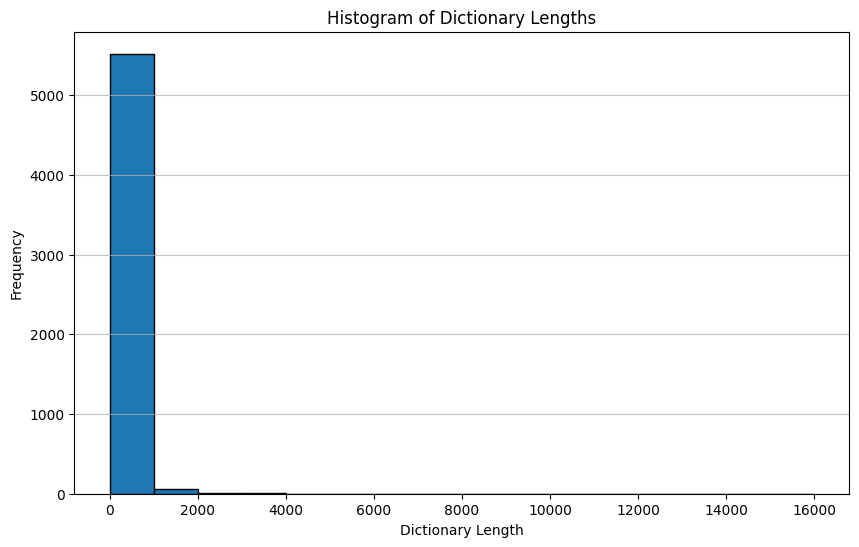

In [ ]:
import matplotlib.pyplot as plt

# Create the result DataFrame using the function you provided
result_df = create_activity_list_per_player_results_df

# Find the player with the longest activity dictionary and their player_id
max_dict_length = result_df['length of dict'].max()
player_with_max_dict = result_df[result_df['length of dict'] == max_dict_length]
print(f"Player with the longest dictionary (length {max_dict_length}):")
print(player_with_max_dict[['player_id', 'dictionary']])

# Find the number of players with the minimum dictionary length
min_dict_length = result_df['length of dict'].min()
players_with_min_dict = result_df[result_df['length of dict'] == min_dict_length]
num_players_with_min_dict = len(players_with_min_dict)
print(f"\nNumber of players with the minimum dictionary length ({min_dict_length}): {num_players_with_min_dict}")

# Create a histogram of dictionary lengths
plt.figure(figsize=(10, 6))
plt.hist(result_df['length of dict'], bins=range(0, 16001, 1000), edgecolor='k')
plt.title('Histogram of Dictionary Lengths')
plt.xlabel('Dictionary Length')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()


In [ ]:
# Calculate the mean and median activity dictionary length

mean_dict_length = result_df['length of dict'].mean()
median_dict_length = result_df['length of dict'].median()

print(f"Mean Dictionary Length: {mean_dict_length:.2f}")
print(f"Median Dictionary Length: {median_dict_length:.2f}")


Mean Dictionary Length: 84.72
Mean Dictionary Length: 84.72
Median Dictionary Length: 6.00


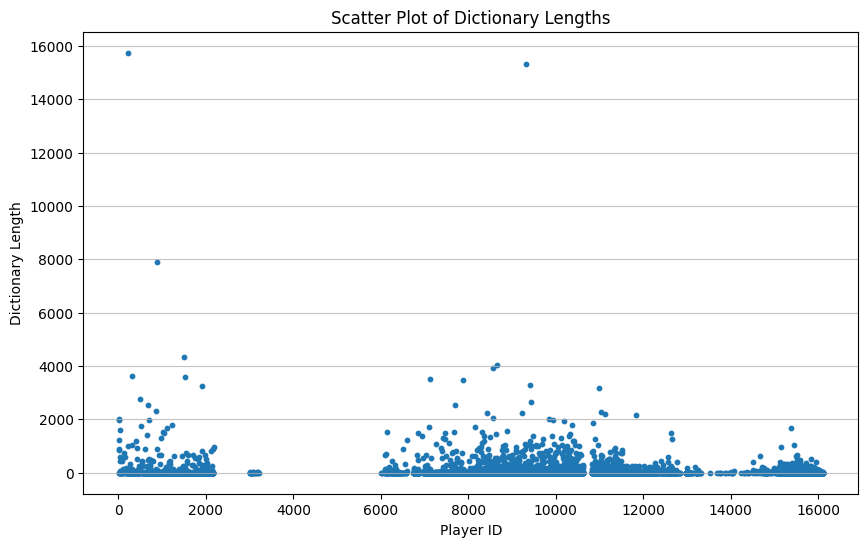

In [ ]:
# Create a scatter plot of activity dictionary lengths per player_id
plt.figure(figsize=(10, 6))
plt.scatter(result_df['player_id'], result_df['length of dict'], s=10)
plt.title('Scatter Plot of Activity Dictionary Lengths')
plt.xlabel('Player ID')
plt.ylabel('Dictionary Length')
plt.grid(axis='y', alpha=0.75)
plt.show()


Interpretation:
As expected there is a predominance in the smaller dictionary lengths (representing lower activity in general). As expected the earlier player_id nubers (who joined the squash league earlier) have a slight advantage over later player_id numbers - there is a slight negative correlation between dictionary length and player_id number. Some outliers have far more activity than the rest (approximately 6 dots are 4000+), and the most active two dots are around the 15000-16000 range, way in excess of the norm.

The mean average dictionary length across all players in this dataset is 84 items long, but the median was far smaller, just 6.

The player_id with the most activity was 225 with a dictionary length of 15742. This means a lot of activity, given the mean was 84.


In [ ]:
#Export the create_activity_list_per_player_results_df DataFrame
create_activity_list_per_player_results_df.to_csv('dictionary_player_activities.csv', index=False)


In [ ]:
# Find the rows in create_activity_list_per_player_results_df where player_id is 16116.0
player_16083_activities = create_activity_list_per_player_results_df[create_activity_list_per_player_results_df['player_id'] == 16083.0]

# Print the results
print(player_16083_activities)

# Find the row where player_id is 16083.0
player_16083_row = create_activity_list_per_player_results_df[create_activity_list_per_player_results_df['player_id'] == 16083.0].iloc[0]

# Extract the dictionary from the 'dictionary' column
player_16083_dictionary = player_16083_row['dictionary']

# Print the dictionary
print(player_16083_dictionary)



      player_id                                         dictionary  \
5577    16083.0  {535401: {'date': 2023-02-03 00:00:00, 'activi...   

      length of dict  
5577              20  
{535401: {'date': Timestamp('2023-02-03 00:00:00'), 'activity_log_msg': 'confirmed'}, 535402: {'date': Timestamp('2023-02-03 00:00:00'), 'activity_log_msg': 'login'}, 535403: {'date': Timestamp('2023-02-03 00:00:00'), 'activity_log_msg': 'contacted'}, 535408: {'date': Timestamp('2023-02-03 00:00:00'), 'activity_log_msg': 'login'}, 535409: {'date': Timestamp('2023-02-03 00:00:00'), 'activity_log_msg': 'contacted'}, 535432: {'date': Timestamp('2023-02-03 00:00:00'), 'activity_log_msg': 'hack'}, 535433: {'date': Timestamp('2023-02-03 00:00:00'), 'activity_log_msg': 'login'}, 535435: {'date': Timestamp('2023-02-03 00:00:00'), 'activity_log_msg': 'login'}, 535859: {'date': Timestamp('2023-02-07 00:00:00'), 'activity_log_msg': 'login'}, 535860: {'date': Timestamp('2023-02-07 00:00:00'), 'activity_log_msg': '

In [ ]:
create_activity_list_per_player_results_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5609 entries, 0 to 5608
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   player_id       5609 non-null   float64
 1   dictionary      5609 non-null   object 
 2   length of dict  5609 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 131.6+ KB


In [ ]:
#Create feature 24: Create activity list per player per season (stored in dict_activities_this_season column)
# and the length of this list (stored in dict_activities_length).
#This uses the dictionary of all activites per player created from the create_activity_list_per_player function.
#It populates the by_player_by_season_df with a dictionary of activities just for that player and season.
import pandas as pd

def populate_dict_activities_this_season(create_activity_list_per_player_results_df, by_player_by_season_df):
    # Create a new column 'dict_activities_this_season' initialized to None
    by_player_by_season_df['dict_activities_this_season'] = None

    # Create a new column 'dict_activities_length' initialized to 0
    by_player_by_season_df['dict_activities_length'] = 0

    # Iterate through by_player_by_season_df row by row
    for index, row in by_player_by_season_df.iterrows():
        player_id = row['player_id']
        season_start_date = row['season_start_date']
        season_end_date = row['season_end_date']

        # Find the corresponding player_id in create_activity_list_per_player_results_df
        player_activity_dict = create_activity_list_per_player_results_df[create_activity_list_per_player_results_df['player_id'] == player_id]['dictionary'].values

        # Initialize a dictionary to store activities for this season
        activities_this_season = {}

        if len(player_activity_dict) > 0:
            player_activity_dict = player_activity_dict[0]

            # Iterate through the player's activity dictionary
            for activity_id, activity_dict in player_activity_dict.items():
                # Extract the date and activity_log_msg from the activity_dict
                activity_date = activity_dict['date']
                activity_log_msg = activity_dict['activity_log_msg']

                # Check if the activity_date is within the season_start_date and season_end_date
                if not pd.isna(activity_date) and season_start_date <= activity_date <= season_end_date:
                    activities_this_season[activity_id] = {'date': activity_date, 'activity_log_msg': activity_log_msg}

        # Populate the 'dict_activities_this_season' column with the activities_this_season dictionary
        by_player_by_season_df.at[index, 'dict_activities_this_season'] = activities_this_season

        # Populate the 'dict_activities_length' column with the length of the activities_this_season dictionary
        by_player_by_season_df.at[index, 'dict_activities_length'] = len(activities_this_season)

    return by_player_by_season_df




by_player_by_season_w_dict_activities_this_season_df = populate_dict_activities_this_season(create_activity_list_per_player_results_df, by_player_by_season_df)
by_player_by_season_w_dict_activities_this_season_df

division_player_id  division_id  player_id  \
0                   16726         4024      15343   
1                   16725         4024      15306   
2                   16944         4060      15028   
3                   16943         4060      15306   
4                   16941         4060      15343   
...                   ...          ...        ...   
15573                8377         2639       7593   
15574                8376         2639       1600   
15575                8375         2639       8210   
15576                8374         2639       1706   
15577                   1            3         11   

                             List of seasons included in  division_name  \
0                                           [2380, 2390]              1   
1                                           [2380, 2390]              1   
2                                           [2380, 2390]              1   
3                                           [2380, 2390]              1   
4                                           [2380, 2390]              1   
...                                                  ...            ...   
15573  [2066, 2073, 2078, 2085, 2090, 2097, 2104, 210...              6   
15574  [102, 110, 118, 2005, 2012, 2024, 2031, 2036, ...              6   
15575         [2097, 2104, 2108, 2114, 2118, 2123, 2127]              6   
15576  [110, 118, 2005, 2012, 2024, 2031, 2036, 2044,...              6   
15577                          [1, 2, 3, 11, 12, 15, 29]              3   

       season_id  league_id List of all leagues played in  \
0           2380       2045                        [2045]   
1           2380       2045                        [2045]   
2           2390       2045                        [2045]   
3           2390       2045                        [2045]   
4           2390       2045                        [2045]   
...          ...        ...                           ...   
15573       2104          1                           [1]   
15574       2104          1                           [1]   
15575       2104          1                           [1]   
15576       2104          1                           [1]   
15577          1          1                           [1]   

       First_league_included_in  Second_league_included_in  ...  \
0                          2045                          0  ...   
1                          2045                          0  ...   
2                          2045                          0  ...   
3                          2045                          0  ...   
4                          2045                          0  ...   
...                         ...                        ...  ...   
15573                         1                          0  ...   
15574                         1                          0  ...   
15575                         1                          0  ...   
15576                         1                          0  ...   
15577                         1                          0  ...   

       unplaying_appeal_to_remain  number_of_seasons_player_has_been_in  \
0                               1                                     0   
1                               1                                     0   
2                               0                                     1   
3                               0                                     1   
4                               0                                     1   
...                           ...                                   ...   
15573                           0                                     6   
15574                           0                                    17   
15575                           0                                     1   
15576                           0                                    16   
15577                           0                                     0   

      number_of_seasons_player

In [ ]:
#Investigation of length of dictionaries in dict_activities_this_season (the dict_activities_length values)
# Calculate the length of dictionaries in dict_activities_this_season

# Find the maximum and minimum dictionary lengths
max_length = by_player_by_season_w_dict_activities_this_season_df['dict_activities_length'].max()
min_length = by_player_by_season_w_dict_activities_this_season_df['dict_activities_length'].min()

# Find the corresponding player_id and season_id for maximum and minimum lengths
max_length_row = by_player_by_season_w_dict_activities_this_season_df[by_player_by_season_w_dict_activities_this_season_df['dict_activities_length'] == max_length]
min_length_row = by_player_by_season_w_dict_activities_this_season_df[by_player_by_season_w_dict_activities_this_season_df['dict_activities_length'] == min_length]

# Print the results
print(f"Max Dictionary Length: {max_length}")
print(f"Min Dictionary Length: {min_length}")

print("Player ID and Season ID for Max Length:")
print(max_length_row[['player_id', 'season_id']])

#
# Find the number of rows with minimum length
num_rows_with_min_length = (by_player_by_season_w_dict_activities_this_season_df['dict_activities_length'] == min_length).sum()
print(f"Number of Rows with Min Length: {num_rows_with_min_length}")

# Calculate the mean and median for 'dict_activities_length'
mean_dict_length = by_player_by_season_w_dict_activities_this_season_df['dict_activities_length'].mean()
median_dict_length = by_player_by_season_w_dict_activities_this_season_df['dict_activities_length'].median()

print(f"Mean Dictionary Length: {mean_dict_length:.2f}")
print(f"Median Dictionary Length: {median_dict_length:.2f}")



# Export the DataFrame as CSV
by_player_by_season_w_dict_activities_this_season_df.to_csv("by_player_by_season_w_dict_activities_this_season_df.csv", index=False)

#Store amended df in the by_players_per_division_df variable
by_players_per_division_df = by_player_by_season_w_dict_activities_this_season_df


Max Dictionary Length: 1812
Min Dictionary Length: 0
Player ID and Season ID for Max Length:
      player_id  season_id
6665       9322       2163
Number of Rows with Min Length: 6678
Mean Dictionary Length: 27.32
Median Dictionary Length: 8.00


Interpretation: The player with the most activities per season was player_id=9322 in season_id=2163, who did 1812 tracked activities. There were lots of player_seasons (6678) who had the minimum (0) number of activities (from a total of 15578).

The mean dictionary length (i.e. number of activitiees this player and this season) was 27.32, and the median was 8.00.

In [ ]:
#Create features 25: create_list_logins_this_season
import pandas as pd

def create_list_logins_this_season(by_player_by_season_df):
    # Create a new column 'list_logins_this_season' initialized to None
    by_player_by_season_df['list_logins_this_season'] = None

    # Create a new column 'no_of_logins_this_season' initialized to 0
    by_player_by_season_df['no_of_logins_this_season'] = 0

    # Iterate through by_player_by_season_df row by row
    for index, row in by_player_by_season_df.iterrows():
        # Get the dictionary of activities for this season
        activities_this_season = row['dict_activities_this_season']

        # Initialize a list to store login dates for this season
        login_list = []

        # Check if activities_this_season is not None
        if activities_this_season is not None:
            # Iterate through the dictionary of activities
            for activity_id, activity_data in activities_this_season.items():
                # Check if the activity is a login
                if activity_data['activity_log_msg'] == 'login':
                    login_list.append(activity_data['date'])

        # Populate the 'list_logins_this_season' column with login_list
        by_player_by_season_df.at[index, 'list_logins_this_season'] = login_list

        # Populate the 'no_of_logins_this_season' column with the length of login_list
        by_player_by_season_df.at[index, 'no_of_logins_this_season'] = len(login_list)

    return by_player_by_season_df


by_player_by_season_w_list_logins_this_season_df = create_list_logins_this_season(by_player_by_season_df)
by_player_by_season_w_list_logins_this_season_df

division_player_id  division_id  player_id  \
0                   16726         4024      15343   
1                   16725         4024      15306   
2                   16944         4060      15028   
3                   16943         4060      15306   
4                   16941         4060      15343   
...                   ...          ...        ...   
15573                8377         2639       7593   
15574                8376         2639       1600   
15575                8375         2639       8210   
15576                8374         2639       1706   
15577                   1            3         11   

                             List of seasons included in  division_name  \
0                                           [2380, 2390]              1   
1                                           [2380, 2390]              1   
2                                           [2380, 2390]              1   
3                                           [2380, 2390]              1   
4                                           [2380, 2390]              1   
...                                                  ...            ...   
15573  [2066, 2073, 2078, 2085, 2090, 2097, 2104, 210...              6   
15574  [102, 110, 118, 2005, 2012, 2024, 2031, 2036, ...              6   
15575         [2097, 2104, 2108, 2114, 2118, 2123, 2127]              6   
15576  [110, 118, 2005, 2012, 2024, 2031, 2036, 2044,...              6   
15577                          [1, 2, 3, 11, 12, 15, 29]              3   

       season_id  league_id List of all leagues played in  \
0           2380       2045                        [2045]   
1           2380       2045                        [2045]   
2           2390       2045                        [2045]   
3           2390       2045                        [2045]   
4           2390       2045                        [2045]   
...          ...        ...                           ...   
15573       2104          1                           [1]   
15574       2104          1                           [1]   
15575       2104          1                           [1]   
15576       2104          1                           [1]   
15577          1          1                           [1]   

       First_league_included_in  Second_league_included_in  ...  \
0                          2045                          0  ...   
1                          2045                          0  ...   
2                          2045                          0  ...   
3                          2045                          0  ...   
4                          2045                          0  ...   
...                         ...                        ...  ...   
15573                         1                          0  ...   
15574                         1                          0  ...   
15575                         1                          0  ...   
15576                         1                          0  ...   
15577                         1                          0  ...   

       number_of_seasons_player_has_played_in_before_this  \
0                                                      0    
1                                                      0    
2                                                      0    
3                                                      0    
4                                                      0    
...                                                  ...    
15573                                                  6    
15574                                                 17    
15575                                                  1    
15576                                                 16    
15577                                                  0    

                                      payment_dictionary number_of_payments  \
0          {9904: [1, Timestamp('2022-04-27 00:00:00')]}                  1   
1                                       

In [ ]:
#Investigate no_of_logins_this_season
# Print the maximum and minimum values of 'no_of_logins_this_season'
max_logins = by_player_by_season_w_list_logins_this_season_df['no_of_logins_this_season'].max()
min_logins = by_player_by_season_w_list_logins_this_season_df['no_of_logins_this_season'].min()

print(f"Max Number of Logins: {max_logins}")
print(f"Min Number of Logins: {min_logins}")

# Find the corresponding player_id and season_id for the maximum number of logins
max_logins_row = by_player_by_season_w_list_logins_this_season_df[by_player_by_season_w_list_logins_this_season_df['no_of_logins_this_season'] == max_logins]

print("Player ID and Season ID for Max Number of Logins:")
print(max_logins_row[['player_id', 'season_id']])

# Calculate the mean and median for 'no_of_logins_this_season'
mean_logins = by_player_by_season_w_list_logins_this_season_df['no_of_logins_this_season'].mean()
median_logins = by_player_by_season_w_list_logins_this_season_df['no_of_logins_this_season'].median()

print(f"Mean Number of Logins: {mean_logins:.2f}")
print(f"Median Number of Logins: {median_logins:.2f}")

# Count the number of rows with the minimum number of logins
num_rows_with_min_logins = (by_player_by_season_w_list_logins_this_season_df['no_of_logins_this_season'] == min_logins).sum()

print(f"Number of Rows with Min Number of Logins: {num_rows_with_min_logins}")


# Export the DataFrame as CSV
by_player_by_season_w_list_logins_this_season_df.to_csv("by_player_by_season_w_list_logins_this_season_df.csv", index=False)

#Store amended df in the by_players_per_division_df variable
by_players_per_division_df = by_player_by_season_w_list_logins_this_season_df






Max Number of Logins: 284
Min Number of Logins: 0
Player ID and Season ID for Max Number of Logins:
      player_id  season_id
6668       9322       2159
Mean Number of Logins: 9.87
Median Number of Logins: 2.00
Number of Rows with Min Number of Logins: 6932


Interpretation. The player who logged in the most in any season was player_id=9322 in season_2159 who logged in 284 times. This is over a generally 6-week long season so 42 days. This equates to 6.7 logins a day.
The mean numberr of logins (for a player who is included in a season) is 9.87 and the median is 2. There are plenty of people (6932) who have been included in a seaons and never logged in; this is out of the total number of player_seasons of 15578. So (6932/15578) approximately 44% of people in seasons don't log in.

In [ ]:
by_players_per_division_df


division_player_id  division_id  player_id  \
0                   16726         4024      15343   
1                   16725         4024      15306   
2                   16944         4060      15028   
3                   16943         4060      15306   
4                   16941         4060      15343   
...                   ...          ...        ...   
15573                8377         2639       7593   
15574                8376         2639       1600   
15575                8375         2639       8210   
15576                8374         2639       1706   
15577                   1            3         11   

                             List of seasons included in  division_name  \
0                                           [2380, 2390]              1   
1                                           [2380, 2390]              1   
2                                           [2380, 2390]              1   
3                                           [2380, 2390]              1   
4                                           [2380, 2390]              1   
...                                                  ...            ...   
15573  [2066, 2073, 2078, 2085, 2090, 2097, 2104, 210...              6   
15574  [102, 110, 118, 2005, 2012, 2024, 2031, 2036, ...              6   
15575         [2097, 2104, 2108, 2114, 2118, 2123, 2127]              6   
15576  [110, 118, 2005, 2012, 2024, 2031, 2036, 2044,...              6   
15577                          [1, 2, 3, 11, 12, 15, 29]              3   

       season_id  league_id List of all leagues played in  \
0           2380       2045                        [2045]   
1           2380       2045                        [2045]   
2           2390       2045                        [2045]   
3           2390       2045                        [2045]   
4           2390       2045                        [2045]   
...          ...        ...                           ...   
15573       2104          1                           [1]   
15574       2104          1                           [1]   
15575       2104          1                           [1]   
15576       2104          1                           [1]   
15577          1          1                           [1]   

       First_league_included_in  Second_league_included_in  ...  \
0                          2045                          0  ...   
1                          2045                          0  ...   
2                          2045                          0  ...   
3                          2045                          0  ...   
4                          2045                          0  ...   
...                         ...                        ...  ...   
15573                         1                          0  ...   
15574                         1                          0  ...   
15575                         1                          0  ...   
15576                         1                          0  ...   
15577                         1                          0  ...   

       number_of_seasons_player_has_played_in_before_this  \
0                                                      0    
1                                                      0    
2                                                      0    
3                                                      0    
4                                                      0    
...                                                  ...    
15573                                                  6    
15574                                                 17    
15575                                                  1    
15576                                                 16    
15577                                                  0    

                                      payment_dictionary number_of_payments  \
0          {9904: [1, Timestamp('2022-04-27 00:00:00')]}                  1   
1                                       

In [ ]:
#Reimport 21/9

#Download files from google drive
#Get latest by_player_by_season_df (by_player_by_season_w_list_logins_this_season_df.csv)
! gdown 1rZcOIeAZZRwea4YWpexlSetDtViljyGx
#Get latest apccg_df (apccg_df_w_categorise_score_threeways_now (1).csv)
! gdown 18cZxupus9ekNa_8kHnMzvGM0tuBX1cSJ



Downloading...
From: https://drive.google.com/uc?id=1rZcOIeAZZRwea4YWpexlSetDtViljyGx
To: /content/by_player_by_season_w_list_logins_this_season_df.csv
100% 79.8M/79.8M [00:00<00:00, 168MB/s]
Downloading...
From: https://drive.google.com/uc?id=18cZxupus9ekNa_8kHnMzvGM0tuBX1cSJ
To: /content/apccg_df_w_categorise_score_threeways_now (1).csv
100% 153M/153M [00:02<00:00, 71.2MB/s]


In [ ]:
#Reimport by_player_by_season_df and apccg_df (by_player_by_season_w_list_games_w_closeness_df and apccg_df_w_categorise_score_threeways_now (1).csv)
#import some useful libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab as pl

# A custom function to convert a string of seasons to a list of integers
def str_to_int_list(s):
    if s.strip():
        return [int(x) for x in s.split(',')]
    else:
        return []

#import by_player_by_season_df
by_player_by_season_df = pd.read_csv(
    "/content/by_player_by_season_w_list_logins_this_season_df.csv")

# dtype_options = {

# by_player_by_season_df = pd.read_csv(
#     "/content/by_player_by_season_w_payment_dict_df.csv",
#     dtype=dtype_options,
#     converters={
#         'List of seasons included in': str_to_int_list,
#         'List of all leagues played in': str_to_int_list})


#Check datatypes
# by_player_by_season_df.info()

# Define dtype_options with data types specified as strings
# dtype_options = {
#     'division_player_id': 'int64',
#     'division_id': 'int64',
#     'player_id': 'int64',
#     'division_name': 'int64',
#     'season_id': 'int64',
#     'league_id': 'int64',
#     'First_league_included_in': pd.Int64Dtype(),
#     'Second_league_included_in': pd.Int64Dtype(),
#     'Third_league_included_in': pd.Int64Dtype(),
#     'Fourth_league_included_in': pd.Int64Dtype(),
# }

#Reset date columns as datetime datatypes in by_player_by_season_df
by_player_by_season_df['season_start_date'] = pd.to_datetime(by_player_by_season_df['season_start_date'])
by_player_by_season_df['season_end_date'] = pd.to_datetime(by_player_by_season_df['season_end_date'])


by_player_by_season_df.info()



#Reimport
apccg_df = pd.read_csv("/content/apccg_df_w_categorise_score_threeways_now (1).csv")

#Reset date columns as datetime datatypes in apccg_df
apccg_df['date'] = pd.to_datetime(apccg_df['date'])

apccg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15578 entries, 0 to 15577
Data columns (total 70 columns):
 #   Column                                                              Non-Null Count  Dtype         
---  ------                                                              --------------  -----         
 0   division_player_id                                                  15578 non-null  int64         
 1   division_id                                                         15578 non-null  int64         
 2   player_id                                                           15578 non-null  int64         
 3   List of seasons included in                                         15578 non-null  object        
 4   division_name                                                       15578 non-null  int64         
 5   season_id                                                           15578 non-null  int64         
 6   league_id                                             

<ipython-input-3-925539c15714>:56: DtypeWarning: Columns (4,17,25,28,30) have mixed types. Specify dtype option on import or set low_memory=False.
  apccg_df = pd.read_csv("/content/apccg_df_w_categorise_score_threeways_now (1).csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1021603 entries, 0 to 1021602
Data columns (total 32 columns):
 #   Column                                      Non-Null Count    Dtype         
---  ------                                      --------------    -----         
 0   game_id                                     1021603 non-null  float64       
 1   season_id                                   385386 non-null   float64       
 2   division_id                                 385386 non-null   float64       
 3   winner_id                                   33574 non-null    float64       
 4   score                                       32940 non-null    object        
 5   Played_a_game                               33574 non-null    float64       
 6   Received_inputted_game                      16787 non-null    float64       
 7   Inputted_game_result                        16787 non-null    float64       
 8   game_player_id                              1021603 non-null  

In [ ]:
apccg_df


game_id  season_id  division_id  winner_id  \
0            0.0        NaN          NaN        NaN   
1            0.0        NaN          NaN        NaN   
2            0.0        NaN          NaN        NaN   
3            0.0        NaN          NaN        NaN   
4            0.0        NaN          NaN        NaN   
...          ...        ...          ...        ...   
1021598  17275.0     2424.0       4182.0      673.0   
1021599  17276.0     2425.0       4188.0    15345.0   
1021600  17276.0     2425.0       4188.0    15345.0   
1021601  17277.0     2426.0       4195.0    15895.0   
1021602  17277.0     2426.0       4195.0    15895.0   

                               score  Played_a_game  Received_inputted_game  \
0                                NaN            NaN                     NaN   
1                                NaN            NaN                     NaN   
2                                NaN            NaN                     NaN   
3                                NaN            NaN                     NaN   
4                                NaN            NaN                     NaN   
...                              ...            ...                     ...   
1021598            15-13,16-14,15-10            1.0                     1.0   
1021599         9-15,15-9,15-9,15-12            1.0                     NaN   
1021600         9-15,15-9,15-9,15-12            1.0                     1.0   
1021601  14-16,15-7,15-7,14-16,15-11            1.0                     NaN   
1021602  14-16,15-7,15-7,14-16,15-11            1.0                     1.0   

         Inputted_game_result  game_player_id  challenge_id  ...  \
0                         NaN             0.0           0.0  ...   
1                         NaN             0.0           0.0  ...   
2                         NaN             0.0           0.0  ...   
3                         NaN             0.0           0.0  ...   
4                         NaN             0.0           0.0  ...   
...                       ...             ...           ...  ...   
1021598                   NaN         15734.0           0.0  ...   
1021599                   1.0         15345.0           0.0  ...   
1021600                   NaN         15947.0           0.0  ...   
1021601                   1.0         15877.0           0.0  ...   
1021602                   NaN         15895.0           0.0  ...   

         Involved_in_Comms  Received_comms  activity_log_log_id  \
0                      NaN             NaN                  0.0   
1                      NaN             NaN                  0.0   
2                      NaN             NaN                  0.0   
3                      NaN             NaN                  0.0   
4                      NaN             NaN                  0.0   
...                    ...             ...                  ...   
1021598                NaN             NaN                  0.0   
1021599                NaN             NaN                  0.0   
1021600                NaN             NaN                  0.0   
1021601                NaN             NaN                  0.0   
1021602                NaN             NaN                  0.0   

         activity_log_log_msg payments_log_negativespace_payment_id  \
0                         NaN                                 176.0   
1                         NaN                                 173.0   
2                         NaN                                 171.0   
3                         NaN                                 172.0   
4                         NaN                                 174.0   
...                       ...                                   ...   
1021598                   NaN                                   0.0   
1021599                   NaN                                   0.0   
1021600                   NaN                                   0.0   
1021601                   NaN                                   0.0

In [ ]:
by_player_by_season_df.info()

In [ ]:
#Create features 27: create_no_seasons function adding number of seasons included in to the
def create_no_seasons(by_player_by_season_df):
    # Initialize a new column 'number_of_seasons' with default value 0
    by_player_by_season_df['number_of_seasons'] = 0

    # Iterate through rows
    for index, row in by_player_by_season_df.iterrows():
        # Get the value in 'List of seasons included in'
        season_list = row['List of seasons included in']

        # Check if the value is a string
        if isinstance(season_list, str):
            # Strip brackets, split at comma, and convert to a list of ints
            season_list = [int(season_id) for season_id in season_list.strip('[]').split(',')]

            # Update the 'number_of_seasons' column with the count of seasons in the list
            by_player_by_season_df.at[index, 'number_of_seasons'] = len(season_list)

    return by_player_by_season_df

by_player_by_season_w_number_seasons_df = create_no_seasons(by_player_by_season_df)
by_player_by_season_w_number_seasons_df

division_player_id  division_id  player_id  \
0                   16726         4024      15343   
1                   16725         4024      15306   
2                   16944         4060      15028   
3                   16943         4060      15306   
4                   16941         4060      15343   
...                   ...          ...        ...   
15573                8377         2639       7593   
15574                8376         2639       1600   
15575                8375         2639       8210   
15576                8374         2639       1706   
15577                   1            3         11   

                             List of seasons included in  division_name  \
0                                           [2380, 2390]              1   
1                                           [2380, 2390]              1   
2                                           [2380, 2390]              1   
3                                           [2380, 2390]              1   
4                                           [2380, 2390]              1   
...                                                  ...            ...   
15573  [2066, 2073, 2078, 2085, 2090, 2097, 2104, 210...              6   
15574  [102, 110, 118, 2005, 2012, 2024, 2031, 2036, ...              6   
15575         [2097, 2104, 2108, 2114, 2118, 2123, 2127]              6   
15576  [110, 118, 2005, 2012, 2024, 2031, 2036, 2044,...              6   
15577                          [1, 2, 3, 11, 12, 15, 29]              3   

       season_id  league_id List of all leagues played in  \
0           2380       2045                        [2045]   
1           2380       2045                        [2045]   
2           2390       2045                        [2045]   
3           2390       2045                        [2045]   
4           2390       2045                        [2045]   
...          ...        ...                           ...   
15573       2104          1                           [1]   
15574       2104          1                           [1]   
15575       2104          1                           [1]   
15576       2104          1                           [1]   
15577          1          1                           [1]   

       First_league_included_in  Second_league_included_in  ...  \
0                          2045                          0  ...   
1                          2045                          0  ...   
2                          2045                          0  ...   
3                          2045                          0  ...   
4                          2045                          0  ...   
...                         ...                        ...  ...   
15573                         1                          0  ...   
15574                         1                          0  ...   
15575                         1                          0  ...   
15576                         1                          0  ...   
15577                         1                          0  ...   

                                      payment_dictionary  number_of_payments  \
0          {9904: [1, Timestamp('2022-04-27 00:00:00')]}                   1   
1                                                     {}                   0   
2          {9870: [1, Timestamp('2022-04-12 00:00:00')]}                   1   
3                                                     {}                   0   
4          {9904: [1, Timestamp('2022-04-27 00:00:00')]}                   1   
...                                                  ...                 ...   
15573  {3139: [2, Timestamp('2014-08-13 00:00:00')], ...                   7   
15574  {1723: [3, Timestamp('2013-04-02 00:00:00')], ...                   8   
15575  {3784: [1, Timestamp('2015-03-29 00:00:00')], ...                   7   
15576  {1839: [2, Timestamp('2013-05-15 00:00:00')], ...                  17   
15577  {50: [1, Timestamp('2011-03-07 00:00:00')], 

In [ ]:
#Investigate number of seasons
# Find the maximum and minimum number_of_seasons
max_seasons = by_player_by_season_w_number_seasons_df['number_of_seasons'].max()
min_seasons = by_player_by_season_w_number_seasons_df['number_of_seasons'].min()

# Find the corresponding player_id and season_id for maximum and minimum number_of_seasons
max_seasons_row = by_player_by_season_w_number_seasons_df[by_player_by_season_w_number_seasons_df['number_of_seasons'] == max_seasons]
min_seasons_row = by_player_by_season_w_number_seasons_df[by_player_by_season_w_number_seasons_df['number_of_seasons'] == min_seasons]

# Print the results
print(f"Max Number of Seasons: {max_seasons}")
print(f"Min Number of Seasons: {min_seasons}")

print("Player ID and Season ID for Max Number of Seasons:")
print(max_seasons_row[['player_id', 'season_id']])

# Find the number of players with the minimum number_of_seasons
num_players_with_min_seasons = (by_player_by_season_w_number_seasons_df['number_of_seasons'] == min_seasons).sum()
print(f"Number of Players with Min Number of Seasons: {num_players_with_min_seasons}")

# Calculate the mean and median for number_of_seasons
mean_seasons = by_player_by_season_w_number_seasons_df['number_of_seasons'].mean()
median_seasons = by_player_by_season_w_number_seasons_df['number_of_seasons'].median()

print(f"Mean Number of Seasons: {mean_seasons:.2f}")
print(f"Median Number of Seasons: {median_seasons:.2f}")



# Export the DataFrame as CSV
by_player_by_season_w_number_seasons_df.to_csv("by_player_by_season_w_number_seasons_df.csv", index=False)

#Store amended df in the by_players_per_division_df variable
by_players_per_division_df = by_player_by_season_w_number_seasons_df

Max Number of Seasons: 79
Min Number of Seasons: 1
Player ID and Season ID for Max Number of Seasons:
      player_id  season_id
6942        673       2217
6943        673       2355
6944        673       2133
6945        673       2252
6946        673       2165
...         ...        ...
7016        673         92
7017        673       2233
7018        673       2254
7019        673       2174
7020        673         67

[79 rows x 2 columns]
Number of Players with Min Number of Seasons: 1018
Mean Number of Seasons: 15.83
Median Number of Seasons: 10.00


Interpretation: The most active player in this dataset was included in 79 seasons.
Lots of players (1018) were only included in 1 season, but this makes a significant proportion of the total: this is 1018 unique player_ids from a total of 3115 unique player_id so approximately 32% (1018 / 3115 =0.3268057784). For comparison,  1839 unique player_ids made a payment.
The mean number of seasons included in is 16 (rounding up) and the median is 10.


In [ ]:
#Create features 28: Number of ratio of number of payments to number of seasons

def create_ratio_payments_to_seasons(by_player_by_season_df):
    # Create a new column 'ratio_payments_to_seasons' initialized to None
    by_player_by_season_df['ratio_payments_to_seasons'] = None

    # Iterate through rows
    for index, row in by_player_by_season_df.iterrows():
        # Calculate the ratio_payments_to_seasons for this row
        ratio = row['number_of_payments'] / row['number_of_seasons']

        # Populate the 'ratio_payments_to_seasons' column with the calculated ratio
        by_player_by_season_df.at[index, 'ratio_payments_to_seasons'] = ratio

    return by_player_by_season_df

# Call the function to add the 'ratio_payments_to_seasons' feature
by_player_by_season_w_ratio_payments_to_seasons_df = create_ratio_payments_to_seasons(by_player_by_season_df)

by_player_by_season_w_ratio_payments_to_seasons_df

division_player_id  division_id  player_id  \
0                   16726         4024      15343   
1                   16725         4024      15306   
2                   16944         4060      15028   
3                   16943         4060      15306   
4                   16941         4060      15343   
...                   ...          ...        ...   
15573                8377         2639       7593   
15574                8376         2639       1600   
15575                8375         2639       8210   
15576                8374         2639       1706   
15577                   1            3         11   

                             List of seasons included in  division_name  \
0                                           [2380, 2390]              1   
1                                           [2380, 2390]              1   
2                                           [2380, 2390]              1   
3                                           [2380, 2390]              1   
4                                           [2380, 2390]              1   
...                                                  ...            ...   
15573  [2066, 2073, 2078, 2085, 2090, 2097, 2104, 210...              6   
15574  [102, 110, 118, 2005, 2012, 2024, 2031, 2036, ...              6   
15575         [2097, 2104, 2108, 2114, 2118, 2123, 2127]              6   
15576  [110, 118, 2005, 2012, 2024, 2031, 2036, 2044,...              6   
15577                          [1, 2, 3, 11, 12, 15, 29]              3   

       season_id  league_id List of all leagues played in  \
0           2380       2045                        [2045]   
1           2380       2045                        [2045]   
2           2390       2045                        [2045]   
3           2390       2045                        [2045]   
4           2390       2045                        [2045]   
...          ...        ...                           ...   
15573       2104          1                           [1]   
15574       2104          1                           [1]   
15575       2104          1                           [1]   
15576       2104          1                           [1]   
15577          1          1                           [1]   

       First_league_included_in  Second_league_included_in  ...  \
0                          2045                          0  ...   
1                          2045                          0  ...   
2                          2045                          0  ...   
3                          2045                          0  ...   
4                          2045                          0  ...   
...                         ...                        ...  ...   
15573                         1                          0  ...   
15574                         1                          0  ...   
15575                         1                          0  ...   
15576                         1                          0  ...   
15577                         1                          0  ...   

       number_of_payments  list_games_w_closeness  \
0                       1                     NaN   
1                       0                     NaN   
2                       1                     NaN   
3                       0                     NaN   
4                       1                     NaN   
...                   ...                     ...   
15573                   7               [1, 1, 1]   
15574                   8                  [1, 1]   
15575                   7               [1, 1, 1]   
15576                  17                     [1]   
15577                   3         [1, 1, 1, 1, 1]   

      closeness_score_total_for_games_this_season  \
0                                             NaN   
1                                             NaN   
2                                             NaN   
3                                             NaN   
4                            

In [ ]:
#Investigate ratio_payments_to_seasons
# Print the maximum and minimum values for 'ratio_payments_to_seasons'
max_ratio = by_player_by_season_w_ratio_payments_to_seasons_df['ratio_payments_to_seasons'].max()
min_ratio = by_player_by_season_w_ratio_payments_to_seasons_df['ratio_payments_to_seasons'].min()

print(f"Max Ratio Payments to Seasons: {max_ratio}")
print(f"Min Ratio Payments to Seasons: {min_ratio}")

# Find the number of rows where 'ratio_payments_to_seasons' is equal to the maximum and minimum values
num_rows_max_ratio = (by_player_by_season_w_ratio_payments_to_seasons_df['ratio_payments_to_seasons'] == max_ratio).sum()
num_rows_min_ratio = (by_player_by_season_w_ratio_payments_to_seasons_df['ratio_payments_to_seasons'] == min_ratio).sum()

print(f"Number of Rows with Max Ratio Payments to Seasons: {num_rows_max_ratio}")
print(f"Number of Rows with Min Ratio Payments to Seasons: {num_rows_min_ratio}")

# Calculate and print the mean and median of 'ratio_payments_to_seasons'
mean_ratio = by_player_by_season_w_ratio_payments_to_seasons_df['ratio_payments_to_seasons'].mean()
median_ratio = by_player_by_season_w_ratio_payments_to_seasons_df['ratio_payments_to_seasons'].median()

print(f"Mean Ratio Payments to Seasons: {mean_ratio}")
print(f"Median Ratio Payments to Seasons: {median_ratio}")




# Export the DataFrame as CSV
by_player_by_season_w_ratio_payments_to_seasons_df.to_csv("by_player_by_season_w_ratio_payments_to_seasons_df .csv", index=False)

#Store amended df in the by_players_per_division_df variable
by_players_per_division_df = by_player_by_season_w_ratio_payments_to_seasons_df


Max Ratio Payments to Seasons: 2.0
Min Ratio Payments to Seasons: 0.0
Number of Rows with Max Ratio Payments to Seasons: 22
Number of Rows with Min Ratio Payments to Seasons: 2138
Mean Ratio Payments to Seasons: 0.5030720105255615
Median Ratio Payments to Seasons: 0.5


In [ ]:
# Investigate the max ratio players. Find the row where 'ratio_payments_to_seasons' is equal to the maximum value
max_ratio_row = by_player_by_season_df[by_player_by_season_df['ratio_payments_to_seasons'] == max_ratio]

# Extract the player_id, season_id, number_of_payments, and number_of_seasons from the row
player_id_max_ratio = max_ratio_row['player_id'].values[0]
season_id_max_ratio = max_ratio_row['season_id'].values[0]
num_payments_max_ratio = max_ratio_row['number_of_payments'].values[0]
num_seasons_max_ratio = max_ratio_row['number_of_seasons'].values[0]

# Print the results
print("Player ID and Season ID with Max Ratio Payments to Seasons:")
print(f"Player ID: {player_id_max_ratio}")
print(f"Season ID: {season_id_max_ratio}")
print(f"Number of Payments: {num_payments_max_ratio}")
print(f"Number of Seasons: {num_seasons_max_ratio}")


Player ID and Season ID with Max Ratio Payments to Seasons:
Player ID: 16047
Season ID: 2428
Number of Payments: 2
Number of Seasons: 1


Interpretation. Unexpectedly, there were ratios of more than one. There were some players (22) who had paid more times than been included in a season. These players may have been building up a surplus of season's payments, to use in the future. It was unexpected to find a ratio of more than 1. For example, player_id=16047 in season_id=2428 had made two payments, despit only so far having been included in one season. The mean and median ratios were similar, around half, meaning on average most players have been included in double the number of seasons than the number of payments they have made. This would be fine if each payment was for 2 seasons.

Subinvestigation: What was the mean number of seasons per payment_id? Was it 2?

In [ ]:

#Subinvestigation: What was the mean number of seasons per payment_id? Was it 2?
# Filter the DataFrame to rows where payments_log_negativespace_payment_id is not NaN and not 0
filtered_df = apccg_df[(~apccg_df['payments_log_negativespace_payment_id'].isna()) & (apccg_df['payments_log_negativespace_payment_id'] != 0)]

# Calculate the mean for payments_log_negativespace_payment_seasons
mean_seasons_payment = filtered_df['payments_log_negativespace_payment_seasons'].mean()

print(f"Mean Payments Log NegativeSpace Payment Seasons: {mean_seasons_payment:.2f}")


NameError: ignored

Interpretation: The mean number of seasons per payment is 1.58. It is surprising that this is not closer to 1. It means most players tend to pay for multiple seasons at once, not one by one.

In [ ]:
#Reimport 22/9


#Download files from google drive
#Get latest by_player_by_season_df (by_player_by_season_w_ratio_payments_to_seasons_df )
! gdown 1-QTj_ckIRgE2jPFpx6Rs3cZjee2tCW5f
#Get latest apccg_df (apccg_df_w_categorise_score_threeways_now (1).csv)
! gdown 18cZxupus9ekNa_8kHnMzvGM0tuBX1cSJ


Downloading...
From: https://drive.google.com/uc?id=1-QTj_ckIRgE2jPFpx6Rs3cZjee2tCW5f
To: /content/by_player_by_season_w_ratio_payments_to_seasons_df .csv
100% 80.0M/80.0M [00:00<00:00, 117MB/s]
Downloading...
From: https://drive.google.com/uc?id=18cZxupus9ekNa_8kHnMzvGM0tuBX1cSJ
To: /content/apccg_df_w_categorise_score_threeways_now (1).csv
100% 153M/153M [00:01<00:00, 92.6MB/s]


In [ ]:
#Reimport by_player_by_season_df and apccg_df (by_player_by_season_w_list_games_w_closeness_df and apccg_df_w_categorise_score_threeways_now (1).csv)
#import some useful libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab as pl

# A custom function to convert a string of seasons to a list of integers
def str_to_int_list(s):
    if s.strip():
        return [int(x) for x in s.split(',')]
    else:
        return []

#import by_player_by_season_df
by_player_by_season_df = pd.read_csv(
    "/content/by_player_by_season_w_ratio_payments_to_seasons_df .csv")

# dtype_options = {

# by_player_by_season_df = pd.read_csv(
#     "/content/by_player_by_season_w_payment_dict_df.csv",
#     dtype=dtype_options,
#     converters={
#         'List of seasons included in': str_to_int_list,
#         'List of all leagues played in': str_to_int_list})


#Check datatypes
# by_player_by_season_df.info()

# Define dtype_options with data types specified as strings
# dtype_options = {
#     'division_player_id': 'int64',
#     'division_id': 'int64',
#     'player_id': 'int64',
#     'division_name': 'int64',
#     'season_id': 'int64',
#     'league_id': 'int64',
#     'First_league_included_in': pd.Int64Dtype(),
#     'Second_league_included_in': pd.Int64Dtype(),
#     'Third_league_included_in': pd.Int64Dtype(),
#     'Fourth_league_included_in': pd.Int64Dtype(),
# }

#Reset date columns as datetime datatypes in by_player_by_season_df
by_player_by_season_df['season_start_date'] = pd.to_datetime(by_player_by_season_df['season_start_date'])
by_player_by_season_df['season_end_date'] = pd.to_datetime(by_player_by_season_df['season_end_date'])


by_player_by_season_df.info()



#Reimport
apccg_df = pd.read_csv("/content/apccg_df_w_categorise_score_threeways_now (1).csv")

#Reset date columns as datetime datatypes in apccg_df
apccg_df['date'] = pd.to_datetime(apccg_df['date'])

apccg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15578 entries, 0 to 15577
Data columns (total 72 columns):
 #   Column                                                              Non-Null Count  Dtype         
---  ------                                                              --------------  -----         
 0   division_player_id                                                  15578 non-null  int64         
 1   division_id                                                         15578 non-null  int64         
 2   player_id                                                           15578 non-null  int64         
 3   List of seasons included in                                         15578 non-null  object        
 4   division_name                                                       15578 non-null  int64         
 5   season_id                                                           15578 non-null  int64         
 6   league_id                                             

<ipython-input-2-f6fc46037331>:56: DtypeWarning: Columns (4,17,25,28,30) have mixed types. Specify dtype option on import or set low_memory=False.
  apccg_df = pd.read_csv("/content/apccg_df_w_categorise_score_threeways_now (1).csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1021603 entries, 0 to 1021602
Data columns (total 32 columns):
 #   Column                                      Non-Null Count    Dtype         
---  ------                                      --------------    -----         
 0   game_id                                     1021603 non-null  float64       
 1   season_id                                   385386 non-null   float64       
 2   division_id                                 385386 non-null   float64       
 3   winner_id                                   33574 non-null    float64       
 4   score                                       32940 non-null    object        
 5   Played_a_game                               33574 non-null    float64       
 6   Received_inputted_game                      16787 non-null    float64       
 7   Inputted_game_result                        16787 non-null    float64       
 8   game_player_id                              1021603 non-null  

In [ ]:
import pandas as pd

# Assuming you have a DataFrame called apccg_df

# Count the number of rows where game_id is not equal to 0.0
num_rows_with_nonzero_game_id = len(apccg_df[apccg_df['game_id'] != 0.0])

print(f"Number of rows where game_id is not 0.0: {num_rows_with_nonzero_game_id}")


Number of rows where game_id is not 0.0: 33574


In [ ]:
import pandas as pd

# Assuming you have a DataFrame called apccg_df

# Find the maximum and minimum values of game_id
max_game_id = apccg_df['game_id'].max()
min_game_id = apccg_df['game_id'].min()

print(f"Max game_id: {max_game_id}")
print(f"Min game_id: {min_game_id}")


Max game_id: 17277.0
Min game_id: 0.0


In [ ]:
sorted_apccg_df = apccg_df.sort_values(by='game_id', ascending=False)
print(sorted_apccg_df['game_id'])


1021602    17277.0
1021601    17277.0
1021600    17276.0
1021599    17276.0
1021598    17275.0
            ...   
340539         0.0
340540         0.0
340541         0.0
340542         0.0
510801         0.0
Name: game_id, Length: 1021603, dtype: float64


In [ ]:
#Create features 23: Updated create_list_games_w_closeness that includes a 0 for where

# Code to drop existing two columns
by_player_by_season_df.drop(['list_games_w_closeness', 'closeness_score_total_for_games_this_season'], axis=1, inplace=True)

def create_list_games_w_closeness(by_player_by_season_df, apccg_df):
    # Initialize the columns in 'by_player_by_season_df'
    by_player_by_season_df['list_games_w_closeness'] = None
    by_player_by_season_df['closeness_score_total_for_games_this_season'] = None

    # Filter apccg_df to exclude rows with game_id as zero or NaN
    filtered_apccg_df = apccg_df[(apccg_df['game_id'] != 0) & (~apccg_df['game_id'].isna())]

    # Iterate through rows in 'by_player_by_season_df'
    for index, row in by_player_by_season_df.iterrows():
        games_played_this_season = row['games_played_this_season']

        # Initialize lists for the closeness values of games and the total closeness score
        list_games_w_closeness = []
        closeness_score_total = 0

        # Check if 'games_played_this_season' is empty
        if not games_played_this_season:
            continue

        # Convert the string to a list of integers while handling potential issues
        games_played_this_season = [int(game_id.strip()) for game_id in games_played_this_season.strip("[]").split(",") if game_id.strip()]

        # Iterate through game_ids in 'games_played_this_season'
        for game_id in games_played_this_season:
            # Find the corresponding rows in 'filtered_apccg_df' for the given game_id
            game_rows = filtered_apccg_df[filtered_apccg_df['game_id'] == game_id]

            # Check if there are any matching rows
            if not game_rows.empty:
                # Choose one of the matching rows (you can choose the first one, for example)
                game_row = game_rows.iloc[0]

                # Get the closeness_of_score from the chosen row and convert to integer
                closeness_of_score = int(game_row['closeness_of_score']) if pd.notna(game_row['closeness_of_score']) else 0

                # Append to the temporary list and update the total closeness score
                list_games_w_closeness.append(closeness_of_score)
                closeness_score_total += closeness_of_score

        # Assign the temporary lists to the DataFrame and convert to integer
        by_player_by_season_df.at[index, 'list_games_w_closeness'] = list_games_w_closeness
        by_player_by_season_df.at[index, 'closeness_score_total_for_games_this_season'] = int(closeness_score_total)

    return by_player_by_season_df



by_player_by_season_w_v2_list_games_w_closeness_df=create_list_games_w_closeness(by_player_by_season_df, apccg_df)
by_player_by_season_w_v2_list_games_w_closeness_df



division_player_id  division_id  player_id  \
0                   16726         4024      15343   
1                   16725         4024      15306   
2                   16944         4060      15028   
3                   16943         4060      15306   
4                   16941         4060      15343   
...                   ...          ...        ...   
15573                8377         2639       7593   
15574                8376         2639       1600   
15575                8375         2639       8210   
15576                8374         2639       1706   
15577                   1            3         11   

                             List of seasons included in  division_name  \
0                                           [2380, 2390]              1   
1                                           [2380, 2390]              1   
2                                           [2380, 2390]              1   
3                                           [2380, 2390]              1   
4                                           [2380, 2390]              1   
...                                                  ...            ...   
15573  [2066, 2073, 2078, 2085, 2090, 2097, 2104, 210...              6   
15574  [102, 110, 118, 2005, 2012, 2024, 2031, 2036, ...              6   
15575         [2097, 2104, 2108, 2114, 2118, 2123, 2127]              6   
15576  [110, 118, 2005, 2012, 2024, 2031, 2036, 2044,...              6   
15577                          [1, 2, 3, 11, 12, 15, 29]              3   

       season_id  league_id List of all leagues played in  \
0           2380       2045                        [2045]   
1           2380       2045                        [2045]   
2           2390       2045                        [2045]   
3           2390       2045                        [2045]   
4           2390       2045                        [2045]   
...          ...        ...                           ...   
15573       2104          1                           [1]   
15574       2104          1                           [1]   
15575       2104          1                           [1]   
15576       2104          1                           [1]   
15577          1          1                           [1]   

       First_league_included_in  Second_league_included_in  ...  \
0                          2045                          0  ...   
1                          2045                          0  ...   
2                          2045                          0  ...   
3                          2045                          0  ...   
4                          2045                          0  ...   
...                         ...                        ...  ...   
15573                         1                          0  ...   
15574                         1                          0  ...   
15575                         1                          0  ...   
15576                         1                          0  ...   
15577                         1                          0  ...   

       number_of_payments  fraction_games_w_max_closeness  \
0                       1                             NaN   
1                       0                             NaN   
2                       1                             NaN   
3                       0                             NaN   
4                       1                             NaN   
...                   ...                             ...   
15573                   7                             0.5   
15574                   8                             0.5   
15575                   7                             0.5   
15576                  17                             0.5   
15577                   3                             0.5   

                             dict_activities_this_season  \
0      {486267: {'date': Timestamp('2022-04-11 00:00:...   
1                                                     {}   
2      {493806: {'

In [ ]:
#Investigate closeness_score_total_for_games_this_season
value_counts = by_player_by_season_w_v2_list_games_w_closeness_df['closeness_score_total_for_games_this_season'].value_counts().sort_index()
print(value_counts)

max_closeness_score_total = by_player_by_season_w_v2_list_games_w_closeness_df['closeness_score_total_for_games_this_season'].max()
min_closeness_score_total = by_player_by_season_w_v2_list_games_w_closeness_df['closeness_score_total_for_games_this_season'].min()

max_closeness_score_rows = by_player_by_season_w_v2_list_games_w_closeness_df[by_player_by_season_w_v2_list_games_w_closeness_df['closeness_score_total_for_games_this_season'] == max_closeness_score_total]
min_closeness_score_rows = by_player_by_season_w_v2_list_games_w_closeness_df[by_player_by_season_w_v2_list_games_w_closeness_df['closeness_score_total_for_games_this_season'] == min_closeness_score_total]

for index, row in max_closeness_score_rows.iterrows():
    games_played_this_season = row['games_played_this_season']
    player_id = row['player_id']
    season_id = row['season_id']
    list_games_w_closeness = row['list_games_w_closeness']

    print(f"Player ID: {player_id}, Season ID: {season_id}, Games Played This Season: {games_played_this_season}")
    print(f"List Games with Closeness: {list_games_w_closeness}")

print(f"Max Closeness Score Total: {max_closeness_score_total}")
print(f"Min Closeness Score Total: {min_closeness_score_total}")


# Export the DataFrame as CSV
by_player_by_season_w_v2_list_games_w_closeness_df.to_csv("by_player_by_season_w_v2_list_games_w_closeness_df.csv", index=False)

by_player_by_season_df = by_player_by_season_w_v2_list_games_w_closeness_df

0    4001
1    2164
2    2575
3    2927
4    2303
5    1170
6     357
7      68
8      12
9       1
Name: closeness_score_total_for_games_this_season, dtype: int64
Player ID: 3033, Season ID: 2035, Games Played This Season: [4294, 4345, 4442, 4443, 4487, 4505]
List Games with Closeness: [2, 2, 1, 1, 2, 1]
Max Closeness Score Total: 9
Min Closeness Score Total: 0


Interpretation: As expected the closeness total is heavily skewed toward few games and quite close. The most extreme score is 9, scored from a total of 6 games (by player_id 3033 in season_id=2035).  

In [ ]:
game_ids_to_print = [13795, 13821, 13871, 13904]

for game_id in game_ids_to_print:
    rows = apccg_df[apccg_df['game_id'] == game_id]
    print(f"Rows with game_id {game_id}:\n")
    print(rows)
    print("\n")


Rows with game_id 13795:

         game_id  season_id  division_id  winner_id  \
1014767  13795.0     2279.0       3646.0     1394.0   
1014768  13795.0     2279.0       3646.0     1394.0   

                                 score  Played_a_game  Received_inputted_game  \
1014767  17-15,14-16,15-11,11-15,15-11            1.0                     1.0   
1014768  17-15,14-16,15-11,11-15,15-11            1.0                     NaN   

         Inputted_game_result  game_player_id  challenge_id  ...  \
1014767                   NaN          1394.0           0.0  ...   
1014768                   1.0          7689.0           0.0  ...   

         Involved_in_Comms  Received_comms  activity_log_log_id  \
1014767                NaN             NaN                  0.0   
1014768                NaN             NaN                  0.0   

         activity_log_log_msg payments_log_negativespace_payment_id  \
1014767                   NaN                                   0.0   
1014768        

In [ ]:
#Create features 24: create_fraction_games_w_max_closeness
import numpy as np
import pandas as pd

def create_fraction_games_w_max_closeness(by_player_by_season_df):
    # Add the 'fraction_games_w_max_closeness' column to all rows with a default value of None
    by_player_by_season_df['fraction_games_w_max_closeness'] = None

    # Filter the DataFrame to include only rows with real (not None) values in 'list_games_w_closeness' column
    filtered_df = by_player_by_season_df[by_player_by_season_df['list_games_w_closeness'].notna()]

    # Iterate through the filtered DataFrame
    for index, row in filtered_df.iterrows():
        list_games_w_closeness = row['list_games_w_closeness']
        closeness_score_total = row['closeness_score_total_for_games_this_season']

        # Process the 'list_games_w_closeness' column as described
        if isinstance(list_games_w_closeness, str):
            # Convert the 'list_games_w_closeness' string to a list of integers
            try:
                list_games_w_closeness = [int(value) for value in list_games_w_closeness.strip('[]').split(',') if value.strip() != 'nan']
            except (ValueError, AttributeError):
                list_games_w_closeness = []

        # Calculate the fraction, ensuring closeness_score_total is an integer
        fraction = closeness_score_total / (2 * len(list_games_w_closeness)) if len(list_games_w_closeness) > 0 else None

        # Update the 'fraction_games_w_max_closeness' column for the current row
        by_player_by_season_df.at[index, 'fraction_games_w_max_closeness'] = fraction

    return by_player_by_season_df

# Test the function
# by_player_by_season_df = create_fraction_games_w_max_closeness(by_player_by_season_df)

by_player_by_season_w_fraction_games_w_max_closeness_df=create_fraction_games_w_max_closeness(by_player_by_season_df)
by_player_by_season_w_fraction_games_w_max_closeness_df

division_player_id  division_id  player_id  \
0                   16726         4024      15343   
1                   16725         4024      15306   
2                   16944         4060      15028   
3                   16943         4060      15306   
4                   16941         4060      15343   
...                   ...          ...        ...   
15573                8377         2639       7593   
15574                8376         2639       1600   
15575                8375         2639       8210   
15576                8374         2639       1706   
15577                   1            3         11   

                             List of seasons included in  division_name  \
0                                           [2380, 2390]              1   
1                                           [2380, 2390]              1   
2                                           [2380, 2390]              1   
3                                           [2380, 2390]              1   
4                                           [2380, 2390]              1   
...                                                  ...            ...   
15573  [2066, 2073, 2078, 2085, 2090, 2097, 2104, 210...              6   
15574  [102, 110, 118, 2005, 2012, 2024, 2031, 2036, ...              6   
15575         [2097, 2104, 2108, 2114, 2118, 2123, 2127]              6   
15576  [110, 118, 2005, 2012, 2024, 2031, 2036, 2044,...              6   
15577                          [1, 2, 3, 11, 12, 15, 29]              3   

       season_id  league_id List of all leagues played in  \
0           2380       2045                        [2045]   
1           2380       2045                        [2045]   
2           2390       2045                        [2045]   
3           2390       2045                        [2045]   
4           2390       2045                        [2045]   
...          ...        ...                           ...   
15573       2104          1                           [1]   
15574       2104          1                           [1]   
15575       2104          1                           [1]   
15576       2104          1                           [1]   
15577          1          1                           [1]   

       First_league_included_in  Second_league_included_in  ...  \
0                          2045                          0  ...   
1                          2045                          0  ...   
2                          2045                          0  ...   
3                          2045                          0  ...   
4                          2045                          0  ...   
...                         ...                        ...  ...   
15573                         1                          0  ...   
15574                         1                          0  ...   
15575                         1                          0  ...   
15576                         1                          0  ...   
15577                         1                          0  ...   

       number_of_payments  fraction_games_w_max_closeness  \
0                       1                            None   
1                       0                            None   
2                       1                            None   
3                       0                            None   
4                       1                            None   
...                   ...                             ...   
15573                   7                             0.5   
15574                   8                             0.5   
15575                   7                             0.5   
15576                  17                             0.5   
15577                   3                             0.5   

                             dict_activities_this_season  \
0      {486267: {'date': Timestamp('2022-04-11 00:00:...   
1                                                     {}   
2      {493806: {'

In [ ]:
#Investigate fraction_games_w_max_closeness
# Count the number of rows for each type of value in 'fraction_games_w_max_closeness'
value_counts = by_player_by_season_w_fraction_games_w_max_closeness_df['fraction_games_w_max_closeness'].value_counts()

# Print the value counts
print("Value counts for 'fraction_games_w_max_closeness':")
print(value_counts)

# Find rows with maximum 'closeness_score_total_for_games_this_season' where 'fraction_games_w_max_closeness' is 1.0
max_closeness_rows = by_player_by_season_w_fraction_games_w_max_closeness_df[by_player_by_season_w_fraction_games_w_max_closeness_df['fraction_games_w_max_closeness'] == 1.0]

# Find the row with the highest 'closeness_score_total_for_games_this_season' within those rows
highest_closeness_row = max_closeness_rows[max_closeness_rows['closeness_score_total_for_games_this_season'] == max_closeness_rows['closeness_score_total_for_games_this_season'].max()]

# Print the row with the highest 'closeness_score_total_for_games_this_season'
print("\nRow with the highest 'closeness_score_total_for_games_this_season' among rows with fraction 1.0:")
print(highest_closeness_row)


# Export the updated DataFrame to a CSV file
by_player_by_season_w_fraction_games_w_max_closeness_df.to_csv('by_player_by_season_w_fraction_games_w_max_closeness_df.csv', index=False)

by_player_by_season_df = by_player_by_season_w_fraction_games_w_max_closeness_df

Value counts for 'fraction_games_w_max_closeness':
0.500000    9295
0.625000     380
0.666667     355
0.750000     269
0.375000     240
0.250000     218
0.333333     217
0.000000     179
0.600000     166
1.000000     125
0.400000     121
0.416667      43
0.583333      42
0.833333      34
0.166667      20
0.300000      19
0.700000      15
0.125000       6
0.100000       3
0.200000       2
0.875000       2
0.800000       2
0.357143       1
0.571429       1
0.083333       1
Name: fraction_games_w_max_closeness, dtype: int64

Row with the highest 'closeness_score_total_for_games_this_season' among rows with fraction 1.0:
       division_player_id  division_id  player_id  \
589                  4306         1002       3033   
596                  4945         2094       3033   
2572                12357         3308        876   
2786                15197         3765      11317   
3454                12371         3310      10471   
3958                12956         3403       1215   
6808

Interpretation: There were 125 players with the maximum fraction_games_w_max_closeness (1.0). Looking into these, they had a maximum of highest 'closeness_score_total_for_games_this_season' of 4, comprising two close games (2+2).  

In [ ]:
by_player_by_season_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15578 entries, 0 to 15577
Data columns (total 73 columns):
 #   Column                                                              Non-Null Count  Dtype         
---  ------                                                              --------------  -----         
 0   division_player_id                                                  15578 non-null  float64       
 1   division_id                                                         15578 non-null  float64       
 2   player_id                                                           15578 non-null  float64       
 3   List of seasons included in                                         15578 non-null  object        
 4   division_name                                                       15578 non-null  float64       
 5   season_id                                                           15578 non-null  float64       
 6   league_id                                             

In [ ]:
#Create feature 29: calculate_season_leads_to_churn
def create_this_season_leads_to_churn(by_player_by_season_df):
    def calculate_season_leads_to_churn(row):
        # Check if the row is included in the leagues for the next season
        if row['is_included_in_leagues_next_season'] == 1:
            return 0  # Ignore rows already included in leagues for the next season

        # Extract league_id, season_id, and corresponding seasons_within list
        league_id = int(row['league_id'])
        season_id = int(row['season_id'])

        if league_id is None or season_id is None:
            return 0  # Skip rows with invalid league_id or season_id

        # Determine the seasons_within list based on the league
        if league_id == int(row['First_league_included_in']):
            seasons_within = [int(x) for x in row['seasons_within_first_league'].strip('[]').split(',') if x.strip()]
            churned_seasons_list_this_league = [int(x) for x in row['churned_seasons_from_first_league'].strip('[]').split(',') if x.strip()] if pd.notna(row['churned_seasons_from_first_league']) else []
        elif league_id == int(row['Second_league_included_in']):
            seasons_within = [int(x) for x in row['seasons_within_second_league'].strip('[]').split(',') if x.strip()]
            churned_seasons_list_this_league = [int(x) for x in row['churned_seasons_from_second_league'].strip('[]').split(',') if x.strip()] if pd.notna(row['churned_seasons_from_second_league']) else []
        elif league_id == int(row['Third_league_included_in']):
            seasons_within = [int(x) for x in row['seasons_within_third_league'].strip('[]').split(',') if x.strip()]
            churned_seasons_list_this_league = [int(x) for x in row['churned_seasons_from_third_league'].strip('[]').split(',') if x.strip()] if pd.notna(row['churned_seasons_from_third_league']) else []
        elif league_id == int(row['Fourth_league_included_in']):
            seasons_within = [int(x) for x in row['seasons_within_fourth_league'].strip('[]').split(',') if x.strip()]
            churned_seasons_list_this_league = [int(x) for x in row['churned_seasons_from_fourth_league'].strip('[]').split(',') if x.strip()] if pd.notna(row['churned_seasons_from_fourth_league']) else []
        else:
            seasons_within = []
            churned_seasons_list_this_league = []

        # Initialize next_season_id as None
        next_season_id = None

        # Iterate through seasons_within list to find the next season
        for i in range(len(seasons_within) - 1):
            if seasons_within[i] == season_id:
                next_season_id = seasons_within[i + 1]
                break

        # Check if next_season_id is in the churned seasons list for this league
        if next_season_id is not None and next_season_id in churned_seasons_list_this_league:
            return 1  # Season leads to churn

        return 0  # Season does not lead to churn

    # Initialize the entire DataFrame with 'this_season_leads_to_churn' set to 0
    by_player_by_season_df['this_season_leads_to_churn'] = 0

    # Filter the DataFrame to exclude rows already included in leagues for the next season
    filtered_df = by_player_by_season_df[by_player_by_season_df['is_included_in_leagues_next_season'] == 0]

    # Apply the calculate_season_leads_to_churn function to the filtered DataFrame
    filtered_df['this_season_leads_to_churn'] = filtered_df.apply(calculate_season_leads_to_churn, axis=1)

    # Update the original DataFrame with the values from the filtered DataFrame
    by_player_by_season_df.update(filtered_df)

    return by_player_by_season_df


# Call the function to create the feature and get the amended DataFrame
by_player_by_season_w_season_leads_to_churn_df = create_this_season_leads_to_churn(by_player_by_season_df)
by_player_by_season_w_season_leads_to_churn_df

In [ ]:
#Investigate this_season_leads_to_churn

value_counts_churn = by_player_by_season_w_season_leads_to_churn_df['this_season_leads_to_churn'].value_counts()
print("Value Counts for 'this_season_leads_to_churn':")
print(value_counts_churn)

# Find rows where 'this_season_leads_to_churn' is equal to 1
rows_with_churn = by_player_by_season_w_season_leads_to_churn_df[by_player_by_season_w_season_leads_to_churn_df['this_season_leads_to_churn'] == 1]

if not rows_with_churn.empty:
    # Print the relevant information from the first row where 'this_season_leads_to_churn' is equal to 1
    row_with_churn = rows_with_churn.iloc[0]
    print("\nRow with 'this_season_leads_to_churn' equal to 1:")
    print(f"Season ID: {row_with_churn['season_id']}")
    print(f"Player ID: {row_with_churn['player_id']}")
    print(f"League ID: {row_with_churn['league_id']}")
    print(f"is_included_in_leagues_next_season: {row_with_churn['is_included_in_leagues_next_season']}")
else:
    print("\nNo rows found where 'this_season_leads_to_churn' is equal to 1.")

# Export the updated DataFrame to a CSV file
by_player_by_season_w_season_leads_to_churn_df.to_csv('by_player_by_season_w_season_leads_to_churn_df.csv', index=False)

by_player_by_season_df = by_player_by_season_w_season_leads_to_churn_df

Value Counts for 'this_season_leads_to_churn':
0.0    12193
1.0     3385
Name: this_season_leads_to_churn, dtype: int64

Row with 'this_season_leads_to_churn' equal to 1:
Season ID: 2353.0
Player ID: 15167.0
League ID: 2041.0
is_included_in_leagues_next_season: 0.0


Interpretation: Most of the player_seasons (i.e. the rows) in the by_player_by_season_df do not lead to churn but approximately 22% (3385/ 15578) do lead to a churn season next.


In [ ]:
#Reimport 23/9 and 24/9 and 25/9


#Download files from google drive
#Get latest by_player_by_season_df (by_player_by_season_w_season_leads_to_churn_df.csv)
! gdown 1PtcY8J49G66JI-4VkXfbZwBWvAVfbw6d
#Get latest apccg_df (apccg_df_w_categorise_score_threeways_now (1).csv)
! gdown 18cZxupus9ekNa_8kHnMzvGM0tuBX1cSJ


Downloading...
From: https://drive.google.com/uc?id=1PtcY8J49G66JI-4VkXfbZwBWvAVfbw6d
To: /content/by_player_by_season_w_season_leads_to_churn_df.csv
100% 81.1M/81.1M [00:00<00:00, 113MB/s]
Downloading...
From: https://drive.google.com/uc?id=18cZxupus9ekNa_8kHnMzvGM0tuBX1cSJ
To: /content/apccg_df_w_categorise_score_threeways_now (1).csv
100% 153M/153M [00:02<00:00, 57.6MB/s]


In [ ]:
#Reimport by_player_by_season_df and apccg_df (by_player_by_season_w_season_leads_to_churn_df.csv and apccg_df_w_categorise_score_threeways_now (1).csv)
#import some useful libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab as pl

# A custom function to convert a string of seasons to a list of integers
def str_to_int_list(s):
    if s.strip():
        return [int(x) for x in s.split(',')]
    else:
        return []

#import by_player_by_season_df
by_player_by_season_df = pd.read_csv(
    "/content/by_player_by_season_w_season_leads_to_churn_df.csv")

# dtype_options = {

# by_player_by_season_df = pd.read_csv(
#     "/content/by_player_by_season_w_payment_dict_df.csv",
#     dtype=dtype_options,
#     converters={
#         'List of seasons included in': str_to_int_list,
#         'List of all leagues played in': str_to_int_list})


#Check datatypes
# by_player_by_season_df.info()

# Define dtype_options with data types specified as strings
# dtype_options = {
#     'division_player_id': 'int64',
#     'division_id': 'int64',
#     'player_id': 'int64',
#     'division_name': 'int64',
#     'season_id': 'int64',
#     'league_id': 'int64',
#     'First_league_included_in': pd.Int64Dtype(),
#     'Second_league_included_in': pd.Int64Dtype(),
#     'Third_league_included_in': pd.Int64Dtype(),
#     'Fourth_league_included_in': pd.Int64Dtype(),
# }

#Reset date columns as datetime datatypes in by_player_by_season_df
by_player_by_season_df['season_start_date'] = pd.to_datetime(by_player_by_season_df['season_start_date'])
by_player_by_season_df['season_end_date'] = pd.to_datetime(by_player_by_season_df['season_end_date'])


by_player_by_season_df.info()



#Reimport
apccg_df = pd.read_csv("/content/apccg_df_w_categorise_score_threeways_now (1).csv")

#Reset date columns as datetime datatypes in apccg_df
apccg_df['date'] = pd.to_datetime(apccg_df['date'])

apccg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15578 entries, 0 to 15577
Data columns (total 73 columns):
 #   Column                                                              Non-Null Count  Dtype         
---  ------                                                              --------------  -----         
 0   division_player_id                                                  15578 non-null  float64       
 1   division_id                                                         15578 non-null  float64       
 2   player_id                                                           15578 non-null  float64       
 3   List of seasons included in                                         15578 non-null  object        
 4   division_name                                                       15578 non-null  float64       
 5   season_id                                                           15578 non-null  float64       
 6   league_id                                             

<ipython-input-14-3794729deb15>:56: DtypeWarning: Columns (4,17,25,28,30) have mixed types. Specify dtype option on import or set low_memory=False.
  apccg_df = pd.read_csv("/content/apccg_df_w_categorise_score_threeways_now (1).csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1021603 entries, 0 to 1021602
Data columns (total 32 columns):
 #   Column                                      Non-Null Count    Dtype         
---  ------                                      --------------    -----         
 0   game_id                                     1021603 non-null  float64       
 1   season_id                                   385386 non-null   float64       
 2   division_id                                 385386 non-null   float64       
 3   winner_id                                   33574 non-null    float64       
 4   score                                       32940 non-null    object        
 5   Played_a_game                               33574 non-null    float64       
 6   Received_inputted_game                      16787 non-null    float64       
 7   Inputted_game_result                        16787 non-null    float64       
 8   game_player_id                              1021603 non-null  

In [ ]:
import pandas as pd

# get edges of dates range covered by dataset.

# Convert the "date_column" to a datetime if it's not already in datetime format
# apccg_df['date_column'] = pd.to_datetime(apccg_df['date'])

# Calculate the minimum and maximum dates
min_date = apccg_df['date'].min()
max_date = apccg_df['date'].max()

print(f"Minimum Date: {min_date}")
print(f"Maximum Date: {max_date}")


Minimum Date: 2010-03-12 00:00:00
Maximum Date: 2023-02-14 00:00:00


In [ ]:
by_player_by_season_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15578 entries, 0 to 15577
Data columns (total 73 columns):
 #   Column                                                              Non-Null Count  Dtype         
---  ------                                                              --------------  -----         
 0   division_player_id                                                  15578 non-null  float64       
 1   division_id                                                         15578 non-null  float64       
 2   player_id                                                           15578 non-null  float64       
 3   List of seasons included in                                         15578 non-null  object        
 4   division_name                                                       15578 non-null  float64       
 5   season_id                                                           15578 non-null  float64       
 6   league_id                                             

In [ ]:
#Create feature 30: have_ever_churned column in apccg_df
import pandas as pd

def have_ever_churned(apccg_df, by_player_by_season_df):
    # Initialize the 'ever_churned' column in apccg_df to 0
    apccg_df['ever_churned'] = 0

    # Create a list to store unique player_ids of churners
    list_of_churners = []

    # Iterate through by_player_by_season_df to identify churners
    for _, row in by_player_by_season_df.iterrows():
        player_id = row['player_id']
        total_churns = row['total_churns']

        # If total_churns is not 0, mark the player as a churner
        if total_churns != 0:
            list_of_churners.append(player_id)

    # Sort the list of churners
    list_of_churners.sort()

    # Iterate through the list of churners and set 'ever_churned' to 1 in apccg_df
    for churner_id in list_of_churners:
        apccg_df.loc[apccg_df['player_id'] == churner_id, 'ever_churned'] = 1

    # Return the list_of_churners and the amended apccg_df
    return list_of_churners, apccg_df

list_of_churners, apccg_w_have_ever_churned_df = have_ever_churned(apccg_df, by_player_by_season_df)
apccg_w_have_ever_churned_df

game_id  season_id  division_id  winner_id  \
0            0.0        NaN          NaN        NaN   
1            0.0        NaN          NaN        NaN   
2            0.0        NaN          NaN        NaN   
3            0.0        NaN          NaN        NaN   
4            0.0        NaN          NaN        NaN   
...          ...        ...          ...        ...   
1021598  17275.0     2424.0       4182.0      673.0   
1021599  17276.0     2425.0       4188.0    15345.0   
1021600  17276.0     2425.0       4188.0    15345.0   
1021601  17277.0     2426.0       4195.0    15895.0   
1021602  17277.0     2426.0       4195.0    15895.0   

                               score  Played_a_game  Received_inputted_game  \
0                                NaN            NaN                     NaN   
1                                NaN            NaN                     NaN   
2                                NaN            NaN                     NaN   
3                                NaN            NaN                     NaN   
4                                NaN            NaN                     NaN   
...                              ...            ...                     ...   
1021598            15-13,16-14,15-10            1.0                     1.0   
1021599         9-15,15-9,15-9,15-12            1.0                     NaN   
1021600         9-15,15-9,15-9,15-12            1.0                     1.0   
1021601  14-16,15-7,15-7,14-16,15-11            1.0                     NaN   
1021602  14-16,15-7,15-7,14-16,15-11            1.0                     1.0   

         Inputted_game_result  game_player_id  challenge_id  ...  \
0                         NaN             0.0           0.0  ...   
1                         NaN             0.0           0.0  ...   
2                         NaN             0.0           0.0  ...   
3                         NaN             0.0           0.0  ...   
4                         NaN             0.0           0.0  ...   
...                       ...             ...           ...  ...   
1021598                   NaN         15734.0           0.0  ...   
1021599                   1.0         15345.0           0.0  ...   
1021600                   NaN         15947.0           0.0  ...   
1021601                   1.0         15877.0           0.0  ...   
1021602                   NaN         15895.0           0.0  ...   

         Received_comms  activity_log_log_id  activity_log_log_msg  \
0                   NaN                  0.0                   NaN   
1                   NaN                  0.0                   NaN   
2                   NaN                  0.0                   NaN   
3                   NaN                  0.0                   NaN   
4                   NaN                  0.0                   NaN   
...                 ...                  ...                   ...   
1021598             NaN                  0.0                   NaN   
1021599             NaN                  0.0                   NaN   
1021600             NaN                  0.0                   NaN   
1021601             NaN                  0.0                   NaN   
1021602             NaN                  0.0                   NaN   

         payments_log_negativespace_payment_id  \
0                                        176.0   
1                                        173.0   
2                                        171.0   
3                                        172.0   
4                                        174.0   
...                                        ...   
1021598                                    0.0   
1021599                                    0.0   
1021600                                    0.0   
1021601                                    0.0   
1021602                                    0.0   

        payments_log_negativespace_payment_seasons             datetime  \
0                                             10.0  2010-07-13 14

In [ ]:
#Investigate ever_churned

# Import pandas library if not already imported
import pandas as pd

# Get value counts of the 'ever_churned' column
ever_churned_counts = apccg_w_have_ever_churned_df['ever_churned'].value_counts()

# Print the value counts
print(ever_churned_counts)


# Filter the DataFrame to select rows where 'ever_churned' is equal to 1
churned_players = apccg_df[apccg_w_have_ever_churned_df['ever_churned'] == 1]

# Get unique 'player_id' values from the filtered DataFrame
unique_churned_players = churned_players['player_id'].unique()

# Print the unique 'player_id' values
print(len(unique_churned_players))

# Export the DataFrame as CSV
apccg_w_have_ever_churned_df.to_csv("apccg_w_have_ever_churned_df.csv", index=False)

apccg_df = apccg_w_have_ever_churned_df



1    940468
0     81135
Name: ever_churned, dtype: int64
2807


Interpretation:

940468/1021603 = 0.9205806952 so approximately 92% of the rows in the apccg_df were for actions by players that were churners.

There were 2807 unique players amongst the rows that had ever_churned=1. So from the 3115 unique player_id in the dataset, 2807 of them churned so appriximately 90% (2807/3115 = 0.9011235955).

In [ ]:
import pandas as pd

# Create a DataFrame from the list
df = pd.DataFrame({'player_id': list_of_churners})

# Export the DataFrame to a CSV file
df.to_csv("list_of_churners.csv", index=False)


In [ ]:
#Reimport 26/9 and 27/9


#Download files from google drive
#Get latest by_player_by_season_df (by_player_by_season_w_season_leads_to_churn_df.csv)
! gdown 1PtcY8J49G66JI-4VkXfbZwBWvAVfbw6d
#Get latest apccg_df (apccg_w_have_ever_churned_df.csv)
! gdown 18fIm4coBPNuTE6-EtgzEj7uhKEuGrVMa

Downloading...
From: https://drive.google.com/uc?id=1PtcY8J49G66JI-4VkXfbZwBWvAVfbw6d
To: /content/by_player_by_season_w_season_leads_to_churn_df.csv
100% 81.1M/81.1M [00:01<00:00, 41.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=18fIm4coBPNuTE6-EtgzEj7uhKEuGrVMa
To: /content/apccg_w_have_ever_churned_df.csv
100% 155M/155M [00:04<00:00, 35.7MB/s]


In [ ]:
#Reimport by_player_by_season_df and apccg_df (by_player_by_season_w_season_leads_to_churn_df.csv and apccg_w_have_ever_churned_df.csv)
#import some useful libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab as pl

# A custom function to convert a string of seasons to a list of integers
def str_to_int_list(s):
    if s.strip():
        return [int(x) for x in s.split(',')]
    else:
        return []

#import by_player_by_season_df
by_player_by_season_df = pd.read_csv(
    "/content/by_player_by_season_w_season_leads_to_churn_df.csv")

# dtype_options = {

# by_player_by_season_df = pd.read_csv(
#     "/content/by_player_by_season_w_payment_dict_df.csv",
#     dtype=dtype_options,
#     converters={
#         'List of seasons included in': str_to_int_list,
#         'List of all leagues played in': str_to_int_list})


#Check datatypes
# by_player_by_season_df.info()

# Define dtype_options with data types specified as strings
# dtype_options = {
#     'division_player_id': 'int64',
#     'division_id': 'int64',
#     'player_id': 'int64',
#     'division_name': 'int64',
#     'season_id': 'int64',
#     'league_id': 'int64',
#     'First_league_included_in': pd.Int64Dtype(),
#     'Second_league_included_in': pd.Int64Dtype(),
#     'Third_league_included_in': pd.Int64Dtype(),
#     'Fourth_league_included_in': pd.Int64Dtype(),
# }

#Reset date columns as datetime datatypes in by_player_by_season_df
by_player_by_season_df['season_start_date'] = pd.to_datetime(by_player_by_season_df['season_start_date'])
by_player_by_season_df['season_end_date'] = pd.to_datetime(by_player_by_season_df['season_end_date'])


by_player_by_season_df.info()



#Reimport
apccg_df = pd.read_csv("/content/apccg_w_have_ever_churned_df.csv")

#Reset date columns as datetime datatypes in apccg_df
apccg_df['date'] = pd.to_datetime(apccg_df['date'])

apccg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15578 entries, 0 to 15577
Data columns (total 73 columns):
 #   Column                                                              Non-Null Count  Dtype         
---  ------                                                              --------------  -----         
 0   division_player_id                                                  15578 non-null  float64       
 1   division_id                                                         15578 non-null  float64       
 2   player_id                                                           15578 non-null  float64       
 3   List of seasons included in                                         15578 non-null  object        
 4   division_name                                                       15578 non-null  float64       
 5   season_id                                                           15578 non-null  float64       
 6   league_id                                             

<ipython-input-7-b9bac3abf174>:56: DtypeWarning: Columns (4,17,25,28,30) have mixed types. Specify dtype option on import or set low_memory=False.
  apccg_df = pd.read_csv("/content/apccg_w_have_ever_churned_df.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1021603 entries, 0 to 1021602
Data columns (total 33 columns):
 #   Column                                      Non-Null Count    Dtype         
---  ------                                      --------------    -----         
 0   game_id                                     1021603 non-null  float64       
 1   season_id                                   385386 non-null   float64       
 2   division_id                                 385386 non-null   float64       
 3   winner_id                                   33574 non-null    float64       
 4   score                                       32940 non-null    object        
 5   Played_a_game                               33574 non-null    float64       
 6   Received_inputted_game                      16787 non-null    float64       
 7   Inputted_game_result                        16787 non-null    float64       
 8   game_player_id                              1021603 non-null  

In [ ]:
##Create features 31: churn_period_per_churned_season_for_league function to create all leagues' churn_period_per_churned_season_for_league

#Helper functions
def find_end_season(by_player_by_season_df, season_id):
   matching_rows = by_player_by_season_df[by_player_by_season_df['season_id'] == season_id]

   if not matching_rows.empty:
       season_end_date = matching_rows['season_end_date'].values[0]
       return season_end_date
   else:
       # Handle the case when no matching row is found
       return None  # Or any other appropriate action
def find_start_season(by_player_by_season_df, season_id):
   matching_rows = by_player_by_season_df[by_player_by_season_df['season_id'] == season_id]

   if not matching_rows.empty:
       season_start_date = matching_rows['season_start_date'].values[0]
       return season_start_date
   else:
       # Handle the case when no matching row is found
       return None  # Or any other appropriate action

#Main function
# Main function for churn_period_per_churned_season_for_league
def churn_period_per_churned_season_for_league(by_player_by_season_df, league_column_name):
    by_player_by_season_df[f'churn_period_per_churned_season_for_{league_column_name}'] = None

    for index, row in by_player_by_season_df.iterrows():
        churned_seasons_str = row[f'churned_seasons_from_{league_column_name}']
        if not pd.isna(churned_seasons_str) and churned_seasons_str != []:
            churned_seasons = [int(season.strip()) for season in churned_seasons_str.strip('[]').split(',') if season.strip()]
            churn_periods = []

            seasons_within_str = row[f'seasons_within_{league_column_name}']
            seasons_within = [int(season.strip()) for season in seasons_within_str.strip('[]').split(',') if season.strip()]

            list_of_seasons_included_in_str = row[f'list_of_seasons_included_in_from_{league_column_name}']
            list_of_seasons_included_in = [int(season.strip()) for season in list_of_seasons_included_in_str.strip('[]').split(',') if season.strip()]

            for season_id in churned_seasons:
                start_date_this_churn_period = find_start_season(by_player_by_season_df, season_id)

                # Determine the end_date_this_churn_period for a churned period within the league
                if not [sid for sid in list_of_seasons_included_in if sid > season_id]:
                    # No seasons with IDs greater than churn season_id. Churn period ends at the end of the final season in the league.
                    end_date_this_churn_period = find_end_season(by_player_by_season_df, max(seasons_within))
                else:
                    # There are included seasons later than churn season_id. Use the start of the next included season as end of churn period.
                    after_churn_included_seasons_start = find_start_season(by_player_by_season_df, min([sid for sid in list_of_seasons_included_in if sid > season_id]))
                    end_date_this_churn_period = after_churn_included_seasons_start

                churn_periods.append([start_date_this_churn_period, end_date_this_churn_period])

            by_player_by_season_df.at[index, f'churn_period_per_churned_season_for_{league_column_name}'] = dict(zip(churned_seasons, churn_periods))

    return by_player_by_season_df




by_player_by_season_w_churn_period_per_churned_season_for_league_df = churn_period_per_churned_season_for_league(by_player_by_season_df, 'first_league')
by_player_by_season_w_churn_period_per_churned_season_for_league_df = churn_period_per_churned_season_for_league(by_player_by_season_w_churn_period_per_churned_season_for_league_df, 'second_league')
by_player_by_season_w_churn_period_per_churned_season_for_league_df = churn_period_per_churned_season_for_league(by_player_by_season_w_churn_period_per_churned_season_for_league_df, 'third_league')
by_player_by_season_w_churn_period_per_churned_season_for_league_df = churn_period_per_churned_season_for_league(by_player_by_season_w_churn_period_per_churned_season_for_league_df, 'fourth_league')
by_player_by_season_w_churn_period_per_churned_season_for_league_df


division_player_id  division_id  player_id  \
0                 16726.0       4024.0    15343.0   
1                 16725.0       4024.0    15306.0   
2                 16944.0       4060.0    15028.0   
3                 16943.0       4060.0    15306.0   
4                 16941.0       4060.0    15343.0   
...                   ...          ...        ...   
15573              8377.0       2639.0     7593.0   
15574              8376.0       2639.0     1600.0   
15575              8375.0       2639.0     8210.0   
15576              8374.0       2639.0     1706.0   
15577                 1.0          3.0       11.0   

                             List of seasons included in  division_name  \
0                                           [2380, 2390]            1.0   
1                                           [2380, 2390]            1.0   
2                                           [2380, 2390]            1.0   
3                                           [2380, 2390]            1.0   
4                                           [2380, 2390]            1.0   
...                                                  ...            ...   
15573  [2066, 2073, 2078, 2085, 2090, 2097, 2104, 210...            6.0   
15574  [102, 110, 118, 2005, 2012, 2024, 2031, 2036, ...            6.0   
15575         [2097, 2104, 2108, 2114, 2118, 2123, 2127]            6.0   
15576  [110, 118, 2005, 2012, 2024, 2031, 2036, 2044,...            6.0   
15577                          [1, 2, 3, 11, 12, 15, 29]            3.0   

       season_id  league_id List of all leagues played in  \
0         2380.0     2045.0                        [2045]   
1         2380.0     2045.0                        [2045]   
2         2390.0     2045.0                        [2045]   
3         2390.0     2045.0                        [2045]   
4         2390.0     2045.0                        [2045]   
...          ...        ...                           ...   
15573     2104.0        1.0                           [1]   
15574     2104.0        1.0                           [1]   
15575     2104.0        1.0                           [1]   
15576     2104.0        1.0                           [1]   
15577        1.0        1.0                           [1]   

       First_league_included_in  Second_league_included_in  ...  \
0                        2045.0                        0.0  ...   
1                        2045.0                        0.0  ...   
2                        2045.0                        0.0  ...   
3                        2045.0                        0.0  ...   
4                        2045.0                        0.0  ...   
...                         ...                        ...  ...   
15573                       1.0                        0.0  ...   
15574                       1.0                        0.0  ...   
15575                       1.0                        0.0  ...   
15576                       1.0                        0.0  ...   
15577                       1.0                        0.0  ...   

       no_of_logins_this_season  number_of_seasons ratio_payments_to_seasons  \
0                           2.0                2.0                  0.500000   
1                           0.0                2.0                  0.000000   
2                           3.0                2.0                  0.500000   
3                           0.0                2.0                  0.000000   
4                           1.0                2.0                  0.500000   
...                         ...                ...                       ...   
15573                      18.0               10.0                  0.700000   
15574                      31.0               22.0                  0.363636   
15575                      17.0                7.0                  1.000000   
15576                       6.0               31.0                  0.548387   
15577                       0.0                7.0 

In [ ]:
#Check churn_period_per_churned_season_for_league worked
# Assuming you have already applied the churn_period_per_churned_season_for_league functions to your DataFrame

# Filter the DataFrame for player_id 15251
player_id = 15819
player_data = by_player_by_season_w_churn_period_per_churned_season_for_league_df[by_player_by_season_w_churn_period_per_churned_season_for_league_df['player_id'] == player_id]

# Print churn periods for each league
leagues = ['first_league', 'second_league', 'third_league', 'fourth_league']
for league in leagues:
    churn_periods_column = f'churn_period_per_churned_season_for_{league}'
    churn_periods = player_data[churn_periods_column].values[0]

    print(f'Churn Periods for {league} for player_id {player_id}:')
    if churn_periods:
        for season_id, (start_date, end_date) in churn_periods.items():
            print(f'Season ID: {season_id}, Start Date: {start_date}, End Date: {end_date}')
    else:
        print('No churn periods found.')


# Export the DataFrame to a CSV file
# by_player_by_season_w_churn_period_per_churned_season_for_league_df.to_csv("by_player_by_season_w_churn_period_per_churned_season_for_league_df.csv", index=False)

# by_player_by_season_df = by_player_by_season_w_churn_period_per_churned_season_for_league_df

Churn Periods for first_league for player_id 15819:
Season ID: 2424, Start Date: 2023-01-10T00:00:00.000000000, End Date: 2023-02-22T00:00:00.000000000
Churn Periods for second_league for player_id 15819:
Season ID: 2426, Start Date: 2023-01-09T00:00:00.000000000, End Date: 2023-02-23T00:00:00.000000000
Churn Periods for third_league for player_id 15819:
Season ID: 2409, Start Date: 2022-10-06T00:00:00.000000000, End Date: 2023-03-19T00:00:00.000000000
Churn Periods for fourth_league for player_id 15819:
No churn periods found.


In [ ]:
#Investigate where to split for test and train:
#Code to find number of player_seasons that cross into a different year
import pandas as pd

# Assuming you have a DataFrame called by_player_by_season_df
# Convert season_start_date and season_end_date columns to datetime if they are not already
by_player_by_season_df['season_start_date'] = pd.to_datetime(by_player_by_season_df['season_start_date'])
by_player_by_season_df['season_end_date'] = pd.to_datetime(by_player_by_season_df['season_end_date'])

# Extract year from season_start_date and season_end_date
by_player_by_season_df['start_year'] = by_player_by_season_df['season_start_date'].dt.year
by_player_by_season_df['end_year'] = by_player_by_season_df['season_end_date'].dt.year

# Count the rows where start_year is different from end_year
different_year_count = len(by_player_by_season_df[by_player_by_season_df['start_year'] != by_player_by_season_df['end_year']])

print(f'Number of rows with different years in season_start_date and season_end_date: {different_year_count}')


Number of rows with different years in season_start_date and season_end_date: 1644


Interpretation. 1644 out of the total 15578 is around 11%. 11% of all player_seasons start in one year and end in another.

In [ ]:
#Create features 32: Investigate where to split for test and train by using create_dict_live_seasons_per_day
#to find the busiest and quietest day
import pandas as pd

def create_dict_live_seasons_per_day(by_player_by_season_df):
    # Initialize an empty dictionary to store live seasons per day
    live_seasons_dict = {}

    # Iterate through the DataFrame rows
    for index, row in by_player_by_season_df.iterrows():
        season_id = row['season_id']
        season_start_date = pd.to_datetime(row['season_start_date'])
        season_end_date = pd.to_datetime(row['season_end_date'])

        # Iterate through each day within the year
        for single_date in pd.date_range(start=season_start_date, end=season_end_date):
            day_of_year = single_date.strftime('%m-%d')  # Extract month and day as a string (MM-DD)

            # Check if the day already exists in the dictionary, if not, create it with an empty list
            if day_of_year not in live_seasons_dict:
                live_seasons_dict[day_of_year] = []

            # Append the season_id to the list of live seasons for that day
            live_seasons_dict[day_of_year].append(season_id)

    # Ensure there is an entry for each day within the year
    year_start_date = pd.Timestamp(by_player_by_season_df['season_start_date'].min())
    year_end_date = pd.Timestamp(by_player_by_season_df['season_end_date'].max())
    for single_date in pd.date_range(start=year_start_date, end=year_end_date):
        day_of_year = single_date.strftime('%m-%d')  # Extract month and day as a string (MM-DD)
        if day_of_year not in live_seasons_dict:
            live_seasons_dict[day_of_year] = []

    # Find the day with the fewest live seasons
    min_live_seasons_day = min(live_seasons_dict, key=lambda x: len(live_seasons_dict[x]))

    return live_seasons_dict, min_live_seasons_day


dict_live_seasons_per_day, quietest_day = create_dict_live_seasons_per_day(by_player_by_season_df)
quietest_day
dict_live_seasons_per_day

In [ ]:
quietest_day

'02-29'

In [ ]:
#Investigate quietest_day within the dict_live_seasons_per_day.
quietest_day

# Assuming dict_live_seasons_per_day is already created using create_dict_live_seasons_per_day function

# Assuming dict_live_seasons_per_day is already created using create_dict_live_seasons_per_day function
# Filter out invalid keys (days that couldn't be converted to valid dates)
# valid_days = [day for day in dict_live_seasons_per_day.keys() if pd.to_datetime(day, format='%m-%d', errors='coerce') is not pd.NaT]


# Assuming season_counts is already created as shown in the previous response
# Sort the dictionary by values (active seasons count) in ascending order
# sorted_season_counts = dict(sorted(season_counts.items(), key=lambda x: x[1]))

#In order of activity
# # Print the sorted results
# # for day, count in sorted_season_counts.items():
# #     print(f'Day: {day}, Active Seasons Count: {count}')

# Find the day with the minimum active seasons count
min_day = min(season_counts, key=season_counts.get)
min_count = season_counts[min_day]

# Find the day with the maximum active seasons count
max_day = max(season_counts, key=season_counts.get)
max_count = season_counts[max_day]

# Print the results
print(f'Day with Minimum Active Seasons Count: {min_day}, Count: {min_count}')
print(f'Day with Maximum Active Seasons Count: {max_day}, Count: {max_count}')



Day with Minimum Active Seasons Count: 12-26, Count: 1642
Day with Maximum Active Seasons Count: 02-20, Count: 2381


Interpretation: This produces an order according to number of active players in any season per day. The minimum is boxing day with 1642. The maximum (so busiest day with most players included in a season that day) is 20th February with 2381 active players.

In [ ]:
# # Create a dictionary to store the count of active seasons per day

#In date order
# Sort the dictionary by day
sorted_days = sorted(dict_live_seasons_per_day.keys(), key=lambda x: pd.to_datetime(x, format='%m-%d', errors='coerce'))

# Iterate through the sorted days
for day in sorted_days:
    active_seasons = dict_live_seasons_per_day[day]
    if not pd.isna(day):
        print(f'Day: {day}, Active Seasons Count: {len(active_seasons)}')


Obviously the leap day is the day with fewest active players in (598) as it only occurs one year in four.

In [ ]:
#Producing list in order of activity

season_counts = {day: len(dict_live_seasons_per_day[day]) for day in valid_days}

# # Print the count of active seasons per day
# for day, count in season_counts.items():
#     print(f'Day: {day}, Active Seasons Count: {count}')

sorted_season_counts = dict(sorted(season_counts.items(), key=lambda x: x[1]))

# Print the sorted results
for day, count in sorted_season_counts.items():
    print(f'Day: {day}, Active Seasons Count: {count}')
# print(sorted_season_counts)

# Sort the dictionary by day
# Sort the dictionary by day
# sorted_days = sorted(dict_live_seasons_per_day.keys(), key=lambda x: pd.to_datetime(x, format='%m-%d', errors='coerce'))

# Iterate through the sorted days
# for day in sorted_days:
#     active_seasons = dict_live_seasons_per_day[day]
#     if not pd.isna(day):
#         print(f'Day: {day}, Active Seasons: {active_seasons}')





Interpretation: When putting all days into activity order, the least active days are all around the Christmas to New year period. Therefore, for simplicity's sake, a new year's day cut off was chosen (it was fifth in the list of least active days).  

In [ ]:
#Export dict of active seasons per day

# Convert the dictionary to a DataFrame
dict_live_seasons_per_day_df = pd.DataFrame(dict_live_seasons_per_day.items(), columns=['day', 'active_season_count'])
dict_live_seasons_per_day_df
# Export the DataFrame as CSV
dict_live_seasons_per_day_df.to_csv("dict_live_seasons_per_day_df.csv", index=False)


In [ ]:
#Check were there any days with no active players in dictionary of live_seasons_per_day
import pandas as pd


# Define the year and create a complete date range for that year
year = 2023
complete_date_range = pd.date_range(start=f'01-01-{year}', end=f'12-31-{year}')

# Extract month and day as a string (MM-DD) for each date in the complete range
complete_dates = [date.strftime('%m-%d') for date in complete_date_range]

# Find missing dates by comparing with the dictionary keys
missing_dates = set(complete_dates) - set(dict_live_seasons_per_day.keys())

if missing_dates:
    print("Missing dates:")
    for missing_date in missing_dates:
        print(missing_date)
else:
    print("No missing dates.")



No missing dates.


Interpretation: All dates had at least some active players included in some seasons.

In [ ]:
# #Create features 33: Investigate % data for cutoffs of new years day in various years (2022-18) for apccg_df
import pandas as pd

def percentage_before_and_after(df, date_column_name, cutoff_date):
    # Convert the date column to datetime if it's not already
    if not pd.api.types.is_datetime64_any_dtype(df['date']):
        df[date_column_name] = pd.to_datetime(df['date'])

    # Count the number of rows before and after the cutoff date
    before_cutoff = len(df[df['date'] < cutoff_date])
    after_cutoff = len(df[df['date'] >= cutoff_date])

    # Calculate the percentages
    total_rows = len(df)
    percentage_before = (before_cutoff / total_rows) * 100
    percentage_after = (after_cutoff / total_rows) * 100

    return percentage_before, percentage_after

# Example usage:
# Replace 'apccg_df' with your DataFrame and 'date_column_name' with the actual column name.
cutoff_date = pd.to_datetime('2022-01-01')
before_percentage, after_percentage = percentage_before_and_after(apccg_df, 'date', cutoff_date)
print(f'Percentage before cutoff: {before_percentage:.2f}%')
print(f'Percentage after cutoff: {after_percentage:.2f}%')

cutoff_date = pd.to_datetime('2021-01-01')
before_percentage, after_percentage = percentage_before_and_after(apccg_df, 'date', cutoff_date)
print(f'Percentage before cutoff: {before_percentage:.2f}%')
print(f'Percentage after cutoff: {after_percentage:.2f}%')

cutoff_date = pd.to_datetime('2020-01-01')
before_percentage, after_percentage = percentage_before_and_after(apccg_df, 'date', cutoff_date)
print(f'Percentage before cutoff: {before_percentage:.2f}%')
print(f'Percentage after cutoff: {after_percentage:.2f}%')

cutoff_date = pd.to_datetime('2019-01-01')
before_percentage, after_percentage = percentage_before_and_after(apccg_df, 'date', cutoff_date)
print(f'Percentage before cutoff: {before_percentage:.2f}%')
print(f'Percentage after cutoff: {after_percentage:.2f}%')

cutoff_date = pd.to_datetime('2018-01-01')
before_percentage, after_percentage = percentage_before_and_after(apccg_df, 'date', cutoff_date)
print(f'Percentage before cutoff: {before_percentage:.2f}%')
print(f'Percentage after cutoff: {after_percentage:.2f}%')


Percentage before cutoff: 90.63%
Percentage after cutoff: 9.37%
Percentage before cutoff: 86.30%
Percentage after cutoff: 13.70%
Percentage before cutoff: 83.80%
Percentage after cutoff: 16.20%
Percentage before cutoff: 73.38%
Percentage after cutoff: 26.62%
Percentage before cutoff: 61.28%
Percentage after cutoff: 38.72%


Interpretation: Cutoff of new years day 2019 is the closest to the ideal of 70:30 ratio for train and test data from the apccg_df, as it has 73.38% data before this cutoff date.

In [ ]:
#Checking by_player_by_season_df at new years days for percentage data before and after these cutoffs
import pandas as pd

def percentage_before_and_after_custom_date(df, date_column_name, custom_year, custom_month, custom_day):
    # Convert the date column to datetime if it's not already
    if not pd.api.types.is_datetime64_any_dtype(df[date_column_name]):
        df[date_column_name] = pd.to_datetime(df[date_column_name])

    # Define the custom date cutoff
    custom_date = pd.Timestamp(year=custom_year, month=custom_month, day=custom_day)

    # Count the number of rows before and after the custom date
    before_custom_date = len(df[df[date_column_name] < custom_date])
    after_custom_date = len(df[df[date_column_name] >= custom_date])

    # Calculate the percentages
    total_rows = len(df)
    percentage_before = (before_custom_date / total_rows) * 100
    percentage_after = (after_custom_date / total_rows) * 100

    return percentage_before, percentage_after

#Investigate best cutoff for by_player_by_season_df
# 'by_player_by_season_df' DataFrame. Specify the custom year, month, and day.
custom_year = 2022
custom_month = 1
custom_day = 1
before_percentage, after_percentage = percentage_before_and_after_custom_date(by_player_by_season_df, 'season_end_date', custom_year, custom_month, custom_day)
print(f'Percentage before Custom Date: {before_percentage:.2f}%')
print(f'Percentage after Custom Date: {after_percentage:.2f}%')


custom_year = 2021
before_percentage, after_percentage = percentage_before_and_after_custom_date(by_player_by_season_df, 'season_end_date', custom_year, custom_month, custom_day)
print(f'Percentage before Custom Date: {before_percentage:.2f}%')
print(f'Percentage after Custom Date: {after_percentage:.2f}%')

custom_year = 2020
before_percentage, after_percentage = percentage_before_and_after_custom_date(by_player_by_season_df, 'season_end_date', custom_year, custom_month, custom_day)
print(f'Percentage before Custom Date: {before_percentage:.2f}%')
print(f'Percentage after Custom Date: {after_percentage:.2f}%')

custom_year = 2019
before_percentage, after_percentage = percentage_before_and_after_custom_date(by_player_by_season_df, 'season_end_date', custom_year, custom_month, custom_day)
print(f'Percentage before Custom Date: {before_percentage:.2f}%')
print(f'Percentage after Custom Date: {after_percentage:.2f}%')

custom_year = 2018
before_percentage, after_percentage = percentage_before_and_after_custom_date(by_player_by_season_df, 'season_end_date', custom_year, custom_month, custom_day)
print(f'Percentage before Custom Date: {before_percentage:.2f}%')
print(f'Percentage after Custom Date: {after_percentage:.2f}%')

Percentage before Custom Date: 90.28%
Percentage after Custom Date: 9.72%
Percentage before Custom Date: 87.19%
Percentage after Custom Date: 12.81%
Percentage before Custom Date: 84.05%
Percentage after Custom Date: 15.95%
Percentage before Custom Date: 75.49%
Percentage after Custom Date: 24.51%
Percentage before Custom Date: 66.45%
Percentage after Custom Date: 33.55%


Interpretation: New years day 2018 gives 66.45% before this cutoff, for the by_player_by_season_df (3.55% off the 70% ideal). New years day 2019 gives 75.49% before this cutoff (5.49% off the 70% ideal). However, to match with the best cut off from the apccg_df, new years day 2019 will be used.

In [ ]:
#Reimport 28/9 files from google drive
#Get latest by_player_by_season_df (by_player_by_season_w_churn_period_per_churned_season_for_league_df.csv)
! gdown 1Nuyq2oxeL9ttwjFM4m2gkr82Z4Au6_ZN
#Get latest apccg_df (apccg_w_have_ever_churned_df.csv).csv
! gdown 18fIm4coBPNuTE6-EtgzEj7uhKEuGrVMa

Downloading...
From: https://drive.google.com/uc?id=1Nuyq2oxeL9ttwjFM4m2gkr82Z4Au6_ZN
To: /content/by_player_by_season_w_churn_period_per_churned_season_for_league_df.csv.to_csv
100% 84.4M/84.4M [00:00<00:00, 153MB/s]
Downloading...
From: https://drive.google.com/uc?id=18fIm4coBPNuTE6-EtgzEj7uhKEuGrVMa
To: /content/apccg_w_have_ever_churned_df.csv
100% 155M/155M [00:01<00:00, 114MB/s]


In [ ]:
#Reimport by_player_by_season_df (by_player_by_season_w_churn_period_per_churned_season_for_league_df.csv.to_csv)
#and apccg_df (apccg_w_have_ever_churned_df.csv)
#import some useful libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab as pl

# A custom function to convert a string of seasons to a list of integers
def str_to_int_list(s):
    if s.strip():
        return [int(x) for x in s.split(',')]
    else:
        return []

#import by_player_by_season_df
by_player_by_season_df = pd.read_csv(
    "/content/by_player_by_season_w_churn_period_per_churned_season_for_league_df.csv.to_csv")

#Reset date columns as datetime datatypes in by_player_by_season_df
by_player_by_season_df['season_start_date'] = pd.to_datetime(by_player_by_season_df['season_start_date'])
by_player_by_season_df['season_end_date'] = pd.to_datetime(by_player_by_season_df['season_end_date'])


by_player_by_season_df.info()



#Reimport
apccg_df = pd.read_csv("/content/apccg_w_have_ever_churned_df.csv")

#Reset date columns as datetime datatypes in apccg_df
apccg_df['date'] = pd.to_datetime(apccg_df['date'])

apccg_df.info()

In [ ]:
#Create feature 35: Use check_and_correct_league_id to correct some wrong league_id in the by_player_by_season_df
import ast

def check_and_correct_league_id(by_player_by_season_df):
    corrected_df = by_player_by_season_df.copy()

    # Sort the DataFrame by 'player_id'
    corrected_df = corrected_df.sort_values(by='player_id')

    for player_id, player_rows in corrected_df.groupby('player_id'):
        player_leagues_played = player_rows.iloc[0]['List of all leagues played in']

        # Collect all unique league_ids from player's rows
        unique_league_ids = set(player_rows['league_id'])

        # Check if there is a mismatch between league_ids and player's data
        if unique_league_ids != set(player_leagues_played):
            combined_seasons = set()

            # Combine all seasons_within from different leagues
            for index, row in player_rows.iterrows():
                combined_seasons.update(row['seasons_within_first_league'])
                combined_seasons.update(row['seasons_within_second_league'])
                combined_seasons.update(row['seasons_within_third_league'])
                combined_seasons.update(row['seasons_within_fourth_league'])

            # Get the seasons played by the player
            player_seasons_played = player_rows.iloc[0]['List of seasons included in']
            player_seasons_played = ast.literal_eval(player_seasons_played)  # Convert to a list

            # Check if combined seasons match the player's seasons played
            # if combined_seasons != set(player_seasons_played):
            #     raise ValueError(f"Data mismatch for player_id {player_id}.")

            # Correct the league_id based on the season_id
            for index, row in player_rows.iterrows():
                season_id = row['season_id']

                # Convert the list-like strings to actual lists
                first_league_seasons = ast.literal_eval(row['list_of_seasons_included_in_from_first_league'])
                second_league_seasons = ast.literal_eval(row['list_of_seasons_included_in_from_second_league'])
                third_league_seasons = ast.literal_eval(row['list_of_seasons_included_in_from_third_league'])
                fourth_league_seasons = ast.literal_eval(row['list_of_seasons_included_in_from_fourth_league'])

                if season_id in first_league_seasons:
                    corrected_df.loc[index, 'league_id'] = row['First_league_included_in']
                elif season_id in second_league_seasons:
                    corrected_df.loc[index, 'league_id'] = row['Second_league_included_in']
                elif season_id in third_league_seasons:
                    corrected_df.loc[index, 'league_id'] = row['Third_league_included_in']
                elif season_id in fourth_league_seasons:
                    corrected_df.loc[index, 'league_id'] = row['Fourth_league_included_in']

    return corrected_df

by_player_by_season_w_correct_league_id_df = check_and_correct_league_id(by_player_by_season_df)


by_player_by_season_w_correct_league_id_df= check_and_correct_league_id(by_player_by_season_df)
by_player_by_season_w_correct_league_id_df

division_player_id  division_id  player_id  \
11465              7957.0       2566.0        1.0   
11464               105.0         27.0        1.0   
11463                17.0          1.0        1.0   
11462              4312.0       1003.0        1.0   
11468                34.0          8.0        1.0   
...                   ...          ...        ...   
13524             17853.0       4203.0    16043.0   
7820              17857.0       4180.0    16044.0   
92                17875.0       4204.0    16047.0   
89                17877.0       4205.0    16051.0   
359               17910.0       4209.0    16083.0   

                             List of seasons included in  division_name  \
11465  [1, 2, 3, 6, 7, 8, 9, 11, 12, 29, 1001, 1002, ...            1.0   
11464  [1, 2, 3, 6, 7, 8, 9, 11, 12, 29, 1001, 1002, ...            2.0   
11463  [1, 2, 3, 6, 7, 8, 9, 11, 12, 29, 1001, 1002, ...            1.0   
11462  [1, 2, 3, 6, 7, 8, 9, 11, 12, 29, 1001, 1002, ...            1.0   
11468  [1, 2, 3, 6, 7, 8, 9, 11, 12, 29, 1001, 1002, ...            1.0   
...                                                  ...            ...   
13524                                             [2427]            5.0   
7820                                              [2424]            3.0   
92                                                [2428]            1.0   
89                                                [2428]            2.0   
359                                               [2430]            2.0   

       season_id  league_id List of all leagues played in  \
11465     2092.0     1002.0                     [1, 1002]   
11464        7.0        1.0                     [1, 1002]   
11463        1.0        1.0                     [1, 1002]   
11462     1002.0     1002.0                     [1, 1002]   
11468        2.0        1.0                     [1, 1002]   
...          ...        ...                           ...   
13524     2427.0        1.0                           [1]   
7820      2424.0        7.0                           [7]   
92        2428.0     2041.0                        [2041]   
89        2428.0     2041.0                        [2041]   
359       2430.0     2031.0                        [2031]   

       First_league_included_in  Second_league_included_in  ...  \
11465                       1.0                     1002.0  ...   
11464                       1.0                     1002.0  ...   
11463                       1.0                     1002.0  ...   
11462                       1.0                     1002.0  ...   
11468                       1.0                     1002.0  ...   
...                         ...                        ...  ...   
13524                       1.0                        0.0  ...   
7820                        7.0                        0.0  ...   
92                       2041.0                        0.0  ...   
89                       2041.0                        0.0  ...   
359                      2031.0                        0.0  ...   

       no_of_logins_this_season  number_of_seasons ratio_payments_to_seasons  \
11465                      45.0               22.0                  0.363636   
11464                       0.0               22.0                  0.363636   
11463                       0.0               22.0                  0.363636   
11462                       0.0               22.0                  0.363636   
11468                       0.0               22.0                  0.363636   
...                         ...                ...                       ...   
13524                       4.0                1.0                  0.000000   
7820                       11.0                1.0                  1.000000   
92                         23.0                1.0                  2.000000   
89                          4.0                1.0                  0.000000   
359                         6.0                1.0 

In [ ]:
# player_381_data = by_player_by_season_w_correct_league_id_df[by_player_by_season_w_correct_league_id_df['player_id'] == 381.0]
# # print(player_381_data)

player_381_data = by_player_by_season_w_correct_league_id_df[by_player_by_season_w_correct_league_id_df['player_id'] == 381.0]

# Select and print specific columns
selected_columns = ['List of all leagues played in', 'season_id', 'league_id', 'First_league_included_in', 'Second_league_included_in', 'seasons_within_second_league', 'list_of_seasons_included_in_from_first_league', 'list_of_seasons_included_in_from_second_league']

print(player_381_data[selected_columns])



# Export the DataFrame as CSV
by_player_by_season_w_correct_league_id_df.to_csv("by_player_by_season_w_correct_league_id_df.csv", index=False)



In [ ]:
by_player_by_season_df = by_player_by_season_w_correct_league_id_df
by_player_by_season_w_correct_league_id_df

In [ ]:
#Create features 36: Players and their date of first inclusion,
#using create_league_dates_dict and helper function find_start_season
def find_start_season(by_player_by_season_df, season_id):
    matching_rows = by_player_by_season_df[by_player_by_season_df['season_id'] == season_id]

    if not matching_rows.empty:
        season_start_date = matching_rows['season_start_date'].values[0]
        return season_start_date
    else:
        # Handle the case when no matching row is found
        return None  # Or any other appropriate action

import numpy as np  # Import numpy to handle missing values
import pandas as pd
import pandas as pd
import numpy as np

def create_league_dates_dict(by_player_by_season_df):
    # Initialize an empty dictionary to store player league dates
    player_league_dates = {}

    # Sort the DataFrame by 'player_id'
    by_player_by_season_df = by_player_by_season_df.sort_values(by='player_id')

    # Iterate through the DataFrame, one row per player
    for _, player_rows in by_player_by_season_df.groupby('player_id'):
        player_id = player_rows['player_id'].values[0]
        player_league_dates[player_id] = {}

        # Iterate through each league ordinal
        for league_ordinal in ['first', 'second', 'third', 'fourth']:
            league_seasons_list = player_rows[f'seasons_within_{league_ordinal}_league'].values[0]

            # Check if league_seasons_list is not empty
            if league_seasons_list:
                # Remove square brackets and split by comma to create a list of integers
                league_seasons_list = [int(season_id) for season_id in league_seasons_list.strip('[]').split(',') if season_id.strip()]

                # Find the first season_id in the list
                if league_seasons_list:
                    first_season_id = league_seasons_list[0]
                    date_first_included = find_start_season(by_player_by_season_df, first_season_id)

                    # Store the date as a datetime object
                    date_first_included = pd.to_datetime(date_first_included)
                else:
                    date_first_included = []
            else:
                date_first_included = []

            # Assign the date to the corresponding league ordinal
            player_league_dates[player_id][league_ordinal] = date_first_included

    return player_league_dates

# Call the function to create the league dates dictionary
player_date_first_included_dict = create_league_dates_dict(by_player_by_season_w_correct_league_id_df)

# Create a DataFrame from the dictionary
league_dates_df = pd.DataFrame(player_date_first_included_dict).reset_index()


# Transpose datframe and remove the first row (index 0) which contains the column names
league_dates_df_transposed = league_dates_df_transposed.iloc[1:]

# # Replace 'NaT' with 'No Date' in the DataFrame
# league_dates_df_transposed = league_dates_df_transposed.fillna('No Date')

# Reset the index to make it clean
league_dates_df_transposed.reset_index(drop=True, inplace=True)


# # Call the function to create the league dates dictionary
# player_date_first_included_dict = create_league_dates_dict(by_player_by_season_w_correct_league_id_df)

# # Now, league_dates_dict contains league ordinals and dates for each player
# for player_id, league_dates in player_date_first_included_dict.items():
#     print(f"Player {player_id}: {league_dates}")



In [ ]:
# Transpose datframe and remove the first row (index 0) which contains the column names
league_dates_df_transposed = league_dates_df_transposed.iloc[1:]

# # Replace 'NaT' with 'No Date' in the DataFrame
# league_dates_df_transposed = league_dates_df_transposed.fillna('No Date')

# Reset the index to make it clean
league_dates_df_transposed.reset_index(drop=True, inplace=True)

# Display the cleaned and transformed DataFrame
print(league_dates_df_transposed)



     player_id         first_league               second third fourth
0          1.0  2010-03-15 00:00:00  2012-05-01 00:00:00   NaT    NaT
1          2.0  2010-03-15 00:00:00  2013-04-15 00:00:00   NaT    NaT
2          3.0  2010-03-15 00:00:00                  NaT   NaT    NaT
3          4.0  2010-03-15 00:00:00  2013-04-15 00:00:00   NaT    NaT
4          5.0  2010-03-15 00:00:00                  NaT   NaT    NaT
...        ...                  ...                  ...   ...    ...
3110   16043.0  2010-03-15 00:00:00                  NaT   NaT    NaT
3111   16044.0  2011-06-30 00:00:00                  NaT   NaT    NaT
3112   16047.0  2021-07-24 00:00:00                  NaT   NaT    NaT
3113   16051.0  2021-07-24 00:00:00                  NaT   NaT    NaT
3114   16083.0  2017-09-16 00:00:00                  NaT   NaT    NaT

[3115 rows x 5 columns]


In [ ]:
#Investigating number of players who have played in 1,2,3 or 4 different leagues
# Check for non-NaT values in each column
count_first_league = (~league_dates_df_transposed['first_league'].isna()).sum()
count_second_league = (~league_dates_df_transposed['second'].isna()).sum()
count_third_league = (~league_dates_df_transposed['third'].isna()).sum()
count_fourth_league = (~league_dates_df_transposed['fourth'].isna()).sum()

# Print the counts
print(f"Number of rows with non-empty lists in first_league: {count_first_league}")
print(f"Number of rows with non-empty lists in second_league: {count_second_league}")
print(f"Number of rows with non-empty lists in third_league: {count_third_league}")
print(f"Number of rows with non-empty lists in fourth_league: {count_fourth_league}")


#Export player_first_included_dates_by_league dictionary (league_dates_df_transposed)
league_dates_df_transposed.to_csv("player_first_included_dates_by_league_df.csv", index=False)
# import pandas as pd


Number of rows with non-empty lists in first_league: 3115
Number of rows with non-empty lists in second_league: 229
Number of rows with non-empty lists in third_league: 21
Number of rows with non-empty lists in fourth_league: 2


Interpretation: There are diminishing numbers using multiple leagues. 229 have played in two leagues, 21 have played in three leagues and just two players have played in four leagues.

In [ ]:
league_dates_df_transposed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3115 entries, 0 to 3114
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   player_id     3115 non-null   object
 1   first_league  3115 non-null   object
 2   second        229 non-null    object
 3   third         21 non-null     object
 4   fourth        2 non-null      object
dtypes: object(5)
memory usage: 121.8+ KB


In [ ]:
#Create feature 37: Number of days since joined to cutoff, using function calculate_days_since_joined
import pandas as pd

# def calculate_days_since_joined(cutoff_date, league_dates_df_transposed, by_player_by_season_df):
#     # Initialize columns with 0
#     by_player_by_season_df['days_since_joined_first_league'] = 0
#     by_player_by_season_df['days_since_joined_second_league'] = 0
#     by_player_by_season_df['days_since_joined_third_league'] = 0
#     by_player_by_season_df['days_since_joined_fourth_league'] = 0

#     for index, row in by_player_by_season_df.iterrows():
#         player_id = row['player_id']

#         # Check if player_id exists in league_dates_df_transposed
#         if player_id in league_dates_df_transposed.index:
#             player_dates = league_dates_df_transposed.loc[player_id]

#             # Calculate days since joined for each league
#             for league in ['first_league', 'second', 'third', 'fourth']:
#                 if league in player_dates.index:
#                     date_first_included = player_dates[league]
#                     days_since_joined = (cutoff_date - date_first_included).days
#                     by_player_by_season_df.at[index, f'days_since_joined_{league}'] = days_since_joined

#     return by_player_by_season_df
# Define a function to calculate days since joined for each league
def calculate_days_since_joined(cutoff_date, league_start_date):
    if league_start_date is None:
        return None
    return (cutoff_date - pd.to_datetime(league_start_date)).days

def calculate_days_since_joined_first_league(cutoff_date, league_dates_df_transposed, df):
    df['days_since_joined_first_league'] = df['player_id'].apply(lambda player_id: calculate_days_since_joined(cutoff_date, league_dates_df_transposed.loc[league_dates_df_transposed['player_id'] == player_id, 'first_league'].values[0]))
    return df

def calculate_days_since_joined_other_leagues(cutoff_date, league_dates_df_transposed, df):
    leagues_played = ['second', 'third', 'fourth']
    for league in leagues_played:
        column_name = f'days_since_joined_{league}'
        df[column_name] = df['player_id'].apply(lambda player_id: calculate_days_since_joined(cutoff_date, league_dates_df_transposed.loc[league_dates_df_transposed['player_id'] == player_id, league].values[0]))
    return df




# Call the function for all rows

cutoff_date = pd.to_datetime('2019-01-01 00:00:00')
by_player_by_season_w_days_since_joined_per_league_df = calculate_days_since_joined_first_league(cutoff_date, league_dates_df_transposed, by_player_by_season_df)
by_player_by_season_w_days_since_joined_per_league_df = calculate_days_since_joined_other_leagues(cutoff_date, league_dates_df_transposed, by_player_by_season_w_days_since_joined_per_league_df)
by_player_by_season_w_days_since_joined_per_league_df

division_player_id  division_id  player_id  \
11465              7957.0       2566.0        1.0   
11464               105.0         27.0        1.0   
11463                17.0          1.0        1.0   
11462              4312.0       1003.0        1.0   
11468                34.0          8.0        1.0   
...                   ...          ...        ...   
13524             17853.0       4203.0    16043.0   
7820              17857.0       4180.0    16044.0   
92                17875.0       4204.0    16047.0   
89                17877.0       4205.0    16051.0   
359               17910.0       4209.0    16083.0   

                             List of seasons included in  division_name  \
11465  [1, 2, 3, 6, 7, 8, 9, 11, 12, 29, 1001, 1002, ...            1.0   
11464  [1, 2, 3, 6, 7, 8, 9, 11, 12, 29, 1001, 1002, ...            2.0   
11463  [1, 2, 3, 6, 7, 8, 9, 11, 12, 29, 1001, 1002, ...            1.0   
11462  [1, 2, 3, 6, 7, 8, 9, 11, 12, 29, 1001, 1002, ...            1.0   
11468  [1, 2, 3, 6, 7, 8, 9, 11, 12, 29, 1001, 1002, ...            1.0   
...                                                  ...            ...   
13524                                             [2427]            5.0   
7820                                              [2424]            3.0   
92                                                [2428]            1.0   
89                                                [2428]            2.0   
359                                               [2430]            2.0   

       season_id  league_id List of all leagues played in  \
11465     2092.0     1002.0                     [1, 1002]   
11464        7.0        1.0                     [1, 1002]   
11463        1.0        1.0                     [1, 1002]   
11462     1002.0     1002.0                     [1, 1002]   
11468        2.0        1.0                     [1, 1002]   
...          ...        ...                           ...   
13524     2427.0        1.0                           [1]   
7820      2424.0        7.0                           [7]   
92        2428.0     2041.0                        [2041]   
89        2428.0     2041.0                        [2041]   
359       2430.0     2031.0                        [2031]   

       First_league_included_in  Second_league_included_in  ...  \
11465                       1.0                     1002.0  ...   
11464                       1.0                     1002.0  ...   
11463                       1.0                     1002.0  ...   
11462                       1.0                     1002.0  ...   
11468                       1.0                     1002.0  ...   
...                         ...                        ...  ...   
13524                       1.0                        0.0  ...   
7820                        7.0                        0.0  ...   
92                       2041.0                        0.0  ...   
89                       2041.0                        0.0  ...   
359                      2031.0                        0.0  ...   

       churn_period_per_churned_season_for_second_league  \
11465  {1006: [numpy.datetime64('2013-03-15T00:00:00....   
11464  {1006: [numpy.datetime64('2013-03-15T00:00:00....   
11463  {1006: [numpy.datetime64('2013-03-15T00:00:00....   
11462  {1006: [numpy.datetime64('2013-03-15T00:00:00....   
11468  {1006: [numpy.datetime64('2013-03-15T00:00:00....   
...                                                  ...   
13524                                                 {}   
7820                                                  {}   
92                                                    {}   
89                                                    {}   
359                                                   {}   

       churn_period_per_churned_season_for_third_league  \
11465                                                {}   
11464                                                {}   
11463                            

In [ ]:
# league_dates_df_transposed

In [ ]:
by_player_by_season_df.info()
#Rename columns to same pattern
by_player_by_season_df = by_player_by_season_df.rename(columns={
    'days_since_joined_second': 'days_since_joined_second_league',
    'days_since_joined_third': 'days_since_joined_third_league',
    'days_since_joined_fourth': 'days_since_joined_fourth_league'
})
by_player_by_season_df.info()

In [ ]:
by_player_by_season_df.info()


In [ ]:
#Investigate the four new days_since_joined_xxx columns per league in by_player_by_season_df
#with the four columns and 'player_id' and 'league_id'

#Drop unnecessary columns
columns_to_drop = ['days_since_joined_second_league', 'days_since_joined_third_league', 'days_since_joined_fourth_league']
by_player_by_season_w_days_since_joined_per_league_df.drop(columns=columns_to_drop, inplace=True)


# Assuming you have a DataFrame by_player_by_season_w_days_since_joined_per_league_df
df = by_player_by_season_w_days_since_joined_per_league_df

# Find the player_id and league_id for the max and min values in each column
max_first_league = df['days_since_joined_first_league'].idxmax()
min_first_league = df['days_since_joined_first_league'].idxmin()

max_second = df['days_since_joined_second'].idxmax()
min_second = df['days_since_joined_second'].idxmin()

max_third = df['days_since_joined_third'].idxmax()
min_third = df['days_since_joined_third'].idxmin()

max_fourth = df['days_since_joined_fourth'].idxmax()
min_fourth = df['days_since_joined_fourth'].idxmin()

# Print max and min values along with player_id and league_id
print("Max and Min for 'days_since_joined_first_league'")
print(f"Max: Player ID {df.loc[max_first_league, 'player_id']} - League ID {df.loc[max_first_league, 'league_id']} - {df.loc[max_first_league, 'days_since_joined_first_league']} days")
print(f"Min: Player ID {df.loc[min_first_league, 'player_id']} - League ID {df.loc[min_first_league, 'league_id']} - {df.loc[min_first_league, 'days_since_joined_first_league']} days")

print("\nMax and Min for 'days_since_joined_second'")
print(f"Max: Player ID {df.loc[max_second, 'player_id']} - League ID {df.loc[max_second, 'league_id']} - {df.loc[max_second, 'days_since_joined_second']} days")
print(f"Min: Player ID {df.loc[min_second, 'player_id']} - League ID {df.loc[min_second, 'league_id']} - {df.loc[min_second, 'days_since_joined_second']} days")

print("\nMax and Min for 'days_since_joined_third'")
print(f"Max: Player ID {df.loc[max_third, 'player_id']} - League ID {df.loc[max_third, 'league_id']} - {df.loc[max_third, 'days_since_joined_third']} days")
print(f"Min: Player ID {df.loc[min_third, 'player_id']} - League ID {df.loc[min_third, 'league_id']} - {df.loc[min_third, 'days_since_joined_third']} days")

print("\nMax and Min for 'days_since_joined_fourth'")
print(f"Max: Player ID {df.loc[max_fourth, 'player_id']} - League ID {df.loc[max_fourth, 'league_id']} - {df.loc[max_fourth, 'days_since_joined_fourth']} days")
print(f"Min: Player ID {df.loc[min_fourth, 'player_id']} - League ID {df.loc[min_fourth, 'league_id']} - {df.loc[min_fourth, 'days_since_joined_fourth']} days")

# Assuming you have a DataFrame by_player_by_season_w_days_since_joined_per_league_df
df = by_player_by_season_w_days_since_joined_per_league_df

# Calculate mean and median for 'days_since_joined_first_league'
mean_first_league = df['days_since_joined_first_league'].mean()
median_first_league = df['days_since_joined_first_league'].median()

# Calculate mean and median for 'days_since_joined_second'
mean_second = df['days_since_joined_second'].mean()
median_second = df['days_since_joined_second'].median()

# Calculate mean and median for 'days_since_joined_third'
mean_third = df['days_since_joined_third'].mean()
median_third = df['days_since_joined_third'].median()

# Calculate mean and median for 'days_since_joined_fourth'
mean_fourth = df['days_since_joined_fourth'].mean()
median_fourth = df['days_since_joined_fourth'].median()

# Print the mean and median for each league
print("Mean and Median for 'days_since_joined_first_league'")
print(f"Mean: {mean_first_league} days")
print(f"Median: {median_first_league} days")

print("\nMean and Median for 'days_since_joined_second'")
print(f"Mean: {mean_second} days")
print(f"Median: {median_second} days")

print("\nMean and Median for 'days_since_joined_third'")
print(f"Mean: {mean_third} days")
print(f"Median: {median_third} days")

print("\nMean and Median for 'days_since_joined_fourth'")
print(f"Mean: {mean_fourth} days")
print(f"Median: {median_fourth} days")


#Export amended by_player_by_season_df (by_player_by_season_w_days_since_joined_per_league_df)
by_player_by_season_w_days_since_joined_per_league_df.to_csv("by_player_by_season_w_days_since_joined_per_league_df.csv", index=False)


Max and Min for 'days_since_joined_first_league'
Max: Player ID 1.0 - League ID 1002.0 - 3214 days
Min: Player ID 15028.0 - League ID 2045.0 - -1196 days

Max and Min for 'days_since_joined_second'
Max: Player ID 43.0 - League ID 4.0 - 2818.0 days
Min: Player ID 7880.0 - League ID 2045.0 - -1196.0 days

Max and Min for 'days_since_joined_third'
Max: Player ID 2126.0 - League ID 1.0 - 2758.0 days
Min: Player ID 9457.0 - League ID 14.0 - -935.0 days

Max and Min for 'days_since_joined_fourth'
Max: Player ID 12649.0 - League ID 7.0 - 472.0 days
Min: Player ID 10999.0 - League ID 12.0 - -935.0 days
Mean and Median for 'days_since_joined_first_league'
Mean: 2708.141738348954 days
Median: 2742.0 days

Mean and Median for 'days_since_joined_second'
Mean: 2211.354794520548 days
Median: 2493.0 days

Mean and Median for 'days_since_joined_third'
Mean: 1686.7480620155038 days
Median: 2493.0 days

Mean and Median for 'days_since_joined_fourth'
Mean: -21.68421052631579 days
Median: 472.0 days


Interpretation: As expected the max, min, mean and median all readuced as you go from first to fourth leagues, which makes sense as player's join the fourth league inevitably later than join their first league.
The negative mean and minimum for days_since_joined_fourth do not have a special significance. It just means the cutoff happened to be before some players joined their fourth league.

Idea: This max might be a good metric to reward publically, as a 'most valued player' with long service. You could reward the longest per league.  

In [ ]:
#Reimport 29/9 and 30/9 files from google drive
#Get latest by_player_by_season_df (by_player_by_season_w_days_since_joined_per_league_df.csv)
! gdown 1IIY38HXVz_IEJIAXMzELO8LT2ywnrkpJ
#Get latest apccg_df (apccg_w_have_ever_churned_df.csv).csv
! gdown 18fIm4coBPNuTE6-EtgzEj7uhKEuGrVMa
#Get dictionary player_first_included_dates_by_league_df.csv (previously called league_dates_df_transposed)
! gdown 1jKtICuX9x3ua_jSQr1K60nEbqRHX2nna

Downloading...
From: https://drive.google.com/uc?id=1IIY38HXVz_IEJIAXMzELO8LT2ywnrkpJ
To: /content/by_player_by_season_w_days_since_joined_per_league_df.csv
100% 84.5M/84.5M [00:00<00:00, 219MB/s]
Downloading...
From: https://drive.google.com/uc?id=18fIm4coBPNuTE6-EtgzEj7uhKEuGrVMa
To: /content/apccg_w_have_ever_churned_df.csv
100% 155M/155M [00:00<00:00, 343MB/s]
Downloading...
From: https://drive.google.com/uc?id=1jKtICuX9x3ua_jSQr1K60nEbqRHX2nna
To: /content/player_first_included_dates_by_league_df.csv
100% 98.8k/98.8k [00:00<00:00, 25.0MB/s]


In [ ]:
#Reimport by_player_by_season_df (by_player_by_season_w_churn_period_per_churned_season_for_league_df.csv.to_csv)
#and apccg_df (apccg_w_have_ever_churned_df.csv)
#import some useful libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab as pl

# A custom function to convert a string of seasons to a list of integers
def str_to_int_list(s):
    if s.strip():
        return [int(x) for x in s.split(',')]
    else:
        return []

#import by_player_by_season_df
by_player_by_season_df = pd.read_csv(
    "/content/by_player_by_season_w_days_since_joined_per_league_df.csv")

#Reset date columns as datetime datatypes in by_player_by_season_df
by_player_by_season_df['season_start_date'] = pd.to_datetime(by_player_by_season_df['season_start_date'])
by_player_by_season_df['season_end_date'] = pd.to_datetime(by_player_by_season_df['season_end_date'])


by_player_by_season_df = by_player_by_season_df.rename(columns={
    'days_since_joined_second': 'days_since_joined_second_league',
    'days_since_joined_third': 'days_since_joined_third_league',
    'days_since_joined_fourth': 'days_since_joined_fourth_league'
})

by_player_by_season_df.info()



#Reimport
apccg_df = pd.read_csv("/content/apccg_w_have_ever_churned_df.csv")

#Reset date columns as datetime datatypes in apccg_df
apccg_df['date'] = pd.to_datetime(apccg_df['date'])

apccg_df.info()


#import dictionary player_first_included_dates_by_league_df.csv (previously called league_dates_df_transposed)
player_first_included_df = pd.read_csv(
    "player_first_included_dates_by_league_df.csv")

player_first_included_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15578 entries, 0 to 15577
Data columns (total 81 columns):
 #   Column                                                              Non-Null Count  Dtype         
---  ------                                                              --------------  -----         
 0   division_player_id                                                  15578 non-null  float64       
 1   division_id                                                         15578 non-null  float64       
 2   player_id                                                           15578 non-null  float64       
 3   List of seasons included in                                         15578 non-null  object        
 4   division_name                                                       15578 non-null  float64       
 5   season_id                                                           15578 non-null  float64       
 6   league_id                                             

<ipython-input-56-b769480afed6>:36: DtypeWarning: Columns (4,17,25,28,30) have mixed types. Specify dtype option on import or set low_memory=False.
  apccg_df = pd.read_csv("/content/apccg_w_have_ever_churned_df.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1021603 entries, 0 to 1021602
Data columns (total 33 columns):
 #   Column                                      Non-Null Count    Dtype         
---  ------                                      --------------    -----         
 0   game_id                                     1021603 non-null  float64       
 1   season_id                                   385386 non-null   float64       
 2   division_id                                 385386 non-null   float64       
 3   winner_id                                   33574 non-null    float64       
 4   score                                       32940 non-null    object        
 5   Played_a_game                               33574 non-null    float64       
 6   Received_inputted_game                      16787 non-null    float64       
 7   Inputted_game_result                        16787 non-null    float64       
 8   game_player_id                              1021603 non-null  

player_id         first_league               second third fourth
0           1.0  2010-03-15 00:00:00  2012-05-01 00:00:00   NaN    NaN
1           2.0  2010-03-15 00:00:00  2013-04-15 00:00:00   NaN    NaN
2           3.0  2010-03-15 00:00:00                  NaN   NaN    NaN
3           4.0  2010-03-15 00:00:00  2013-04-15 00:00:00   NaN    NaN
4           5.0  2010-03-15 00:00:00                  NaN   NaN    NaN
...         ...                  ...                  ...   ...    ...
3110    16043.0  2010-03-15 00:00:00                  NaN   NaN    NaN
3111    16044.0  2011-06-30 00:00:00                  NaN   NaN    NaN
3112    16047.0  2021-07-24 00:00:00                  NaN   NaN    NaN
3113    16051.0  2021-07-24 00:00:00                  NaN   NaN    NaN
3114    16083.0  2017-09-16 00:00:00                  NaN   NaN    NaN

[3115 rows x 5 columns]

In [ ]:
by_player_by_season_df.info()

columns_to_check = [
    'churn_period_per_churned_season_for_first_league',
    'churn_period_per_churned_season_for_second_league',
    'churn_period_per_churned_season_for_third_league',
    'churn_period_per_churned_season_for_fourth_league'
]
# Print the first row of each specified column
for column in columns_to_check:
    print(f"Sample data for {column}: {by_player_by_season_df[column].iloc[0]}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15578 entries, 0 to 15577
Data columns (total 81 columns):
 #   Column                                                              Non-Null Count  Dtype         
---  ------                                                              --------------  -----         
 0   division_player_id                                                  15578 non-null  float64       
 1   division_id                                                         15578 non-null  float64       
 2   player_id                                                           15578 non-null  float64       
 3   List of seasons included in                                         15578 non-null  object        
 4   division_name                                                       15578 non-null  float64       
 5   season_id                                                           15578 non-null  float64       
 6   league_id                                             

In [ ]:
#Create feature 38a: Using process_churn_data convert string in four churn period columns (churn_period_per_churned_season_for_xxx_league) to useful format
#i.e. a dictionary of keys as churn_season_id and the value as a list of datetimes (start_date first, then end_date)
import pandas as pd
import re


def process_churn_data(churn_data_str):
    # Initialize dictionary to store the churn season IDs and churn periods
    churn_data_dict = {}

    # Use regular expressions to split the string into entries
    entry_pattern = r'(\d+):\s*\[([^,]+),\s*([^]]+)\]'
    entries = re.findall(entry_pattern, churn_data_str)

    for entry in entries:
        # Extract churn season ID as an integer
        churn_season_id = int(entry[0])

        # Extract and convert datetime strings to pandas datetime objects
        start_date = pd.to_datetime(entry[1].strip('numpy.datetime64("').strip('")')).to_pydatetime()
        end_date = pd.to_datetime(entry[2].strip('numpy.datetime64("').strip('")')).to_pydatetime()

        # Append the churn period to the dictionary using churn_season_id as the key
        churn_data_dict[churn_season_id] = [start_date, end_date]

    return churn_data_dict

# List of columns to convert
columns_to_convert = [
    'churn_period_per_churned_season_for_first_league',
    'churn_period_per_churned_season_for_second_league',
    'churn_period_per_churned_season_for_third_league',
    'churn_period_per_churned_season_for_fourth_league'
]

# Loop through the columns and convert the data
by_player_by_season_df_tester = by_player_by_season_df

for column in columns_to_convert:
    by_player_by_season_df_tester[column] = by_player_by_season_df_tester[column].apply(process_churn_data)


#Check it worked
# List of columns to check
columns_to_check = [
    'churn_period_per_churned_season_for_first_league',
    'churn_period_per_churned_season_for_second_league',
    'churn_period_per_churned_season_for_third_league',
    'churn_period_per_churned_season_for_fourth_league'
]

# Print the first row of each specified column
for column in columns_to_check:
    print(f"Sample data for {column}: {by_player_by_season_df_tester[column].iloc[0]}")


# Loop through the columns and convert the data for real
for column in columns_to_convert:
    by_player_by_season_df[column] = by_player_by_season_df[column].apply(process_churn_data)


Sample data for churn_period_per_churned_season_for_first_league: {15: [datetime.datetime(2011, 5, 15, 0, 0), datetime.datetime(2011, 7, 1, 0, 0)], 30: [datetime.datetime(2011, 8, 15, 0, 0), datetime.datetime(2023, 2, 23, 0, 0)]}
Sample data for churn_period_per_churned_season_for_second_league: {1006: [datetime.datetime(2013, 3, 15, 0, 0), datetime.datetime(2013, 5, 6, 0, 0)], 2042: [datetime.datetime(2014, 1, 22, 0, 0), datetime.datetime(2014, 5, 12, 0, 0)]}
Sample data for churn_period_per_churned_season_for_third_league: {}
Sample data for churn_period_per_churned_season_for_fourth_league: {}


In [ ]:
#Create features 38: create_number_churn_days
import pandas as pd
import numpy as np
import ast
import datetime
import json


def create_number_churn_days(by_player_by_season_df, cutoff_date):
    for index, row in by_player_by_season_df.iterrows():
        for league in ['first_league', 'second_league', 'third_league', 'fourth_league']:
            churn_column_name = f'churn_period_per_churned_season_for_{league}'
            churn_days = 0  # Initialize churn days counter for the current league

            # Check if churn period column exists
            if churn_column_name in by_player_by_season_df.columns:
                churn_periods_data = row[churn_column_name]

                if churn_periods_data and not pd.isna(churn_periods_data):  # Check for NaN
                    churn_data_dict = churn_periods_data

                    # Iterate through churn periods for the current league
                    for season_id, churn_period in churn_data_dict.items():
                        start_date, end_date = churn_period  # Get start and end dates

                        # Iterate through each day in the churn period
                        for day in pd.date_range(start=start_date, end=end_date):
                            if day <= cutoff_date:
                                churn_days += 1

            by_player_by_season_df.at[index, f'churn_days_{league}'] = churn_days

    return by_player_by_season_df


# Usage
cutoff_date = pd.to_datetime('2019-01-01 00:00:00')
by_player_by_season_w_number_churn_days_by_league_df = create_number_churn_days(by_player_by_season_df, cutoff_date)
by_player_by_season_w_number_churn_days_by_league_df



division_player_id  division_id  player_id  \
0                  7957.0       2566.0        1.0   
1                   105.0         27.0        1.0   
2                    17.0          1.0        1.0   
3                  4312.0       1003.0        1.0   
4                    34.0          8.0        1.0   
...                   ...          ...        ...   
15573             17853.0       4203.0    16043.0   
15574             17857.0       4180.0    16044.0   
15575             17875.0       4204.0    16047.0   
15576             17877.0       4205.0    16051.0   
15577             17910.0       4209.0    16083.0   

                             List of seasons included in  division_name  \
0      [1, 2, 3, 6, 7, 8, 9, 11, 12, 29, 1001, 1002, ...            1.0   
1      [1, 2, 3, 6, 7, 8, 9, 11, 12, 29, 1001, 1002, ...            2.0   
2      [1, 2, 3, 6, 7, 8, 9, 11, 12, 29, 1001, 1002, ...            1.0   
3      [1, 2, 3, 6, 7, 8, 9, 11, 12, 29, 1001, 1002, ...            1.0   
4      [1, 2, 3, 6, 7, 8, 9, 11, 12, 29, 1001, 1002, ...            1.0   
...                                                  ...            ...   
15573                                             [2427]            5.0   
15574                                             [2424]            3.0   
15575                                             [2428]            1.0   
15576                                             [2428]            2.0   
15577                                             [2430]            2.0   

       season_id  league_id List of all leagues played in  \
0         2092.0     1002.0                     [1, 1002]   
1            7.0        1.0                     [1, 1002]   
2            1.0        1.0                     [1, 1002]   
3         1002.0     1002.0                     [1, 1002]   
4            2.0        1.0                     [1, 1002]   
...          ...        ...                           ...   
15573     2427.0        1.0                           [1]   
15574     2424.0        7.0                           [7]   
15575     2428.0     2041.0                        [2041]   
15576     2428.0     2041.0                        [2041]   
15577     2430.0     2031.0                        [2031]   

       First_league_included_in  Second_league_included_in  ...  \
0                           1.0                     1002.0  ...   
1                           1.0                     1002.0  ...   
2                           1.0                     1002.0  ...   
3                           1.0                     1002.0  ...   
4                           1.0                     1002.0  ...   
...                         ...                        ...  ...   
15573                       1.0                        0.0  ...   
15574                       7.0                        0.0  ...   
15575                    2041.0                        0.0  ...   
15576                    2041.0                        0.0  ...   
15577                    2031.0                        0.0  ...   

       churn_period_per_churned_season_for_third_league  \
0                                                    {}   
1                                                    {}   
2                                                    {}   
3                                                    {}   
4                                                    {}   
...                                                 ...   
15573                                                {}   
15574                                                {}   
15575                                                {}   
15576                                                {}   
15577                                                {}   

       churn_period_per_churned_season_for_fourth_league  \
0                                                     {}   
1                                                     {}   
2                                         

In [ ]:
#Investigate churn_days_xxx_league columns
# List of columns to investigate
columns_to_investigate = [
    'churn_days_first_league',
    'churn_days_second_league',
    'churn_days_third_league',
    'churn_days_fourth_league'
]

# Calculate statistics for each churn_days column
for column_name in columns_to_investigate:
    max_value = by_player_by_season_w_number_churn_days_by_league_df[column_name].max()
    min_value = by_player_by_season_w_number_churn_days_by_league_df[column_name].min()
    mean_value = by_player_by_season_w_number_churn_days_by_league_df[column_name].mean()
    median_value = by_player_by_season_w_number_churn_days_by_league_df[column_name].median()

    # Find player_id associated with the maximum value
    player_id_for_max = by_player_by_season_w_number_churn_days_by_league_df[
        by_player_by_season_w_number_churn_days_by_league_df[column_name] == max_value
    ]['player_id'].values[0]

    # Count unique player_ids associated with the minimum value
    unique_players_for_min = by_player_by_season_w_number_churn_days_by_league_df[
        by_player_by_season_w_number_churn_days_by_league_df[column_name] == min_value
    ]['player_id'].nunique()

    print(f'Statistics for {column_name}:')
    print(f'Max: {max_value}')
    print(f'Min: {min_value}')
    print(f'Mean: {mean_value}')
    print(f'Median: {median_value}')
    print(f'Player ID for Max: {player_id_for_max}')
    print(f'Unique Player Count for Min: {unique_players_for_min}')
    print('\n')


# Export the DataFrame as CSV
# by_player_by_season_w_number_churn_days_by_league_df.to_csv("by_player_by_season_w_number_churn_days_by_league_df.csv", index=False)

# by_player_by_season_df = by_player_by_season_w_number_churn_days_by_league_df

Statistics for churn_days_first_league:
Max: 3168.0
Min: 0.0
Mean: 785.5727307741687
Median: 568.0
Player ID for Max: 6.0
Unique Player Count for Min: 1065


Statistics for churn_days_second_league:
Max: 2627.0
Min: 0.0
Mean: 86.81685710617538
Median: 0.0
Player ID for Max: 186.0
Unique Player Count for Min: 2990


Statistics for churn_days_third_league:
Max: 1647.0
Min: 0.0
Mean: 6.507510591860316
Median: 0.0
Player ID for Max: 7470.0
Unique Player Count for Min: 3104


Statistics for churn_days_fourth_league:
Max: 0.0
Min: 0.0
Mean: 0.0
Median: 0.0
Player ID for Max: 1.0
Unique Player Count for Min: 3115




Interpretation: It is only really useful looking at the metrics for the first league, as this has most players in. The maximum number of days spent 'churned' for first league was 3168 by player_id=6. This is 8 years and 8 months, so a very long time.
1065 of the 3115 unique players had 0 churn days for their first league. This is quite good.  

In [ ]:
from tabulate import tabulate

# List of statistics
statistics = [
    ["Statistics for churn_days_first_league", "Max: 3168.0", "Min: 0.0", "Mean: 785.5727307741687", "Median: 568.0", "Player ID for Max: 6.0", "Unique Player Count for Min: 1065"],
    ["Statistics for churn_days_second_league", "Max: 2627.0", "Min: 0.0", "Mean: 86.81685710617538", "Median: 0.0", "Player ID for Max: 186.0", "Unique Player Count for Min: 2990"],
    ["Statistics for churn_days_third_league", "Max: 1647.0", "Min: 0.0", "Mean: 6.507510591860316", "Median: 0.0", "Player ID for Max: 7470.0", "Unique Player Count for Min: 3104"],
    ["Statistics for churn_days_fourth_league", "Max: 0.0", "Min: 0.0", "Mean: 0.0", "Median: 0.0", "Player ID for Max: 1.0", "Unique Player Count for Min: 3115"]
]

# Print the table
table = tabulate(statistics, headers=["Column", "Max", "Min", "Mean", "Median", "Player ID for Max", "Unique Player Count for Min"], tablefmt="fancy_grid")
print(table)


╒═════════════════════════════════════════╤═════════════╤══════════╤═════════════════════════╤═══════════════╤═══════════════════════════╤═══════════════════════════════════╕
│ Column                                  │ Max         │ Min      │ Mean                    │ Median        │ Player ID for Max         │ Unique Player Count for Min       │
╞═════════════════════════════════════════╪═════════════╪══════════╪═════════════════════════╪═══════════════╪═══════════════════════════╪═══════════════════════════════════╡
│ Statistics for churn_days_first_league  │ Max: 3168.0 │ Min: 0.0 │ Mean: 785.5727307741687 │ Median: 568.0 │ Player ID for Max: 6.0    │ Unique Player Count for Min: 1065 │
├─────────────────────────────────────────┼─────────────┼──────────┼─────────────────────────┼───────────────┼───────────────────────────┼───────────────────────────────────┤
│ Statistics for churn_days_second_league │ Max: 2627.0 │ Min: 0.0 │ Mean: 86.81685710617538 │ Median: 0.0   │ Player ID for 

In [ ]:
#Reimport 1/10 and 3/10 files from google drive
#Get latest by_player_by_season_df (by_player_by_season_w_number_churn_days_by_league_df.csv)
! gdown 18FD93TmylVYBhh6YPnWZ_bM9h7hByzGf
#Get latest apccg_df (apccg_w_have_ever_churned_df.csv).csv
! gdown 18fIm4coBPNuTE6-EtgzEj7uhKEuGrVMa
#Get dictionary player_first_included_dates_by_league_df.csv (previously called league_dates_df_transposed)
! gdown 1jKtICuX9x3ua_jSQr1K60nEbqRHX2nna

Downloading...
From: https://drive.google.com/uc?id=18FD93TmylVYBhh6YPnWZ_bM9h7hByzGf
To: /content/by_player_by_season_w_number_churn_days_by_league_df.csv
100% 84.1M/84.1M [00:00<00:00, 236MB/s]
Downloading...
From: https://drive.google.com/uc?id=18fIm4coBPNuTE6-EtgzEj7uhKEuGrVMa
To: /content/apccg_w_have_ever_churned_df.csv
100% 155M/155M [00:02<00:00, 65.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1jKtICuX9x3ua_jSQr1K60nEbqRHX2nna
To: /content/player_first_included_dates_by_league_df.csv
100% 98.8k/98.8k [00:00<00:00, 107MB/s]


In [ ]:
#Reimport by_player_by_season_df (by_player_by_season_w_number_churn_days_by_league_df.to_csv)
#and apccg_df (apccg_w_have_ever_churned_df.csv)
#and player_first_included_df
#import some useful libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab as pl

# A custom function to convert a string of seasons to a list of integers
def str_to_int_list(s):
    if s.strip():
        return [int(x) for x in s.split(',')]
    else:
        return []

#import by_player_by_season_df
by_player_by_season_df = pd.read_csv(
    "/content/by_player_by_season_w_number_churn_days_by_league_df.csv")

#Reset date columns as datetime datatypes in by_player_by_season_df
by_player_by_season_df['season_start_date'] = pd.to_datetime(by_player_by_season_df['season_start_date'])
by_player_by_season_df['season_end_date'] = pd.to_datetime(by_player_by_season_df['season_end_date'])


by_player_by_season_df = by_player_by_season_df.rename(columns={
    'days_since_joined_second': 'days_since_joined_second_league',
    'days_since_joined_third': 'days_since_joined_third_league',
    'days_since_joined_fourth': 'days_since_joined_fourth_league'
})

by_player_by_season_df.info()



#Reimport
apccg_df = pd.read_csv("/content/apccg_w_have_ever_churned_df.csv")

#Reset date columns as datetime datatypes in apccg_df
apccg_df['date'] = pd.to_datetime(apccg_df['date'])

apccg_df.info()


#import dictionary player_first_included_dates_by_league_df.csv (previously called league_dates_df_transposed)
player_first_included_df = pd.read_csv(
    "player_first_included_dates_by_league_df.csv")

player_first_included_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15578 entries, 0 to 15577
Data columns (total 85 columns):
 #   Column                                                              Non-Null Count  Dtype         
---  ------                                                              --------------  -----         
 0   division_player_id                                                  15578 non-null  float64       
 1   division_id                                                         15578 non-null  float64       
 2   player_id                                                           15578 non-null  float64       
 3   List of seasons included in                                         15578 non-null  object        
 4   division_name                                                       15578 non-null  float64       
 5   season_id                                                           15578 non-null  float64       
 6   league_id                                             

<ipython-input-2-8f5c6593e6f6>:37: DtypeWarning: Columns (4,17,25,28,30) have mixed types. Specify dtype option on import or set low_memory=False.
  apccg_df = pd.read_csv("/content/apccg_w_have_ever_churned_df.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1021603 entries, 0 to 1021602
Data columns (total 33 columns):
 #   Column                                      Non-Null Count    Dtype         
---  ------                                      --------------    -----         
 0   game_id                                     1021603 non-null  float64       
 1   season_id                                   385386 non-null   float64       
 2   division_id                                 385386 non-null   float64       
 3   winner_id                                   33574 non-null    float64       
 4   score                                       32940 non-null    object        
 5   Played_a_game                               33574 non-null    float64       
 6   Received_inputted_game                      16787 non-null    float64       
 7   Inputted_game_result                        16787 non-null    float64       
 8   game_player_id                              1021603 non-null  

player_id         first_league               second third fourth
0           1.0  2010-03-15 00:00:00  2012-05-01 00:00:00   NaN    NaN
1           2.0  2010-03-15 00:00:00  2013-04-15 00:00:00   NaN    NaN
2           3.0  2010-03-15 00:00:00                  NaN   NaN    NaN
3           4.0  2010-03-15 00:00:00  2013-04-15 00:00:00   NaN    NaN
4           5.0  2010-03-15 00:00:00                  NaN   NaN    NaN
...         ...                  ...                  ...   ...    ...
3110    16043.0  2010-03-15 00:00:00                  NaN   NaN    NaN
3111    16044.0  2011-06-30 00:00:00                  NaN   NaN    NaN
3112    16047.0  2021-07-24 00:00:00                  NaN   NaN    NaN
3113    16051.0  2021-07-24 00:00:00                  NaN   NaN    NaN
3114    16083.0  2017-09-16 00:00:00                  NaN   NaN    NaN

[3115 rows x 5 columns]

In [ ]:
#Code to replace None with zeros (useful for subsequent operations within functions)
# (columns days_since_joined_third_league and days_since_joined_fourth_league often have none in)
# Replace None values with 0
by_player_by_season_df.fillna(0, inplace=True)

# Display the updated DataFrame
print(by_player_by_season_df)





       division_player_id  division_id  player_id  \
0                  7957.0       2566.0        1.0   
1                   105.0         27.0        1.0   
2                    17.0          1.0        1.0   
3                  4312.0       1003.0        1.0   
4                    34.0          8.0        1.0   
...                   ...          ...        ...   
15573             17853.0       4203.0    16043.0   
15574             17857.0       4180.0    16044.0   
15575             17875.0       4204.0    16047.0   
15576             17877.0       4205.0    16051.0   
15577             17910.0       4209.0    16083.0   

                             List of seasons included in  division_name  \
0      [1, 2, 3, 6, 7, 8, 9, 11, 12, 29, 1001, 1002, ...            1.0   
1      [1, 2, 3, 6, 7, 8, 9, 11, 12, 29, 1001, 1002, ...            2.0   
2      [1, 2, 3, 6, 7, 8, 9, 11, 12, 29, 1001, 1002, ...            1.0   
3      [1, 2, 3, 6, 7, 8, 9, 11, 12, 29, 1001, 1002, ...       

In [ ]:
#Create feature 39: Ratio of days churned to included using create_ratio_churned_to_included function
import pandas as pd

def create_ratio_churned_to_included(by_player_by_season_df):
    # Initialize the ratio columns with None
    for league in ['first_league', 'second_league', 'third_league', 'fourth_league']:
        ratio_column_name = f'ratio_churned_to_included_{league}'
        by_player_by_season_df[ratio_column_name] = None

    # Sort the DataFrame by player_id
    by_player_by_season_df.sort_values(by=['player_id'], inplace=True)

    # Initialize a dictionary to store calculated ratios for each player
    player_ratios = {}

    for index, row in by_player_by_season_df.iterrows():
        player_id = row['player_id']

        # Check if the player's ratios have been calculated before
        if player_id not in player_ratios:
            player_ratios[player_id] = {}  # Initialize ratios dictionary for this player

            # Iterate through the leagues to calculate ratios
            for league in ['first_league', 'second_league', 'third_league', 'fourth_league']:
                churn_column_name = f'churn_days_{league}'
                joined_column_name = f'days_since_joined_{league}'

                churn_days = row[churn_column_name]

                # You may want to populate joined_days from your own source or data
                joined_days = row[joined_column_name]


                # Calculate and store the ratio
                if churn_days == 0 and joined_days > 0:
                  player_ratios[player_id][league] = 0
                else:
                  if joined_days > 0:
                    ratio = churn_days / joined_days
                    player_ratios[player_id][league] = ratio
                  else:
                      player_ratios[player_id][league] = None

        # Update the current row with the player's ratios
        for league in ['first_league', 'second_league', 'third_league', 'fourth_league']:
            ratio_column_name = f'ratio_churned_to_included_{league}'
            by_player_by_season_df.at[index, ratio_column_name] = player_ratios[player_id][league]

    return by_player_by_season_df

# Function call:
by_player_by_season_w_ratio_churned_to_included_df = create_ratio_churned_to_included(by_player_by_season_df)
by_player_by_season_w_ratio_churned_to_included_df

division_player_id  division_id  player_id  \
0                  7957.0       2566.0        1.0   
21                   73.0         21.0        1.0   
20                 4914.0       2089.0        1.0   
19                 6657.0       2345.0        1.0   
18                 4323.0       1006.0        1.0   
...                   ...          ...        ...   
15573             17853.0       4203.0    16043.0   
15574             17857.0       4180.0    16044.0   
15575             17875.0       4204.0    16047.0   
15576             17877.0       4205.0    16051.0   
15577             17910.0       4209.0    16083.0   

                             List of seasons included in  division_name  \
0      [1, 2, 3, 6, 7, 8, 9, 11, 12, 29, 1001, 1002, ...            1.0   
21     [1, 2, 3, 6, 7, 8, 9, 11, 12, 29, 1001, 1002, ...            2.0   
20     [1, 2, 3, 6, 7, 8, 9, 11, 12, 29, 1001, 1002, ...            1.0   
19     [1, 2, 3, 6, 7, 8, 9, 11, 12, 29, 1001, 1002, ...            1.0   
18     [1, 2, 3, 6, 7, 8, 9, 11, 12, 29, 1001, 1002, ...            1.0   
...                                                  ...            ...   
15573                                             [2427]            5.0   
15574                                             [2424]            3.0   
15575                                             [2428]            1.0   
15576                                             [2428]            2.0   
15577                                             [2430]            2.0   

       season_id  league_id List of all leagues played in  \
0         2092.0     1002.0                     [1, 1002]   
21           6.0        1.0                     [1, 1002]   
20        2014.0     1002.0                     [1, 1002]   
19        2059.0     1002.0                     [1, 1002]   
18        1003.0     1002.0                     [1, 1002]   
...          ...        ...                           ...   
15573     2427.0        1.0                           [1]   
15574     2424.0        7.0                           [7]   
15575     2428.0     2041.0                        [2041]   
15576     2428.0     2041.0                        [2041]   
15577     2430.0     2031.0                        [2031]   

       First_league_included_in  Second_league_included_in  ...  \
0                           1.0                     1002.0  ...   
21                          1.0                     1002.0  ...   
20                          1.0                     1002.0  ...   
19                          1.0                     1002.0  ...   
18                          1.0                     1002.0  ...   
...                         ...                        ...  ...   
15573                       1.0                        0.0  ...   
15574                       7.0                        0.0  ...   
15575                    2041.0                        0.0  ...   
15576                    2041.0                        0.0  ...   
15577                    2031.0                        0.0  ...   

       days_since_joined_third_league  days_since_joined_fourth_league  \
0                                 0.0                              0.0   
21                                0.0                              0.0   
20                                0.0                              0.0   
19                                0.0                              0.0   
18                                0.0                              0.0   
...                               ...                              ...   
15573                             0.0                              0.0   
15574                             0.0                              0.0   
15575                             0.0                              0.0   
15576                             0.0                              0.0   
15577                             0.0                              0.0   

      churn_days_first_league churn_days_s

In [ ]:
#Investigate feature 39, four columns of churned to joined ratios per (1st/2nd/3rd/4th) league
# (ratio_churned_to_included_first_league	ratio_churned_to_included_second_league,ratio_churned_to_included_third_league,ratio_churned_to_included_fourth_league)
import pandas as pd
import numpy as np


def investigate_ratio_columns(df):
    table_data = []
    columns = ['League', 'Max', 'Min', 'Mean', 'Number of None Values', 'Number of non-None Values', 'Player ID for Max', 'Number of Unique Players for Max', 'Player ID for Min', 'Number of Unique Players for Min', 'Percentage of Players with Perfect Engagement Ratio']

    for league in ['first_league', 'second_league', 'third_league', 'fourth_league']:
        column_name = f'ratio_churned_to_included_{league}'

        max_value = df[column_name].max()
        min_value = df[column_name].min()
        mean_value = df[column_name].mean()
        num_none_values = df[column_name].isna().sum()  # Count None (NaN) values
        num_not_none_values = df[column_name].count()  # Count non-None values

        max_player_ids = df[df[column_name] == max_value]['player_id'].unique()
        num_max_players = len(max_player_ids)

        min_player_ids = df[df[column_name] == min_value]['player_id'].unique()
        num_min_players = len(min_player_ids)

        # Calculate the percentage of players with perfect engagement ratio
        percentage_perfect_engagement = (num_min_players / num_not_none_values) * 100

        table_data.append([league, max_value, min_value, mean_value, num_none_values, num_not_none_values, max_player_ids, num_max_players, min_player_ids, num_min_players, percentage_perfect_engagement])

    result_df = pd.DataFrame(table_data, columns=columns)
    return result_df

# Function call
result_table = investigate_ratio_columns(by_player_by_season_w_ratio_churned_to_included_df)

# Export the result_table to a CSV file
result_table.to_csv('ratio_statistics.csv', index=False)

#Print
print(result_table)

#Export by_player_by_season_w_ratio_churned_to_included_df as CSV
by_player_by_season_w_ratio_churned_to_included_df.to_csv("by_player_by_season_w_ratio_churned_to_included_df.csv", index=False)

#Update the by_player_by_season_df dataframe
by_player_by_season_df = by_player_by_season_w_ratio_churned_to_included_df


          League       Max  Min      Mean  Number of None Values  \
0   first_league  0.985688    0  0.280989                    106   
1  second_league  0.959487    0  0.191284                  12707   
2   third_league  0.660650    0  0.084597                  15103   
3  fourth_league  0.000000    0  0.000000                  15541   

   Number of non-None Values Player ID for Max  \
0                      15472        [6.0, 8.0]   
1                       2871           [445.0]   
2                        475          [7470.0]   
3                         37         [12649.0]   

   Number of Unique Players for Max  \
0                                 2   
1                                 1   
2                                 1   
3                                 1   

                                   Player ID for Min  \
0  [302.0, 353.0, 490.0, 673.0, 694.0, 815.0, 876...   
1  [2.0, 12.0, 225.0, 317.0, 320.0, 481.0, 544.0,...   
2  [443.0, 1145.0, 9237.0, 9322.0, 10999.0, 

Interpretation: The ratio (obviously) ranges from 0-1 with the closest to 0 being most complete inclusion (i.e. no wasted days in churn). The max number was close to 1 meaning almost total churn (e.g. player_id = who was only included for one season early on, and then spent 3168 days in churn from a total 3214 since joined). Two players had close to total churn (player_id=6 and 8). 1019 of the 3115 unique players in the by_player_by_season_df had a perfect ratio of 0, meaning they spent no days churned. Bear in mind the cutoff was New year's Day 2019, so they may have churned subsequent to this.
It is interesting that the mean for second league is lower than for first league. This suggest that maybe any player who is dedicated enough to join a second league (often this means rejoining after physically moving to a different location) is more dedicated than the average player who is in their first league.
And this follows into third league with this mean being lower than second league. A player willing to rejoin a second time, into their third league, is quite dedicated.  
There is very little data in the fourth league, so not worth interpreting.
The Percentage of players with perfect engagement ratio tells how many had a ratio of 0 (menaing no days churned, so perfect engagement) for that league. This is useful to compare leagues. The first league had a Percentage of players with perfect engagement ratio: 6.59% (from 1019 players with min ratio / 15472 players with real data for first league). This is a useful figure to know and try to improve upon.

In [ ]:
#Reimport 4/10 files from google drive
#Get latest by_player_by_season_df (by_player_by_season_w_ratio_churned_to_included_df.csv)
! gdown 1GUdCJsxdqPLonl_OD2RLnkCxXuRDXnvV
#Get latest apccg_df (apccg_w_have_ever_churned_df.csv).csv
! gdown 18fIm4coBPNuTE6-EtgzEj7uhKEuGrVMa
#Get dictionary player_first_included_dates_by_league_df.csv (previously called league_dates_df_transposed)
! gdown 1jKtICuX9x3ua_jSQr1K60nEbqRHX2nna

Downloading...
From: https://drive.google.com/uc?id=1GUdCJsxdqPLonl_OD2RLnkCxXuRDXnvV
To: /content/by_player_by_season_w_ratio_churned_to_included_df.csv
100% 84.5M/84.5M [00:00<00:00, 169MB/s]
Downloading...
From: https://drive.google.com/uc?id=18fIm4coBPNuTE6-EtgzEj7uhKEuGrVMa
To: /content/apccg_w_have_ever_churned_df.csv
100% 155M/155M [00:00<00:00, 185MB/s]
Downloading...
From: https://drive.google.com/uc?id=1jKtICuX9x3ua_jSQr1K60nEbqRHX2nna
To: /content/player_first_included_dates_by_league_df.csv
100% 98.8k/98.8k [00:00<00:00, 64.0MB/s]


In [ ]:
#Reimport by_player_by_season_df (by_player_by_season_w_ratio_churned_to_included_df.csv.to_csv)
#and apccg_df (apccg_w_have_ever_churned_df.csv)
#and player_first_included_df
#import some useful libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab as pl

# A custom function to convert a string of seasons to a list of integers
def str_to_int_list(s):
    if s.strip():
        return [int(x) for x in s.split(',')]
    else:
        return []

#import by_player_by_season_df
by_player_by_season_df = pd.read_csv(
    "/content/by_player_by_season_w_ratio_churned_to_included_df.csv")

#Reset date columns as datetime datatypes in by_player_by_season_df
by_player_by_season_df['season_start_date'] = pd.to_datetime(by_player_by_season_df['season_start_date'])
by_player_by_season_df['season_end_date'] = pd.to_datetime(by_player_by_season_df['season_end_date'])


by_player_by_season_df = by_player_by_season_df.rename(columns={
    'days_since_joined_second': 'days_since_joined_second_league',
    'days_since_joined_third': 'days_since_joined_third_league',
    'days_since_joined_fourth': 'days_since_joined_fourth_league'
})

by_player_by_season_df.info()



#Reimport
apccg_df = pd.read_csv("/content/apccg_w_have_ever_churned_df.csv")

#Reset date columns as datetime datatypes in apccg_df
apccg_df['date'] = pd.to_datetime(apccg_df['date'])

apccg_df.info()


#import dictionary player_first_included_dates_by_league_df.csv (previously called league_dates_df_transposed)
player_first_included_df = pd.read_csv(
    "player_first_included_dates_by_league_df.csv")

player_first_included_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15578 entries, 0 to 15577
Data columns (total 89 columns):
 #   Column                                                              Non-Null Count  Dtype         
---  ------                                                              --------------  -----         
 0   division_player_id                                                  15578 non-null  float64       
 1   division_id                                                         15578 non-null  float64       
 2   player_id                                                           15578 non-null  float64       
 3   List of seasons included in                                         15578 non-null  object        
 4   division_name                                                       15578 non-null  float64       
 5   season_id                                                           15578 non-null  float64       
 6   league_id                                             

<ipython-input-2-c63cf632b499>:37: DtypeWarning: Columns (4,17,25,28,30) have mixed types. Specify dtype option on import or set low_memory=False.
  apccg_df = pd.read_csv("/content/apccg_w_have_ever_churned_df.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1021603 entries, 0 to 1021602
Data columns (total 33 columns):
 #   Column                                      Non-Null Count    Dtype         
---  ------                                      --------------    -----         
 0   game_id                                     1021603 non-null  float64       
 1   season_id                                   385386 non-null   float64       
 2   division_id                                 385386 non-null   float64       
 3   winner_id                                   33574 non-null    float64       
 4   score                                       32940 non-null    object        
 5   Played_a_game                               33574 non-null    float64       
 6   Received_inputted_game                      16787 non-null    float64       
 7   Inputted_game_result                        16787 non-null    float64       
 8   game_player_id                              1021603 non-null  

player_id         first_league               second third fourth
0           1.0  2010-03-15 00:00:00  2012-05-01 00:00:00   NaN    NaN
1           2.0  2010-03-15 00:00:00  2013-04-15 00:00:00   NaN    NaN
2           3.0  2010-03-15 00:00:00                  NaN   NaN    NaN
3           4.0  2010-03-15 00:00:00  2013-04-15 00:00:00   NaN    NaN
4           5.0  2010-03-15 00:00:00                  NaN   NaN    NaN
...         ...                  ...                  ...   ...    ...
3110    16043.0  2010-03-15 00:00:00                  NaN   NaN    NaN
3111    16044.0  2011-06-30 00:00:00                  NaN   NaN    NaN
3112    16047.0  2021-07-24 00:00:00                  NaN   NaN    NaN
3113    16051.0  2021-07-24 00:00:00                  NaN   NaN    NaN
3114    16083.0  2017-09-16 00:00:00                  NaN   NaN    NaN

[3115 rows x 5 columns]

In [ ]:
#Exploratory Data Analysis 1: Investigation of churn: No_churn to churn ratio in the dataset
#Imbalance in dataset betweeen churners and non_churners
# Filter the DataFrame to rows where total_churns is equal to 0
filtered_df = by_player_by_season_df[by_player_by_season_df['total_churns'] == 0]

# Find unique player_id values for the filtered rows
unique_player_ids = filtered_df['player_id'].unique()

# Print the list of unique player_ids and its length
print("Unique Player IDs with Total Churns = 0:")
print(unique_player_ids)
print("Number of Unique Player IDs:", len(unique_player_ids))


# Find unique player_id values in the unfiltered DataFrame
unique_players_total = by_player_by_season_df['player_id'].nunique()

# Print the number of unique players
print("Total Number of Unique Players in by_player_by_season_df:", unique_players_total)


Unique Player IDs with Total Churns = 0:
[  353.   490.   694.   815.   894.   940.  1048.  1219.  1253.  1275.
  1293.  1307.  1325.  1412.  1576.  1593.  1634.  1787.  1790.  1801.
  1899.  1919.  1934.  1944.  1997.  2002.  2040.  2072.  3066.  3164.
  3186.  6005.  6006.  6007.  6008.  6009.  6010.  6011.  6012.  6013.
  6014.  6015.  6016.  6017.  6119.  6167.  6252.  6297.  6298.  6384.
  6439.  6440.  6488.  6765.  6768.  6974.  7010.  7011.  7014.  7020.
  7033.  7034.  7116.  7165.  7264.  7268.  7283.  7285.  7286.  7319.
  7422.  7437.  7447.  7450.  7542.  7587.  7599.  7600.  7623.  7680.
  7710.  7712.  7714.  7720.  7722.  7724.  7725.  7726.  7728.  7730.
  7731.  7735.  7766.  7788.  7807.  7809.  7810.  7811.  7818.  7832.
  7858.  7859.  7863.  8024.  8035.  8036.  8062.  8072.  8110.  8142.
  8143.  8200.  8204.  8208.  8211.  8220.  8224.  8245.  8270.  8311.
  8312.  8313.  8314.  8315.  8317.  8318.  8366.  8373.  8394.  8402.
  8415.  8416.  8425.  8426.  8433. 

Interpretation: There were 304 unique player_id in the by_player_by_season_df with no churns. This is out of the total number of 3115 so approximately 10% were non-churners (304/3115 = 0.975922).

In [ ]:
#Reimport 6/10 files from google drive
#Get latest by_player_by_season_df (by_player_by_season_w_ratio_churned_to_included_df.csv)
! gdown 1GUdCJsxdqPLonl_OD2RLnkCxXuRDXnvV
#Get latest apccg_df (apccg_w_have_ever_churned_df.csv).csv
! gdown 18fIm4coBPNuTE6-EtgzEj7uhKEuGrVMa
#Get dictionary player_first_included_dates_by_league_df.csv (previously called league_dates_df_transposed)
! gdown 1jKtICuX9x3ua_jSQr1K60nEbqRHX2nna

Downloading...
From: https://drive.google.com/uc?id=1GUdCJsxdqPLonl_OD2RLnkCxXuRDXnvV
To: /content/by_player_by_season_w_ratio_churned_to_included_df.csv
100% 84.5M/84.5M [00:01<00:00, 50.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=18fIm4coBPNuTE6-EtgzEj7uhKEuGrVMa
To: /content/apccg_w_have_ever_churned_df.csv
100% 155M/155M [00:02<00:00, 62.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1jKtICuX9x3ua_jSQr1K60nEbqRHX2nna
To: /content/player_first_included_dates_by_league_df.csv
100% 98.8k/98.8k [00:00<00:00, 22.7MB/s]


In [4]:
#Reimport by_player_by_season_df (by_player_by_season_w_ratio_churned_to_included_df.csv.to_csv)
#and apccg_df (apccg_w_have_ever_churned_df.csv)
#and player_first_included_df
#import some useful libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab as pl

# A custom function to convert a string of seasons to a list of integers
def str_to_int_list(s):
    if s.strip():
        return [int(x) for x in s.split(',')]
    else:
        return []

#import by_player_by_season_df
by_player_by_season_df = pd.read_csv(
    "/content/by_player_by_season_w_ratio_churned_to_included_df.csv")

#Reset date columns as datetime datatypes in by_player_by_season_df
by_player_by_season_df['season_start_date'] = pd.to_datetime(by_player_by_season_df['season_start_date'])
by_player_by_season_df['season_end_date'] = pd.to_datetime(by_player_by_season_df['season_end_date'])


by_player_by_season_df = by_player_by_season_df.rename(columns={
    'days_since_joined_second': 'days_since_joined_second_league',
    'days_since_joined_third': 'days_since_joined_third_league',
    'days_since_joined_fourth': 'days_since_joined_fourth_league'
})

by_player_by_season_df.info()



#Reimport
apccg_df = pd.read_csv("/content/apccg_w_have_ever_churned_df.csv")

#Reset date columns as datetime datatypes in apccg_df
apccg_df['date'] = pd.to_datetime(apccg_df['date'])

apccg_df.info()


#import dictionary player_first_included_dates_by_league_df.csv (previously called league_dates_df_transposed)
player_first_included_df = pd.read_csv(
    "player_first_included_dates_by_league_df.csv")

player_first_included_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15578 entries, 0 to 15577
Data columns (total 89 columns):
 #   Column                                                              Non-Null Count  Dtype         
---  ------                                                              --------------  -----         
 0   division_player_id                                                  15578 non-null  float64       
 1   division_id                                                         15578 non-null  float64       
 2   player_id                                                           15578 non-null  float64       
 3   List of seasons included in                                         15578 non-null  object        
 4   division_name                                                       15578 non-null  float64       
 5   season_id                                                           15578 non-null  float64       
 6   league_id                                             

<ipython-input-4-c63cf632b499>:37: DtypeWarning: Columns (4,17,25,28,30) have mixed types. Specify dtype option on import or set low_memory=False.
  apccg_df = pd.read_csv("/content/apccg_w_have_ever_churned_df.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1021603 entries, 0 to 1021602
Data columns (total 33 columns):
 #   Column                                      Non-Null Count    Dtype         
---  ------                                      --------------    -----         
 0   game_id                                     1021603 non-null  float64       
 1   season_id                                   385386 non-null   float64       
 2   division_id                                 385386 non-null   float64       
 3   winner_id                                   33574 non-null    float64       
 4   score                                       32940 non-null    object        
 5   Played_a_game                               33574 non-null    float64       
 6   Received_inputted_game                      16787 non-null    float64       
 7   Inputted_game_result                        16787 non-null    float64       
 8   game_player_id                              1021603 non-null  

player_id         first_league               second third fourth
0           1.0  2010-03-15 00:00:00  2012-05-01 00:00:00   NaN    NaN
1           2.0  2010-03-15 00:00:00  2013-04-15 00:00:00   NaN    NaN
2           3.0  2010-03-15 00:00:00                  NaN   NaN    NaN
3           4.0  2010-03-15 00:00:00  2013-04-15 00:00:00   NaN    NaN
4           5.0  2010-03-15 00:00:00                  NaN   NaN    NaN
...         ...                  ...                  ...   ...    ...
3110    16043.0  2010-03-15 00:00:00                  NaN   NaN    NaN
3111    16044.0  2011-06-30 00:00:00                  NaN   NaN    NaN
3112    16047.0  2021-07-24 00:00:00                  NaN   NaN    NaN
3113    16051.0  2021-07-24 00:00:00                  NaN   NaN    NaN
3114    16083.0  2017-09-16 00:00:00                  NaN   NaN    NaN

[3115 rows x 5 columns]

In [5]:
#Create features 40: create_dict_live_seasons_per_day_per_year for the dataset time range
#FIRST CREATE THE DICTIONARY
import pandas as pd
from collections import OrderedDict  # Import OrderedDict to maintain dictionary order

def create_dict_live_seasons_per_day_per_year(by_player_by_season_df):
    # Initialize an empty dictionary to store live seasons per day and date for each real year
    live_seasons_dict = OrderedDict()  # Use OrderedDict to maintain order

    # Extract the unique years from the dataset
    unique_years = pd.to_datetime(by_player_by_season_df['season_start_date']).dt.year.unique()

    for year in unique_years:
        # Filter the DataFrame for a specific year
        year_df = by_player_by_season_df[(by_player_by_season_df['season_start_date'].dt.year == year) |
                                         (by_player_by_season_df['season_end_date'].dt.year == year)]

        # Initialize an empty dictionary for the current year
        year_live_seasons_dict = OrderedDict()  # Use OrderedDict to maintain order

        # Iterate through the DataFrame rows for the current year
        for index, row in year_df.iterrows():
            season_id = row['season_id']
            season_start_date = pd.to_datetime(row['season_start_date'])
            season_end_date = pd.to_datetime(row['season_end_date'])

            # Iterate through each day within the year
            for single_date in pd.date_range(start=season_start_date, end=season_end_date):
                day_and_date = single_date.strftime('%m-%d-%Y')  # Extract month, day, and year as a string (MM-DD-YYYY)

                # Check if the day and date already exist in the dictionary, if not, create them with an empty list
                if day_and_date not in year_live_seasons_dict:
                    year_live_seasons_dict[day_and_date] = []

                # Append the season_id to the list of live seasons for that day and date
                year_live_seasons_dict[day_and_date].append(season_id)

        # Add the year-specific dictionary to the overall dictionary
        live_seasons_dict[year] = year_live_seasons_dict

    return live_seasons_dict

# Usage
live_seasons_per_day = create_dict_live_seasons_per_day_per_year(by_player_by_season_df)
# live_seasons_per_day

#THEN CREATE THE DATAFRAME
def create_dataframe_live_seasons_per_day_per_year(by_player_by_season_df):
    # Create the nested dictionary of live seasons per day and date
    live_seasons_dict = create_dict_live_seasons_per_day_per_year(by_player_by_season_df)

    # Initialize lists to store data for DataFrame construction
    date_list = []
    seasons_list = []
    player_count_list = []
    seasons_total_list = []

    # Iterate through the dictionary to extract data
    for year, year_dict in live_seasons_dict.items():
        for date, seasons in year_dict.items():
            date_list.append(date)
            seasons_list.append(seasons)
            player_count_list.append(len(seasons))
            seasons_total_list.append(len(set(seasons)))  # Deduplicate season IDs for seasons_total

    # Create a DataFrame from the extracted data
    live_seasons_df = pd.DataFrame({
        'date': date_list,
        'seasons': seasons_list,
        'player_count': player_count_list,  # Calculate player_count based on the number of seasons (players)
        'seasons_total': seasons_total_list  # Add the new column
    })

    return live_seasons_df

# Function call
live_seasons_df = create_dataframe_live_seasons_per_day_per_year(by_player_by_season_df)
print(live_seasons_df)


            date                                            seasons  \
0     02-01-2015  [2092.0, 2089.0, 2090.0, 2090.0, 2090.0, 2090....   
1     02-02-2015  [2092.0, 2089.0, 2090.0, 2090.0, 2090.0, 2090....   
2     02-03-2015  [2092.0, 2089.0, 2090.0, 2090.0, 2090.0, 2090....   
3     02-04-2015  [2092.0, 2089.0, 2090.0, 2090.0, 2090.0, 2090....   
4     02-05-2015  [2092.0, 2089.0, 2090.0, 2090.0, 2090.0, 2090....   
...          ...                                                ...   
5331  03-22-2023  [2430.0, 2430.0, 2430.0, 2430.0, 2430.0, 2430....   
5332  03-23-2023  [2430.0, 2430.0, 2430.0, 2430.0, 2430.0, 2430....   
5333  03-24-2023  [2430.0, 2430.0, 2430.0, 2430.0, 2430.0, 2430....   
5334  03-25-2023  [2430.0, 2430.0, 2430.0, 2430.0, 2430.0, 2430....   
5335  03-26-2023  [2430.0, 2430.0, 2430.0, 2430.0, 2430.0, 2430....   

      player_count  seasons_total  
0              246              8  
1              246              8  
2              246              8  
3  

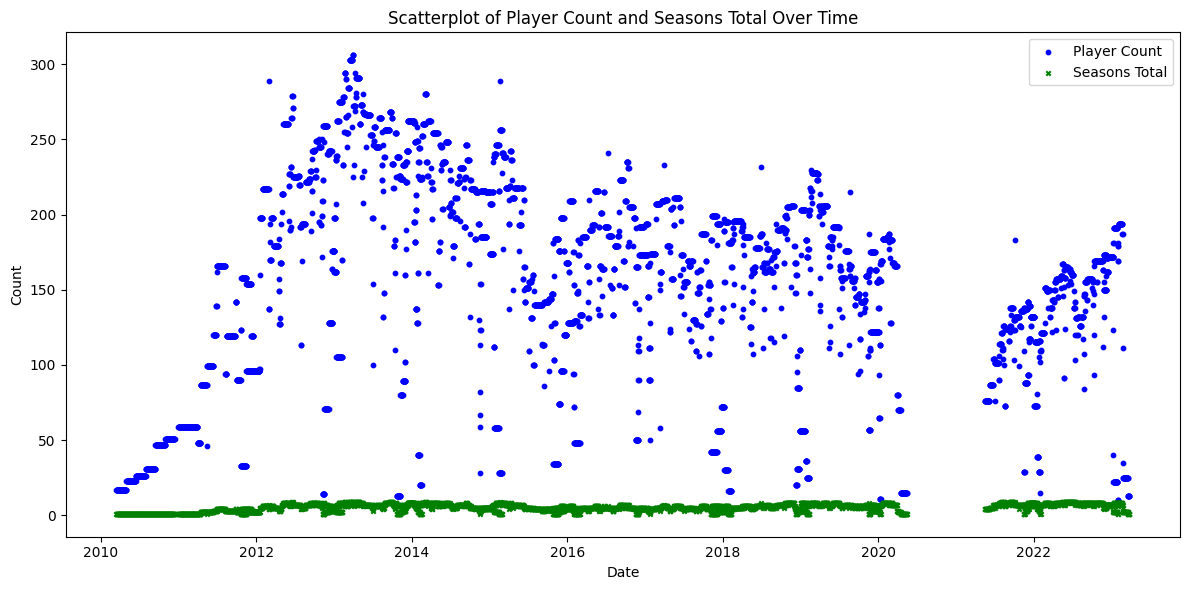

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [11]:
#Create graph of player_count, and seasons_total versus date
import matplotlib.pyplot as plt

# Using the 'live_seasons_df' DataFrame containing date, player_count, and seasons_total columns
# Convert the 'date' column to a datetime object if it's not already
live_seasons_df['date'] = pd.to_datetime(live_seasons_df['date'])
# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Create a scatter plot for 'player_count'
ax.scatter(live_seasons_df['date'], live_seasons_df['player_count'], label='Player Count', color='blue', marker='o', s=10)

# Create a scatter plot for 'seasons_total'
ax.scatter(live_seasons_df['date'], live_seasons_df['seasons_total'], label='Seasons Total', color='green', marker='x', s=10)

# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Count')
ax.set_title('Scatterplot of Player Count and Seasons Total Over Time')

# Add a legend
ax.legend()

#Order of process to export: Save, Show then download
#Save the plot as a JPEG file
plt.savefig('scatterplot_of_player_count_w_seasons.jpg', format='jpeg', dpi=300, bbox_inches='tight')  # Adjust filename and options as needed


# Show the plot
plt.tight_layout()
plt.show()  # Display the plot first


#Download jpeg (from virtual machine's file system)
from google.colab import files
files.download('scatterplot_of_player_count_w_seasons.jpg')



In [ ]:
#To upgrade matplotlib
pip install --upgrade matplotlib


In [11]:
#Investigate player_count and season_total over time
import pandas as pd
import numpy as np

# Export the DataFrame live_seasons_df to a CSV file (you can adjust the file path and format)
live_seasons_df.to_csv('live_seasons_data.csv', index=False)

# Investigate live_seasons_df
print("Investigating live_seasons_df:")

# Find the date(s) where player_count was max and min
max_player_count_row = live_seasons_df[live_seasons_df['player_count'] == live_seasons_df['player_count'].max()]
min_player_count_row = live_seasons_df[live_seasons_df['player_count'] == live_seasons_df['player_count'].min()]
max_player_count_date = max_player_count_row['date'].tolist()
min_player_count_date = min_player_count_row['date'].tolist()
max_player_count = live_seasons_df['player_count'].max()
min_player_count = live_seasons_df['player_count'].min()
print(f"Date(s) with Max Player Count: {max_player_count_date}, Max Player Count: {max_player_count}")
print(f"Date(s) with Min Player Count: {min_player_count_date}, Min Player Count: {min_player_count}")

# Calculate and print the mean average for player_count and seasons_total
mean_player_count = live_seasons_df['player_count'].mean()
mean_seasons_total = live_seasons_df['seasons_total'].mean()
print(f"Mean Player Count: {mean_player_count}")
print(f"Mean Seasons Total: {mean_seasons_total}")

# Find the date(s) where seasons_total was max and min
max_seasons_total_row = live_seasons_df[live_seasons_df['seasons_total'] == live_seasons_df['seasons_total'].max()]
min_seasons_total_row = live_seasons_df[live_seasons_df['seasons_total'] == live_seasons_df['seasons_total'].min()]
max_seasons_total_date = max_seasons_total_row['date'].tolist()
min_seasons_total_date = min_seasons_total_row['date'].tolist()
max_seasons_total = live_seasons_df['seasons_total'].max()
min_seasons_total = live_seasons_df['seasons_total'].min()
print(f"Date(s) with Max Seasons Total: {max_seasons_total_date}, Max Seasons Total: {max_seasons_total}")
print(f"Date(s) with Min Seasons Total: {min_seasons_total_date}, Min Seasons Total: {min_seasons_total}")



Investigating live_seasons_df:
Date(s) with Max Player Count: [Timestamp('2013-03-29 00:00:00'), Timestamp('2013-03-30 00:00:00'), Timestamp('2013-03-31 00:00:00')], Max Player Count: 306
Date(s) with Min Player Count: [Timestamp('2022-02-01 00:00:00'), Timestamp('2022-02-02 00:00:00')], Min Player Count: 6
Mean Player Count: 154.2042728635682
Mean Seasons Total: 5.073650674662669
Date(s) with Max Seasons Total: [Timestamp('2015-02-18 00:00:00'), Timestamp('2013-02-20 00:00:00'), Timestamp('2013-02-21 00:00:00'), Timestamp('2013-02-22 00:00:00'), Timestamp('2013-02-23 00:00:00'), Timestamp('2013-02-27 00:00:00'), Timestamp('2013-02-28 00:00:00'), Timestamp('2013-09-19 00:00:00'), Timestamp('2013-09-20 00:00:00'), Timestamp('2013-09-21 00:00:00'), Timestamp('2013-09-22 00:00:00'), Timestamp('2013-09-23 00:00:00'), Timestamp('2013-09-24 00:00:00'), Timestamp('2013-09-25 00:00:00'), Timestamp('2013-09-26 00:00:00'), Timestamp('2013-09-27 00:00:00'), Timestamp('2013-09-28 00:00:00'), Times

Interpretation: The player_count reached a peak in 2013, with a maximum of 306 on three days at the end of March (03-29, 03-30, 03-31). The minimum was in February 2022 with a player_count of 6 (two dates, 02-01 and 02-02). The mean average is 154.
The seasons_total varies between 1 and 9 (in 2013) with the mean average being just over 5. The covid gap 2020-2021 is clear to see. Since covid player_count has been increasing.

In [23]:
by_player_by_season_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15578 entries, 0 to 15577
Data columns (total 89 columns):
 #   Column                                                              Non-Null Count  Dtype         
---  ------                                                              --------------  -----         
 0   division_player_id                                                  15578 non-null  float64       
 1   division_id                                                         15578 non-null  float64       
 2   player_id                                                           15578 non-null  float64       
 3   List of seasons included in                                         15578 non-null  object        
 4   division_name                                                       15578 non-null  float64       
 5   season_id                                                           15578 non-null  float64       
 6   league_id                                             

In [24]:
#Create feature 41: Reduce down the by_player_by_season_df to just the columns for this league's ordinal

import pandas as pd
import ast

def reduce_to_single_ordinal_league_per_row(df):
    ordinal_features = [
        'seasons_within_', 'list_of_seasons_included_in_from_',
        'churned_seasons_from_', 'churn_count_from_',
        'churn_period_per_churned_season_for_',
        'days_since_joined_', 'churn_days_', 'ratio_churned_to_included_'
    ]

    non_ordinal_columns = [
        ordinal_features = [
        'seasons_within_', 'list_of_seasons_included_in_from_',
        'churned_seasons_from_', 'churn_count_from_',
        'churn_period_per_churned_season_for_',
        'days_since_joined_', 'churn_days_', 'ratio_churned_to_included_'
    ]

    non_ordinal_columns = [
        'division_player_id', 'division_id', 'player_id',
        'List of seasons included in', 'division_name', 'season_id',
        'league_id', 'List of all leagues played in',
        'season_start_date', 'season_end_date', 'Set of opponents',
        'seasons_churned', 'dictionary_of_seasons_churned_per_league',
        'number_of_sent_challenges_to_opponent', 'number_of_games_this_season',
        'number_of_sent_email_this_season_to_an_opponent',
        'number_emails_received_from_opponent',
        'number_received_challenges_from_opponent',
        'number_received_challenges_resulting_in_game',
        'number_received_emails_resulting_in_game',
        'received_no_opponent_email_or_challenge',
        'number_sent_challenges_or_comms_to_opponent',
        'number_sent_challenges_or_comms_that_resulted_in_game',
        'entered_game_result_that_season',
        'is_included_in_leagues_next_season', 'unplaying_appeal_to_remain',
        'number_of_seasons_player_has_been_in',
        'number_of_seasons_player_has_played_in_before_this',
        'payment_dictionary', 'number_of_payments',
        'fraction_games_w_max_closeness', 'dict_activities_this_season',
        'dict_activities_length', 'list_logins_this_season',
        'no_of_logins_this_season', 'number_of_seasons',
        'list_games_w_closeness', 'closeness_score_total_for_games_this_season',
        'this_season_leads_to_churn'
    ]
    ]

    reduced_df = pd.DataFrame()  # Create an empty DataFrame to store the reduced data

    for _, row in df.iterrows():
        reduced_row = {}  # Create a dictionary to store the reduced row data

        league_id = int(row['league_id'])
        season_id = int(row['season_id'])

        if league_id is None or season_id is None:
            continue  # Skip rows with invalid league_id or season_id

        ordinal_league = None

        if league_id == int(row['First_league_included_in']):
            ordinal_league = 'first'
        elif league_id == int(row['Second_league_included_in']):
            ordinal_league = 'second'
        elif league_id == int(row['Third_league_included_in']):
            ordinal_league = 'third'
        elif league_id == int(row['Fourth_league_included_in']):
            ordinal_league = 'fourth'

        if ordinal_league:
            for feature in ordinal_features:
                column_name = feature + ordinal_league + '_league'
                if column_name in df.columns:
                    reduced_row[feature + 'this_league'] = row[column_name]

            # Add non-ordinal columns to the reduced row
            for col in non_ordinal_columns:
                reduced_row[col] = row[col]

            # Append the reduced row to the reduced DataFrame
            reduced_df = reduced_df.append(reduced_row, ignore_index=True)

    return reduced_df

# Example usage:
reduced_df = reduce_to_single_ordinal_league_per_row(by_player_by_season_df)


# Example usage:
reduced_df = reduce_to_single_ordinal_league_per_row(by_player_by_season_df)

reduced_df

Streaming output truncated to the last 5000 lines.
<ipython-input-24-0cc0870c2c90>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  reduced_df = reduced_df.append(reduced_row, ignore_index=True)
<ipython-input-24-0cc0870c2c90>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  reduced_df = reduced_df.append(reduced_row, ignore_index=True)
<ipython-input-24-0cc0870c2c90>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  reduced_df = reduced_df.append(reduced_row, ignore_index=True)
<ipython-input-24-0cc0870c2c90>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  reduced_df = reduced_df.append(reduced_row, ignore_index=True)
<ipython-inpu

seasons_within_this_league  \
0      [1001, 1002, 1003, 1004, 1005, 1006, 2003, 201...   
1      [1, 2, 3, 6, 7, 8, 9, 11, 12, 15, 29, 30, 37, ...   
2      [1001, 1002, 1003, 1004, 1005, 1006, 2003, 201...   
3      [1001, 1002, 1003, 1004, 1005, 1006, 2003, 201...   
4      [1001, 1002, 1003, 1004, 1005, 1006, 2003, 201...   
...                                                  ...   
15573  [1, 2, 3, 6, 7, 8, 9, 11, 12, 15, 29, 30, 37, ...   
15574  [28, 32, 56, 74, 2098, 2106, 2113, 2116, 2120,...   
15575  [2337, 2344, 2353, 2362, 2369, 2375, 2383, 239...   
15576  [2337, 2344, 2353, 2362, 2369, 2375, 2383, 239...   
15577  [2195, 2200, 2208, 2213, 2220, 2224, 2232, 223...   

            list_of_seasons_included_in_from_this_league  \
0      [1001, 1002, 1003, 1004, 1005, 2003, 2014, 201...   
1                      [1, 2, 3, 6, 7, 8, 9, 11, 12, 29]   
2      [1001, 1002, 1003, 1004, 1005, 2003, 2014, 201...   
3      [1001, 1002, 1003, 1004, 1005, 2003, 2014, 201...   
4      [1001, 1002, 1003, 1004, 1005, 2003, 2014, 201...   
...                                                  ...   
15573                                             [2427]   
15574                                             [2424]   
15575                                             [2428]   
15576                                             [2428]   
15577                                             [2430]   

      churned_seasons_from_this_league  churn_count_from_this_league  \
0                         [1006, 2042]                           2.0   
1                             [15, 30]                           2.0   
2                         [1006, 2042]                           2.0   
3                         [1006, 2042]                           2.0   
4                         [1006, 2042]                           2.0   
...                                ...                           ...   
15573                               []                           0.0   
15574                               []                           0.0   
15575                               []                           0.0   
15576                               []                           0.0   
15577                               []                           0.0   

         churn_period_per_churned_season_for_this_league  \
0      {1006: [datetime.datetime(2013, 3, 15, 0, 0), ...   
1      {15: [datetime.datetime(2011, 5, 15, 0, 0), da...   
2      {1006: [datetime.datetime(2013, 3, 15, 0, 0), ...   
3      {1006: [datetime.datetime(2013, 3, 15, 0, 0), ...   
4      {1006: [datetime.datetime(2013, 3, 15, 0, 0), ...   
...                                                  ...   
15573                                                 {}   
15574                                                 {}   
15575                                                 {}   
15576                                                 {}   
15577                                                 {}   

       days_since_joined_this_league  churn_days_this_league  \
0                             2436.0                   164.0   
1                             3214.0                  2745.0   
2                             2436.0                   164.0   
3                             2436.0                   164.0   
4                             2436.0                   164.0   
...                              ...                     ...   
15573                         3214.0                     0.0   
15574                         2742.0                     0.0   
15575                         -935.0                     0.0   
15576                         -935.0                     0.0   
15577                          472.0                     0.0   

       ratio_churned_to_included_this_league  division_player_id  division_id  \
0                                   0.067323              7957.0       2566.0   
1                                   0.854076                73.0       

In [27]:
#Check it worked 41: Reduce down the by_player_by_season_df to just the columns for this league's ordinal
filtered_df = reduced_df[(reduced_df['player_id'] == 10998) & (reduced_df['league_id'] == 2041.0)]

filtered_df

#Export
reduced_df.to_csv('by_player_by_season_w_single_ordinal_df.csv', index=False)


In [31]:
filtered_df

seasons_within_this_league  \
12918  [2337, 2344, 2353, 2362, 2369, 2375, 2383, 239...   
12929  [2337, 2344, 2353, 2362, 2369, 2375, 2383, 239...   
12935  [2337, 2344, 2353, 2362, 2369, 2375, 2383, 239...   

      list_of_seasons_included_in_from_this_league  \
12918                           [2337, 2344, 2353]   
12929                           [2337, 2344, 2353]   
12935                           [2337, 2344, 2353]   

      churned_seasons_from_this_league  churn_count_from_this_league  \
12918                           [2362]                           1.0   
12929                           [2362]                           1.0   
12935                           [2362]                           1.0   

         churn_period_per_churned_season_for_this_league  \
12918  {2362: [datetime.datetime(2021, 12, 18, 0, 0),...   
12929  {2362: [datetime.datetime(2021, 12, 18, 0, 0),...   
12935  {2362: [datetime.datetime(2021, 12, 18, 0, 0),...   

       days_since_joined_this_league  churn_days_this_league  \
12918                         -935.0                     0.0   
12929                         -935.0                     0.0   
12935                         -935.0                     0.0   

       ratio_churned_to_included_this_league  division_player_id  division_id  \
12918                                    NaN             16004.0       3902.0   
12929                                    NaN             15866.0       3875.0   
12935                                    NaN             16176.0       3932.0   

       ...  number_of_payments fraction_games_w_max_closeness  \
12918  ...                31.0                            0.5   
12929  ...                31.0                            0.0   
12935  ...                31.0                            0.5   

                             dict_activities_this_season  \
12918  {458080: {'date': Timestamp('2021-09-09 00:00:...   
12929  {452927: {'date': Timestamp('2021-07-31 00:00:...   
12935  {465761: {'date': Timestamp('2021-10-31 00:00:...   

       dict_activities_length  \
12918                   140.0   
12929                    95.0   
12935                   114.0   

                                 list_logins_this_season  \
12918  [Timestamp('2021-09-09 00:00:00'), Timestamp('...   
12929  [Timestamp('2021-07-31 00:00:00'), Timestamp('...   
12935  [Timestamp('2021-10-31 00:00:00'), Timestamp('...   

      no_of_logins_this_season number_of_seasons list_games_w_closeness  \
12918                     75.0              31.0        [1, 1, 1, 1, 1]   
12929                     52.0              31.0                     []   
12935                     69.0              31.0              [1, 1, 1]   

      closeness_score_total_for_games_this_season this_season_leads_to_churn  
12918                                           5                        0.0  
12929                                           0                        0.0  
12935                                           3                        0.0  

[3 rows x 47 columns]

In [1]:
#Reimport 7/10 files from google drive
#Get latest by_player_by_season_df (by_player_by_season_w_single_ordinal_df.csv)
! gdown 1OPlZJu4BIkp_T0gBhaUm2Ll2NJ64FJWm
#Get latest apccg_df (apccg_w_have_ever_churned_df.csv).csv
! gdown 18fIm4coBPNuTE6-EtgzEj7uhKEuGrVMa
#Get dictionary player_first_included_dates_by_league_df.csv (previously called league_dates_df_transposed)
! gdown 1jKtICuX9x3ua_jSQr1K60nEbqRHX2nna

Downloading...
From: https://drive.google.com/uc?id=1OPlZJu4BIkp_T0gBhaUm2Ll2NJ64FJWm
To: /content/by_player_by_season_w_single_ordinal_df.csv
100% 62.6M/62.6M [00:00<00:00, 136MB/s]
Downloading...
From: https://drive.google.com/uc?id=18fIm4coBPNuTE6-EtgzEj7uhKEuGrVMa
To: /content/apccg_w_have_ever_churned_df.csv
100% 155M/155M [00:00<00:00, 238MB/s]
Downloading...
From: https://drive.google.com/uc?id=1jKtICuX9x3ua_jSQr1K60nEbqRHX2nna
To: /content/player_first_included_dates_by_league_df.csv
100% 98.8k/98.8k [00:00<00:00, 92.0MB/s]


In [18]:
#Reimport by_player_by_season_df (by_player_by_season_w_single_ordinal_df.csv)
#and apccg_df (apccg_w_have_ever_churned_df.csv)
#and player_first_included_df
#import some useful libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab as pl

# A custom function to convert a string of seasons to a list of integers
def str_to_int_list(s):
    if s.strip():
        return [int(x) for x in s.split(',')]
    else:
        return []

#import by_player_by_season_df
by_player_by_season_df = pd.read_csv("/content/by_player_by_season_w_single_ordinal_df.csv")

#Reset date columns as datetime datatypes in by_player_by_season_df
by_player_by_season_df['season_start_date'] = pd.to_datetime(by_player_by_season_df['season_start_date'])
by_player_by_season_df['season_end_date'] = pd.to_datetime(by_player_by_season_df['season_end_date'])


by_player_by_season_df = by_player_by_season_df.rename(columns={
    'days_since_joined_second': 'days_since_joined_second_league',
    'days_since_joined_third': 'days_since_joined_third_league',
    'days_since_joined_fourth': 'days_since_joined_fourth_league'
})

by_player_by_season_df.info()



#Reimport
apccg_df = pd.read_csv("/content/apccg_w_have_ever_churned_df.csv")

#Reset date columns as datetime datatypes in apccg_df
apccg_df['date'] = pd.to_datetime(apccg_df['date'])

apccg_df.info()


#import dictionary player_first_included_dates_by_league_df.csv (previously called league_dates_df_transposed)
player_first_included_df = pd.read_csv(
    "player_first_included_dates_by_league_df.csv")

player_first_included_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15578 entries, 0 to 15577
Data columns (total 47 columns):
 #   Column                                                 Non-Null Count  Dtype         
---  ------                                                 --------------  -----         
 0   seasons_within_this_league                             15578 non-null  object        
 1   list_of_seasons_included_in_from_this_league           15578 non-null  object        
 2   churned_seasons_from_this_league                       15578 non-null  object        
 3   churn_count_from_this_league                           15578 non-null  float64       
 4   churn_period_per_churned_season_for_this_league        15578 non-null  object        
 5   days_since_joined_this_league                          15578 non-null  float64       
 6   churn_days_this_league                                 15578 non-null  float64       
 7   ratio_churned_to_included_this_league                  15448 non-nu

<ipython-input-18-30d8b6b01757>:36: DtypeWarning: Columns (4,17,25,28,30) have mixed types. Specify dtype option on import or set low_memory=False.
  apccg_df = pd.read_csv("/content/apccg_w_have_ever_churned_df.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1021603 entries, 0 to 1021602
Data columns (total 33 columns):
 #   Column                                      Non-Null Count    Dtype         
---  ------                                      --------------    -----         
 0   game_id                                     1021603 non-null  float64       
 1   season_id                                   385386 non-null   float64       
 2   division_id                                 385386 non-null   float64       
 3   winner_id                                   33574 non-null    float64       
 4   score                                       32940 non-null    object        
 5   Played_a_game                               33574 non-null    float64       
 6   Received_inputted_game                      16787 non-null    float64       
 7   Inputted_game_result                        16787 non-null    float64       
 8   game_player_id                              1021603 non-null  

player_id         first_league               second third fourth
0           1.0  2010-03-15 00:00:00  2012-05-01 00:00:00   NaN    NaN
1           2.0  2010-03-15 00:00:00  2013-04-15 00:00:00   NaN    NaN
2           3.0  2010-03-15 00:00:00                  NaN   NaN    NaN
3           4.0  2010-03-15 00:00:00  2013-04-15 00:00:00   NaN    NaN
4           5.0  2010-03-15 00:00:00                  NaN   NaN    NaN
...         ...                  ...                  ...   ...    ...
3110    16043.0  2010-03-15 00:00:00                  NaN   NaN    NaN
3111    16044.0  2011-06-30 00:00:00                  NaN   NaN    NaN
3112    16047.0  2021-07-24 00:00:00                  NaN   NaN    NaN
3113    16051.0  2021-07-24 00:00:00                  NaN   NaN    NaN
3114    16083.0  2017-09-16 00:00:00                  NaN   NaN    NaN

[3115 rows x 5 columns]

In [19]:
print(by_player_by_season_df['churn_period_per_churned_season_for_this_league'])

import pandas as pd

# Assuming 'by_player_by_season_df' is your DataFrame
empty_dicts = by_player_by_season_df['churn_period_per_churned_season_for_this_league'].apply(lambda x: len(x) == 0)

# Check if all dictionaries are empty
all_empty = empty_dicts.all()

# Print the result
print(f"All dictionaries in 'churn_period_per_churned_season_for_this_league' are empty: {all_empty}")


0        {1006: [datetime.datetime(2013, 3, 15, 0, 0), ...
1        {15: [datetime.datetime(2011, 5, 15, 0, 0), da...
2        {1006: [datetime.datetime(2013, 3, 15, 0, 0), ...
3        {1006: [datetime.datetime(2013, 3, 15, 0, 0), ...
4        {1006: [datetime.datetime(2013, 3, 15, 0, 0), ...
                               ...                        
15573                                                   {}
15574                                                   {}
15575                                                   {}
15576                                                   {}
15577                                                   {}
Name: churn_period_per_churned_season_for_this_league, Length: 15578, dtype: object
All dictionaries in 'churn_period_per_churned_season_for_this_league' are empty: False


In [23]:
#Investigate datatype of by_player_by_season_df['churn_period_per_churned_season_for_this_league']
# Get the datatype of the entire column
column_datatype = by_player_by_season_df['churn_period_per_churned_season_for_this_league'].dtype

# Get the datatype of the first row's value for this column
first_row_value = by_player_by_season_df['churn_period_per_churned_season_for_this_league'].iloc[0]
first_row_datatype = type(first_row_value)

print(f"Datatype of the column: {column_datatype}")
print(f"Datatype of the first row's value: {first_row_datatype}")





# Get the datatype of the entire column
column_datatype = by_player_by_season_df['churned_seasons_from_this_league'].dtype

# Get the datatype of the first row's value for this column
first_row_value = by_player_by_season_df['churned_seasons_from_this_league'].iloc[0]
first_row_datatype = type(first_row_value)

print(f"Datatype of the column: {column_datatype}")
print(f"Datatype of the first row's value: {first_row_datatype}")

Datatype of the column: object
Datatype of the first row's value: <class 'str'>
Datatype of the column: object
Datatype of the first row's value: <class 'str'>


In [24]:
#Create features 42: Calculate days from and to churn
import pandas as pd
import ast

def calculate_days_to_churn(df):
    def find_end_season(by_player_by_season_df, season_id):
        # Helper function to find the end date of a season by season_id
        matching_rows = by_player_by_season_df[by_player_by_season_df['season_id'] == season_id]

        if not matching_rows.empty:
            season_end_date = matching_rows['season_end_date'].values[0]
            return season_end_date
        else:
            return None

    def find_start_season(by_player_by_season_df, season_id):
        # Helper function to find the start date of a season by season_id
        matching_rows = by_player_by_season_df[by_player_by_season_df['season_id'] == season_id]

        if not matching_rows.empty:
            season_start_date = matching_rows['season_start_date'].values[0]
            return season_start_date
        else:
            return None

    def process_churned_seasons(row):
        churned_seasons = ast.literal_eval(row['churned_seasons_from_this_league'])

        if not churned_seasons:
            return 0, 0  # Return 0 for both days_to_future_churn and days_since_last_churn

        days_since_last_churn = []
        days_to_future_churn = []

        for season_id in churned_seasons:
            start_date = find_start_season(df, season_id)
            end_date = find_end_season(df, season_id)

            if start_date and end_date:
                if end_date < row['season_end_date']:
                    days_since_last_churn.append((row['season_end_date'] - end_date).days)
                else:
                    days_to_future_churn.append((end_date - row['season_end_date']).days)

        if days_since_last_churn:
            min_days_since_last_churn = min(days_since_last_churn)
        else:
            min_days_since_last_churn = 0

        if days_to_future_churn:
            min_days_to_future_churn = min(days_to_future_churn)
        else:
            min_days_to_future_churn = 0

        return min_days_since_last_churn, min_days_to_future_churn

    df['number_of_days_since_last_churn'], df['number_of_days_to_churn'] = zip(*df.apply(process_churned_seasons, axis=1))

    return df

# Run the function
by_player_by_season_w_days_to_churn_df = calculate_days_to_churn(by_player_by_season_df)
by_player_by_season_w_days_to_churn_df

seasons_within_this_league  \
0      [1001, 1002, 1003, 1004, 1005, 1006, 2003, 201...   
1      [1, 2, 3, 6, 7, 8, 9, 11, 12, 15, 29, 30, 37, ...   
2      [1001, 1002, 1003, 1004, 1005, 1006, 2003, 201...   
3      [1001, 1002, 1003, 1004, 1005, 1006, 2003, 201...   
4      [1001, 1002, 1003, 1004, 1005, 1006, 2003, 201...   
...                                                  ...   
15573  [1, 2, 3, 6, 7, 8, 9, 11, 12, 15, 29, 30, 37, ...   
15574  [28, 32, 56, 74, 2098, 2106, 2113, 2116, 2120,...   
15575  [2337, 2344, 2353, 2362, 2369, 2375, 2383, 239...   
15576  [2337, 2344, 2353, 2362, 2369, 2375, 2383, 239...   
15577  [2195, 2200, 2208, 2213, 2220, 2224, 2232, 223...   

            list_of_seasons_included_in_from_this_league  \
0      [1001, 1002, 1003, 1004, 1005, 2003, 2014, 201...   
1                      [1, 2, 3, 6, 7, 8, 9, 11, 12, 29]   
2      [1001, 1002, 1003, 1004, 1005, 2003, 2014, 201...   
3      [1001, 1002, 1003, 1004, 1005, 2003, 2014, 201...   
4      [1001, 1002, 1003, 1004, 1005, 2003, 2014, 201...   
...                                                  ...   
15573                                             [2427]   
15574                                             [2424]   
15575                                             [2428]   
15576                                             [2428]   
15577                                             [2430]   

      churned_seasons_from_this_league  churn_count_from_this_league  \
0                         [1006, 2042]                           2.0   
1                             [15, 30]                           2.0   
2                         [1006, 2042]                           2.0   
3                         [1006, 2042]                           2.0   
4                         [1006, 2042]                           2.0   
...                                ...                           ...   
15573                               []                           0.0   
15574                               []                           0.0   
15575                               []                           0.0   
15576                               []                           0.0   
15577                               []                           0.0   

         churn_period_per_churned_season_for_this_league  \
0      {1006: [datetime.datetime(2013, 3, 15, 0, 0), ...   
1      {15: [datetime.datetime(2011, 5, 15, 0, 0), da...   
2      {1006: [datetime.datetime(2013, 3, 15, 0, 0), ...   
3      {1006: [datetime.datetime(2013, 3, 15, 0, 0), ...   
4      {1006: [datetime.datetime(2013, 3, 15, 0, 0), ...   
...                                                  ...   
15573                                                 {}   
15574                                                 {}   
15575                                                 {}   
15576                                                 {}   
15577                                                 {}   

       days_since_joined_this_league  churn_days_this_league  \
0                             2436.0                   164.0   
1                             3214.0                  2745.0   
2                             2436.0                   164.0   
3                             2436.0                   164.0   
4                             2436.0                   164.0   
...                              ...                     ...   
15573                         3214.0                     0.0   
15574                         2742.0                     0.0   
15575                         -935.0                     0.0   
15576                         -935.0                     0.0   
15577                          472.0                     0.0   

       ratio_churned_to_included_this_league  division_player_id  division_id  \
0                                   0.067323              7957.0       2566.0   
1                                   0.854076                73.0       

In [29]:
#Investigate number_of_days_to_churn and number_of_days_since_last_churn
# Find max and min values along with player_id and season_id
max_days_to_churn = by_player_by_season_w_days_to_churn_df['number_of_days_to_churn'].max()
min_days_to_churn = by_player_by_season_w_days_to_churn_df['number_of_days_to_churn'].min()
max_days_since_last_churn = by_player_by_season_w_days_to_churn_df['number_of_days_since_last_churn'].max()
min_days_since_last_churn = by_player_by_season_w_days_to_churn_df['number_of_days_since_last_churn'].min()

# Find corresponding player_id and season_id for max and min values
max_days_to_churn_row = by_player_by_season_w_days_to_churn_df[by_player_by_season_w_days_to_churn_df['number_of_days_to_churn'] == max_days_to_churn]
min_days_to_churn_row = by_player_by_season_w_days_to_churn_df[by_player_by_season_w_days_to_churn_df['number_of_days_to_churn'] == min_days_to_churn]
max_days_since_last_churn_row = by_player_by_season_w_days_to_churn_df[by_player_by_season_w_days_to_churn_df['number_of_days_since_last_churn'] == max_days_since_last_churn]
min_days_since_last_churn_row = by_player_by_season_w_days_to_churn_df[by_player_by_season_w_days_to_churn_df['number_of_days_since_last_churn'] == min_days_since_last_churn]

# Print results
print(f"Max number_of_days_to_churn: {max_days_to_churn} (Player ID: {max_days_to_churn_row['player_id'].values[0]}, Season ID: {max_days_to_churn_row['season_id'].values[0]})")
print(f"Min number_of_days_to_churn: {min_days_to_churn} (Player ID: {min_days_to_churn_row['player_id'].values[0]}, Season ID: {min_days_to_churn_row['season_id'].values[0]})")
print(f"Max number_of_days_since_last_churn: {max_days_since_last_churn} (Player ID: {max_days_since_last_churn_row['player_id'].values[0]}, Season ID: {max_days_since_last_churn_row['season_id'].values[0]})")
print(f"Min number_of_days_since_last_churn: {min_days_since_last_churn} (Player ID: {min_days_since_last_churn_row['player_id'].values[0]}, Season ID: {min_days_since_last_churn_row['season_id'].values[0]})")


import pandas as pd

# Number of rows with 0 in either column
num_rows_with_zero = len(by_player_by_season_w_days_to_churn_df[(by_player_by_season_w_days_to_churn_df['number_of_days_since_last_churn'] == 0) | (by_player_by_season_df['number_of_days_to_churn'] == 0)])

# Mean and median averages for both columns
mean_days_since_last_churn = by_player_by_season_w_days_to_churn_df['number_of_days_since_last_churn'].mean()
median_days_since_last_churn = by_player_by_season_w_days_to_churn_df['number_of_days_since_last_churn'].median()

mean_days_to_churn = by_player_by_season_w_days_to_churn_df['number_of_days_to_churn'].mean()
median_days_to_churn = by_player_by_season_w_days_to_churn_df['number_of_days_to_churn'].median()

# Print results
print(f"Number of rows with 0 in either column: {num_rows_with_zero}")
print(f"Mean number_of_days_since_last_churn: {mean_days_since_last_churn}")
print(f"Median number_of_days_since_last_churn: {median_days_since_last_churn}")
print(f"Mean number_of_days_to_churn: {mean_days_to_churn}")
print(f"Median number_of_days_to_churn: {median_days_to_churn}")

#Export by_player_by_season_w_days_to_churn_df
by_player_by_season_w_days_to_churn_df.to_csv("by_player_by_season_w_days_to_churn_df_w_days_to_churn_df.csv", index=False)
# Replace the dataframe
by_player_by_season_df = by_player_by_season_w_days_to_churn_df

Max number_of_days_to_churn: 3106 (Player ID: 302.0, Season ID: 15.0)
Min number_of_days_to_churn: 0 (Player ID: 1.0, Season ID: 2092.0)
Max number_of_days_since_last_churn: 2595 (Player ID: 8237.0, Season ID: 2394.0)
Min number_of_days_since_last_churn: 0 (Player ID: 1.0, Season ID: 6.0)
Number of rows with 0 in either column: 12801
Mean number_of_days_since_last_churn: 90.65258698164078
Median number_of_days_since_last_churn: 0.0
Mean number_of_days_to_churn: 309.09603286686354
Median number_of_days_to_churn: 154.0


Interpretation: The maximum number of days between a player being incldued in a season and them churning is 3106 days (about 8 and a half years). The maximum number of days since last churn (which could be seen as the biggest win of regaining a churner) is 2595 days (just over 7 years). The mean average since last churn is 90 days, meaning if someone returns to being included after churn, they last just over two seasons (2 x 6 weeks = 84 days). The mean average days to churn is 309 days and the median is 154. This means on average a player could last (154/42 = 3.66r) over three and a half seasons (assuming seasons were consecutive).

In [31]:
#Create feature 43: Add simple churn to by_player_by_season
import pandas as pd

def create_binary_churn(df):
    # Create a new column 'churn' initialized to 0
    df['churn'] = 0

    # Set 'churn' to 1 where churn_count_from_this_league is not 0
    df.loc[df['churn_count_from_this_league'] != 0, 'churn'] = 1

    return df

# Example usage:
# Assuming you have a DataFrame named by_player_by_season_df
by_player_by_season_w_binary_churn_df = create_binary_churn(by_player_by_season_df)
by_player_by_season_w_binary_churn_df

seasons_within_this_league  \
0      [1001, 1002, 1003, 1004, 1005, 1006, 2003, 201...   
1      [1, 2, 3, 6, 7, 8, 9, 11, 12, 15, 29, 30, 37, ...   
2      [1001, 1002, 1003, 1004, 1005, 1006, 2003, 201...   
3      [1001, 1002, 1003, 1004, 1005, 1006, 2003, 201...   
4      [1001, 1002, 1003, 1004, 1005, 1006, 2003, 201...   
...                                                  ...   
15573  [1, 2, 3, 6, 7, 8, 9, 11, 12, 15, 29, 30, 37, ...   
15574  [28, 32, 56, 74, 2098, 2106, 2113, 2116, 2120,...   
15575  [2337, 2344, 2353, 2362, 2369, 2375, 2383, 239...   
15576  [2337, 2344, 2353, 2362, 2369, 2375, 2383, 239...   
15577  [2195, 2200, 2208, 2213, 2220, 2224, 2232, 223...   

            list_of_seasons_included_in_from_this_league  \
0      [1001, 1002, 1003, 1004, 1005, 2003, 2014, 201...   
1                      [1, 2, 3, 6, 7, 8, 9, 11, 12, 29]   
2      [1001, 1002, 1003, 1004, 1005, 2003, 2014, 201...   
3      [1001, 1002, 1003, 1004, 1005, 2003, 2014, 201...   
4      [1001, 1002, 1003, 1004, 1005, 2003, 2014, 201...   
...                                                  ...   
15573                                             [2427]   
15574                                             [2424]   
15575                                             [2428]   
15576                                             [2428]   
15577                                             [2430]   

      churned_seasons_from_this_league  churn_count_from_this_league  \
0                         [1006, 2042]                           2.0   
1                             [15, 30]                           2.0   
2                         [1006, 2042]                           2.0   
3                         [1006, 2042]                           2.0   
4                         [1006, 2042]                           2.0   
...                                ...                           ...   
15573                               []                           0.0   
15574                               []                           0.0   
15575                               []                           0.0   
15576                               []                           0.0   
15577                               []                           0.0   

         churn_period_per_churned_season_for_this_league  \
0      {1006: [datetime.datetime(2013, 3, 15, 0, 0), ...   
1      {15: [datetime.datetime(2011, 5, 15, 0, 0), da...   
2      {1006: [datetime.datetime(2013, 3, 15, 0, 0), ...   
3      {1006: [datetime.datetime(2013, 3, 15, 0, 0), ...   
4      {1006: [datetime.datetime(2013, 3, 15, 0, 0), ...   
...                                                  ...   
15573                                                 {}   
15574                                                 {}   
15575                                                 {}   
15576                                                 {}   
15577                                                 {}   

       days_since_joined_this_league  churn_days_this_league  \
0                             2436.0                   164.0   
1                             3214.0                  2745.0   
2                             2436.0                   164.0   
3                             2436.0                   164.0   
4                             2436.0                   164.0   
...                              ...                     ...   
15573                         3214.0                     0.0   
15574                         2742.0                     0.0   
15575                         -935.0                     0.0   
15576                         -935.0                     0.0   
15577                          472.0                     0.0   

       ratio_churned_to_included_this_league  division_player_id  division_id  \
0                                   0.067323              7957.0       2566.0   
1                                   0.854076                73.0       

In [35]:
#Investigate churn in by_player_by_season_df
# Count the number of 0s and 1s in the 'churn' column
churn_counts = by_player_by_season_w_binary_churn_df['churn'].value_counts()

# Calculate the percentage of 0s and 1s
total_count = churn_counts.sum()
percentage_0 = (churn_counts[0] / total_count) * 100
percentage_1 = (churn_counts[1] / total_count) * 100

# Print the results
print("Number of 0s:", churn_counts[0])
print("Number of 1s:", churn_counts[1])
print("% of 0s:", percentage_0)
print("% of 1s:", percentage_1)


#Export
by_player_by_season_w_binary_churn_df.to_csv("by_player_by_season_w_binary_churn_df.csv", index=False)

#Replace DataFrame
by_player_by_season_df = by_player_by_season_w_binary_churn_df

Number of 0s: 1099
Number of 1s: 14479
% of 0s: 7.0548209012710235
% of 1s: 92.94517909872899


Interpretation: Measuring churn in just the included dataset (by_player_by_season_df), 7% did not churn and approximately 93% did churn. This is very unbalanced.

In [46]:
# Create features 44: calculate_days_to_churn_apccg
import pandas as pd

# Helper function to find the end date of a season by season_id
def find_end_season(by_player_by_season_df, season_id):
    matching_rows = by_player_by_season_df[by_player_by_season_df['season_id'] == season_id]

    if not matching_rows.empty:
        season_end_date = matching_rows['season_end_date'].values[0]
        return season_end_date
    else:
        return None

# Helper function to calculate days to and from churn for apccg_df
def calculate_days_to_churn_apccg(by_player_by_season_df, apccg_df):
    for player_id in by_player_by_season_df['player_id'].unique():
        player_row = by_player_by_season_df[by_player_by_season_df['player_id'] == player_id].iloc[0]
        seasons_churned_str = player_row['seasons_churned']

        if not seasons_churned_str:
            apccg_df.loc[apccg_df['player_id'] == player_id, ['number_of_days_since_last_churn', 'number_of_days_to_churn']] = 0
        else:
            churned_seasons_str = seasons_churned_str.replace('[', '').replace(']', '').split(',')
            churned_seasons = [int(season_id) for season_id in churned_seasons_str if season_id.strip()]  # Skip empty strings
            churned_seasons.sort()
            player_actions_df = apccg_df[apccg_df['player_id'] == player_id]
            list_end_dates_churn = [find_end_season(by_player_by_season_df, season_id) for season_id in churned_seasons]
            set_of_players_action_dates = set(player_actions_df['date'])
            ordered_list_players_action_dates = sorted(list(set_of_players_action_dates))

            for action_date in ordered_list_players_action_dates:
                if list_end_dates_churn:
                    list_of_end_dates_plus_this_date = list_end_dates_churn + [action_date]
                    list_of_end_dates_plus_this_date.sort()
                    index_action_date = list_of_end_dates_plus_this_date.index(action_date)

                    if index_action_date > 0:
                        days_since_last_churn = (action_date - list_of_end_dates_plus_this_date[index_action_date - 1]).days
                    else:
                        days_since_last_churn = 0

                    if index_action_date < len(list_of_end_dates_plus_this_date) - 1:
                        days_to_future_churn = (list_of_end_dates_plus_this_date[index_action_date + 1] - action_date).days
                    else:
                        days_to_future_churn = -1  # Set to a meaningful value

                    apccg_df.loc[(apccg_df['player_id'] == player_id) & (apccg_df['date'] == action_date), 'number_of_days_since_last_churn'] = days_since_last_churn
                    apccg_df.loc[(apccg_df['player_id'] == player_id) & (apccg_df['date'] == action_date), 'number_of_days_to_churn'] = days_to_future_churn

    return apccg_df



# Function call using by_player_by_season_df and apccg_df DataFrames
apccg_w_days_to_churn_df = calculate_days_to_churn_apccg(by_player_by_season_df, apccg_df)

apccg_w_days_to_churn_df

game_id  season_id  division_id  winner_id  \
0            0.0        NaN          NaN        NaN   
1            0.0        NaN          NaN        NaN   
2            0.0        NaN          NaN        NaN   
3            0.0        NaN          NaN        NaN   
4            0.0        NaN          NaN        NaN   
...          ...        ...          ...        ...   
1021598  17275.0     2424.0       4182.0      673.0   
1021599  17276.0     2425.0       4188.0    15345.0   
1021600  17276.0     2425.0       4188.0    15345.0   
1021601  17277.0     2426.0       4195.0    15895.0   
1021602  17277.0     2426.0       4195.0    15895.0   

                               score  Played_a_game  Received_inputted_game  \
0                                NaN            NaN                     NaN   
1                                NaN            NaN                     NaN   
2                                NaN            NaN                     NaN   
3                                NaN            NaN                     NaN   
4                                NaN            NaN                     NaN   
...                              ...            ...                     ...   
1021598            15-13,16-14,15-10            1.0                     1.0   
1021599         9-15,15-9,15-9,15-12            1.0                     NaN   
1021600         9-15,15-9,15-9,15-12            1.0                     1.0   
1021601  14-16,15-7,15-7,14-16,15-11            1.0                     NaN   
1021602  14-16,15-7,15-7,14-16,15-11            1.0                     1.0   

         Inputted_game_result  game_player_id  challenge_id  ...  \
0                         NaN             0.0           0.0  ...   
1                         NaN             0.0           0.0  ...   
2                         NaN             0.0           0.0  ...   
3                         NaN             0.0           0.0  ...   
4                         NaN             0.0           0.0  ...   
...                       ...             ...           ...  ...   
1021598                   NaN         15734.0           0.0  ...   
1021599                   1.0         15345.0           0.0  ...   
1021600                   NaN         15947.0           0.0  ...   
1021601                   1.0         15877.0           0.0  ...   
1021602                   NaN         15895.0           0.0  ...   

         activity_log_log_msg  payments_log_negativespace_payment_id  \
0                         NaN                                  176.0   
1                         NaN                                  173.0   
2                         NaN                                  171.0   
3                         NaN                                  172.0   
4                         NaN                                  174.0   
...                       ...                                    ...   
1021598                   NaN                                    0.0   
1021599                   NaN                                    0.0   
1021600                   NaN                                    0.0   
1021601                   NaN                                    0.0   
1021602                   NaN                                    0.0   

         payments_log_negativespace_payment_seasons             datetime  \
0                                              10.0  2010-07-13 14:57:00   
1                                               3.0  2010-08-02 13:57:00   
2                                               3.0  2010-08-02 23:38:00   
3                                               3.0  2010-08-02 14:09:00   
4                                               3.0  2010-08-02 11:35:00   
...                                             ...                  ...   
1021598                                         NaN                  NaN   
1021599                                         NaN                  NaN   
1021600                          

In [47]:
apccg_w_days_to_churn_df

game_id  season_id  division_id  winner_id  \
0            0.0        NaN          NaN        NaN   
1            0.0        NaN          NaN        NaN   
2            0.0        NaN          NaN        NaN   
3            0.0        NaN          NaN        NaN   
4            0.0        NaN          NaN        NaN   
...          ...        ...          ...        ...   
1021598  17275.0     2424.0       4182.0      673.0   
1021599  17276.0     2425.0       4188.0    15345.0   
1021600  17276.0     2425.0       4188.0    15345.0   
1021601  17277.0     2426.0       4195.0    15895.0   
1021602  17277.0     2426.0       4195.0    15895.0   

                               score  Played_a_game  Received_inputted_game  \
0                                NaN            NaN                     NaN   
1                                NaN            NaN                     NaN   
2                                NaN            NaN                     NaN   
3                                NaN            NaN                     NaN   
4                                NaN            NaN                     NaN   
...                              ...            ...                     ...   
1021598            15-13,16-14,15-10            1.0                     1.0   
1021599         9-15,15-9,15-9,15-12            1.0                     NaN   
1021600         9-15,15-9,15-9,15-12            1.0                     1.0   
1021601  14-16,15-7,15-7,14-16,15-11            1.0                     NaN   
1021602  14-16,15-7,15-7,14-16,15-11            1.0                     1.0   

         Inputted_game_result  game_player_id  challenge_id  ...  \
0                         NaN             0.0           0.0  ...   
1                         NaN             0.0           0.0  ...   
2                         NaN             0.0           0.0  ...   
3                         NaN             0.0           0.0  ...   
4                         NaN             0.0           0.0  ...   
...                       ...             ...           ...  ...   
1021598                   NaN         15734.0           0.0  ...   
1021599                   1.0         15345.0           0.0  ...   
1021600                   NaN         15947.0           0.0  ...   
1021601                   1.0         15877.0           0.0  ...   
1021602                   NaN         15895.0           0.0  ...   

         activity_log_log_msg  payments_log_negativespace_payment_id  \
0                         NaN                                  176.0   
1                         NaN                                  173.0   
2                         NaN                                  171.0   
3                         NaN                                  172.0   
4                         NaN                                  174.0   
...                       ...                                    ...   
1021598                   NaN                                    0.0   
1021599                   NaN                                    0.0   
1021600                   NaN                                    0.0   
1021601                   NaN                                    0.0   
1021602                   NaN                                    0.0   

         payments_log_negativespace_payment_seasons             datetime  \
0                                              10.0  2010-07-13 14:57:00   
1                                               3.0  2010-08-02 13:57:00   
2                                               3.0  2010-08-02 23:38:00   
3                                               3.0  2010-08-02 14:09:00   
4                                               3.0  2010-08-02 11:35:00   
...                                             ...                  ...   
1021598                                         NaN                  NaN   
1021599                                         NaN                  NaN   
1021600                          

In [49]:
#Investigate number_of_days_since_last_churn and number_of_days_to_churn in apccg_df
# Print maximum and minimum values and corresponding player_ids
max_days_since_last_churn = apccg_w_days_to_churn_df['number_of_days_since_last_churn'].max()
min_days_since_last_churn = apccg_w_days_to_churn_df['number_of_days_since_last_churn'].min()
max_days_to_churn = apccg_w_days_to_churn_df['number_of_days_to_churn'].max()
min_days_to_churn = apccg_w_days_to_churn_df['number_of_days_to_churn'].min()

player_id_max_days_since_last_churn = apccg_w_days_to_churn_df.loc[apccg_w_days_to_churn_df['number_of_days_since_last_churn'] == max_days_since_last_churn, 'player_id'].values[0]
player_id_min_days_since_last_churn = apccg_w_days_to_churn_df.loc[apccg_w_days_to_churn_df['number_of_days_since_last_churn'] == min_days_since_last_churn, 'player_id'].values[0]
player_id_max_days_to_churn = apccg_w_days_to_churn_df.loc[apccg_w_days_to_churn_df['number_of_days_to_churn'] == max_days_to_churn, 'player_id'].values[0]
player_id_min_days_to_churn = apccg_w_days_to_churn_df.loc[apccg_w_days_to_churn_df['number_of_days_to_churn'] == min_days_to_churn, 'player_id'].values[0]

print(f"Maximum number_of_days_since_last_churn: {max_days_since_last_churn} (Player ID: {player_id_max_days_since_last_churn})")
print(f"Minimum number_of_days_since_last_churn: {min_days_since_last_churn} (Player ID: {player_id_min_days_since_last_churn})")
print(f"Maximum number_of_days_to_churn: {max_days_to_churn} (Player ID: {player_id_max_days_to_churn})")
print(f"Minimum number_of_days_to_churn: {min_days_to_churn} (Player ID: {player_id_min_days_to_churn})")

# Print the number of unique players with the minimum value
num_players_with_min_days_to_churn = apccg_w_days_to_churn_df[apccg_w_days_to_churn_df['number_of_days_to_churn'] == min_days_to_churn]['player_id'].nunique()
print(f"Number of unique players with the minimum number_of_days_to_churn: {num_players_with_min_days_to_churn}")

# Print mean and median averages for both columns
mean_days_since_last_churn = apccg_w_days_to_churn_df['number_of_days_since_last_churn'].mean()
median_days_since_last_churn = apccg_w_days_to_churn_df['number_of_days_since_last_churn'].median()
mean_days_to_churn = apccg_w_days_to_churn_df['number_of_days_to_churn'].mean()
median_days_to_churn = apccg_w_days_to_churn_df['number_of_days_to_churn'].median()

print(f"Mean number_of_days_since_last_churn: {mean_days_since_last_churn}")
print(f"Median number_of_days_since_last_churn: {median_days_since_last_churn}")
print(f"Mean number_of_days_to_churn: {mean_days_to_churn}")
print(f"Median number_of_days_to_churn: {median_days_to_churn}")


# Export the DataFrame to a CSV file
apccg_w_days_to_churn_df.to_csv('apccg_w_days_to_churn_df.csv', index=False)


Maximum number_of_days_since_last_churn: 3959 (Player ID: 355.0)
Minimum number_of_days_since_last_churn: 0 (Player ID: 2.0)
Maximum number_of_days_to_churn: 3085 (Player ID: 23.0)
Minimum number_of_days_to_churn: -1 (Player ID: 16.0)
Number of unique players with the minimum number_of_days_to_churn: 1432
Mean number_of_days_since_last_churn: 157.4064132544638
Median number_of_days_since_last_churn: 0.0
Mean number_of_days_to_churn: 343.01337212204743
Median number_of_days_to_churn: 202.0


Interpretation: The maximum number of days since churn was for player_id=355, who went 3959 days (over 10 and a half years). Around half the players (1432 of the 3115) have no churn, which is good. The mean number of days since churn is around half that of the mean number of days to a future churn, meaning on average players are closer to the last churn than their next, which is also good.  

In [1]:
#Reimport 8/10 files from google drive
#Get latest by_player_by_season_df (by_player_by_season_w_binary_churn_df.csv)
! gdown 1D8faBSjuyXdOs-my9gU4XNucHuNMnD2f
#Get latest apccg_df (apccg_w_days_to_churn.csv).csv
! gdown 1BvjW856LvstTexYi9bg-iSpB_SECYEr1
#Get dictionary player_first_included_dates_by_league_df.csv (previously called league_dates_df_transposed)
! gdown 1jKtICuX9x3ua_jSQr1K60nEbqRHX2nna

Downloading...
From: https://drive.google.com/uc?id=1D8faBSjuyXdOs-my9gU4XNucHuNMnD2f
To: /content/by_player_by_season_w_binary_churn_df.csv
100% 62.8M/62.8M [00:01<00:00, 57.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1BvjW856LvstTexYi9bg-iSpB_SECYEr1
To: /content/apccg_w_days_to_churn_df.csv
100% 162M/162M [00:01<00:00, 149MB/s]
Downloading...
From: https://drive.google.com/uc?id=1jKtICuX9x3ua_jSQr1K60nEbqRHX2nna
To: /content/player_first_included_dates_by_league_df.csv
100% 98.8k/98.8k [00:00<00:00, 12.5MB/s]


In [2]:
#Reimport by_player_by_season_df (by_player_by_season_w_binary_churn_df.csv)
#and apccg_df (apccg_w_days_to_churn.csv)
#and player_first_included_df
#import some useful libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab as pl

# A custom function to convert a string of seasons to a list of integers
def str_to_int_list(s):
    if s.strip():
        return [int(x) for x in s.split(',')]
    else:
        return []

#import by_player_by_season_df
by_player_by_season_df = pd.read_csv("/content/by_player_by_season_w_binary_churn_df.csv")

#Reset date columns as datetime datatypes in by_player_by_season_df
by_player_by_season_df['season_start_date'] = pd.to_datetime(by_player_by_season_df['season_start_date'])
by_player_by_season_df['season_end_date'] = pd.to_datetime(by_player_by_season_df['season_end_date'])


by_player_by_season_df = by_player_by_season_df.rename(columns={
    'days_since_joined_second': 'days_since_joined_second_league',
    'days_since_joined_third': 'days_since_joined_third_league',
    'days_since_joined_fourth': 'days_since_joined_fourth_league'
})

by_player_by_season_df.info()



#Reimport
apccg_df = pd.read_csv("/content/apccg_w_days_to_churn_df.csv")

#Reset date columns as datetime datatypes in apccg_df
apccg_df['date'] = pd.to_datetime(apccg_df['date'])

apccg_df.info()


#import dictionary player_first_included_dates_by_league_df.csv (previously called league_dates_df_transposed)
player_first_included_df = pd.read_csv(
    "player_first_included_dates_by_league_df.csv")

player_first_included_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15578 entries, 0 to 15577
Data columns (total 50 columns):
 #   Column                                                 Non-Null Count  Dtype         
---  ------                                                 --------------  -----         
 0   seasons_within_this_league                             15578 non-null  object        
 1   list_of_seasons_included_in_from_this_league           15578 non-null  object        
 2   churned_seasons_from_this_league                       15578 non-null  object        
 3   churn_count_from_this_league                           15578 non-null  float64       
 4   churn_period_per_churned_season_for_this_league        15578 non-null  object        
 5   days_since_joined_this_league                          15578 non-null  float64       
 6   churn_days_this_league                                 15578 non-null  float64       
 7   ratio_churned_to_included_this_league                  15448 non-nu

<ipython-input-2-88be583531f4>:36: DtypeWarning: Columns (4,17,25,28,30) have mixed types. Specify dtype option on import or set low_memory=False.
  apccg_df = pd.read_csv("/content/apccg_w_days_to_churn_df.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1021603 entries, 0 to 1021602
Data columns (total 35 columns):
 #   Column                                      Non-Null Count    Dtype         
---  ------                                      --------------    -----         
 0   game_id                                     1021603 non-null  float64       
 1   season_id                                   385386 non-null   float64       
 2   division_id                                 385386 non-null   float64       
 3   winner_id                                   33574 non-null    float64       
 4   score                                       32940 non-null    object        
 5   Played_a_game                               33574 non-null    float64       
 6   Received_inputted_game                      16787 non-null    float64       
 7   Inputted_game_result                        16787 non-null    float64       
 8   game_player_id                              1021603 non-null  

player_id         first_league               second third fourth
0           1.0  2010-03-15 00:00:00  2012-05-01 00:00:00   NaN    NaN
1           2.0  2010-03-15 00:00:00  2013-04-15 00:00:00   NaN    NaN
2           3.0  2010-03-15 00:00:00                  NaN   NaN    NaN
3           4.0  2010-03-15 00:00:00  2013-04-15 00:00:00   NaN    NaN
4           5.0  2010-03-15 00:00:00                  NaN   NaN    NaN
...         ...                  ...                  ...   ...    ...
3110    16043.0  2010-03-15 00:00:00                  NaN   NaN    NaN
3111    16044.0  2011-06-30 00:00:00                  NaN   NaN    NaN
3112    16047.0  2021-07-24 00:00:00                  NaN   NaN    NaN
3113    16051.0  2021-07-24 00:00:00                  NaN   NaN    NaN
3114    16083.0  2017-09-16 00:00:00                  NaN   NaN    NaN

[3115 rows x 5 columns]

In [3]:
#Create feature 45: This action lead to churn
def create_this_action_leads_to_churn(apccg_df):
    apccg_df['this_action_leads_to_churn'] = apccg_df['number_of_days_to_churn'].apply(lambda x: 1 if x < 42 else 0)
    return apccg_df

apccg_w_action_leads_to_churn_df = create_this_action_leads_to_churn(apccg_df)
apccg_w_action_leads_to_churn_df

game_id  season_id  division_id  winner_id  \
0            0.0        NaN          NaN        NaN   
1            0.0        NaN          NaN        NaN   
2            0.0        NaN          NaN        NaN   
3            0.0        NaN          NaN        NaN   
4            0.0        NaN          NaN        NaN   
...          ...        ...          ...        ...   
1021598  17275.0     2424.0       4182.0      673.0   
1021599  17276.0     2425.0       4188.0    15345.0   
1021600  17276.0     2425.0       4188.0    15345.0   
1021601  17277.0     2426.0       4195.0    15895.0   
1021602  17277.0     2426.0       4195.0    15895.0   

                               score  Played_a_game  Received_inputted_game  \
0                                NaN            NaN                     NaN   
1                                NaN            NaN                     NaN   
2                                NaN            NaN                     NaN   
3                                NaN            NaN                     NaN   
4                                NaN            NaN                     NaN   
...                              ...            ...                     ...   
1021598            15-13,16-14,15-10            1.0                     1.0   
1021599         9-15,15-9,15-9,15-12            1.0                     NaN   
1021600         9-15,15-9,15-9,15-12            1.0                     1.0   
1021601  14-16,15-7,15-7,14-16,15-11            1.0                     NaN   
1021602  14-16,15-7,15-7,14-16,15-11            1.0                     1.0   

         Inputted_game_result  game_player_id  challenge_id  ...  \
0                         NaN             0.0           0.0  ...   
1                         NaN             0.0           0.0  ...   
2                         NaN             0.0           0.0  ...   
3                         NaN             0.0           0.0  ...   
4                         NaN             0.0           0.0  ...   
...                       ...             ...           ...  ...   
1021598                   NaN         15734.0           0.0  ...   
1021599                   1.0         15345.0           0.0  ...   
1021600                   NaN         15947.0           0.0  ...   
1021601                   1.0         15877.0           0.0  ...   
1021602                   NaN         15895.0           0.0  ...   

         payments_log_negativespace_payment_id  \
0                                        176.0   
1                                        173.0   
2                                        171.0   
3                                        172.0   
4                                        174.0   
...                                        ...   
1021598                                    0.0   
1021599                                    0.0   
1021600                                    0.0   
1021601                                    0.0   
1021602                                    0.0   

         payments_log_negativespace_payment_seasons             datetime  \
0                                              10.0  2010-07-13 14:57:00   
1                                               3.0  2010-08-02 13:57:00   
2                                               3.0  2010-08-02 23:38:00   
3                                               3.0  2010-08-02 14:09:00   
4                                               3.0  2010-08-02 11:35:00   
...                                             ...                  ...   
1021598                                         NaN                  NaN   
1021599                                         NaN                  NaN   
1021600                                         NaN                  NaN   
1021601                                         NaN                  NaN   
1021602                                         NaN                  NaN   

         player_paid_for_at_least_one_season    scoring_system  \
0 

In [11]:
#Investigate 'leads to churn' in dataframe apccg_w_action_leads_to_churn_df
# Count occurrences of 1 and 0 in 'this_action_leads_to_churn' column
churn_counts = apccg_w_action_leads_to_churn_df['this_action_leads_to_churn'].value_counts()

# Display the counts
print(churn_counts)

# Calculate the percentage of each type in 'this_action_leads_to_churn' column
percentage_1 = (churn_counts[1] / len(apccg_w_action_leads_to_churn_df)) * 100
percentage_0 = (churn_counts[0] / len(apccg_w_action_leads_to_churn_df)) * 100

# Display the percentages
print(f'Percentage of 1: {percentage_1:.2f}%')
print(f'Percentage of 0: {percentage_0:.2f}%')


# Save it as a CSV file
apccg_w_action_leads_to_churn_df.to_csv('apccg_w_action_leads_to_churn.csv', index=False)

#Replace the dataframe
apccg_df = apccg_w_action_leads_to_churn_df

0    862323
1    159280
Name: this_action_leads_to_churn, dtype: int64
Percentage of 1: 15.59%
Percentage of 0: 84.41%


Interpretation: For this created feature (this_action_leads_to_churn) there were a minority of positive instances. Only approximately 16% of all rows in the apccg_df, (which relate to actions by the user) lead within 42 days to a churn.

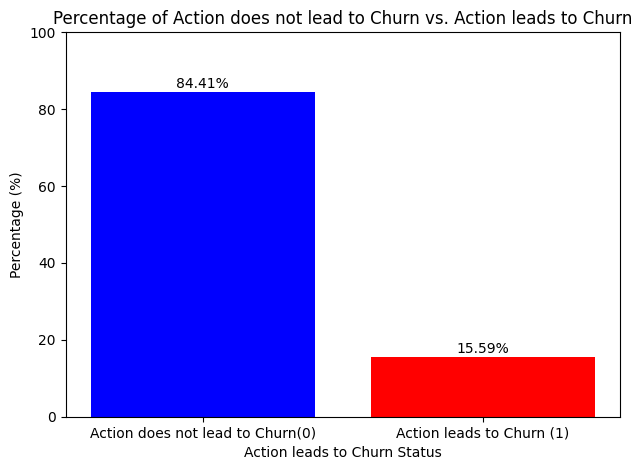

In [10]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Data
labels = ['Action does not lead to Churn(0)', 'Action leads to Churn (1)']
percentages = [percentage_0, percentage_1]

# Create a bar chart
plt.bar(labels, percentages, color=['blue', 'red'])  # White and red colors
plt.xlabel('Action leads to Churn Status')
plt.ylabel('Percentage (%)')
plt.title('Percentage of Action does not lead to Churn vs. Action leads to Churn')
plt.ylim(0, 100)

# Add percentages above the bars
for i, perc in enumerate(percentages):
    plt.text(i, perc + 1, f'{perc:.2f}%', ha='center')

# Save the chart as a JPEG image
plt.tight_layout()
plt.savefig('churn_percentage_chart.jpg', format='jpeg', dpi=300)  # Specify the file name and format




Interpretation: Just over 90% of players churn.

In [1]:
#Reimport 9/10 and 11/10 and 12/10 and 13/10 files from google drive
#Get latest by_player_by_season_df (by_player_by_season_w_binary_churn_df.csv)
! gdown 1D8faBSjuyXdOs-my9gU4XNucHuNMnD2f
#Get latest apccg_df (apccg_w_action_leads_to_churn_df).csv
! gdown 1LdKe6citLjFSCF0hCP9Mg8OvVyxhCUkY
#Get dictionary player_first_included_dates_by_league_df.csv (previously called league_dates_df_transposed)
! gdown 1jKtICuX9x3ua_jSQr1K60nEbqRHX2nna

Downloading...
From: https://drive.google.com/uc?id=1D8faBSjuyXdOs-my9gU4XNucHuNMnD2f
To: /content/by_player_by_season_w_binary_churn_df.csv
100% 62.8M/62.8M [00:00<00:00, 186MB/s]
Downloading...
From: https://drive.google.com/uc?id=1LdKe6citLjFSCF0hCP9Mg8OvVyxhCUkY
To: /content/apccg_w_action_leads_to_churn.csv
100% 164M/164M [00:01<00:00, 99.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1jKtICuX9x3ua_jSQr1K60nEbqRHX2nna
To: /content/player_first_included_dates_by_league_df.csv
100% 98.8k/98.8k [00:00<00:00, 77.0MB/s]


In [2]:
#Reimport by_player_by_season_df (by_player_by_season_w_binary_churn_df.csv)
#and apccg_df (apccg_w_action_leads_to_churn_df)
#and player_first_included_df
#import some useful libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab as pl

# A custom function to convert a string of seasons to a list of integers
def str_to_int_list(s):
    if s.strip():
        return [int(x) for x in s.split(',')]
    else:
        return []

#import by_player_by_season_df
by_player_by_season_df = pd.read_csv("/content/by_player_by_season_w_binary_churn_df.csv")

#Reset date columns as datetime datatypes in by_player_by_season_df
by_player_by_season_df['season_start_date'] = pd.to_datetime(by_player_by_season_df['season_start_date'])
by_player_by_season_df['season_end_date'] = pd.to_datetime(by_player_by_season_df['season_end_date'])


by_player_by_season_df = by_player_by_season_df.rename(columns={
    'days_since_joined_second': 'days_since_joined_second_league',
    'days_since_joined_third': 'days_since_joined_third_league',
    'days_since_joined_fourth': 'days_since_joined_fourth_league'
})

by_player_by_season_df.info()



#Reimport
apccg_df = pd.read_csv("/content/apccg_w_action_leads_to_churn.csv")

#Reset date columns as datetime datatypes in apccg_df
apccg_df['date'] = pd.to_datetime(apccg_df['date'])

apccg_df.info()


#import dictionary player_first_included_dates_by_league_df.csv (previously called league_dates_df_transposed)
player_first_included_df = pd.read_csv(
    "player_first_included_dates_by_league_df.csv")

player_first_included_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15578 entries, 0 to 15577
Data columns (total 50 columns):
 #   Column                                                 Non-Null Count  Dtype         
---  ------                                                 --------------  -----         
 0   seasons_within_this_league                             15578 non-null  object        
 1   list_of_seasons_included_in_from_this_league           15578 non-null  object        
 2   churned_seasons_from_this_league                       15578 non-null  object        
 3   churn_count_from_this_league                           15578 non-null  float64       
 4   churn_period_per_churned_season_for_this_league        15578 non-null  object        
 5   days_since_joined_this_league                          15578 non-null  float64       
 6   churn_days_this_league                                 15578 non-null  float64       
 7   ratio_churned_to_included_this_league                  15448 non-nu

<ipython-input-2-ca04c9a9bbea>:36: DtypeWarning: Columns (4,17,25,28,30) have mixed types. Specify dtype option on import or set low_memory=False.
  apccg_df = pd.read_csv("/content/apccg_w_action_leads_to_churn.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1021603 entries, 0 to 1021602
Data columns (total 36 columns):
 #   Column                                      Non-Null Count    Dtype         
---  ------                                      --------------    -----         
 0   game_id                                     1021603 non-null  float64       
 1   season_id                                   385386 non-null   float64       
 2   division_id                                 385386 non-null   float64       
 3   winner_id                                   33574 non-null    float64       
 4   score                                       32940 non-null    object        
 5   Played_a_game                               33574 non-null    float64       
 6   Received_inputted_game                      16787 non-null    float64       
 7   Inputted_game_result                        16787 non-null    float64       
 8   game_player_id                              1021603 non-null  

player_id         first_league               second third fourth
0           1.0  2010-03-15 00:00:00  2012-05-01 00:00:00   NaN    NaN
1           2.0  2010-03-15 00:00:00  2013-04-15 00:00:00   NaN    NaN
2           3.0  2010-03-15 00:00:00                  NaN   NaN    NaN
3           4.0  2010-03-15 00:00:00  2013-04-15 00:00:00   NaN    NaN
4           5.0  2010-03-15 00:00:00                  NaN   NaN    NaN
...         ...                  ...                  ...   ...    ...
3110    16043.0  2010-03-15 00:00:00                  NaN   NaN    NaN
3111    16044.0  2011-06-30 00:00:00                  NaN   NaN    NaN
3112    16047.0  2021-07-24 00:00:00                  NaN   NaN    NaN
3113    16051.0  2021-07-24 00:00:00                  NaN   NaN    NaN
3114    16083.0  2017-09-16 00:00:00                  NaN   NaN    NaN

[3115 rows x 5 columns]

In [3]:
# Using 'by_player_by_season_df' DataFrame
value_counts = by_player_by_season_df['this_season_leads_to_churn'].value_counts()

# Print the value counts
print("Value Counts for 'this_season_leads_to_churn':")
print(value_counts)


Value Counts for 'this_season_leads_to_churn':
0.0    12193
1.0     3385
Name: this_season_leads_to_churn, dtype: int64


Interpretation. Taking each row by itself, a player_season leads to churn only 22% (3185/15578 = 0.2172936) of the time.

In [4]:
# Assuming 'by_player_by_season_df' is your DataFrame
unique_players_leads_to_churn_0 = by_player_by_season_df[by_player_by_season_df['this_season_leads_to_churn'] == 0]['player_id'].nunique()
unique_players_leads_to_churn_1 = by_player_by_season_df[by_player_by_season_df['this_season_leads_to_churn'] == 1]['player_id'].nunique()

# Print the number of unique players in each cohort
print("Number of Unique Players in 'this_season_leads_to_churn=0' Cohort:", unique_players_leads_to_churn_0)
print("Number of Unique Players in 'this_season_leads_to_churn=1' Cohort:", unique_players_leads_to_churn_1)


Number of Unique Players in 'this_season_leads_to_churn=0' Cohort: 2203
Number of Unique Players in 'this_season_leads_to_churn=1' Cohort: 2804


Interpretation: However, when looking for unique players who have ever had a player_season that leads to churn (i.e. this_season_leads_to_churn=1) 2804/3115 = 90% of all players), there are 90%. So churn players are common (90%) but churn player_seasons (22%) are far rarer.

In [5]:
#Investigating unique players churn v not churn
import pandas as pd

# Assuming 'by_player_by_season_df' is your DataFrame
# Calculate the total number of unique players in the DataFrame
total_unique_players = by_player_by_season_df['player_id'].nunique()

# Filter the DataFrame for rows where 'churn' is equal to 1
churned_players_df = by_player_by_season_df[by_player_by_season_df['churn'] == 1]

# Calculate the number of unique players who churned
unique_churned_players = churned_players_df['player_id'].nunique()

# Calculate the fraction and percentage of unique players who churned
fraction_churned = unique_churned_players / total_unique_players
percentage_churned = fraction_churned * 100

# Filter the DataFrame for rows where 'this_season_leads_to_churn' is equal to 1
leads_to_churn_df = by_player_by_season_df[by_player_by_season_df['this_season_leads_to_churn'] == 1]
print(len(leads_to_churn_df))

# Calculate the number of unique players who have 'this_season_leads_to_churn' equal to 1
unique_leads_to_churn_players = leads_to_churn_df['player_id'].nunique()
print(unique_leads_to_churn_players)

# Calculate the percentage of unique players who have 'this_season_leads_to_churn' equal to 1
percentage_leads_to_churn = (unique_leads_to_churn_players / total_unique_players) * 100

# Print the results
print("Total Unique Players:", total_unique_players)
print("Unique Players Who Churned:", unique_churned_players)
print("Fraction of Unique Players Who Churned:", fraction_churned)
print("Percentage of Unique Players Who Churned:", percentage_churned)
print("Unique Players Who Have 'this_season_leads_to_churn' = 1:", unique_leads_to_churn_players)
print("Percentage of Unique Players Who Have 'this_season_leads_to_churn' = 1:", percentage_leads_to_churn)


3385
2804
Total Unique Players: 3115
Unique Players Who Churned: 2811
Fraction of Unique Players Who Churned: 0.9024077046548956
Percentage of Unique Players Who Churned: 90.24077046548956
Unique Players Who Have 'this_season_leads_to_churn' = 1: 2804
Percentage of Unique Players Who Have 'this_season_leads_to_churn' = 1: 90.01605136436596


In [ ]:
apccg_df.info()

In [9]:
#Reformat churn_period_per_churned_season_for_this_league
# import pandas as pd
# import numpy as np
# from datetime import datetime
# def format_churn_periods(churn_period_per_churned_season_for_this_league):
#     formatted_churn_periods = {int(season_id): [start_date.date(), end_date.date()] for season_id, [start_date, end_date] in churn_period_per_churned_season_for_this_league.items()}
#     return formatted_churn_periods

# # Example usage:
# churn_period_per_churned_season_for_this_league = {
#     '2379': [datetime.datetime(2022, 4, 8, 0, 0), datetime.datetime(2023, 3, 19, 0, 0)]
# }

# formatted_churn_periods = format_churn_periods(churn_period_per_churned_season_for_this_league)
# print(formatted_churn_periods)


AttributeError: ignored

In [3]:
#Import Players join date and player_id from Players table from SquashMatch_11577
! gdown 1BQjms0AbpTgP7_QwTxl4X0rIi-vY3Stg

Downloading...
From: https://drive.google.com/uc?id=1BQjms0AbpTgP7_QwTxl4X0rIi-vY3Stg
To: /content/Players join date and player_id from Players table from SquashMatch_11577.csv
100% 190k/190k [00:00<00:00, 92.3MB/s]


In [6]:
#Create features 45a: add_player_date_join to by_player_by_season_df

# Use add_player_date_join, to get dataframe of days versus number of players
#Use time_since_joined_days to build pic of gained players per day
# Build list of date of churns per player, using seasons_churned . Call this churns per day
#Show both on graph

#Add in
#Import table with player_id and player_date_join
import pandas as pd

# Replace 'your_file_path_here.csv' with the actual file path
file_path = '/content/Players join date and player_id from Players table from SquashMatch_11577.csv'

# Read the CSV file into a DataFrame
player_join_date_df = pd.read_csv(file_path)

# Convert the 'player_date_join' column to datetime
player_join_date_df['player_date_join'] = pd.to_datetime(player_join_date_df['player_date_join'])

# Convert the 'player_id' column to int64
player_join_date_df['player_id'] = player_join_date_df['player_id'].astype('int64')

# Now, df contains the data with the specified data types
# player_join_date_df


#add_player_date_join function to by_player_by_season_df
def add_player_date_join(player_join_date_df, by_player_by_season_df):
    # Create a new column 'player_join_date' initialized to None in by_player_by_season_df
    by_player_by_season_df['player_join_date'] = None

    # Iterate through by_player_by_season_df row by row
    for index, row in by_player_by_season_df.iterrows():
        player_id = row['player_id']

        # Look up the player_id in player_join_date_df and get the player_join_date
        player_join_date = player_join_date_df[player_join_date_df['player_id'] == player_id]['player_date_join'].values

        # Populate the 'player_join_date' column in by_player_by_season_df
        if len(player_join_date) > 0:
            by_player_by_season_df.at[index, 'player_join_date'] = player_join_date[0]

    return by_player_by_season_df
by_player_by_season_w_join_date_df=add_player_date_join(player_join_date_df, by_player_by_season_df)
by_player_by_season_w_join_date_df


#Export
by_player_by_season_w_join_date_df.to_csv('by_player_by_season_w_join_date.csv', index=False)

#Replace
by_player_by_season_df = by_player_by_season_w_join_date_df

# def time_since_joined_days(by_player_by_season_df):
#     # Create a new column 'days_since_joined' in by_player_by_season_df
#     by_player_by_season_df['days_since_joined'] = None

#     # Iterate through by_player_by_season_df row by row
#     for index, row in by_player_by_season_df.iterrows():
#         # Extract the datetime from season_start_date and player_join_date
#         season_start_date = pd.to_datetime(row['season_start_date'])
#         player_join_date = pd.to_datetime(row['player_join_date'])

#         # Calculate the number of days since joined
#         days_since_joined = (season_start_date - player_join_date).days

#         # Populate the 'days_since_joined' column with the integer value
#         by_player_by_season_df.at[index, 'days_since_joined'] = days_since_joined

#     return by_player_by_season_df

In [7]:
player_join_date_df

player_date_join  player_id
0           2010-03-15          1
1           2010-03-15          2
2           2010-03-15          3
3           2010-03-15          4
4           2010-03-15          5
...                ...        ...
11572       2023-02-07      16094
11573       2023-02-07      16095
11574       2023-02-07      16096
11575       2023-02-08      16097
11576       2023-02-08      16098

[11577 rows x 2 columns]

In [8]:
#Add proper cumulative to df
import pandas as pd

# Assuming you already have a DataFrame called 'player_join_date_df'

# Create a new column 'proper_cumulative' and initialize it to 0
player_join_date_df['proper_cumulative'] = 0

# Initialize a counter
counter = 0

# Iterate through the DataFrame and update 'proper_cumulative'
for index, row in player_join_date_df.iterrows():
    counter += 1
    player_join_date_df.at[index, 'proper_cumulative'] = counter

# Now, 'proper_cumulative' column contains the proper cumulative count

# Display the updated DataFrame
print(player_join_date_df)



# Export the DataFrame to a CSV file
player_join_date_df.to_csv('player_join_date_df.csv', index=False)

      player_date_join  player_id  proper_cumulative
0           2010-03-15          1                  1
1           2010-03-15          2                  2
2           2010-03-15          3                  3
3           2010-03-15          4                  4
4           2010-03-15          5                  5
...                ...        ...                ...
11572       2023-02-07      16094              11573
11573       2023-02-07      16095              11574
11574       2023-02-07      16096              11575
11575       2023-02-08      16097              11576
11576       2023-02-08      16098              11577

[11577 rows x 3 columns]


In [10]:
#Create new EDA function 46: new_joiners_by_day_df
import pandas as pd

def create_new_joiners_by_day_df(player_join_date_df):
    # Get the minimum and maximum dates from the player_date_join_df
    min_date = player_join_date_df['player_date_join'].min()
    max_date = player_join_date_df['player_date_join'].max()

    # Create a list of dates from the minimum to maximum date
    date_range = pd.date_range(start=min_date, end=max_date)

    # Initialize an empty list to store the data
    data = []

    # Loop through the date range and count new joiners for each date
    for date in date_range:
        count = len(player_join_date_df[player_join_date_df['player_date_join'] == date])
        data.append([date, count])

    # Create the new DataFrame 'new_joiners_by_day'
    new_joiners_by_day = pd.DataFrame(data, columns=['date', 'new_joiners_today'])

    # Fill any missing dates with 0 new joiners
    missing_dates = date_range.difference(new_joiners_by_day['date'])
    missing_data = [[date, 0] for date in missing_dates]
    missing_df = pd.DataFrame(missing_data, columns=['date', 'new_joiners_today'])
    new_joiners_by_day = pd.concat([new_joiners_by_day, missing_df]).sort_values(by='date').reset_index(drop=True)

    return new_joiners_by_day

# Example usage:
new_joiners_by_day_df = create_new_joiners_by_day_df(player_join_date_df)
print(new_joiners_by_day_df)

# Export the DataFrame to a CSV file
new_joiners_by_day_df.to_csv('new_joiners_by_day_df.csv', index=False)

           date new_joiners_today
0    2010-03-15                18
1    2010-03-16                 0
2    2010-03-17                 0
3    2010-03-18                 0
4    2010-03-19                 0
...         ...               ...
4709 2023-02-04                 2
4710 2023-02-05                 1
4711 2023-02-06                 4
4712 2023-02-07                 5
4713 2023-02-08                 2

[4714 rows x 2 columns]


Maximum new joiners (146) on 2013-09-01T00:00:00.000000000
Minimum new joiners (0) on 2010-03-16T00:00:00.000000000
Mean new joiners: 2.46
Median new joiners: 2.00


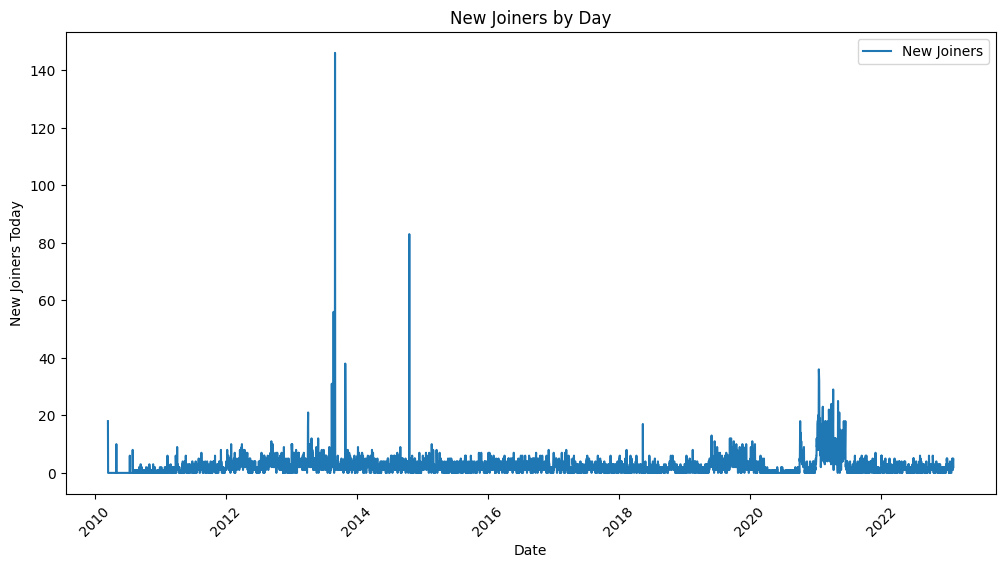

In [12]:
#Investigate new_joiners_by_day
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have the 'new_joiners_by_day' DataFrame
new_joiners_by_day = new_joiners_by_day_df
# Print the maximum and minimum new joiners
max_new_joiners = new_joiners_by_day['new_joiners_today'].max()
min_new_joiners = new_joiners_by_day['new_joiners_today'].min()
max_date = new_joiners_by_day[new_joiners_by_day['new_joiners_today'] == max_new_joiners]['date'].values[0]
min_date = new_joiners_by_day[new_joiners_by_day['new_joiners_today'] == min_new_joiners]['date'].values[0]

print(f"Maximum new joiners ({max_new_joiners}) on {max_date}")
print(f"Minimum new joiners ({min_new_joiners}) on {min_date}")

# Calculate and print the mean and median new joiners
mean_new_joiners = new_joiners_by_day['new_joiners_today'].mean()
median_new_joiners = new_joiners_by_day['new_joiners_today'].median()

print(f"Mean new joiners: {mean_new_joiners:.2f}")
print(f"Median new joiners: {median_new_joiners:.2f}")

# Plot a simple graph
plt.figure(figsize=(12, 6))
plt.plot(new_joiners_by_day['date'], new_joiners_by_day['new_joiners_today'], label='New Joiners')
plt.title('New Joiners by Day')
plt.xlabel('Date')
plt.ylabel('New Joiners Today')
plt.legend()
plt.xticks(rotation=45)

# Export the graph as an image (e.g., PNG)
plt.savefig('new_joiners_by_day.png', bbox_inches='tight', pad_inches=0)

# Show the plot
plt.show()



In [13]:
#Investigate busy days when new_joiners_today > 30
high_new_joiners = new_joiners_by_day[new_joiners_by_day['new_joiners_today'] > 30]
print("Days with more than 30 new joiners:")
for index, row in high_new_joiners.iterrows():
    print(f"{row['date']}: {row['new_joiners_today']} new joiners")


Days with more than 30 new joiners:
2013-08-14 00:00:00: 31 new joiners
2013-08-24 00:00:00: 56 new joiners
2013-09-01 00:00:00: 146 new joiners
2013-10-28 00:00:00: 38 new joiners
2014-10-20 00:00:00: 83 new joiners
2021-01-19 00:00:00: 36 new joiners
2021-01-20 00:00:00: 34 new joiners
2021-01-21 00:00:00: 32 new joiners


Interpretation: There were 8 days with more than 30 new joiners. Most of these were back in 2013 and 2014, although three were in the reopening after covid (Jan 19-21 2021). The biggest day was 2013-09-01 with 146 new joiners.

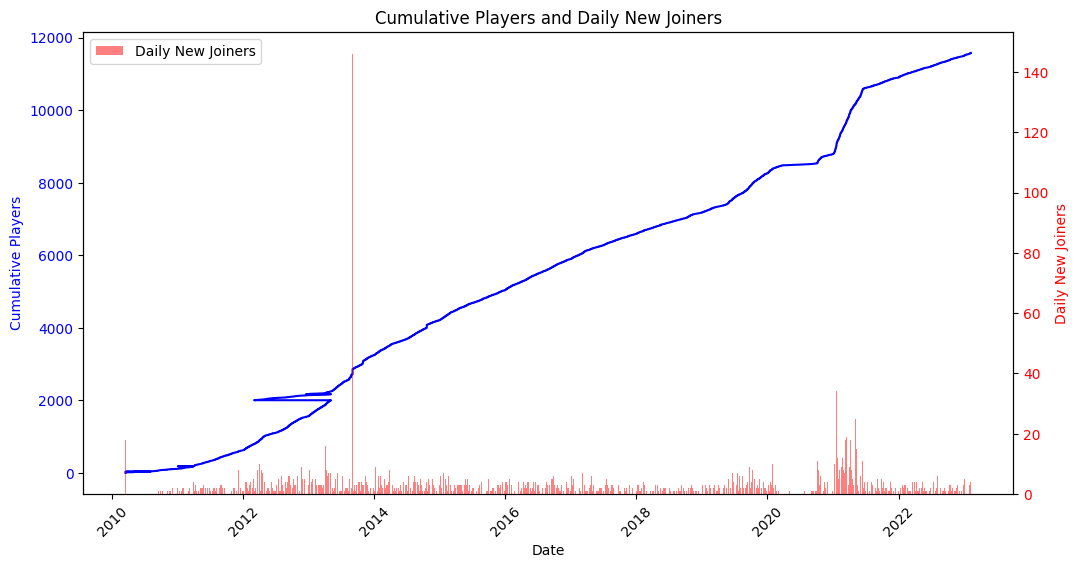

In [14]:
#Visualising cumulative and daily players over time
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have the 'new_joiners_by_day' DataFrame
# If not, use the code provided in the previous response to create it
# Also assuming you've added the 'proper_cumulative' column to 'player_join_date_df'

# Plot Cumulative Players (left-hand plot)
plt.figure(figsize=(12, 6))
plt.plot(player_join_date_df['player_date_join'], player_join_date_df['proper_cumulative'], color='b', label='Cumulative Players')
plt.title('Cumulative Players and Daily New Joiners')
plt.xlabel('Date')
plt.ylabel('Cumulative Players', color='b')
plt.tick_params(axis='y', labelcolor='b')
plt.xticks(rotation=45)
# plt.grid()

# Create a second y-axis for Daily New Joiners (right-hand plot)
ax2 = plt.twinx()
ax2.bar(new_joiners_by_day['date'], new_joiners_by_day['new_joiners_today'], color='r', alpha=0.5, label='Daily New Joiners')
ax2.set_ylabel('Daily New Joiners', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Export the graph as an image (e.g., PNG)
plt.savefig('cumulative_and_daily_joiners.png', bbox_inches='tight', pad_inches=0)

# Show the legend
plt.legend(loc='upper left')

# Show the plot
plt.show()


In [15]:
max_cumulative = player_join_date_df['proper_cumulative'].max()
print(f"Maximum Cumulative Players: {max_cumulative}")


Maximum Cumulative Players: 11577


Interpretation: 11577 players have joined over the period of the datast. This does not include those who have churned away.

In [16]:
#Create  EDA list of dates and churn
#Import by_player_by_season_w_days_since_joined_per_league_df
#Import files from google drive
! gdown 1IIY38HXVz_IEJIAXMzELO8LT2ywnrkpJ

bpbsdf_w_all_leagues_seasons_churned = pd.read_csv("/content/by_player_by_season_w_days_since_joined_per_league_df.csv")

bpbsdf_w_all_leagues_seasons_churned



Downloading...
From: https://drive.google.com/uc?id=1IIY38HXVz_IEJIAXMzELO8LT2ywnrkpJ
To: /content/by_player_by_season_w_days_since_joined_per_league_df.csv
100% 84.5M/84.5M [00:00<00:00, 107MB/s]


division_player_id  division_id  player_id  \
0                  7957.0       2566.0        1.0   
1                   105.0         27.0        1.0   
2                    17.0          1.0        1.0   
3                  4312.0       1003.0        1.0   
4                    34.0          8.0        1.0   
...                   ...          ...        ...   
15573             17853.0       4203.0    16043.0   
15574             17857.0       4180.0    16044.0   
15575             17875.0       4204.0    16047.0   
15576             17877.0       4205.0    16051.0   
15577             17910.0       4209.0    16083.0   

                             List of seasons included in  division_name  \
0      [1, 2, 3, 6, 7, 8, 9, 11, 12, 29, 1001, 1002, ...            1.0   
1      [1, 2, 3, 6, 7, 8, 9, 11, 12, 29, 1001, 1002, ...            2.0   
2      [1, 2, 3, 6, 7, 8, 9, 11, 12, 29, 1001, 1002, ...            1.0   
3      [1, 2, 3, 6, 7, 8, 9, 11, 12, 29, 1001, 1002, ...            1.0   
4      [1, 2, 3, 6, 7, 8, 9, 11, 12, 29, 1001, 1002, ...            1.0   
...                                                  ...            ...   
15573                                             [2427]            5.0   
15574                                             [2424]            3.0   
15575                                             [2428]            1.0   
15576                                             [2428]            2.0   
15577                                             [2430]            2.0   

       season_id  league_id List of all leagues played in  \
0         2092.0     1002.0                     [1, 1002]   
1            7.0        1.0                     [1, 1002]   
2            1.0        1.0                     [1, 1002]   
3         1002.0     1002.0                     [1, 1002]   
4            2.0        1.0                     [1, 1002]   
...          ...        ...                           ...   
15573     2427.0        1.0                           [1]   
15574     2424.0        7.0                           [7]   
15575     2428.0     2041.0                        [2041]   
15576     2428.0     2041.0                        [2041]   
15577     2430.0     2031.0                        [2031]   

       First_league_included_in  Second_league_included_in  ...  \
0                           1.0                     1002.0  ...   
1                           1.0                     1002.0  ...   
2                           1.0                     1002.0  ...   
3                           1.0                     1002.0  ...   
4                           1.0                     1002.0  ...   
...                         ...                        ...  ...   
15573                       1.0                        0.0  ...   
15574                       7.0                        0.0  ...   
15575                    2041.0                        0.0  ...   
15576                    2041.0                        0.0  ...   
15577                    2031.0                        0.0  ...   

       closeness_score_total_for_games_this_season  \
0                                                2   
1                                                2   
2                                                2   
3                                                4   
4                                                2   
...                                            ...   
15573                                            0   
15574                                            2   
15575                                            4   
15576                                            3   
15577                                            0   

       this_season_leads_to_churn  \
0                             0.0   
1                             0.0   
2                             0.0   
3                             0.0   
4                             0.0   
...                           ...   
15573                  

In [17]:
#Create  EDA function 47: players_and_churn_dates_df dataframe with
#list of players who've churned and dates of churn using funciton create_df_list_players_w_churn_dates
import pandas as pd

# Function to find the start date of a season
def find_start_season(by_player_by_season_df, season_id):
    matching_rows = by_player_by_season_df[by_player_by_season_df['season_id'] == season_id]

    if not matching_rows.empty:
        season_start_date = matching_rows['season_start_date'].values[0]
        return season_start_date
    else:
        return None

# Function to create a DataFrame with player IDs and churn dates
def create_df_list_players_w_churn_dates(bpbsdf_w_all_leagues_seasons_churned):
    # Create an empty DataFrame to store player_id and date_of_churn
    players_and_churn_dates = pd.DataFrame(columns=['player_id', 'date_of_churn'])

    # Sort the DataFrame by unique player_id
    bpbsdf_w_all_leagues_seasons_churned = bpbsdf_w_all_leagues_seasons_churned.sort_values(by='player_id')

    # Iterate through unique player_ids
    for player_id in bpbsdf_w_all_leagues_seasons_churned['player_id'].unique():
        # Filter the DataFrame for the current player_id
        player_df = bpbsdf_w_all_leagues_seasons_churned[bpbsdf_w_all_leagues_seasons_churned['player_id'] == player_id]

        # Get the seasons_churned value as a list
        seasons_churned_str = player_df['seasons_churned'].values[0]
        seasons_churned = eval(seasons_churned_str) if seasons_churned_str else []

        # Iterate through churned seasons and add rows to players_and_churn_dates
        for season_id in seasons_churned:
            start_date = find_start_season(bpbsdf_w_all_leagues_seasons_churned, season_id)
            if start_date:
                players_and_churn_dates = players_and_churn_dates.append({'player_id': player_id, 'date_of_churn': start_date}, ignore_index=True)

    # Reset the index of the new DataFrame
    players_and_churn_dates = players_and_churn_dates.reset_index(drop=True)

    return players_and_churn_dates

# Usage example
players_and_churn_dates_df = create_df_list_players_w_churn_dates(bpbsdf_w_all_leagues_seasons_churned)
players_and_churn_dates_df

Streaming output truncated to the last 5000 lines.
<ipython-input-17-f27803c77025>:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  players_and_churn_dates = players_and_churn_dates.append({'player_id': player_id, 'date_of_churn': start_date}, ignore_index=True)
<ipython-input-17-f27803c77025>:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  players_and_churn_dates = players_and_churn_dates.append({'player_id': player_id, 'date_of_churn': start_date}, ignore_index=True)
<ipython-input-17-f27803c77025>:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  players_and_churn_dates = players_and_churn_dates.append({'player_id': player_id, 'date_of_churn': start_date}, ignore_index=True)
<ipython-input-17-f27803c77025>:36: FutureW

player_id date_of_churn
0           1.0    2011-05-15
1           1.0    2011-08-15
2           1.0    2013-03-15
3           1.0    2014-01-22
4           2.0    2012-06-02
...         ...           ...
3654    15955.0    2023-01-09
3655    15964.0    2023-01-09
3656    15965.0    2023-01-12
3657    15973.0    2023-01-10
3658    15984.0    2023-01-10

[3659 rows x 2 columns]

In [75]:
#Export players_and_churn_dates_df to csv
players_and_churn_dates_df.to_csv('players_and_churn_dates.csv', index=False)


In [18]:
players_and_churn_dates_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3659 entries, 0 to 3658
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   player_id      3659 non-null   float64
 1   date_of_churn  3659 non-null   object 
dtypes: float64(1), object(1)
memory usage: 57.3+ KB


In [19]:
#Create EDA function 48: create_date_and_number_of_churns_df
import pandas as pd

def create_date_and_number_of_churns_df(players_and_churn_dates_df):
    # Convert 'date_of_churn' to datetime data type
    players_and_churn_dates_df['date_of_churn'] = pd.to_datetime(players_and_churn_dates_df['date_of_churn'])

    # Get the minimum and maximum dates in the 'date_of_churn' column
    min_date = players_and_churn_dates_df['date_of_churn'].min()
    max_date = players_and_churn_dates_df['date_of_churn'].max()

    # Create a list of dates between min and max
    date_range = pd.date_range(start=min_date, end=max_date)

    # Initialize the new DataFrame
    date_and_number_of_churns = pd.DataFrame(columns=['date', 'number_of_churns_this_day', 'cumulative_churns'])
    date_and_number_of_churns['date'] = date_range

    # Initialize counters
    cumulative_churns = 0
    number_of_churns_this_day = 0

    # Populate the 'number_of_churns_this_day' and 'cumulative_churns' columns
    for date in date_range:
        number_of_churns_this_day = len(players_and_churn_dates_df[players_and_churn_dates_df['date_of_churn'] == date])
        cumulative_churns += number_of_churns_this_day
        date_and_number_of_churns.loc[date_and_number_of_churns['date'] == date, 'number_of_churns_this_day'] = number_of_churns_this_day
        date_and_number_of_churns.loc[date_and_number_of_churns['date'] == date, 'cumulative_churns'] = cumulative_churns

    return date_and_number_of_churns

# Example usage:
date_and_number_of_churns_df = create_date_and_number_of_churns_df(players_and_churn_dates_df)


# Example usage:
date_and_number_of_churns_df = create_date_and_number_of_churns_df(players_and_churn_dates_df)
date_and_number_of_churns_df

#Export
# Export the DataFrame to a CSV file
date_and_number_of_churns_df.to_csv('date_and_number_of_churns.csv', index=False)


In [20]:
date_and_number_of_churns_df

date number_of_churns_this_day cumulative_churns
0    2010-05-01                         2                 2
1    2010-05-02                         0                 2
2    2010-05-03                         0                 2
3    2010-05-04                         0                 2
4    2010-05-05                         0                 2
...         ...                       ...               ...
4658 2023-01-31                         0              3656
4659 2023-02-01                         0              3656
4660 2023-02-02                         0              3656
4661 2023-02-03                         1              3657
4662 2023-02-04                         2              3659

[4663 rows x 3 columns]

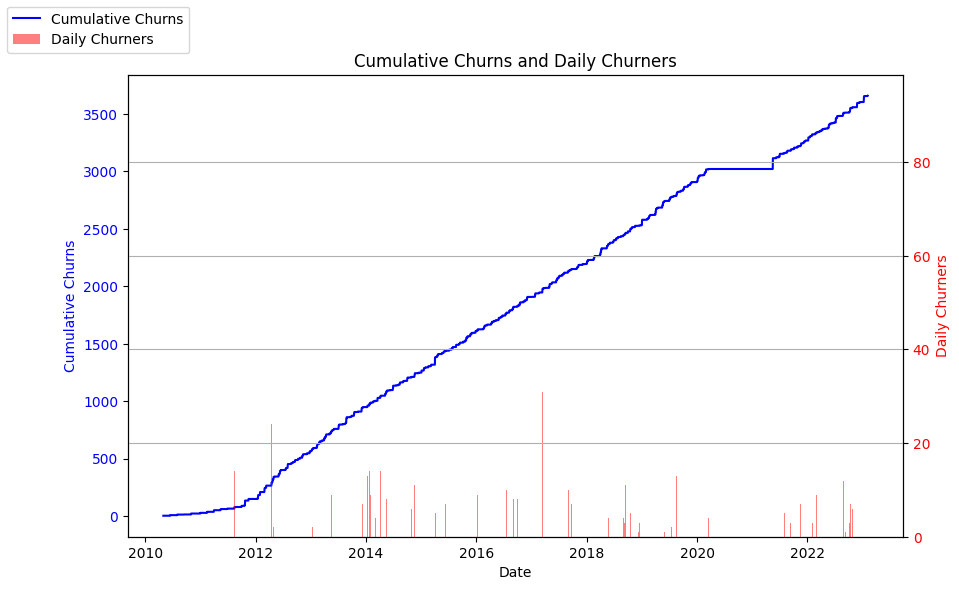

In [21]:
#Visualize Cumulative and Daily churn
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot cumulative churns on the left axis
ax1.plot(date_and_number_of_churns_df['date'], date_and_number_of_churns_df['cumulative_churns'], color='b', label='Cumulative Churns')
ax1.set_xlabel('Date')
ax1.set_ylabel('Cumulative Churns', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_yscale('linear')  # Set the y-axis scale to linear

# Create a second y-axis for daily churners
ax2 = ax1.twinx()
ax2.bar(date_and_number_of_churns_df['date'], date_and_number_of_churns_df['number_of_churns_this_day'], color='r', alpha=0.5, label='Daily Churners')
ax2.set_ylabel('Daily Churners', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Customize the plot
plt.title('Cumulative Churns and Daily Churners')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.grid()

# Show the legend
fig.legend(loc='upper left')


# Save the plot as an image (e.g., PNG)
plt.savefig('cumulative_churns_and_daily_churners.png', bbox_inches='tight', pad_inches=0)

# Display the plot
plt.show()





Interpretation: The intermittent and evenly spaced nature of the data is because the churn accrues to the date of start of next season, so it doesn't truly reflect the actual daily nature of the last action of a churner (only the date of the next season they could have been included in, but weren't and so definitely had churned by then). There were two big spikes of over 20 churners per day.

In [22]:
# Investigate daily churn. Find the date with the maximum number of daily churners
# Convert 'number_of_churns_this_day' to integer data type
date_and_number_of_churns_df['number_of_churns_this_day'] = date_and_number_of_churns_df['number_of_churns_this_day'].astype(int)

# Now you can use idxmax()
max_date = date_and_number_of_churns_df.loc[date_and_number_of_churns_df['number_of_churns_this_day'].idxmax()]['date']
max_churners = date_and_number_of_churns_df['number_of_churns_this_day'].max()

print(f"Date with the maximum daily churners: {max_date}")
print(f"Number of churners on that day: {max_churners}")



# Dates when daily churners were over 10
dates_over_10 = date_and_number_of_churns_df[date_and_number_of_churns_df['number_of_churns_this_day'] > 10]['date']
print("Dates when daily churners were over 10:")
print(dates_over_10)

# Dates and number of churners for the largest two days
largest_dates = date_and_number_of_churns_df.nlargest(2, 'number_of_churns_this_day')
print("Dates and number of churners for the largest two days:")
print(largest_dates[['date', 'number_of_churns_this_day']])

# Convert 'cumulative_churns' column to int
date_and_number_of_churns_df['cumulative_churns'] = date_and_number_of_churns_df['cumulative_churns'].astype(int)

# Calculate and print the mean and median of daily churners
mean_daily_churners = date_and_number_of_churns_df['number_of_churns_this_day'].mean()
median_daily_churners = date_and_number_of_churns_df['number_of_churns_this_day'].median()

print(f"Mean daily churners: {mean_daily_churners:.2f}")
print(f"Median daily churners: {median_daily_churners:.2f}")

# Export the maximum cumulative churns
max_cumulative_churns_date = date_and_number_of_churns_df.loc[date_and_number_of_churns_df['cumulative_churns'].idxmax()]['date']
max_cumulative_churns = date_and_number_of_churns_df['cumulative_churns'].max()

print(f"Date with the maximum cumulative churns: {max_cumulative_churns_date}")
print(f"Maximum cumulative churns: {max_cumulative_churns}")

# Calculate the longest gap with no daily churns
consecutive_gap = 0
longest_gap = 0
start_date = None
end_date = None

for index, row in date_and_number_of_churns_df.iterrows():
    if row['number_of_churns_this_day'] == 0:
        consecutive_gap += 1
        if start_date is None:
            start_date = row['date']
        end_date = row['date']
    else:
        if consecutive_gap > longest_gap:
            longest_gap = consecutive_gap
            longest_start_date = start_date
            longest_end_date = end_date
        consecutive_gap = 0
        start_date = None

if consecutive_gap > longest_gap:
    longest_gap = consecutive_gap
    longest_start_date = start_date
    longest_end_date = end_date

print(f"Longest gap with no daily churns:")
print(f"Start Date: {longest_start_date}")
print(f"End Date: {longest_end_date}")
print(f"Number of days: {longest_gap}")

# Calculate the longest and second longest gaps with no daily churns
consecutive_gap = 0
longest_gap = 0
second_longest_gap = 0
start_date = None
end_date = None
longest_start_date = None
longest_end_date = None
second_longest_start_date = None
second_longest_end_date = None

for index, row in date_and_number_of_churns_df.iterrows():
    if row['number_of_churns_this_day'] == 0:
        consecutive_gap += 1
        if start_date is None:
            start_date = row['date']
        end_date = row['date']
    else:
        if consecutive_gap > longest_gap:
            second_longest_gap = longest_gap
            second_longest_start_date = longest_start_date
            second_longest_end_date = longest_end_date
            longest_gap = consecutive_gap
            longest_start_date = start_date
            longest_end_date = end_date
        elif consecutive_gap > second_longest_gap:
            second_longest_gap = consecutive_gap
            second_longest_start_date = start_date
            second_longest_end_date = end_date
        consecutive_gap = 0
        start_date = None

if consecutive_gap > longest_gap:
    second_longest_gap = longest_gap
    second_longest_start_date = longest_start_date
    second_longest_end_date = longest_end_date
    longest_gap = consecutive_gap
    longest_start_date = start_date
    longest_end_date = end_date
elif consecutive_gap > second_longest_gap:
    second_longest_gap = consecutive_gap
    second_longest_start_date = start_date
    second_longest_end_date = end_date

print(f"Longest gap with no daily churns:")
print(f"Start Date: {longest_start_date}")
print(f"End Date: {longest_end_date}")
print(f"Number of days: {longest_gap}")

print(f"Second Longest gap with no daily churns:")
print(f"Start Date: {second_longest_start_date}")
print(f"End Date: {second_longest_end_date}")
print(f"Number of days: {second_longest_gap}")



Date with the maximum daily churners: 2021-05-17 00:00:00
Number of churners on that day: 94
Dates when daily churners were over 10:
335    2011-04-01
471    2011-08-15
541    2011-10-24
564    2011-11-16
625    2012-01-16
          ...    
4501   2022-08-27
4545   2022-10-10
4591   2022-11-25
4636   2023-01-09
4637   2023-01-10
Name: date, Length: 126, dtype: datetime64[ns]
Dates and number of churners for the largest two days:
           date  number_of_churns_this_day
4034 2021-05-17                         94
1798 2015-04-03                         61
Mean daily churners: 0.78
Median daily churners: 0.00
Date with the maximum cumulative churns: 2023-02-04 00:00:00
Maximum cumulative churns: 3659
Longest gap with no daily churns:
Start Date: 2020-03-18 00:00:00
End Date: 2021-05-16 00:00:00
Number of days: 425
Longest gap with no daily churns:
Start Date: 2020-03-18 00:00:00
End Date: 2021-05-16 00:00:00
Number of days: 425
Second Longest gap with no daily churns:
Start Date: 2010-1

In [49]:
print(f"Number of days: {second_longest_gap}")


Number of days: 60


Interpretation: The longest gap covered covid, so 425 days is not surprising. There should be a a long term goal to reduce the mean number of churners of from 0.78. It is good that the median is 0. The median is more representative, and less sensitive to outliers.   Second longest gap is 60, and that occurs early in the life of the squash league system, so not that surprising. This probably spans early launch to the first churners.  

Interpretation: There were two very large days for churners (2021-05-17 with 94 churns and 2015-04-03 with 61). There were 126 days with over 10 churns that day.

In [37]:
#Create EDA function 49: create_daily_net_players
import pandas as pd
import numpy as np


def create_daily_net_players(player_join_date_df, date_and_number_of_churns_df):
    # Sort both DataFrames by date
    player_join_date_df = player_join_date_df.sort_values(by='player_date_join')
    date_and_number_of_churns_df = date_and_number_of_churns_df.sort_values(by='date')

    # Create a DataFrame to store the combined data
    combined_df = pd.DataFrame(columns=['date', 'cumulative_joiners_so_far', 'number_of_churns_this_day', 'cumulative_churns', 'net_number_included'])

    # Get the minimum and maximum dates
    min_date = date_and_number_of_churns_df['date'].min()
    max_date = date_and_number_of_churns_df['date'].max()

    previous_cumulative_joiners = 0
    previous_cumulative_churns = 0

    # Iterate through dates
    for date in pd.date_range(start=min_date, end=max_date):
        date_data = date_and_number_of_churns_df[date_and_number_of_churns_df['date'] == date]

        if not date_data.empty:
            # If data for the date exists, use it
            cumulative_joiners_so_far = player_join_date_df[player_join_date_df['player_date_join'] <= date]['proper_cumulative'].max()
            number_of_churns_this_day = date_data['number_of_churns_this_day'].values[0]
            cumulative_churns = date_data['cumulative_churns'].values[0]

            previous_cumulative_joiners = cumulative_joiners_so_far
            previous_cumulative_churns = cumulative_churns
        else:
            # If data is missing, inherit the previous day's data
            cumulative_joiners_so_far = previous_cumulative_joiners
            number_of_churns_this_day = 0
            cumulative_churns = previous_cumulative_churns

        net_number_included = cumulative_joiners_so_far - cumulative_churns

        combined_df = pd.concat([combined_df, pd.DataFrame({
            'date': [date],
            'cumulative_joiners_so_far': [cumulative_joiners_so_far],
            'number_of_churns_this_day': [number_of_churns_this_day],
            'cumulative_churns': [cumulative_churns],
            'net_number_included': [net_number_included]
        })], ignore_index=True)

    return combined_df

# Example usage:
daily_net_players_df = create_daily_net_players(player_join_date_df, date_and_number_of_churns_df)
daily_net_players_df

#Export the DataFrame to a CSV file
daily_net_players_df.to_csv('daily_net_players_df.csv', index=False)  # Set index=False to exclude the index column


In [1]:
daily_net_players_df

NameError: ignored

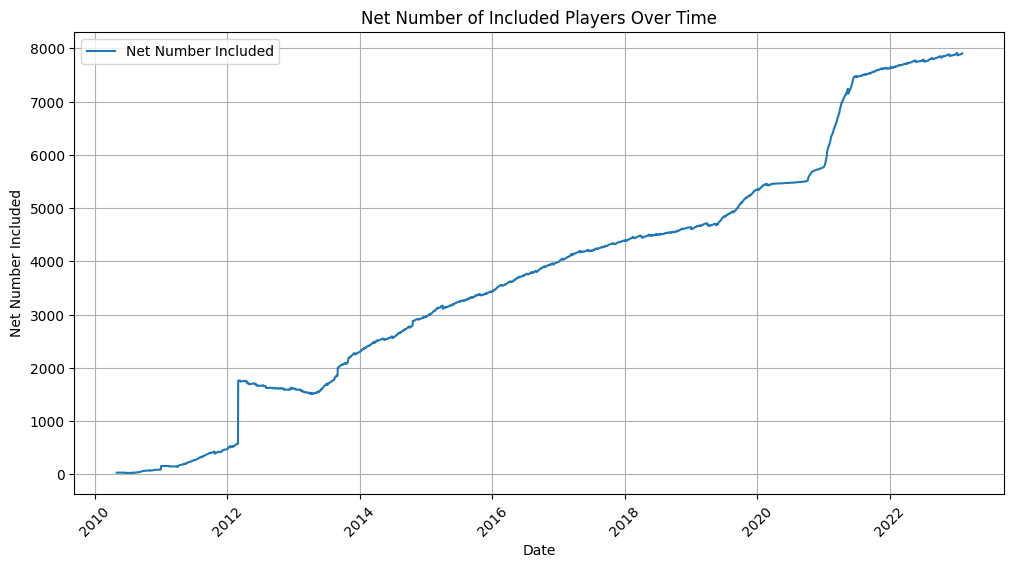

In [41]:
#Investigate net_number_included
import matplotlib.pyplot as plt

# Assuming you have already created the daily_net_players_df DataFrame

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the data
ax.plot(daily_net_players_df['date'], daily_net_players_df['net_number_included'], label='Net Number Included')
ax.set_xlabel('Date')
ax.set_ylabel('Net Number Included')
ax.set_title('Net Number of Included Players Over Time')
ax.grid()

# Customize the x-axis date format
plt.xticks(rotation=45)

# Show the legend
ax.legend()


# Export the plot as an image (e.g., PNG)
plt.savefig('net_number_included_plot.png', bbox_inches='tight', pad_inches=0)

# Display the plot
plt.show()


Interpretation: There were big leaps in numbers included in early 2012, and following covid reopening in 2021. There was a small loss of players (in the period early 2012 to mid 2013) following the 2012 first big spurt of new players, when net included decreased. Apart from that, the general patter is for steady growth in net included numbers.  

In [2]:
#Reimport 14/10 files from google drive
#Get latest by_player_by_season_df (by_player_by_season_w_join_date.csv)
! gdown 1QvMJZdLTXkB8IbSNV4h48iZeJL1fxJUt
#Get latest apccg_df (apccg_w_action_leads_to_churn_df).csv
! gdown 1LdKe6citLjFSCF0hCP9Mg8OvVyxhCUkY


Downloading...
From: https://drive.google.com/uc?id=1QvMJZdLTXkB8IbSNV4h48iZeJL1fxJUt
To: /content/by_player_by_season_w_join_date.csv
100% 63.2M/63.2M [00:01<00:00, 53.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1LdKe6citLjFSCF0hCP9Mg8OvVyxhCUkY
To: /content/apccg_w_action_leads_to_churn.csv
100% 164M/164M [00:03<00:00, 46.9MB/s]


In [3]:
#Reimport 14/10 by_player_by_season_df (by_player_by_season_w_join_date.csv)
#and apccg_df (apccg_w_action_leads_to_churn_df)
#
#import some useful libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab as pl

# A custom function to convert a string of seasons to a list of integers
def str_to_int_list(s):
    if s.strip():
        return [int(x) for x in s.split(',')]
    else:
        return []

#import by_player_by_season_df
by_player_by_season_df = pd.read_csv("/content/by_player_by_season_w_join_date.csv")

#Reset date columns as datetime datatypes in by_player_by_season_df
by_player_by_season_df['season_start_date'] = pd.to_datetime(by_player_by_season_df['season_start_date'])
by_player_by_season_df['season_end_date'] = pd.to_datetime(by_player_by_season_df['season_end_date'])


by_player_by_season_df = by_player_by_season_df.rename(columns={
    'days_since_joined_second': 'days_since_joined_second_league',
    'days_since_joined_third': 'days_since_joined_third_league',
    'days_since_joined_fourth': 'days_since_joined_fourth_league'
})

by_player_by_season_df.info()



#Reimport
apccg_df = pd.read_csv("/content/apccg_w_action_leads_to_churn.csv")

#Reset date columns as datetime datatypes in apccg_df
apccg_df['date'] = pd.to_datetime(apccg_df['date'])

apccg_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15578 entries, 0 to 15577
Data columns (total 51 columns):
 #   Column                                                 Non-Null Count  Dtype         
---  ------                                                 --------------  -----         
 0   seasons_within_this_league                             15578 non-null  object        
 1   list_of_seasons_included_in_from_this_league           15578 non-null  object        
 2   churned_seasons_from_this_league                       15578 non-null  object        
 3   churn_count_from_this_league                           15578 non-null  float64       
 4   churn_period_per_churned_season_for_this_league        15578 non-null  object        
 5   days_since_joined_this_league                          15578 non-null  float64       
 6   churn_days_this_league                                 15578 non-null  float64       
 7   ratio_churned_to_included_this_league                  15448 non-nu

<ipython-input-3-d0b2061ab052>:36: DtypeWarning: Columns (4,17,25,28,30) have mixed types. Specify dtype option on import or set low_memory=False.
  apccg_df = pd.read_csv("/content/apccg_w_action_leads_to_churn.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1021603 entries, 0 to 1021602
Data columns (total 36 columns):
 #   Column                                      Non-Null Count    Dtype         
---  ------                                      --------------    -----         
 0   game_id                                     1021603 non-null  float64       
 1   season_id                                   385386 non-null   float64       
 2   division_id                                 385386 non-null   float64       
 3   winner_id                                   33574 non-null    float64       
 4   score                                       32940 non-null    object        
 5   Played_a_game                               33574 non-null    float64       
 6   Received_inputted_game                      16787 non-null    float64       
 7   Inputted_game_result                        16787 non-null    float64       
 8   game_player_id                              1021603 non-null  

In [4]:
# Add binary classification feature per incoompletely filled feature.
#Populate according to whether this row has real info in this column
# def create_info_exists_feature(df, columns_to_check):
#     # Create a new column to store the binary classification
#     df['info_exists'] = 0

#     # Iterate through the specified columns
#     for column in columns_to_check:
#         # Set 'info_exists' to 1 if the column is not null or not zero
#         df['info_exists'] = df['info_exists'] | (df[column].notna() & (df[column] != 0))

#     return df

import pandas as pd

# Define the modified create_info_exists_feature function
def create_info_exists_feature(df, columns_to_check):
    for column in columns_to_check:
        new_column_name = 'info_exists_' + column
        df[new_column_name] = 0  # Initialize the new column with 0
        df[new_column_name] = df[new_column_name] | (df[column].notna() & (df[column] != 0)).astype(int)
    return df

# Usage

columns_to_check = [
    'game_id','season_id','division_id',
    'winner_id','score','Played_a_game','Received_inputted_game','Inputted_game_result','game_player_id','challenge_id','challenger_id','challengee_id','challenge_status','challenge_type',
    'comm_id','comm_thread','comm_send','comm_read','Involved_in_Comms', 'Received_comms', 'activity_log_log_id',
    'activity_log_log_msg',
    'payments_log_negativespace_payment_id', 'payments_log_negativespace_payment_seasons', 'scoring_system', 'closeness_of_score' ]
apccg_w_info_exists_df = create_info_exists_feature(apccg_df, columns_to_check)
apccg_w_info_exists_df

game_id  season_id  division_id  winner_id  \
0            0.0        NaN          NaN        NaN   
1            0.0        NaN          NaN        NaN   
2            0.0        NaN          NaN        NaN   
3            0.0        NaN          NaN        NaN   
4            0.0        NaN          NaN        NaN   
...          ...        ...          ...        ...   
1021598  17275.0     2424.0       4182.0      673.0   
1021599  17276.0     2425.0       4188.0    15345.0   
1021600  17276.0     2425.0       4188.0    15345.0   
1021601  17277.0     2426.0       4195.0    15895.0   
1021602  17277.0     2426.0       4195.0    15895.0   

                               score  Played_a_game  Received_inputted_game  \
0                                NaN            NaN                     NaN   
1                                NaN            NaN                     NaN   
2                                NaN            NaN                     NaN   
3                                NaN            NaN                     NaN   
4                                NaN            NaN                     NaN   
...                              ...            ...                     ...   
1021598            15-13,16-14,15-10            1.0                     1.0   
1021599         9-15,15-9,15-9,15-12            1.0                     NaN   
1021600         9-15,15-9,15-9,15-12            1.0                     1.0   
1021601  14-16,15-7,15-7,14-16,15-11            1.0                     NaN   
1021602  14-16,15-7,15-7,14-16,15-11            1.0                     1.0   

         Inputted_game_result  game_player_id  challenge_id  ...  \
0                         NaN             0.0           0.0  ...   
1                         NaN             0.0           0.0  ...   
2                         NaN             0.0           0.0  ...   
3                         NaN             0.0           0.0  ...   
4                         NaN             0.0           0.0  ...   
...                       ...             ...           ...  ...   
1021598                   NaN         15734.0           0.0  ...   
1021599                   1.0         15345.0           0.0  ...   
1021600                   NaN         15947.0           0.0  ...   
1021601                   1.0         15877.0           0.0  ...   
1021602                   NaN         15895.0           0.0  ...   

         info_exists_comm_send  info_exists_comm_read  \
0                            0                      0   
1                            0                      0   
2                            0                      0   
3                            0                      0   
4                            0                      0   
...                        ...                    ...   
1021598                      0                      0   
1021599                      0                      0   
1021600                      0                      0   
1021601                      0                      0   
1021602                      0                      0   

         info_exists_Involved_in_Comms  info_exists_Received_comms  \
0                                    0                           0   
1                                    0                           0   
2                                    0                           0   
3                                    0                           0   
4                                    0                           0   
...                                ...                         ...   
1021598                              0                           0   
1021599                              0                           0   
1021600                              0                           0   
1021601                              0                           0   
1021602                              0                           0   

        info_exists_activity_log_log_id  info_exists_act

In [5]:
#Investigate info_exists columns of apccg_df
# Assuming you have already created the 'info_exists_xxx' columns as discussed earlier
value_counts = {}

# Iterate through the new columns and get their value counts
for column in columns_to_check:
    new_column_name = 'info_exists_' + column
    value_counts[new_column_name] = apccg_df[new_column_name].value_counts()

# Print the value counts for each new column
for column, counts in value_counts.items():
    print(f"Value counts for {column}:\n{counts}\n")


Value counts for info_exists_game_id:
0    988029
1     33574
Name: info_exists_game_id, dtype: int64

Value counts for info_exists_season_id:
0    636217
1    385386
Name: info_exists_season_id, dtype: int64

Value counts for info_exists_division_id:
0    636217
1    385386
Name: info_exists_division_id, dtype: int64

Value counts for info_exists_winner_id:
0    988029
1     33574
Name: info_exists_winner_id, dtype: int64

Value counts for info_exists_score:
0    988663
1     32940
Name: info_exists_score, dtype: int64

Value counts for info_exists_Played_a_game:
0    988029
1     33574
Name: info_exists_Played_a_game, dtype: int64

Value counts for info_exists_Received_inputted_game:
0    1004816
1      16787
Name: info_exists_Received_inputted_game, dtype: int64

Value counts for info_exists_Inputted_game_result:
0    1004816
1      16787
Name: info_exists_Inputted_game_result, dtype: int64

Value counts for info_exists_game_player_id:
0    988029
1     33574
Name: info_exists_game_

Interpretation: This tells how many real data points there are for these features. There are 7853 real payment_ids (representing real payments) and 475207 activity log entries (these are metrics captured by the website). There are 33574 people who've played a game, whcih is double the number of game results inputted (16787). It is uncertain why the number of challengers (34934) is not perfectly half the number of challengees (69730), this needs some investigation. Likewise the number Involved_in_Comms (435170) should be perfectly double the number who received comms (217537); why it isn'tt needs to be ascertained.

In [6]:
#Create EDA functions 50: Create won and lost game info in apccg_df
import pandas as pd

def create_won_and_lost_game(apccg_df):
    # Initialize 'won_game' and 'lost_game' columns with default values of 0
    apccg_df['won_game'] = 0
    apccg_df['lost_game'] = 0

    # Iterate row by row
    for index, row in apccg_df.iterrows():
        winner_id = row['winner_id']
        player_id = row['player_id']

        # Check if 'winner_id' is not blank
        if pd.notna(winner_id):
            winner_id = int(winner_id)

            # Check if the player won or lost
            if winner_id == player_id:
                apccg_df.at[index, 'won_game'] = 1
            else:
                apccg_df.at[index, 'lost_game'] = 1

    return apccg_df

# Usage
apccg_w_won_lost_df = create_won_and_lost_game(apccg_w_info_exists_df)
apccg_w_won_lost_df



game_id  season_id  division_id  winner_id  \
0            0.0        NaN          NaN        NaN   
1            0.0        NaN          NaN        NaN   
2            0.0        NaN          NaN        NaN   
3            0.0        NaN          NaN        NaN   
4            0.0        NaN          NaN        NaN   
...          ...        ...          ...        ...   
1021598  17275.0     2424.0       4182.0      673.0   
1021599  17276.0     2425.0       4188.0    15345.0   
1021600  17276.0     2425.0       4188.0    15345.0   
1021601  17277.0     2426.0       4195.0    15895.0   
1021602  17277.0     2426.0       4195.0    15895.0   

                               score  Played_a_game  Received_inputted_game  \
0                                NaN            NaN                     NaN   
1                                NaN            NaN                     NaN   
2                                NaN            NaN                     NaN   
3                                NaN            NaN                     NaN   
4                                NaN            NaN                     NaN   
...                              ...            ...                     ...   
1021598            15-13,16-14,15-10            1.0                     1.0   
1021599         9-15,15-9,15-9,15-12            1.0                     NaN   
1021600         9-15,15-9,15-9,15-12            1.0                     1.0   
1021601  14-16,15-7,15-7,14-16,15-11            1.0                     NaN   
1021602  14-16,15-7,15-7,14-16,15-11            1.0                     1.0   

         Inputted_game_result  game_player_id  challenge_id  ...  \
0                         NaN             0.0           0.0  ...   
1                         NaN             0.0           0.0  ...   
2                         NaN             0.0           0.0  ...   
3                         NaN             0.0           0.0  ...   
4                         NaN             0.0           0.0  ...   
...                       ...             ...           ...  ...   
1021598                   NaN         15734.0           0.0  ...   
1021599                   1.0         15345.0           0.0  ...   
1021600                   NaN         15947.0           0.0  ...   
1021601                   1.0         15877.0           0.0  ...   
1021602                   NaN         15895.0           0.0  ...   

         info_exists_Involved_in_Comms  info_exists_Received_comms  \
0                                    0                           0   
1                                    0                           0   
2                                    0                           0   
3                                    0                           0   
4                                    0                           0   
...                                ...                         ...   
1021598                              0                           0   
1021599                              0                           0   
1021600                              0                           0   
1021601                              0                           0   
1021602                              0                           0   

         info_exists_activity_log_log_id  info_exists_activity_log_log_msg  \
0                                      0                                 0   
1                                      0                                 0   
2                                      0                                 0   
3                                      0                                 0   
4                                      0                                 0   
...                                  ...                               ...   
1021598                                0                                 0   
1021599                                0                                 0   
1021600                                

In [9]:
#Investigate 'won_game' and 'lost_game' features
# Calculate value counts for 'won_game' and 'lost_game'
value_counts = apccg_df[['won_game', 'lost_game']].sum()

# Calculate percentages
total_games = len(apccg_df)

print(f"Value Counts for 'won_game' and 'lost_game':\n{value_counts}\n")

#Export with the to_csv method
apccg_w_won_lost_df.to_csv("apccg_w_won_lost_df.csv", index=False)  # Set index=False to exclude the index column
#Replace dataframe
apccg_df = apccg_w_won_lost_df

Value Counts for 'won_game' and 'lost_game':
won_game     16787
lost_game    16787
dtype: int64



Interpretation: Happily there are exactly the same number of losers and winners, as there should be. There were 16787 games so this number of winners and loses.

In [13]:
#Create features 51: Classification of how many leagues the player played in

import pandas as pd
import ast


def create_player_multiple_leagues(apccg_df, by_player_by_season_df):
    # Initialize the new columns with default values of 0
    apccg_df['played_in_one_league'] = 0
    apccg_df['played_in_two_leagues'] = 0
    apccg_df['played_in_three_leagues'] = 0
    apccg_df['played_in_four_leagues'] = 0

    # Create a DataFrame with unique player IDs and the number of leagues they played in
    player_league_counts = by_player_by_season_df.groupby('player_id')['List of all leagues played in'].apply(
        lambda x: len(ast.literal_eval(x.iloc[0]))
    ).reset_index()

    # Sort the by_player_by_season_df by player_id
    apccg_df = apccg_df.sort_values(by=['player_id'])

    for index, row in player_league_counts.iterrows():
        player_id = row['player_id']
        unique_leagues = row['List of all leagues played in']

        if unique_leagues == 1:
            apccg_df.loc[apccg_df['player_id'] == player_id, 'played_in_one_league'] = 1
        elif unique_leagues == 2:
            apccg_df.loc[apccg_df['player_id'] == player_id, ['played_in_one_league', 'played_in_two_leagues']] = 1
        elif unique_leagues == 3:
            apccg_df.loc[apccg_df['player_id'] == player_id, ['played_in_one_league', 'played_in_two_leagues', 'played_in_three_leagues']] = 1
        elif unique_leagues == 4:
            apccg_df.loc[apccg_df['player_id'] == player_id, ['played_in_one_league', 'played_in_two_leagues', 'played_in_three_leagues', 'played_in_four_leagues']] = 1

    return apccg_df

# Usage
apccg_w_player_multiple_leagues_df = create_player_multiple_leagues(apccg_df, by_player_by_season_df)
apccg_w_player_multiple_leagues_df

game_id  season_id  division_id  winner_id score  Played_a_game  \
146626      0.0        NaN          NaN        NaN   NaN            NaN   
752270      0.0        NaN          NaN        NaN   NaN            NaN   
752271      0.0        NaN          NaN        NaN   NaN            NaN   
137706      0.0        NaN          NaN        NaN   NaN            NaN   
137705      0.0        NaN          NaN        NaN   NaN            NaN   
...         ...        ...          ...        ...   ...            ...   
918207      0.0        NaN          NaN        NaN   NaN            NaN   
918211      0.0        NaN          NaN        NaN   NaN            NaN   
918212      0.0        NaN          NaN        NaN   NaN            NaN   
918213      0.0        NaN          NaN        NaN   NaN            NaN   
918214      0.0        NaN          NaN        NaN   NaN            NaN   

        Received_inputted_game  Inputted_game_result  game_player_id  \
146626                     NaN                   NaN             0.0   
752270                     NaN                   NaN             0.0   
752271                     NaN                   NaN             0.0   
137706                     NaN                   NaN             0.0   
137705                     NaN                   NaN             0.0   
...                        ...                   ...             ...   
918207                     NaN                   NaN             0.0   
918211                     NaN                   NaN             0.0   
918212                     NaN                   NaN             0.0   
918213                     NaN                   NaN             0.0   
918214                     NaN                   NaN             0.0   

        challenge_id  ...  info_exists_payments_log_negativespace_payment_id  \
146626           0.0  ...                                                  0   
752270           0.0  ...                                                  0   
752271           0.0  ...                                                  0   
137706           0.0  ...                                                  0   
137705           0.0  ...                                                  0   
...              ...  ...                                                ...   
918207           0.0  ...                                                  0   
918211           0.0  ...                                                  0   
918212           0.0  ...                                                  0   
918213           0.0  ...                                                  0   
918214           0.0  ...                                                  0   

        info_exists_payments_log_negativespace_payment_seasons  \
146626                                                  0        
752270                                                  0        
752271                                                  0        
137706                                                  0        
137705                                                  0        
...                                                   ...        
918207                                                  0        
918211                                                  0        
918212                                                  0        
918213                                                  0        
918214                                                  0        

        info_exists_scoring_system  info_exists_closeness_of_score won_game  \
146626                           0                               0        0   
752270                           0                               0        0   
752271                           0                               0        0   
137706                           0                               0        0   
137705                           0                               0        0   
...           

In [17]:
#Investigate played_in_xxx_leagues columns
# Calculate value counts for each of the four new columns
value_counts_played_in_one = apccg_w_player_multiple_leagues_df['played_in_one_league'].value_counts()
value_counts_played_in_two = apccg_w_player_multiple_leagues_df['played_in_two_leagues'].value_counts()
value_counts_played_in_three = apccg_w_player_multiple_leagues_df['played_in_three_leagues'].value_counts()
value_counts_played_in_four = apccg_w_player_multiple_leagues_df['played_in_four_leagues'].value_counts()

print("Value Counts for 'played_in_one_league':\n", value_counts_played_in_one)
print("Value Counts for 'played_in_two_leagues':\n", value_counts_played_in_two)
print("Value Counts for 'played_in_three_leagues':\n", value_counts_played_in_three)
print("Value Counts for 'played_in_four_leagues':\n", value_counts_played_in_four)


#Export
apccg_w_player_multiple_leagues_df.to_csv('apccg_w_player_multiple_leagues_df.csv', index=False)

#Replace dataframe
apccg_df = apccg_w_player_multiple_leagues_df

Value Counts for 'played_in_one_league':
 1    980420
0     41183
Name: played_in_one_league, dtype: int64
Value Counts for 'played_in_two_leagues':
 0    738721
1    282882
Name: played_in_two_leagues, dtype: int64
Value Counts for 'played_in_three_leagues':
 0    969133
1     52470
Name: played_in_three_leagues, dtype: int64
Value Counts for 'played_in_four_leagues':
 0    1017825
1       3778
Name: played_in_four_leagues, dtype: int64


Interpretation: Not every player in the apccg_df played a season, hence there are 41183 rows for actions by these players. As expected there are diminishing numbers of actions related to players playing in more leagues. Very few actions relate to players who played in four leagues (3778 from the total of 1021603).

In [25]:
#Create features 52: Number of churns total and per league


import pandas as pd
import ast

def create_number_seasons_churned(apccg_df, by_player_by_season_df):
    # Create the new columns with default values of 0
    apccg_df['number_churns'] = 0
    apccg_df['number_churns_first_league'] = 0
    apccg_df['number_churns_second_league'] = 0
    apccg_df['number_churns_third_league'] = 0
    apccg_df['number_churns_fourth_league'] = 0

    # Sort the by_player_by_season_df by player_id
    by_player_by_season_df = by_player_by_season_df.sort_values(by=['player_id'])

    # Iterate through unique player_ids and their churned seasons
    for player_id, group in by_player_by_season_df.groupby('player_id'):
        # Get the 'seasons_churned' column from the by_player_by_season_df
        churned_seasons = group['seasons_churned'].iloc[0]

        # Handle 'seasons_churned' as a string and convert to a list
        if isinstance(churned_seasons, str):
            try:
                churned_seasons = ast.literal_eval(churned_seasons)
            except (SyntaxError, ValueError):
                churned_seasons = []

        # Calculate the total number of churned seasons and update 'number_churns' column
        apccg_df.loc[apccg_df['player_id'] == player_id, 'number_churns'] = len(churned_seasons)

        # Get the 'dictionary_of_seasons_churned_per_league' column from the by_player_by_season_df
        churned_per_league = group['dictionary_of_seasons_churned_per_league'].iloc[0]

        # Handle 'dictionary_of_seasons_churned_per_league' as a string and convert to a dictionary
        if isinstance(churned_per_league, str):
            try:
                churned_per_league = ast.literal_eval(churned_per_league)
            except (SyntaxError, ValueError):
                churned_per_league = {}

        # Iterate through each league and update the respective 'number_churns_xxx_league' column
        for league, seasons in churned_per_league.items():
            if league in ['first_league', 'second_league', 'third_league', 'fourth_league']:
                column_name = f'number_churns_{league}'
                apccg_df.loc[apccg_df['player_id'] == player_id, column_name] = len(seasons)

    return apccg_df

# Usage
apccg_w_number_seasons_churned_df = create_number_seasons_churned(apccg_df, by_player_by_season_df)
apccg_w_number_seasons_churned_df

game_id  season_id  division_id  winner_id score  Played_a_game  \
146626      0.0        NaN          NaN        NaN   NaN            NaN   
752270      0.0        NaN          NaN        NaN   NaN            NaN   
752271      0.0        NaN          NaN        NaN   NaN            NaN   
137706      0.0        NaN          NaN        NaN   NaN            NaN   
137705      0.0        NaN          NaN        NaN   NaN            NaN   
...         ...        ...          ...        ...   ...            ...   
918207      0.0        NaN          NaN        NaN   NaN            NaN   
918211      0.0        NaN          NaN        NaN   NaN            NaN   
918212      0.0        NaN          NaN        NaN   NaN            NaN   
918213      0.0        NaN          NaN        NaN   NaN            NaN   
918214      0.0        NaN          NaN        NaN   NaN            NaN   

        Received_inputted_game  Inputted_game_result  game_player_id  \
146626                     NaN                   NaN             0.0   
752270                     NaN                   NaN             0.0   
752271                     NaN                   NaN             0.0   
137706                     NaN                   NaN             0.0   
137705                     NaN                   NaN             0.0   
...                        ...                   ...             ...   
918207                     NaN                   NaN             0.0   
918211                     NaN                   NaN             0.0   
918212                     NaN                   NaN             0.0   
918213                     NaN                   NaN             0.0   
918214                     NaN                   NaN             0.0   

        challenge_id  ...  lost_game  played_in_one_league  \
146626           0.0  ...          0                     1   
752270           0.0  ...          0                     1   
752271           0.0  ...          0                     1   
137706           0.0  ...          0                     1   
137705           0.0  ...          0                     1   
...              ...  ...        ...                   ...   
918207           0.0  ...          0                     0   
918211           0.0  ...          0                     0   
918212           0.0  ...          0                     0   
918213           0.0  ...          0                     0   
918214           0.0  ...          0                     0   

        played_in_two_leagues  played_in_three_leagues played_in_four_leagues  \
146626                      1                        0                      0   
752270                      1                        0                      0   
752271                      1                        0                      0   
137706                      1                        0                      0   
137705                      1                        0                      0   
...                       ...                      ...                    ...   
918207                      0                        0                      0   
918211                      0                        0                      0   
918212                      0                        0                      0   
918213                      0                        0                      0   
918214                      0                        0                      0   

        number_churns number_churns_first_league number_churns_second_league  \
146626              4                          2                           2   
752270              4                          2                           2   
752271              4                          2                           2   
137706              4                          2                           2   
137705              4                          2                           2   
...               ...                       

In [52]:
#Investigate Number of churns total and per league

print("Value Counts for 'number_churns' in number order:")
print(apccg_w_number_seasons_churned_df['number_churns'].value_counts().sort_index())

print("Value Counts for 'number_churns_first_league' in number order:")
print(apccg_w_number_seasons_churned_df['number_churns_first_league'].value_counts().sort_index())

print("Value Counts for 'number_churns_second_league' in number order:")
print(apccg_w_number_seasons_churned_df['number_churns_second_league'].value_counts().sort_index())

print("Value Counts for 'number_churns_third_league' in number order:")
print(apccg_w_number_seasons_churned_df['number_churns_third_league'].value_counts().sort_index())

print("Value Counts for 'number_churns_fourth_league' in number order:")
print(apccg_w_number_seasons_churned_df['number_churns_fourth_league'].value_counts().sort_index())


#Export to a CSV file
apccg_w_number_seasons_churned_df.to_csv('apccg_w_number_seasons_churned.csv', index=False)

#Replace
apccg_df = apccg_w_number_seasons_churned_df

Value Counts for 'number_churns' in number order:
0      81135
1     438970
2     224891
3      98684
4      72186
5      51193
6       3894
7      12050
8       7699
13     30901
Name: number_churns, dtype: int64
Value Counts for 'number_churns_first_league' in number order:
0     113515
1     518659
2     212937
3      84149
4      48055
5       7397
8       5990
12     30901
Name: number_churns_first_league, dtype: int64
Value Counts for 'number_churns_second_league' in number order:
0    767331
1    176369
2     49248
3     17329
4     11326
Name: number_churns_second_league, dtype: int64
Value Counts for 'number_churns_third_league' in number order:
0    972106
1     32366
2      7051
3     10080
Name: number_churns_third_league, dtype: int64
Value Counts for 'number_churns_fourth_league' in number order:
0    1017825
1        805
2       2973
Name: number_churns_fourth_league, dtype: int64


Interpretation: It would be expected that counts diminish with increasing number of churns, for all types (generla and per league). However, there is an intersting blip of 12 churns being a very popular number of overall churns (from first league but also present in total). It is unclear what this means except that many peiople chunred 12 times. But preceding numbers of churns were relatively rare. People who played in 3 leagues also had unusual churn patterns: 3 churns being more common than 2. People who played in 4 leagues also had unusual churn patterns: 2 churns being more common than 1. Overall, 1 churn was the most common number. For playing in seoncd, third and fourth leagues, 0 churns for these leagues was the most common number of churns.

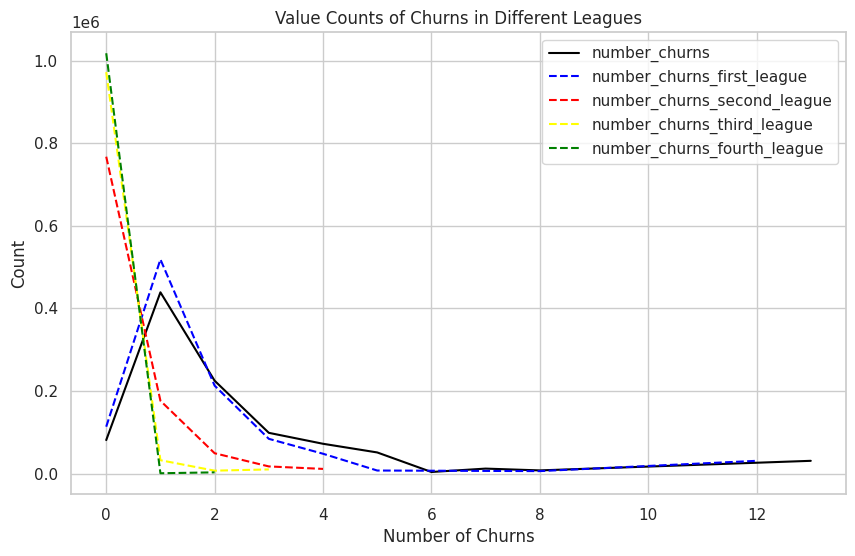

In [51]:
import matplotlib.pyplot as plt


# Get the value counts for each column in number order
number_churns_counts = apccg_w_number_seasons_churned_df['number_churns'].value_counts().sort_index()
number_churns_first_league_counts = apccg_w_number_seasons_churned_df['number_churns_first_league'].value_counts().sort_index()
number_churns_second_league_counts = apccg_w_number_seasons_churned_df['number_churns_second_league'].value_counts().sort_index()
number_churns_third_league_counts = apccg_w_number_seasons_churned_df['number_churns_third_league'].value_counts().sort_index()
number_churns_fourth_league_counts = apccg_w_number_seasons_churned_df['number_churns_fourth_league'].value_counts().sort_index()

# Create a Matplotlib line plot for each column with different colors and dashing styles
plt.figure(figsize=(10, 6))

plt.plot(number_churns_counts.index, number_churns_counts, label='number_churns', color='black', linestyle='-')
plt.plot(number_churns_first_league_counts.index, number_churns_first_league_counts, label='number_churns_first_league', color='blue', linestyle='--')
plt.plot(number_churns_second_league_counts.index, number_churns_second_league_counts, label='number_churns_second_league', color='red', linestyle='--')
plt.plot(number_churns_third_league_counts.index, number_churns_third_league_counts, label='number_churns_third_league', color='yellow', linestyle='--')
plt.plot(number_churns_fourth_league_counts.index, number_churns_fourth_league_counts, label='number_churns_fourth_league', color='green', linestyle='--')

# Add labels and legend
plt.xlabel('Number of Churns')
plt.ylabel('Count')
plt.title('Value Counts of Churns in Different Leagues')
plt.legend()

# Set the y-axis to a linear scale
plt.yscale('linear')

#Save
plt.savefig('churn_counts_per_ordinal_league_plot.png', bbox_inches='tight')

# Show the plot
plt.show()



Interpretation: There is a clear difference between the first league (which has the most common number of churns as 1) and the second, third and forth leagues who all have 0 churns as the most common churn number. It might have been expected that as players jump league, they develop more churning, but this disproves that.

In [53]:
by_player_by_season_df.columns


Index(['seasons_within_this_league',
       'list_of_seasons_included_in_from_this_league',
       'churned_seasons_from_this_league', 'churn_count_from_this_league',
       'churn_period_per_churned_season_for_this_league',
       'days_since_joined_this_league', 'churn_days_this_league',
       'ratio_churned_to_included_this_league', 'division_player_id',
       'division_id', 'player_id', 'List of seasons included in',
       'division_name', 'season_id', 'league_id',
       'List of all leagues played in', 'season_start_date', 'season_end_date',
       'Set of opponents', 'seasons_churned',
       'dictionary_of_seasons_churned_per_league',
       'number_of_sent_challenges_to_opponent', 'number_of_games_this_season',
       'number_of_sent_email_this_season_to_an_opponent',
       'number_emails_received_from_opponent',
       'number_received_challenges_from_opponent',
       'number_received_challenges_resulting_in_game',
       'number_received_emails_resulting_in_game',
     

In [54]:
#Create function to transfer feature 52: Transfer two features from by_player_by_season_df to apcc_df
#Both features are releveant more to player than the season so belong in the main apccg_df.
#Features: 'number_of_seasons', number_of_payments
import pandas as pd

def transfer_feature_from_bpbs_to_apccg(apccg_df, by_player_by_season_df):
    # Initialize the new columns
    apccg_df['number_of_seasons'] = 0
    apccg_df['number_of_payments'] = 0

    # Order both dataframes by unique player_id
    apccg_df = apccg_df.sort_values(by='player_id')
    by_player_by_season_df = by_player_by_season_df.sort_values(by='player_id')

    # Iterate through each unique player_id in apccg_df
    unique_player_ids = apccg_df['player_id'].unique()
    for player_id in unique_player_ids:
        # Get the corresponding number_of_seasons and number_of_payments from by_player_by_season_df
        if player_id in by_player_by_season_df['player_id'].values:
            player_data = by_player_by_season_df[by_player_by_season_df['player_id'] == player_id]
            seasons = player_data['number_of_seasons'].iloc[0]
            payments = player_data['number_of_payments'].iloc[0]
            # Populate the new columns in apccg_df
            apccg_df.loc[apccg_df['player_id'] == player_id, 'number_of_seasons'] = seasons
            apccg_df.loc[apccg_df['player_id'] == player_id, 'number_of_payments'] = payments

    return apccg_df

# Usage
apccg_w_transfered_feature_df = transfer_feature_from_bpbs_to_apccg(apccg_df, by_player_by_season_df)
apccg_w_transfered_feature_df

game_id  season_id  division_id  winner_id score  Played_a_game  \
146626      0.0        NaN          NaN        NaN   NaN            NaN   
826266      0.0        NaN          NaN        NaN   NaN            NaN   
826265      0.0        NaN          NaN        NaN   NaN            NaN   
826904      0.0        NaN          NaN        NaN   NaN            NaN   
95573       0.0        NaN          NaN        NaN   NaN            NaN   
...         ...        ...          ...        ...   ...            ...   
918207      0.0        NaN          NaN        NaN   NaN            NaN   
918213      0.0        NaN          NaN        NaN   NaN            NaN   
918211      0.0        NaN          NaN        NaN   NaN            NaN   
918212      0.0        NaN          NaN        NaN   NaN            NaN   
918214      0.0        NaN          NaN        NaN   NaN            NaN   

        Received_inputted_game  Inputted_game_result  game_player_id  \
146626                     NaN                   NaN             0.0   
826266                     NaN                   NaN             0.0   
826265                     NaN                   NaN             0.0   
826904                     NaN                   NaN             0.0   
95573                      NaN                   NaN             0.0   
...                        ...                   ...             ...   
918207                     NaN                   NaN             0.0   
918213                     NaN                   NaN             0.0   
918211                     NaN                   NaN             0.0   
918212                     NaN                   NaN             0.0   
918214                     NaN                   NaN             0.0   

        challenge_id  ...  played_in_two_leagues  played_in_three_leagues  \
146626           0.0  ...                      1                        0   
826266           0.0  ...                      1                        0   
826265           0.0  ...                      1                        0   
826904           0.0  ...                      1                        0   
95573            0.0  ...                      1                        0   
...              ...  ...                    ...                      ...   
918207           0.0  ...                      0                        0   
918213           0.0  ...                      0                        0   
918211           0.0  ...                      0                        0   
918212           0.0  ...                      0                        0   
918214           0.0  ...                      0                        0   

        played_in_four_leagues  number_churns number_churns_first_league  \
146626                       0              4                          2   
826266                       0              4                          2   
826265                       0              4                          2   
826904                       0              4                          2   
95573                        0              4                          2   
...                        ...            ...                        ...   
918207                       0              0                          0   
918213                       0              0                          0   
918211                       0              0                          0   
918212                       0              0                          0   
918214                       0              0                          0   

        number_churns_second_league number_churns_third_league  \
146626                            2                          0   
826266                            2                          0   
826265                            2                          0   
826904                            2                          0   
95573                             2                          0   
...     

In [55]:
apccg_w_transfered_feature_df.to_csv('apccg_w_transfered_feature_df.csv', index=False)
apccg_df = apccg_w_transfered_feature_df

In [105]:
apccg_df.columns


NameError: ignored

In [64]:
by_player_by_season_df.columns

Index(['seasons_within_this_league',
       'list_of_seasons_included_in_from_this_league',
       'churned_seasons_from_this_league', 'churn_count_from_this_league',
       'churn_period_per_churned_season_for_this_league',
       'days_since_joined_this_league', 'churn_days_this_league',
       'ratio_churned_to_included_this_league', 'division_player_id',
       'division_id', 'player_id', 'List of seasons included in',
       'division_name', 'season_id', 'league_id',
       'List of all leagues played in', 'season_start_date', 'season_end_date',
       'Set of opponents', 'seasons_churned',
       'dictionary_of_seasons_churned_per_league',
       'number_of_sent_challenges_to_opponent', 'number_of_games_this_season',
       'number_of_sent_email_this_season_to_an_opponent',
       'number_emails_received_from_opponent',
       'number_received_challenges_from_opponent',
       'number_received_challenges_resulting_in_game',
       'number_received_emails_resulting_in_game',
     

In [104]:
#Code to encode dummy variables for the 'activity_log_log_msg' feature
apccg_df = pd.get_dummies(apccg_df, columns=['activity_log_log_msg'], prefix='log_msg')
apccg_df

KeyError: ignored

In [103]:
# log_msg_LM_created_counts = apccg_df['log_msg_LM_created'].value_counts()
# print(log_msg_LM_created_counts)
print(apccg_df.columns)


Index(['game_id', 'season_id', 'division_id', 'winner_id', 'score',
       'Played_a_game', 'Received_inputted_game', 'Inputted_game_result',
       'game_player_id', 'challenge_id', 'challenger_id', 'challengee_id',
       'challenge_status', 'challenge_type', 'date', 'player_id', 'date_user',
       'datetime_user', 'comm_id', 'comm_thread', 'comm_send', 'comm_read',
       'Involved_in_Comms', 'Received_comms', 'activity_log_log_id',
       'payments_log_negativespace_payment_id',
       'payments_log_negativespace_payment_seasons', 'datetime',
       'player_paid_for_at_least_one_season', 'closeness_of_score',
       'ever_churned', 'number_of_days_since_last_churn',
       'number_of_days_to_churn', 'this_action_leads_to_churn',
       'info_exists_game_id', 'info_exists_season_id',
       'info_exists_division_id', 'info_exists_winner_id', 'info_exists_score',
       'info_exists_Played_a_game', 'info_exists_Received_inputted_game',
       'info_exists_Inputted_game_result', 'inf

In [66]:
#Final columns to drop

# by_player_by_season_df
# List of columns to drop
columns_to_drop = [
    'seasons_within_this_league',
    'list_of_seasons_included_in_from_this_league',
    'churned_seasons_from_this_league',
    'churn_period_per_churned_season_for_this_league',
    'List of seasons included in',
    'division_name',
    'List of all leagues played in',
    'Set of opponents',
    'seasons_churned',
    'dictionary_of_seasons_churned_per_league',
    'payment_dictionary',
    'dict_activities_this_season',
    'dict_activities_this_season',
    'list_logins_this_season',
    'list_games_w_closeness',
    'player_join_date'
]

# Drop the specified columns from by_player_by_season_df
by_player_by_season_final_df = by_player_by_season_df.drop(columns=columns_to_drop)



#apccg_df
# List of columns to drop from apccg_df
apccg_columns_to_drop = [
    'winner_id',
    'score',
    'game_player_id',
    'challenger_id',
    'challengee_id',
    'challenge_status',
    'challenge_type',
    'date_user',
    'datetime_user',
    'comm_thread',
    'comm_send',
    'datetime',
    'scoring_system'
]

# Drop the specified columns from apccg_df
apccg_final_df = apccg_df.drop(columns=apccg_columns_to_drop)



Index(['game_id', 'season_id', 'division_id', 'Played_a_game',
       'Received_inputted_game', 'Inputted_game_result', 'challenge_id',
       'date', 'player_id', 'comm_id',
       ...
       'log_msg_paid', 'log_msg_payment_failure', 'log_msg_payments',
       'log_msg_rated', 'log_msg_reconnected', 'log_msg_registered',
       'log_msg_saved', 'log_msg_taking_break_updated', 'log_msg_unsubscribed',
       'log_msg_warned'],
      dtype='object', length=105)

In [67]:
by_player_by_season_final_df.columns

Index(['churn_count_from_this_league', 'days_since_joined_this_league',
       'churn_days_this_league', 'ratio_churned_to_included_this_league',
       'division_player_id', 'division_id', 'player_id', 'season_id',
       'league_id', 'season_start_date', 'season_end_date',
       'number_of_sent_challenges_to_opponent', 'number_of_games_this_season',
       'number_of_sent_email_this_season_to_an_opponent',
       'number_emails_received_from_opponent',
       'number_received_challenges_from_opponent',
       'number_received_challenges_resulting_in_game',
       'number_received_emails_resulting_in_game',
       'received_no_opponent_email_or_challenge',
       'number_sent_challenges_or_comms_to_opponent',
       'number_sent_challenges_or_comms_that_resulted_in_game',
       'entered_game_result_that_season', 'is_included_in_leagues_next_season',
       'unplaying_appeal_to_remain', 'number_of_seasons_player_has_been_in',
       'number_of_seasons_player_has_played_in_before_this

In [71]:
apccg_final_df.columns

for column in apccg_final_df.columns:
    print(column)


game_id
season_id
division_id
Played_a_game
Received_inputted_game
Inputted_game_result
challenge_id
date
player_id
comm_id
comm_read
Involved_in_Comms
Received_comms
activity_log_log_id
payments_log_negativespace_payment_id
payments_log_negativespace_payment_seasons
player_paid_for_at_least_one_season
closeness_of_score
ever_churned
number_of_days_since_last_churn
number_of_days_to_churn
this_action_leads_to_churn
info_exists_game_id
info_exists_season_id
info_exists_division_id
info_exists_winner_id
info_exists_score
info_exists_Played_a_game
info_exists_Received_inputted_game
info_exists_Inputted_game_result
info_exists_game_player_id
info_exists_challenge_id
info_exists_challenger_id
info_exists_challengee_id
info_exists_challenge_status
info_exists_challenge_type
info_exists_comm_id
info_exists_comm_thread
info_exists_comm_send
info_exists_comm_read
info_exists_Involved_in_Comms
info_exists_Received_comms
info_exists_activity_log_log_id
info_exists_activity_log_log_msg
info_exists

In [72]:
# Create concatenated dataframe (to be called combined_df)
import pandas as pd

# Concatenate apccg_df and by_player_by_season_df dataframes vertically, preserving all columns and rows

# Combine the two DataFrames
apccg_df_w_by_player_by_season_df = pd.concat([apccg_final_df, by_player_by_season_final_df], axis=0, ignore_index=True, sort=False)

# Populate the 'this_action_leads_to_churn' column with values from 'this_season_leads_to_churn'
apccg_df_w_by_player_by_season_df['this_action_leads_to_churn'] = by_player_by_season_final_df['this_season_leads_to_churn']

#Copying over date from season_end_date to date for the concatenated rows (from by_player_by_season_df)
# Filter rows with no date in the 'date' column in the apccg_df_w_by_player_by_season_df
rows_with_no_date = apccg_df_w_by_player_by_season_df[apccg_df_w_by_player_by_season_df['date'].isnull()]

# Print the number of rows with no date
print(f'Number of rows with no date: {len(rows_with_no_date)}')

# Copy 'season_end_date' values to 'date' column for rows with no date
apccg_df_w_by_player_by_season_df.loc[rows_with_no_date.index, 'date'] = rows_with_no_date['season_end_date']

rows_with_no_date = apccg_df_w_by_player_by_season_df[apccg_df_w_by_player_by_season_df['date'].isnull()]

# Print the number of rows with no date
print(f'Number of rows with no date: {len(rows_with_no_date)}')

## Investigate concatenated dataframe (apccg_df_w_by_player_by_season_df aka combined_df)
combined_df = apccg_df_w_by_player_by_season_df

# Verify the result
print(combined_df)



Number of rows with no date: 15578
Number of rows with no date: 0
         game_id  season_id  division_id  Played_a_game  \
0            0.0        NaN          NaN            NaN   
1            0.0        NaN          NaN            NaN   
2            0.0        NaN          NaN            NaN   
3            0.0        NaN          NaN            NaN   
4            0.0        NaN          NaN            NaN   
...          ...        ...          ...            ...   
1037176      NaN     2427.0       4203.0            NaN   
1037177      NaN     2424.0       4180.0            NaN   
1037178      NaN     2428.0       4204.0            NaN   
1037179      NaN     2428.0       4205.0            NaN   
1037180      NaN     2430.0       4209.0            NaN   

         Received_inputted_game  Inputted_game_result  challenge_id  \
0                           NaN                   NaN           0.0   
1                           NaN                   NaN           0.0   
2           

Interpretation: The concatenated dtataframes represent the combined set of actions (from the apccg_df) with the player_season data (from the by_player_by_season_df) added in (each row repsents a season-long actionof playing in a season). The date for this season-long action was taken as the end date for this season. The value from the this_season_leads_to_churn was taken as the value in the combined_df this_action_leads_to_churn column (this is the y value).

In [75]:
combined_df.columns

for column in combined_df.columns:
    print(column)

game_id
season_id
division_id
Played_a_game
Received_inputted_game
Inputted_game_result
challenge_id
date
player_id
comm_id
comm_read
Involved_in_Comms
Received_comms
activity_log_log_id
payments_log_negativespace_payment_id
payments_log_negativespace_payment_seasons
player_paid_for_at_least_one_season
closeness_of_score
ever_churned
number_of_days_since_last_churn
number_of_days_to_churn
this_action_leads_to_churn
info_exists_game_id
info_exists_season_id
info_exists_division_id
info_exists_winner_id
info_exists_score
info_exists_Played_a_game
info_exists_Received_inputted_game
info_exists_Inputted_game_result
info_exists_game_player_id
info_exists_challenge_id
info_exists_challenger_id
info_exists_challengee_id
info_exists_challenge_status
info_exists_challenge_type
info_exists_comm_id
info_exists_comm_thread
info_exists_comm_send
info_exists_comm_read
info_exists_Involved_in_Comms
info_exists_Received_comms
info_exists_activity_log_log_id
info_exists_activity_log_log_msg
info_exists

In [77]:
#Export
# combined_df.to_csv('combined_df.csv', index=False)
apccg_df.to_csv('apccg_df.csv', index=False)
# by_player_by_season_df.to_csv('by_player_by_season_df.csv', index=False)

In [1]:
#Reimport 15/10 files from google drive
#Get latest by_player_by_season_df (by_player_by_season_w_join_date.csv)
! gdown 1QvMJZdLTXkB8IbSNV4h48iZeJL1fxJUt
#Get latest apccg_df (apccg_w_transfered_feature_df.csv)
! gdown 1NCLCS0Rsa1D3rh5FDQXgi6jJ0HxE8PWZ
#Get latest combined_df
! gdown 10VBDTCmXEZKRjQkDF6O5Hj2m-DbtSHRs

Downloading...
From: https://drive.google.com/uc?id=1QvMJZdLTXkB8IbSNV4h48iZeJL1fxJUt
To: /content/by_player_by_season_w_join_date.csv
100% 63.2M/63.2M [00:00<00:00, 231MB/s]
Downloading...
From: https://drive.google.com/uc?id=1NCLCS0Rsa1D3rh5FDQXgi6jJ0HxE8PWZ
To: /content/apccg_w_transfered_feature_df.csv
100% 245M/245M [00:01<00:00, 169MB/s]
Downloading...
From: https://drive.google.com/uc?id=10VBDTCmXEZKRjQkDF6O5Hj2m-DbtSHRs
To: /content/combined_df.csv
100% 452M/452M [00:03<00:00, 146MB/s]


In [132]:
#Reimport 15/10 and 16/10 by_player_by_season_df (by_player_by_season_w_join_date.csv)
#and apccg_df (apccg_w_transfered_feature_df.csv)
#and combined_df
#
#import some useful libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab as pl

# A custom function to convert a string of seasons to a list of integers
def str_to_int_list(s):
    if s.strip():
        return [int(x) for x in s.split(',')]
    else:
        return []

#import by_player_by_season_df
by_player_by_season_df = pd.read_csv("/content/by_player_by_season_w_join_date.csv")

#Reset date columns as datetime datatypes in by_player_by_season_df
by_player_by_season_df['season_start_date'] = pd.to_datetime(by_player_by_season_df['season_start_date'])
by_player_by_season_df['season_end_date'] = pd.to_datetime(by_player_by_season_df['season_end_date'])


by_player_by_season_df = by_player_by_season_df.rename(columns={
    'days_since_joined_second': 'days_since_joined_second_league',
    'days_since_joined_third': 'days_since_joined_third_league',
    'days_since_joined_fourth': 'days_since_joined_fourth_league'
})

by_player_by_season_df.info()



#Reimport
apccg_df = pd.read_csv("/content/apccg_w_transfered_feature_df.csv")

#Reset date columns as datetime datatypes in apccg_df
apccg_df['date'] = pd.to_datetime(apccg_df['date'])

apccg_df.info()

#Reimport
combined_df = pd.read_csv("/content/combined_df.csv")

#Reset date columns as datetime datatypes in apccg_df
combined_df['date'] = pd.to_datetime(combined_df['date'])
combined_df['season_start_date'] = pd.to_datetime(combined_df['season_start_date'])
combined_df['season_end_date'] = pd.to_datetime(combined_df['season_end_date'])

combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15578 entries, 0 to 15577
Data columns (total 51 columns):
 #   Column                                                 Non-Null Count  Dtype         
---  ------                                                 --------------  -----         
 0   seasons_within_this_league                             15578 non-null  object        
 1   list_of_seasons_included_in_from_this_league           15578 non-null  object        
 2   churned_seasons_from_this_league                       15578 non-null  object        
 3   churn_count_from_this_league                           15578 non-null  float64       
 4   churn_period_per_churned_season_for_this_league        15578 non-null  object        
 5   days_since_joined_this_league                          15578 non-null  float64       
 6   churn_days_this_league                                 15578 non-null  float64       
 7   ratio_churned_to_included_this_league                  15448 non-nu

<ipython-input-132-fefd8254ab9e>:45: DtypeWarning: Columns (111,112) have mixed types. Specify dtype option on import or set low_memory=False.
  combined_df = pd.read_csv("/content/combined_df.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037181 entries, 0 to 1037180
Columns: 134 entries, game_id to churn
dtypes: datetime64[ns](3), float64(129), int64(2)
memory usage: 1.0 GB


In [109]:
combined_df.columns

Index(['game_id', 'season_id', 'division_id', 'Played_a_game',
       'Received_inputted_game', 'Inputted_game_result', 'challenge_id',
       'date', 'player_id', 'comm_id',
       ...
       'is_included_in_leagues_next_season', 'unplaying_appeal_to_remain',
       'number_of_seasons_player_has_been_in',
       'number_of_seasons_player_has_played_in_before_this',
       'fraction_games_w_max_closeness', 'dict_activities_length',
       'no_of_logins_this_season',
       'closeness_score_total_for_games_this_season',
       'this_season_leads_to_churn', 'churn'],
      dtype='object', length=134)

In [8]:
combined_df

game_id  season_id  division_id  Played_a_game  \
0            0.0        NaN          NaN            NaN   
1            0.0        NaN          NaN            NaN   
2            0.0        NaN          NaN            NaN   
3            0.0        NaN          NaN            NaN   
4            0.0        NaN          NaN            NaN   
...          ...        ...          ...            ...   
1037176      NaN     2427.0       4203.0            NaN   
1037177      NaN     2424.0       4180.0            NaN   
1037178      NaN     2428.0       4204.0            NaN   
1037179      NaN     2428.0       4205.0            NaN   
1037180      NaN     2430.0       4209.0            NaN   

         Received_inputted_game  Inputted_game_result  challenge_id  \
0                           NaN                   NaN           0.0   
1                           NaN                   NaN           0.0   
2                           NaN                   NaN           0.0   
3                           NaN                   NaN           0.0   
4                           NaN                   NaN           0.0   
...                         ...                   ...           ...   
1037176                     NaN                   NaN           NaN   
1037177                     NaN                   NaN           NaN   
1037178                     NaN                   NaN           NaN   
1037179                     NaN                   NaN           NaN   
1037180                     NaN                   NaN           NaN   

              date  player_id   comm_id  ...  \
0       2014-04-01        1.0   72806.0  ...   
1       2021-11-23        1.0  202074.0  ...   
2       2021-11-23        1.0  202036.0  ...   
3       2021-11-26        1.0  202167.0  ...   
4       2013-04-04        1.0   50147.0  ...   
...            ...        ...       ...  ...   
1037176 2023-02-23    16043.0       NaN  ...   
1037177 2023-02-22    16044.0       NaN  ...   
1037178 2023-02-24    16047.0       NaN  ...   
1037179 2023-02-24    16051.0       NaN  ...   
1037180 2023-03-26    16083.0       NaN  ...   

         is_included_in_leagues_next_season  unplaying_appeal_to_remain  \
0                                       NaN                         NaN   
1                                       NaN                         NaN   
2                                       NaN                         NaN   
3                                       NaN                         NaN   
4                                       NaN                         NaN   
...                                     ...                         ...   
1037176                                 0.0                         0.0   
1037177                                 0.0                         0.0   
1037178                                 0.0                         0.0   
1037179                                 0.0                         0.0   
1037180                                 0.0                         0.0   

         number_of_seasons_player_has_been_in  \
0                                         NaN   
1                                         NaN   
2                                         NaN   
3                                         NaN   
4                                         NaN   
...                                       ...   
1037176                                   0.0   
1037177                                   0.0   
1037178                                   0.0   
1037179                                   0.0   
1037180                                   0.0   

         number_of_seasons_player_has_played_in_before_this  \
0                                                      NaN    
1                                                      NaN    
2                                                      NaN    
3                                                      NaN    
4                                                      NaN    
..

In [112]:
combined_df_columns = combined_df.columns.tolist()
# print(combined_df_columns)

column_names = combined_df.columns
for column_name in column_names:
    print(column_name)

game_id
season_id
division_id
Played_a_game
Received_inputted_game
Inputted_game_result
challenge_id
date
player_id
comm_id
comm_read
Involved_in_Comms
Received_comms
activity_log_log_id
payments_log_negativespace_payment_id
payments_log_negativespace_payment_seasons
player_paid_for_at_least_one_season
closeness_of_score
ever_churned
number_of_days_since_last_churn
number_of_days_to_churn
this_action_leads_to_churn
info_exists_game_id
info_exists_season_id
info_exists_division_id
info_exists_winner_id
info_exists_score
info_exists_Played_a_game
info_exists_Received_inputted_game
info_exists_Inputted_game_result
info_exists_game_player_id
info_exists_challenge_id
info_exists_challenger_id
info_exists_challengee_id
info_exists_challenge_status
info_exists_challenge_type
info_exists_comm_id
info_exists_comm_thread
info_exists_comm_send
info_exists_comm_read
info_exists_Involved_in_Comms
info_exists_Received_comms
info_exists_activity_log_log_id
info_exists_activity_log_log_msg
info_exists

In [114]:
column_names = apccg_df.columns
for column_name in column_names:
    print(column_name)

game_id
season_id
division_id
winner_id
score
Played_a_game
Received_inputted_game
Inputted_game_result
game_player_id
challenge_id
challenger_id
challengee_id
challenge_status
challenge_type
date
player_id
date_user
datetime_user
comm_id
comm_thread
comm_send
comm_read
Involved_in_Comms
Received_comms
activity_log_log_id
activity_log_log_msg
payments_log_negativespace_payment_id
payments_log_negativespace_payment_seasons
datetime
player_paid_for_at_least_one_season
scoring_system
closeness_of_score
ever_churned
number_of_days_since_last_churn
number_of_days_to_churn
this_action_leads_to_churn
info_exists_game_id
info_exists_season_id
info_exists_division_id
info_exists_winner_id
info_exists_score
info_exists_Played_a_game
info_exists_Received_inputted_game
info_exists_Inputted_game_result
info_exists_game_player_id
info_exists_challenge_id
info_exists_challenger_id
info_exists_challengee_id
info_exists_challenge_status
info_exists_challenge_type
info_exists_comm_id
info_exists_comm_th

In [133]:
#Ecode categorical features and drop columns to get final dataframe

#Final columns to drop

# by_player_by_season_df
# List of columns to drop
columns_to_drop = [
    'seasons_within_this_league',
    'list_of_seasons_included_in_from_this_league',
    'churned_seasons_from_this_league',
    'churn_period_per_churned_season_for_this_league',
    'List of seasons included in',
    'division_name',
    'List of all leagues played in',
    'Set of opponents',
    'seasons_churned',
    'dictionary_of_seasons_churned_per_league',
    'payment_dictionary',
    'dict_activities_this_season',
    'dict_activities_this_season',
    'list_logins_this_season',
    'list_games_w_closeness',
    'player_join_date'
]

# Drop the specified columns from by_player_by_season_df
by_player_by_season_final_df = by_player_by_season_df.drop(columns=columns_to_drop)



#apccg_df
# List of columns to drop from apccg_df
apccg_columns_to_drop = [
    'winner_id',
    'score',
    'game_player_id',
    'challenger_id',
    'challengee_id',
    'challenge_status',
    'challenge_type',
    'date_user',
    'datetime_user',
    'comm_thread',
    'comm_send',
    'datetime',
    'season_id',
    'division_id',
    'score',
    'datetime_user',
    'datetime'
]

# Drop the specified columns from apccg_df
apccg_final_df = apccg_df.drop(columns=apccg_columns_to_drop)


#Code to encode dummy variables for the 'activity_log_log_msg' feature
apccg_final_df = pd.get_dummies(apccg_final_df, columns=['activity_log_log_msg'], prefix='log_msg')
apccg_final_df = pd.get_dummies(apccg_final_df, columns=['scoring_system'], prefix=['scoring_system'])

# apccg_final_df = apccg_final_df.drop(['activity_log_log_msg'], axis=1)
# apccg_final_df = apccg_final_df.drop(['scoring_system'], axis=1)

column_names = apccg_final_df.columns
for column_name in column_names:
    print(column_name)


game_id
Played_a_game
Received_inputted_game
Inputted_game_result
challenge_id
date
player_id
comm_id
comm_read
Involved_in_Comms
Received_comms
activity_log_log_id
payments_log_negativespace_payment_id
payments_log_negativespace_payment_seasons
player_paid_for_at_least_one_season
closeness_of_score
ever_churned
number_of_days_since_last_churn
number_of_days_to_churn
this_action_leads_to_churn
info_exists_game_id
info_exists_season_id
info_exists_division_id
info_exists_winner_id
info_exists_score
info_exists_Played_a_game
info_exists_Received_inputted_game
info_exists_Inputted_game_result
info_exists_game_player_id
info_exists_challenge_id
info_exists_challenger_id
info_exists_challengee_id
info_exists_challenge_status
info_exists_challenge_type
info_exists_comm_id
info_exists_comm_thread
info_exists_comm_send
info_exists_comm_read
info_exists_Involved_in_Comms
info_exists_Received_comms
info_exists_activity_log_log_id
info_exists_activity_log_log_msg
info_exists_payments_log_negative

In [116]:
#Export
apccg_final_df.to_csv('apccg_final_df.csv', index=False)
by_player_by_season_final_df.to_csv('by_player_by_season_final_df.csv', index=False)

#Check
# by_player_by_season_final_df.columns
# apccg_final_df.columns

In [134]:
#Check all the unique values for all the columns having less than 100 unique values

for col in apccg_final_df.columns:
    if apccg_final_df[col].nunique()<100:
        print(col, sorted(apccg_final_df[col].unique()), '\n')

Played_a_game [nan, 1.0] 

Received_inputted_game [nan, 1.0] 

Inputted_game_result [nan, 1.0] 

comm_read [1.0, nan, 0.0] 

Involved_in_Comms [1.0, nan] 

Received_comms [1.0, nan] 

payments_log_negativespace_payment_seasons [nan, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 15.0, 20.0, 21.0, 24.0, 40.0, 50.0, 100.0] 

player_paid_for_at_least_one_season [0.0, 1.0] 

closeness_of_score [nan, 0.0, 1.0, 2.0] 

ever_churned [0, 1] 

this_action_leads_to_churn [0, 1] 

info_exists_game_id [0, 1] 

info_exists_season_id [0, 1] 

info_exists_division_id [0, 1] 

info_exists_winner_id [0, 1] 

info_exists_score [0, 1] 

info_exists_Played_a_game [0, 1] 

info_exists_Received_inputted_game [0, 1] 

info_exists_Inputted_game_result [0, 1] 

info_exists_game_player_id [0, 1] 

info_exists_challenge_id [0, 1] 

info_exists_challenger_id [0, 1] 

info_exists_challengee_id [0, 1] 

info_exists_challenge_status [0, 1] 

info_exists_challenge_type [0, 1] 

info_exists_comm_id [0, 1] 

i

Some columns still have nans in:  closeness_of_score, payments_log_negativespace_payment_seasons, Played_a_game,
Received_inputted_game,
Inputted_game_result,
comm_read,
Involved_in_Comms,
Received_comms.

In [135]:
#Impute with median to replace Nan values with 0
from sklearn.impute import SimpleImputer

# Define the columns with missing values
numerical_columns_with_missing = [
    'closeness_of_score',
    'payments_log_negativespace_payment_seasons',
    'Played_a_game',
    'Received_inputted_game',
    'Inputted_game_result',
    'comm_read',
    'Involved_in_Comms',
    'Received_comms'
]
# Use SimpleImputer to replace missing values with 0
imputer = SimpleImputer(strategy='constant', fill_value=0)
apccg_final_df[numerical_columns_with_missing] = imputer.fit_transform(apccg_final_df[numerical_columns_with_missing])

In [136]:
#Check imputation worked
#Check all the unique values for all the columns having less than 100 unique values

for col in apccg_final_df.columns:
    if apccg_final_df[col].nunique()<100:
        print(col, sorted(apccg_final_df[col].unique()), '\n')

Played_a_game [0.0, 1.0] 

Received_inputted_game [0.0, 1.0] 

Inputted_game_result [0.0, 1.0] 

comm_read [0.0, 1.0] 

Involved_in_Comms [0.0, 1.0] 

Received_comms [0.0, 1.0] 

payments_log_negativespace_payment_seasons [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 15.0, 20.0, 21.0, 24.0, 40.0, 50.0, 100.0] 

player_paid_for_at_least_one_season [0.0, 1.0] 

closeness_of_score [0.0, 1.0, 2.0] 

ever_churned [0, 1] 

this_action_leads_to_churn [0, 1] 

info_exists_game_id [0, 1] 

info_exists_season_id [0, 1] 

info_exists_division_id [0, 1] 

info_exists_winner_id [0, 1] 

info_exists_score [0, 1] 

info_exists_Played_a_game [0, 1] 

info_exists_Received_inputted_game [0, 1] 

info_exists_Inputted_game_result [0, 1] 

info_exists_game_player_id [0, 1] 

info_exists_challenge_id [0, 1] 

info_exists_challenger_id [0, 1] 

info_exists_challengee_id [0, 1] 

info_exists_challenge_status [0, 1] 

info_exists_challenge_type [0, 1] 

info_exists_comm_id [0, 1] 

info_exists

In [127]:
#Check all the unique values for all the columns having less than 100 unique values

for col in by_player_by_season_final_df.columns:
    if by_player_by_season_final_df[col].nunique()<100:
        print(col, sorted(by_player_by_season_final_df[col].unique()), '\n')

churn_count_from_this_league [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 8.0, 12.0] 

days_since_joined_this_league [-1196.0, -935.0, -906.0, 73.0, 472.0, 596.0, 660.0, 851.0, 1344.0, 1401.0, 1449.0, 1572.0, 1614.0, 1795.0, 1868.0, 2087.0, 2143.0, 2283.0, 2302.0, 2391.0, 2436.0, 2493.0, 2542.0, 2654.0, 2742.0, 2758.0, 2818.0, 3214.0] 

league_id [1.0, 4.0, 7.0, 8.0, 10.0, 12.0, 13.0, 14.0, 16.0, 17.0, 19.0, 20.0, 1002.0, 2002.0, 2006.0, 2007.0, 2008.0, 2011.0, 2016.0, 2017.0, 2019.0, 2026.0, 2029.0, 2031.0, 2035.0, 2041.0, 2043.0, 2045.0] 

number_of_sent_challenges_to_opponent [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 21.0, 22.0, 23.0, 25.0, 26.0, 27.0, 30.0, 34.0] 

number_of_games_this_season [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0] 

number_received_challenges_from_opponent [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0] 

number_received_challenges_resulting_in_game [0.0, 1.0,

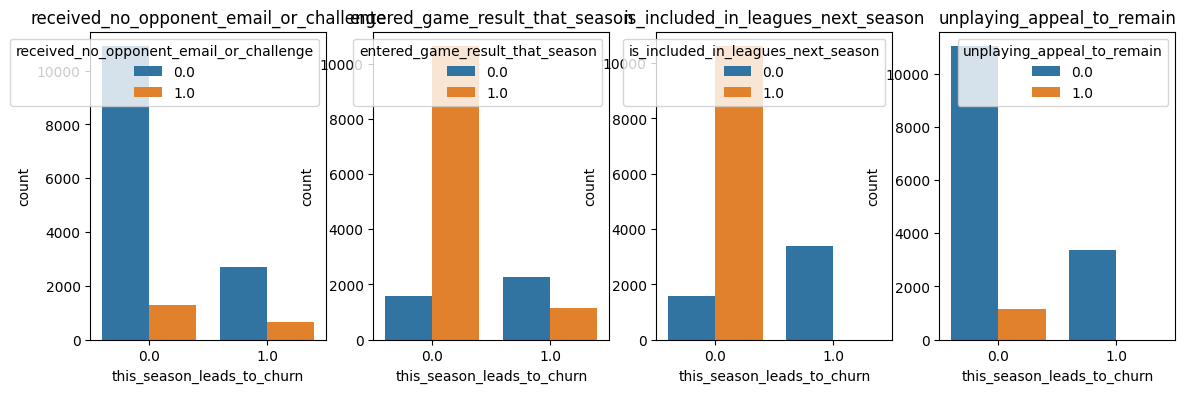

In [117]:
#Analyze relationship between categorical features and this_season_leads_to_churn in by_player_by_season_final_df
import seaborn as sns

cols = ['received_no_opponent_email_or_challenge',"entered_game_result_that_season","is_included_in_leagues_next_season","unplaying_appeal_to_remain"]

plt.figure(figsize=(14,4))

for i, col in enumerate(cols):
    ax = plt.subplot(1, len(cols), i+1)
    sns.countplot(x ="this_season_leads_to_churn", hue = str(col), data = by_player_by_season_final_df)
    ax.set_title(f"{col}")

Interpretation: It is clear that players who had entered_game_result_that_season=0 (i.e. did not enter a result) were far more likely to have this_season_leads_to_churn=1 than other players. It is clear that for players with received_no_opponent_email_or_challenge=0 (meaning they actually did receive an email or challenge), they were far more likely to have this_season_leads_to_churn=0.



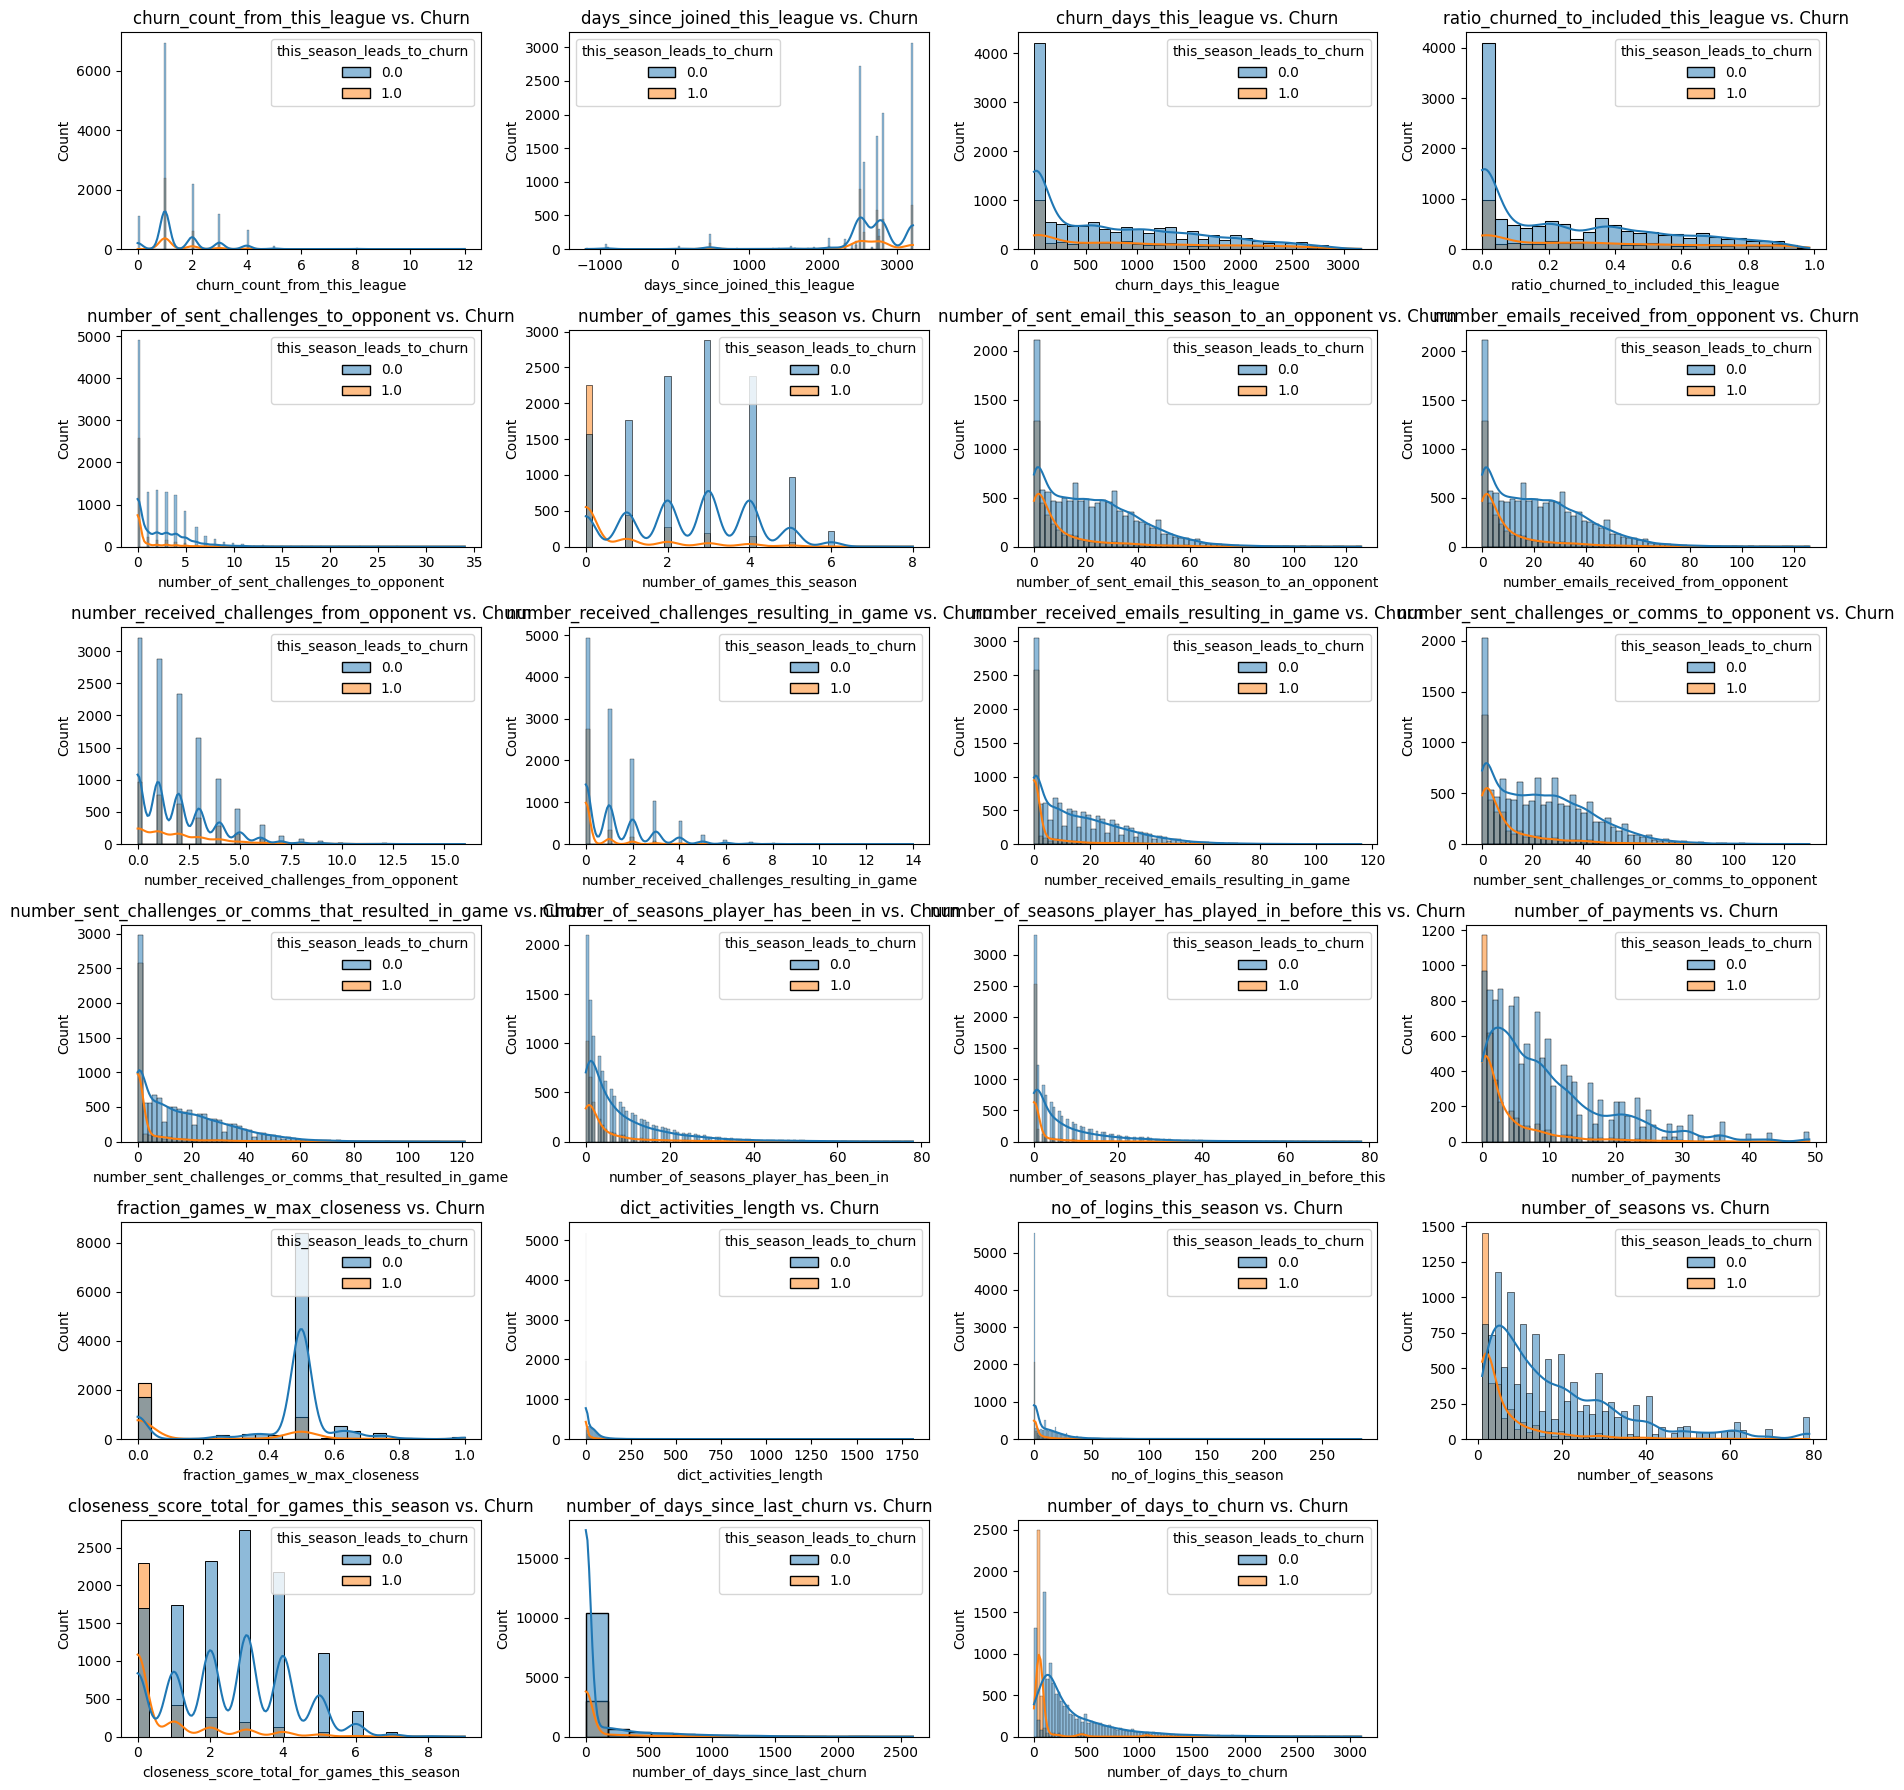

In [122]:
#Analyze relationship between numerical variables and y target variable(this_season_leads_to_churn)
import seaborn as sns
import matplotlib.pyplot as plt
import math

# List of numerical columns
numerical_columns = [
    'churn_count_from_this_league',
    'days_since_joined_this_league',
    'churn_days_this_league',
    'ratio_churned_to_included_this_league',
    'number_of_sent_challenges_to_opponent',
    'number_of_games_this_season',
    'number_of_sent_email_this_season_to_an_opponent',
    'number_emails_received_from_opponent',
    'number_received_challenges_from_opponent',
    'number_received_challenges_resulting_in_game',
    'number_received_emails_resulting_in_game',
    'number_sent_challenges_or_comms_to_opponent',
    'number_sent_challenges_or_comms_that_resulted_in_game',
    'number_of_seasons_player_has_been_in',
    'number_of_seasons_player_has_played_in_before_this',
    'number_of_payments',
    'fraction_games_w_max_closeness',
    'dict_activities_length',
    'no_of_logins_this_season',
    'number_of_seasons',
    'closeness_score_total_for_games_this_season',
    'number_of_days_since_last_churn',
    'number_of_days_to_churn'
]



# Calculate the number of rows needed based on the number of numerical columns and the maximum of 4 columns per row
num_columns_per_row = 4
num_rows = math.ceil(len(numerical_columns) / num_columns_per_row)

# Create a grid of subplots for histograms with a maximum of 4 columns
fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns_per_row, figsize=(18, 3 * num_rows))

# Iterate through numerical columns and create histograms
for i, col in enumerate(numerical_columns):
    row = i // num_columns_per_row
    col_index = i % num_columns_per_row
    ax = axes[row, col_index]
    sns.histplot(data=by_player_by_season_final_df, x=col, hue="this_season_leads_to_churn", kde=True, ax=ax)
    ax.set_title(f"{col} vs. Churn")

# Remove empty subplots
for i in range(len(numerical_columns), num_rows * num_columns_per_row):
    fig.delaxes(axes[i // num_columns_per_row, i % num_columns_per_row])

plt.tight_layout()
plt.show()



Interpretation: No clear patterns emerge from this. As expected the metrics showing some form of engagement (e.g. had a close score (closeness_score_total_for_games_this_season) or number_sent_challenges_or_comms_that_resulted_in_game) showed less likelihhood of this_season_leads_to_churn=1.

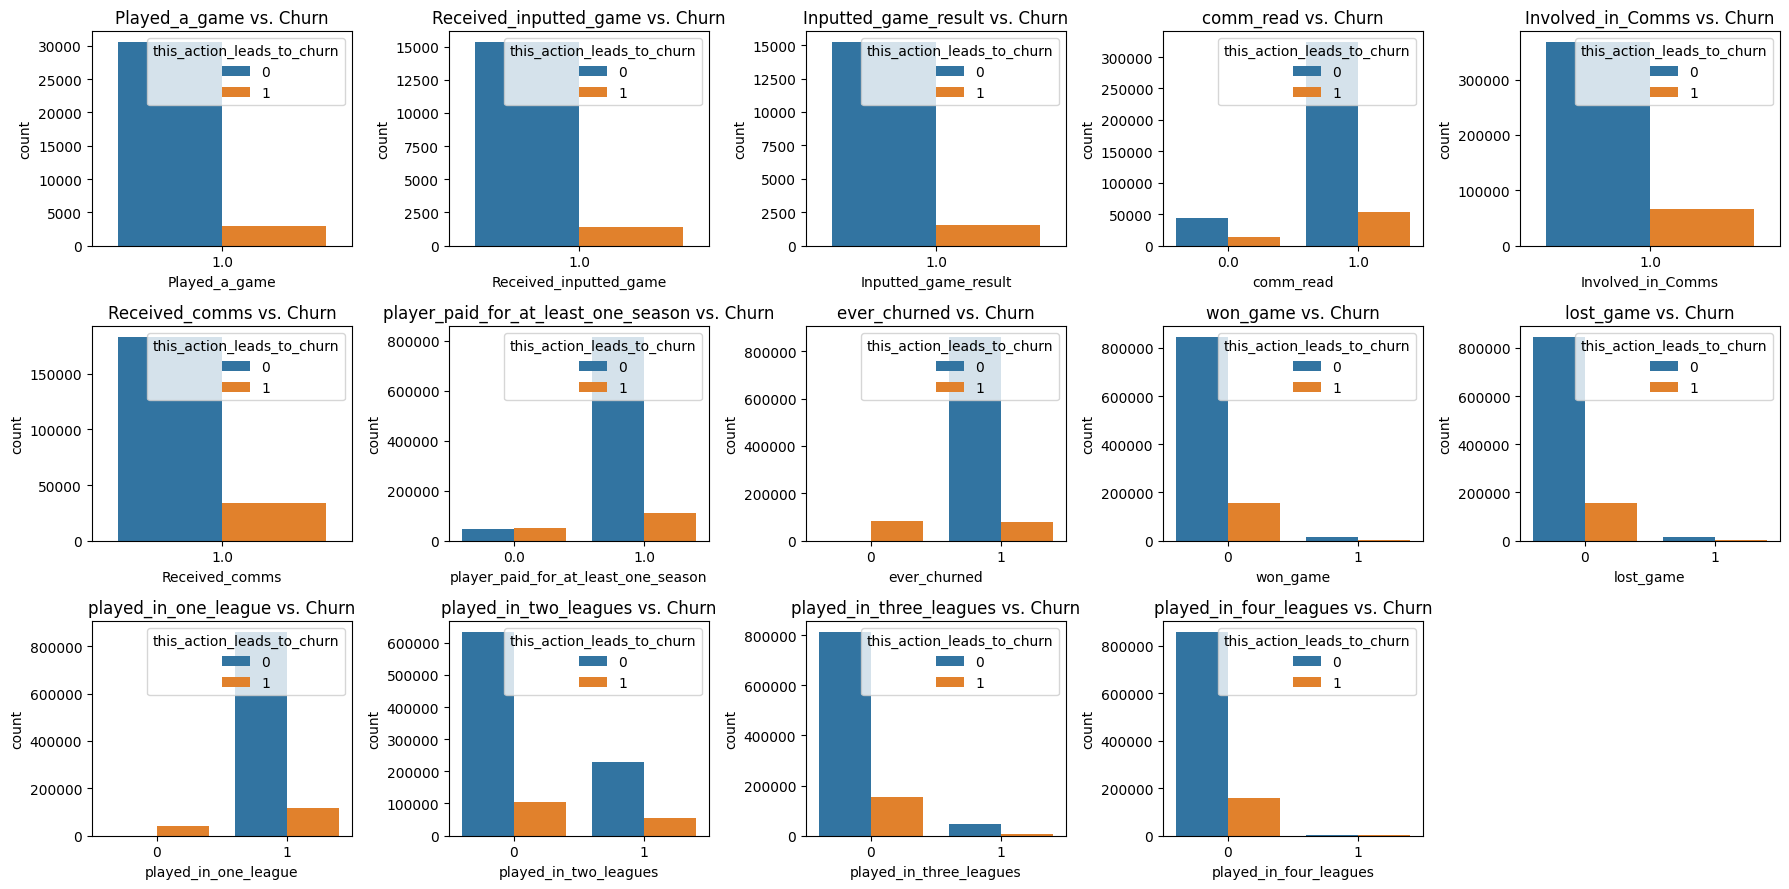

In [78]:
#Analyze relationship between categorical features and this_action_leads_to_churn in apccg_final_df
import seaborn as sns
import matplotlib.pyplot as plt

# List of categorical columns
categorical_cols = [
    'Played_a_game',
    'Received_inputted_game',
    'Inputted_game_result',
    'comm_read',
    'Involved_in_Comms',
    'Received_comms',
    'player_paid_for_at_least_one_season',
    'ever_churned',
    'won_game',
    'lost_game',
    'played_in_one_league',
    'played_in_two_leagues',
    'played_in_three_leagues',
    'played_in_four_leagues',
]

# Set the maximum number of columns per row
max_columns_per_row = 5

# Calculate the number of rows and columns for subplots
num_columns = min(max_columns_per_row, len(categorical_cols))
num_rows = (len(categorical_cols) - 1) // num_columns + 1

# Create subplots for bar plots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(18, 3 * num_rows))

# Iterate through categorical columns and create bar plots
for i, col in enumerate(categorical_cols):
    row = i // num_columns
    col_index = i % num_columns
    ax = axes[row, col_index]
    sns.countplot(data=apccg_final_df, x=col, hue="this_action_leads_to_churn", ax=ax)
    ax.set_title(f"{col} vs. Churn")

# Remove empty subplots
for i in range(len(categorical_cols), num_rows * num_columns):
    fig.delaxes(axes[i // num_columns, i % num_columns])

plt.tight_layout()
plt.show()


Interpretation: If played_in_one_league=1 then the player is likely to have this_action_leads_to_churn=0. Player_paid_for_one_season, comm_read and ever_churned also show relationships between them being positive and this_action_leads_to_churn=0. These show engagement (reading an email, paying fora season and churning itself, to some degree - all show someone who has been active).

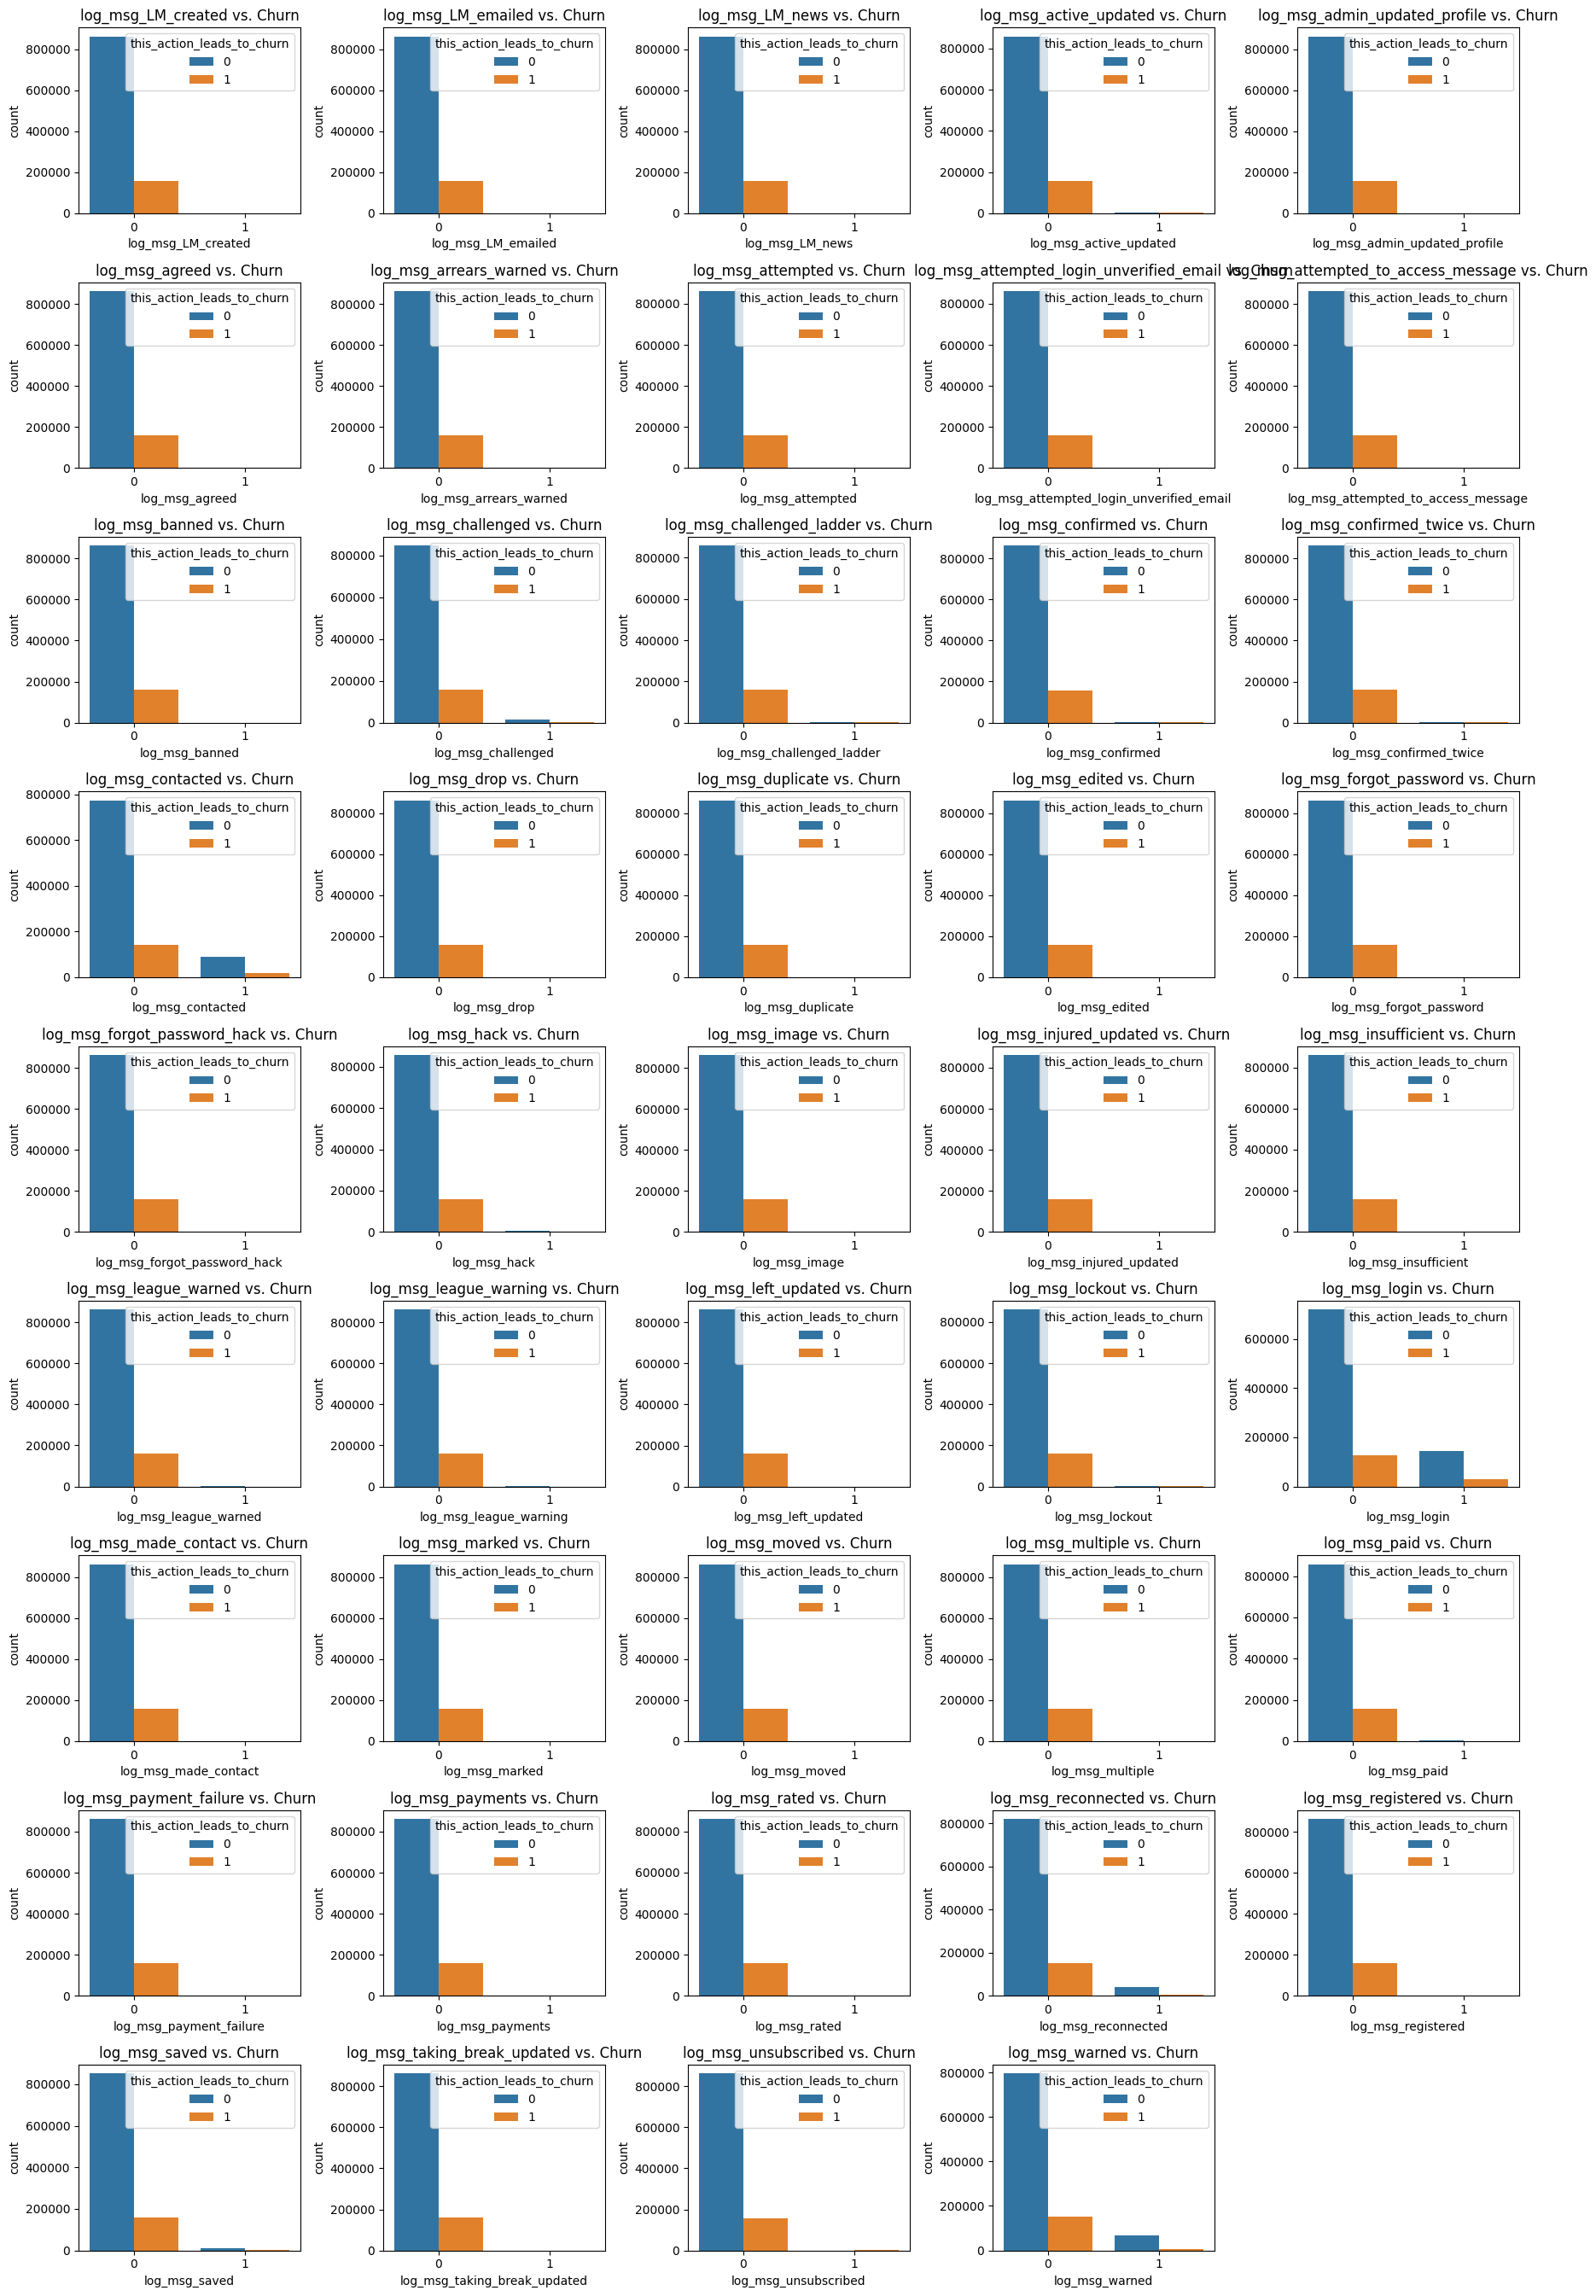

In [123]:
#Analyze relationship between categorical features and this_action_leads_to_churn in apccg_final_df
#2nd batch of categorical
import seaborn as sns
import matplotlib.pyplot as plt

# List of categorical columns
categorical_cols = [
    'log_msg_LM_created',
    'log_msg_LM_emailed',
    'log_msg_LM_news',
    'log_msg_active_updated',
    'log_msg_admin_updated_profile',
    'log_msg_agreed',
    'log_msg_arrears_warned',
    'log_msg_attempted',
    'log_msg_attempted_login_unverified_email',
    'log_msg_attempted_to_access_message',
    'log_msg_banned',
    'log_msg_challenged',
    'log_msg_challenged_ladder',
    'log_msg_confirmed',
    'log_msg_confirmed_twice',
    'log_msg_contacted',
    'log_msg_drop',
    'log_msg_duplicate',
    'log_msg_edited',
    'log_msg_forgot_password',
    'log_msg_forgot_password_hack',
    'log_msg_hack',
    'log_msg_image',
    'log_msg_injured_updated',
    'log_msg_insufficient',
    'log_msg_league_warned',
    'log_msg_league_warning',
    'log_msg_left_updated',
    'log_msg_lockout',
    'log_msg_login',
    'log_msg_made_contact',
    'log_msg_marked',
    'log_msg_moved',
    'log_msg_multiple',
    'log_msg_paid',
    'log_msg_payment_failure',
    'log_msg_payments',
    'log_msg_rated',
    'log_msg_reconnected',
    'log_msg_registered',
    'log_msg_saved',
    'log_msg_taking_break_updated',
    'log_msg_unsubscribed',
    'log_msg_warned'
]

# Set the maximum number of columns per row
max_columns_per_row = 5

# Calculate the number of rows and columns for subplots
num_columns = min(max_columns_per_row, len(categorical_cols))
num_rows = (len(categorical_cols) - 1) // num_columns + 1

# Create subplots for bar plots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(18, 3 * num_rows))

# Iterate through categorical columns and create bar plots
for i, col in enumerate(categorical_cols):
    row = i // num_columns
    col_index = i % num_columns
    ax = axes[row, col_index]
    sns.countplot(data=apccg_final_df, x=col, hue="this_action_leads_to_churn", ax=ax)
    ax.set_title(f"{col} vs. Churn")

# Remove empty subplots
for i in range(len(categorical_cols), num_rows * num_columns):
    fig.delaxes(axes[i // num_columns, i % num_columns])

plt.tight_layout()
plt.show()

Interpretation: Most of these one-hot encoded categories from the activity log message were 0. There were only a few with noticable =1 bars; log_msg_warned, log_msg_reconnected and log_msg_login and log_msg_contacted. All show if the category was =1, then the this_action_leads_to_churn was far more likely to be 0 than 1. This makes sense. Anyone who was warned about non-payment of fees, spent long enough ont the website to need a reconnection, logged in, or contacted the league manager had shown some degree of engagement. Hence they were less likely to have this_action_leads_to_churn=1.

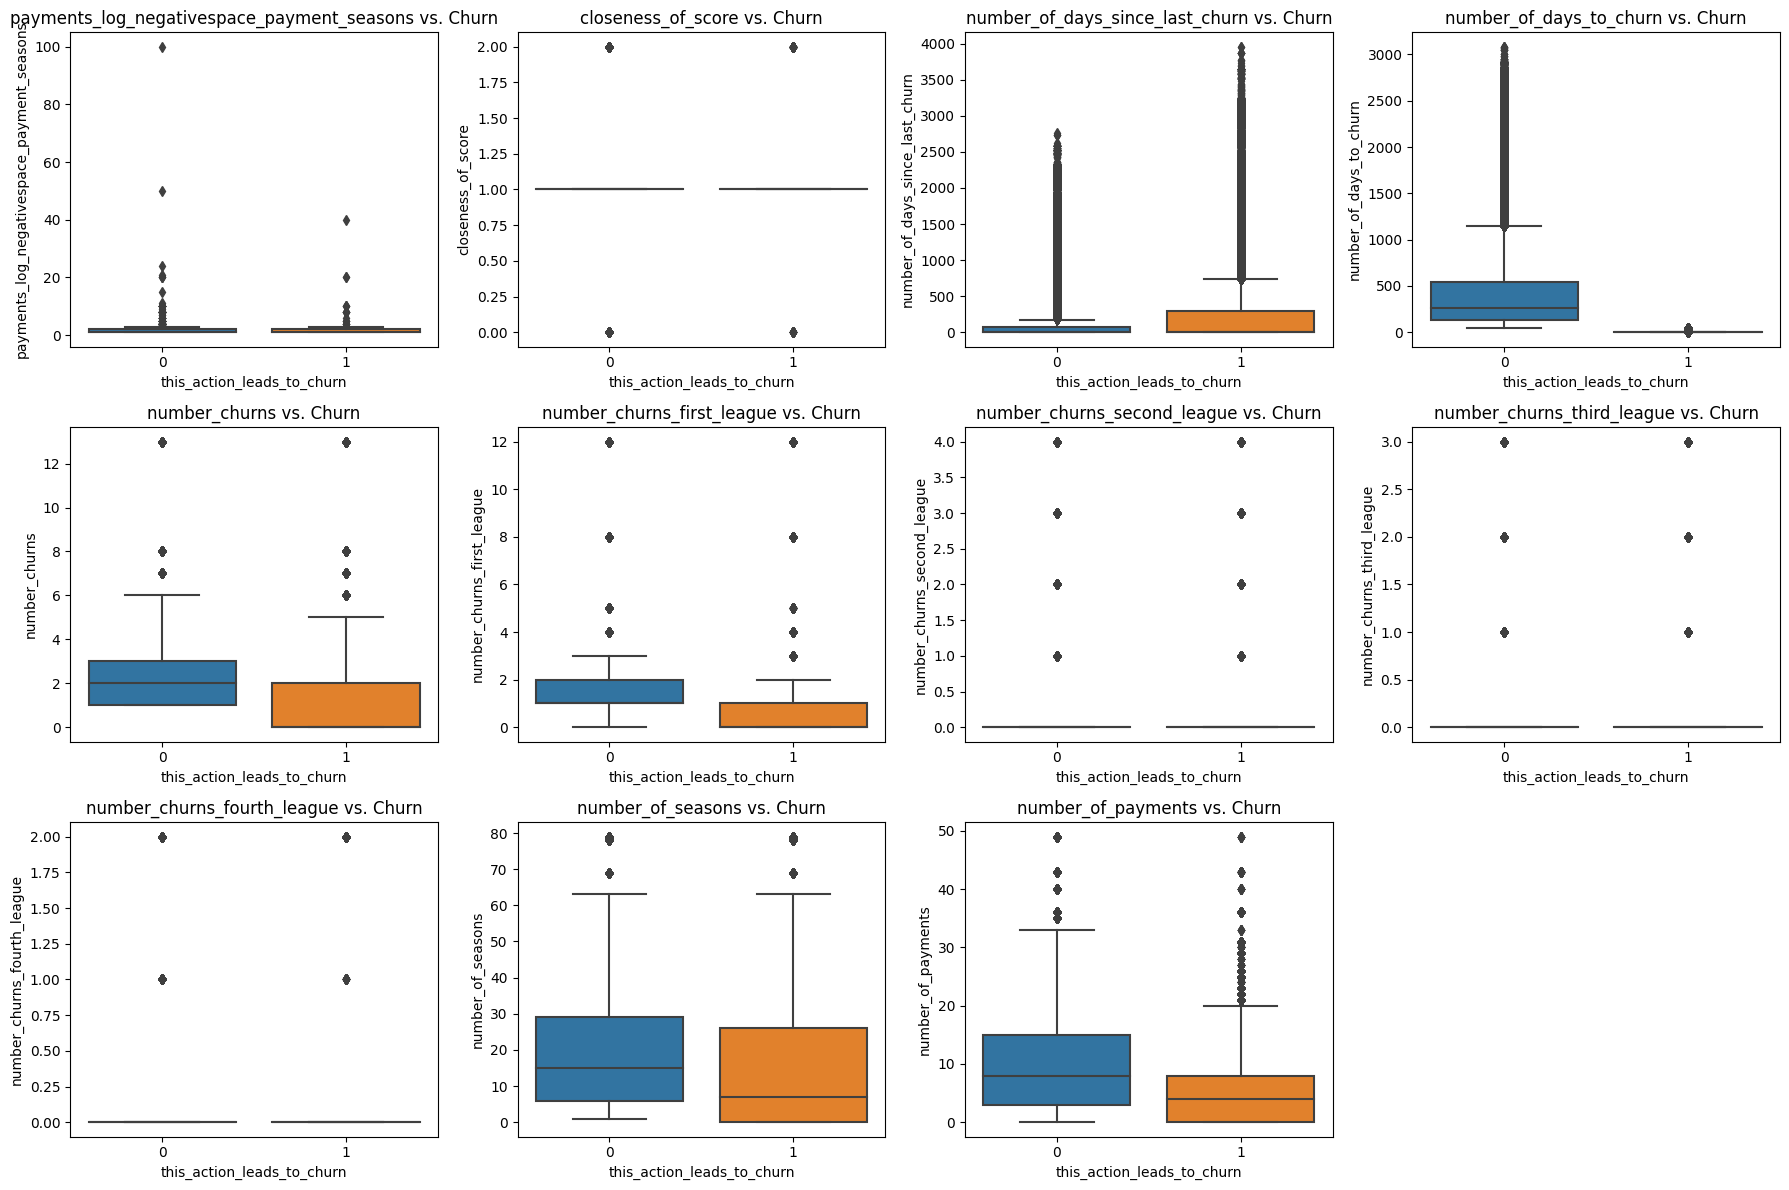

In [79]:
##Analyze relationship between numerical features and this_action_leads_to_churn in apccg_final_df
import seaborn as sns
import matplotlib.pyplot as plt

# List of numerical columns
numerical_columns = [
    'payments_log_negativespace_payment_seasons',
    'closeness_of_score',
    'number_of_days_since_last_churn',
    'number_of_days_to_churn',
    'number_churns',
    'number_churns_first_league',
    'number_churns_second_league',
    'number_churns_third_league',
    'number_churns_fourth_league',
    'number_of_seasons',
    'number_of_payments',
]

# Create subplots for box plots
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(18, 12))

# Iterate through numerical columns and create box plots
for i, col in enumerate(numerical_columns):
    row = i // 4
    col_index = i % 4
    ax = axes[row, col_index]
    sns.boxplot(data=apccg_final_df, x="this_action_leads_to_churn", y=col, ax=ax)
    ax.set_title(f"{col} vs. Churn")

# Remove empty subplots
for i in range(len(numerical_columns), 12):
    fig.delaxes(axes[i // 4, i % 4])

plt.tight_layout()
plt.show()


Interpretation: There is a slight inclination of larger number_of_payments, number_of_seasons, number_of_churns_first_league, number_churns to indicate more likelihood of this_action_leads_to_churn=1.

Random Forest Classifier

In [81]:
#Imputation to fill missing data in apccg_final_df
#use mean for numerical and mode for categorical features
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Assuming df is your DataFrame with NaN values
# Separate features and target variable
X = apccg_final_df.drop(['this_action_leads_to_churn'], axis=1)
y = apccg_final_df['this_action_leads_to_churn']

# Impute missing values for numerical features (mean imputation)
numerical_columns = [
    'payments_log_negativespace_payment_seasons',
    'closeness_of_score',
    'number_of_days_since_last_churn',
    'number_of_days_to_churn',
    'number_churns',
    'number_churns_first_league',
    'number_churns_second_league',
    'number_churns_third_league',
    'number_churns_fourth_league',
    'number_of_seasons',
    'number_of_payments',
]
X[numerical_columns] = SimpleImputer(strategy='mean').fit_transform(X[numerical_columns])

# Impute missing values for categorical features (mode imputation)
categorical_cols = [
    'Played_a_game',
    'Received_inputted_game',
    'Inputted_game_result',
    'comm_read',
    'Involved_in_Comms',
    'Received_comms',
    'player_paid_for_at_least_one_season',
    'ever_churned',
    'info_exists_game_id',
    'info_exists_season_id',
    'info_exists_division_id',
    'info_exists_winner_id',
    'info_exists_score',
    'info_exists_Played_a_game',
    'info_exists_Received_inputted_game',
    'info_exists_Inputted_game_result',
    'info_exists_game_player_id',
    'info_exists_challenge_id',
    'info_exists_challenger_id',
    'info_exists_challengee_id',
    'info_exists_challenge_status',
    'info_exists_challenge_type',
    'info_exists_comm_id',
    'info_exists_comm_thread',
    'info_exists_comm_send',
    'info_exists_comm_read',
    'info_exists_Involved_in_Comms',
    'info_exists_Received_comms',
    'info_exists_activity_log_log_id',
    'info_exists_payments_log_negativespace_payment_id',
    'info_exists_payments_log_negativespace_payment_seasons',
    'info_exists_scoring_system',
    'info_exists_closeness_of_score',
    'won_game',
    'lost_game',
    'played_in_one_league',
    'played_in_two_leagues',
    'played_in_three_leagues',
    'played_in_four_leagues'
]

X[categorical_cols] = SimpleImputer(strategy='most_frequent').fit_transform(X[categorical_cols])

# Convert the date column to datetime format
apccg_final_df['date'] = pd.to_datetime(apccg_final_df['date'])




In [87]:
#Need to exclude the 'date' column and the activity_log_log_msg column and season_id and division_id from
#X_train dataset when applying SMOTE, as the 'date' column is not relevant for the oversampling process,
#and the activity_log_log_msg column contains non-numerical data
from imblearn.over_sampling import SMOTE

# Exclude the datetime columns from X_train
datetime_columns = ['date']  # Replace with the actual list of datetime columns
# X_train = X_train.drop(datetime_columns, axis=1)
X_test = X_test.drop(datetime_columns, axis=1)

oversample = SMOTE(k_neighbors=5)
X_smote, y_smote = oversample.fit_resample(X_train, y_train)
X_train, y_train = X_smote, y_smote

# Check the number of samples in each class to ensure balance
y_train.value_counts()



1    677904
0    677904
Name: this_action_leads_to_churn, dtype: int64

Interpretation: Now the y target variable is balanced in the y train dataframe. The training dataset is now balanced.



In [88]:
# build a random forest classifier to predict customer churn
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=46)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=46)

In [89]:
#evaluate the model predictions on the test dataset
from sklearn.metrics import accuracy_score

# # Exclude the datetime columns from X_test
# datetime_columns = ['date']  # Replace with the actual list of datetime columns
# X_test = X_test.drop(datetime_columns, axis=1)

# Now, you can proceed with prediction
preds = rf.predict(X_test)



preds = rf.predict(X_test)
print(accuracy_score(preds,y_test))

1.0


Interpretation: This perfect score means the predictions are 100% accurate, which is suspicious.

In [96]:
#Random Forest Classifier for by_player_by_season__final_df
#Imputation to fill missing data in by_player_by_season__final_df
from sklearn.impute import SimpleImputer

# Define the columns for categorical and numerical features
categorical_cols = [
    'received_no_opponent_email_or_challenge',
    'entered_game_result_that_season',
    'is_included_in_leagues_next_season',
    'unplaying_appeal_to_remain',
    'churn'
]

numerical_cols = [
    'churn_count_from_this_league',
    'days_since_joined_this_league',
    'churn_days_this_league',
    'ratio_churned_to_included_this_league',
    'number_of_sent_challenges_to_opponent',
    'number_of_games_this_season',
    'number_of_sent_email_this_season_to_an_opponent',
    'number_emails_received_from_opponent',
    'number_received_challenges_from_opponent',
    'number_received_challenges_resulting_in_game',
    'number_received_emails_resulting_in_game',
    'number_sent_challenges_or_comms_to_opponent',
    'number_sent_challenges_or_comms_that_resulted_in_game',
    'number_of_seasons_player_has_been_in',
    'number_of_seasons_player_has_played_in_before_this',
    'number_of_payments',
    'fraction_games_w_max_closeness',
    'dict_activities_length',
    'no_of_logins_this_season',
    'number_of_seasons',
    'closeness_score_total_for_games_this_season',
    'number_of_days_since_last_churn',
    'number_of_days_to_churn'
]

# Impute missing values for categorical features with the most frequent value (mode)
imputer_categorical = SimpleImputer(strategy='most_frequent')
by_player_by_season_final_df[categorical_cols] = imputer_categorical.fit_transform(by_player_by_season_final_df[categorical_cols])

# Impute missing values for numerical features with the mean
imputer_numerical = SimpleImputer(strategy='mean')
by_player_by_season_final_df[numerical_cols] = imputer_numerical.fit_transform(by_player_by_season_final_df[numerical_cols])

# Convert the date column to datetime format
by_player_by_season_final_df['season_end_date'] = pd.to_datetime(by_player_by_season_final_df['season_end_date'])

# Define the split date
split_date = pd.to_datetime('2019-01-01')

# Split the dataset into training and testing sets based on the split date
#The split date is New Year's Day 2019
X_train = by_player_by_season_final_df[by_player_by_season_final_df['season_end_date'] < split_date]
X_test = by_player_by_season_final_df[by_player_by_season_final_df['season_end_date'] >= split_date]
y_train = X_train['this_season_leads_to_churn']
y_test = X_test['this_season_leads_to_churn']


#oversample the training dataset


In [97]:
#After using date for split, get rid of this now useless feature
from imblearn.over_sampling import SMOTE

# Identify and exclude datetime columns from your feature set if they are not needed
datetime_columns = ['season_start_date', 'season_end_date']  # Replace with your datetime columns

# Drop datetime columns from X_train
X_train = X_train.drop(datetime_columns, axis=1)

# Drop the same datetime columns from X_test
X_test = X_test.drop(datetime_columns, axis=1)


# Apply SMOTE
oversample = SMOTE(k_neighbors=5)
X_smote, y_smote = oversample.fit_resample(X_train, y_train)
X_train, y_train = X_smote, y_smote


In [98]:
#check the number of samples in each class to ensure that they are equal:
y_train.value_counts()

0.0    9343
1.0    9343
Name: this_season_leads_to_churn, dtype: int64

The dataset is balanced nicely.

In [99]:
#build a random forest classifier to predict customer churn:

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=46)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=46)

In [100]:
#evaluate the model predictions on the test dataset:

from sklearn.metrics import accuracy_score

preds = rf.predict(X_test)
print(accuracy_score(preds,y_test))

1.0


Also suspicious

In [142]:
#Drop id columns from dataframes
id_columns = [
    'game_id',
    'challenge_id',
    'player_id',
    'comm_id',
    'activity_log_log_id',
    'payments_log_negativespace_payment_id'
]

apccg_final_wo_id_df = apccg_final_df.drop(columns=id_columns)

Feature Importances:
                            Feature    Importance
0                     Played_a_game  2.768276e-05
1            Received_inputted_game  3.260050e-06
2              Inputted_game_result  1.816186e-05
3                         comm_read  7.808663e-04
4                 Involved_in_Comms  9.591275e-04
..                              ...           ...
94             log_msg_unsubscribed  2.836168e-04
95                   log_msg_warned  4.670088e-04
96  scoring_system_11_point_scoring  2.020284e-07
97  scoring_system_15_point_scoring  1.812983e-05
98   scoring_system_9_point_scoring  5.492841e-06

[99 rows x 2 columns]

Printing predicted and actual values:
 [[1 1]
 [1 1]
 [1 1]
 ...
 [1 1]
 [1 1]
 [1 1]]

Mean Squared Error: 0.0

R2 Score: 1.0


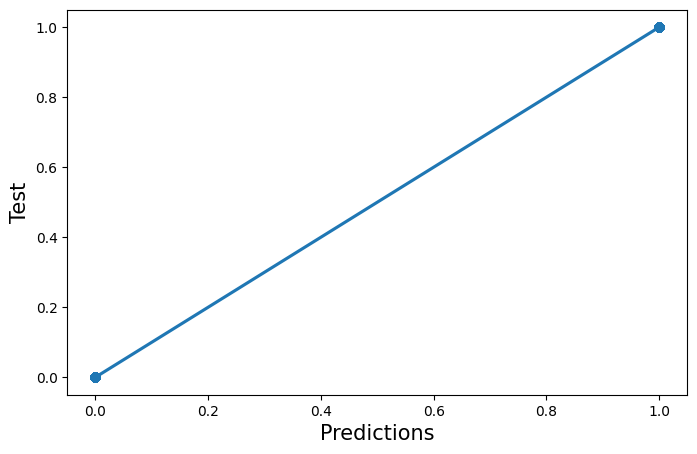

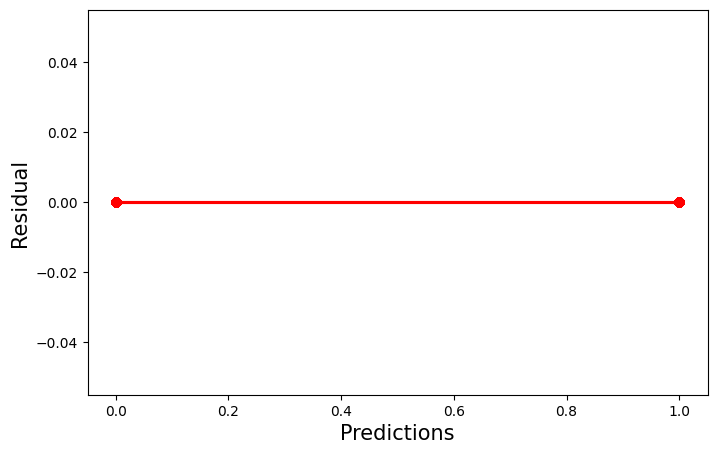

Model Coefficients:
                            Feature   Coefficient
0                     Played_a_game  3.071939e-14
1            Received_inputted_game  1.487027e-14
2              Inputted_game_result  1.633546e-14
3                         comm_read -9.168014e-15
4                 Involved_in_Comms  4.843695e-14
..                              ...           ...
94             log_msg_unsubscribed -1.075052e-14
95                   log_msg_warned -3.122502e-16
96  scoring_system_11_point_scoring -5.556319e-14
97  scoring_system_15_point_scoring  5.842332e-15
98   scoring_system_9_point_scoring -1.281911e-13

[99 rows x 2 columns]
Intercept: -1.056932319443149e-13

Printing predicted and actual values from sklearn:
 [[1. 1.]
 [1. 1.]
 [1. 1.]
 ...
 [1. 1.]
 [1. 1.]
 [1. 1.]]

Mean Squared Error: 2.261580386466984e-27

R2 Score: 1.0


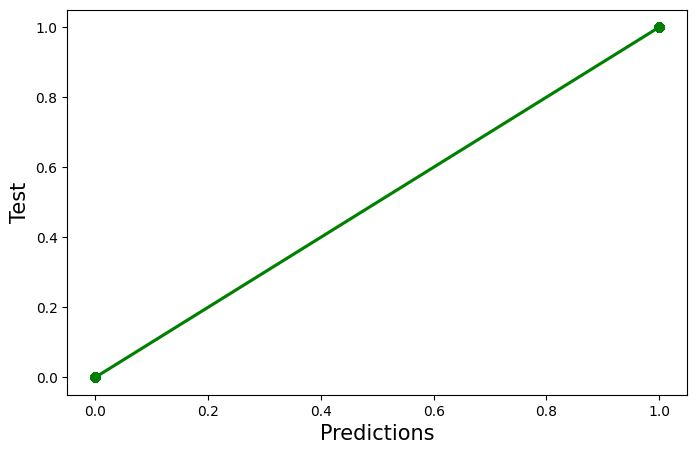

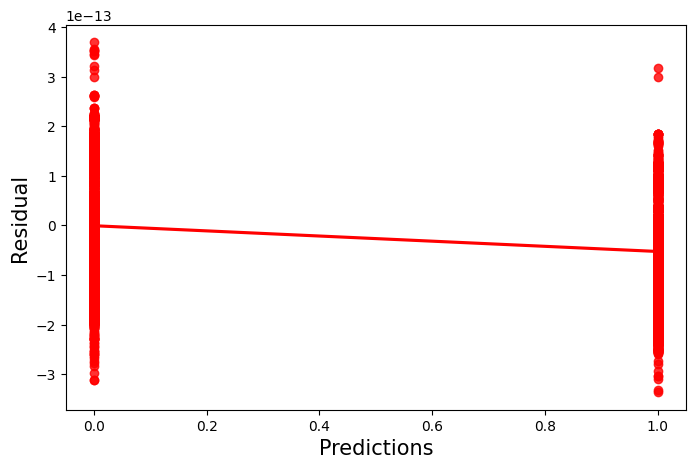

In [147]:
#Random Forest and Linear Regression on apccg_final_df
# Starting with imports
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns


# Define the split date
split_date = pd.to_datetime('2019-01-01')

# # Filter data based on the split date
# X_train = by_player_by_season_final_df[by_player_by_season_final_df['season_end_date'] < split_date]
# X_test = by_player_by_season_final_df[by_player_by_season_final_df['season_end_date'] >= split_date]
# y_train = by_player_by_season_final_df[by_player_by_season_final_df['season_end_date'] < split_date]['this_season_leads_to_churn']
# y_test = by_player_by_season_final_df[by_player_by_season_final_df['season_end_date'] >= split_date]['this_season_leads_to_churn']


# Split the dataset into training and testing sets based on the split date
X_train = apccg_final_wo_id_df[apccg_final_wo_id_df['date'] < split_date]
X_test = apccg_final_wo_id_df[apccg_final_wo_id_df['date'] >= split_date]
y_train = X_train['this_action_leads_to_churn']
y_test = X_test['this_action_leads_to_churn']

#Drop the now not needed 'date' column
X_train = X_train.drop('date', axis=1)
X_test = X_test.drop('date', axis=1)



# Define a function to create a Random Forest Model
def get_rf_model(y_train, X_train, X_test):
    rf = RandomForestClassifier()
    figsize = (8, 5)
    model = rf.fit(X_train, y_train)

    # Print feature importances
    feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': model.feature_importances_})
    print('Feature Importances:')
    print(feature_importances)

    y_hat = model.predict(X_test)

    # Print predicted and actual values
    arr = np.c_[y_hat, y_test]
    print('\nPrinting predicted and actual values:\n', arr)

    # Print Mean Squared Error
    mse = mean_squared_error(y_test, y_hat)
    print('\nMean Squared Error:', mse)

    # Print R2 Score
    r2 = r2_score(y_test, y_hat)
    print('\nR2 Score:', r2)

    # Plot predictions vs. actual values
    fix, ax = plt.subplots(figsize=figsize)
    g = sns.regplot(y=y_test, x=y_hat, ax=ax)
    g.set_xlabel("Predictions", fontsize=15)
    g.set_ylabel("Test", fontsize=15)
    plt.show()

    # Plot residuals
    fix, ax = plt.subplots(figsize=figsize)
    g = sns.regplot(x=y_hat, y=y_test - y_hat, color="red", ax=ax)
    g.set_xlabel("Predictions", fontsize=15)
    g.set_ylabel("Residual", fontsize=15)
    plt.show()

    return model, arr

# Define a function to create a Linear Regression Model
def get_lr_model(y_train, X_train, X_test):
    model = LinearRegression()
    figsize = (8, 5)
    model.fit(X_train, y_train)

    # Print model coefficients and intercept
    coefficients = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': model.coef_})
    intercept = model.intercept_
    print('Model Coefficients:')
    print(coefficients)
    print('Intercept:', intercept)

    y_pred = model.predict(X_test)

    # Print predicted and actual values
    arr = np.c_[y_pred, y_test]
    print('\nPrinting predicted and actual values from sklearn:\n', arr)

    # Print Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)
    print('\nMean Squared Error:', mse)

    # Print R2 Score
    r2 = r2_score(y_test, y_pred)
    print('\nR2 Score:', r2)

    # Plot predictions vs. actual values
    fix, ax = plt.subplots(figsize=figsize)
    g = sns.regplot(y=y_test, x=y_pred, color="g", ax=ax)
    g.set_xlabel("Predictions", fontsize=15)
    g.set_ylabel("Test", fontsize=15)
    plt.show()

    # Plot residuals
    fix, ax = plt.subplots(figsize=figsize)
    g = sns.regplot(x=y_pred, y=y_test - y_pred, color="red", ax=ax)
    g.set_xlabel("Predictions", fontsize=15)
    g.set_ylabel("Residual", fontsize=15)
    plt.show()

    return model, coefficients, intercept


# Assuming you have already prepared your X_train, X_test, y_train, and y_test
# Run random forest model
model_rf, arr_rf = get_rf_model(y_train, X_train, X_test)

# Assuming you have already prepared your X_train_ and X_test_ for linear regression
# Run linear regression model
model_lr, arr_lr, intercept_lr = get_lr_model(y_train, X_train, X_test)





Interpretation: There was perfect predictions. I think this is down to data leakage from the features used to train (including number_of_days_since_last_churn number_of_days_to_churn) and the y. These will be removed.

In [152]:
#Try 2
#Drop extra columns from dataframes

columns_to_drop = ["number_of_days_since_last_churn", "number_of_days_to_churn"]
apccg_final_wo_days_to_churn_df = apccg_final_wo_id_df.drop(columns=columns_to_drop, axis=1)


Feature Importances:
                            Feature  Importance
0                     Played_a_game    0.000057
1            Received_inputted_game    0.000057
2              Inputted_game_result    0.000026
3                         comm_read    0.002470
4                 Involved_in_Comms    0.002283
..                              ...         ...
91             log_msg_unsubscribed    0.001928
92                   log_msg_warned    0.002553
93  scoring_system_11_point_scoring    0.000003
94  scoring_system_15_point_scoring    0.000086
95   scoring_system_9_point_scoring    0.000031

[96 rows x 2 columns]

Printing predicted and actual values:
 [[1 1]
 [1 1]
 [1 1]
 ...
 [1 1]
 [1 1]
 [1 1]]

Mean Squared Error: 0.1462437223803116

R2 Score: 0.3301107487474758


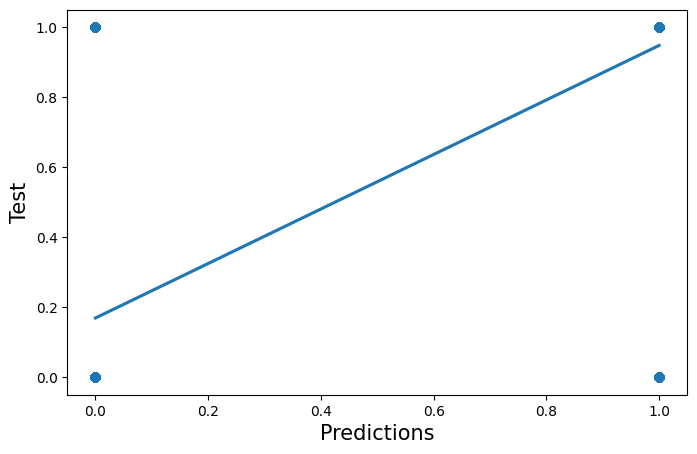

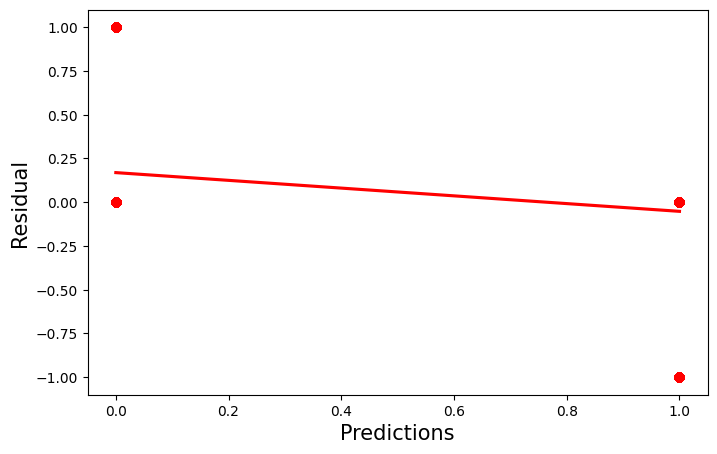

Model Coefficients:
                            Feature   Coefficient
0                     Played_a_game  1.124947e-02
1            Received_inputted_game -2.035231e+08
2              Inputted_game_result -1.857345e+09
3                         comm_read -2.007669e+09
4                 Involved_in_Comms -7.499812e+09
..                              ...           ...
91             log_msg_unsubscribed -6.921017e+07
92                   log_msg_warned -6.921017e+07
93  scoring_system_11_point_scoring -6.639335e+09
94  scoring_system_15_point_scoring -6.639335e+09
95   scoring_system_9_point_scoring -6.639335e+09

[96 rows x 2 columns]
Intercept: 9417939818.547174

Printing predicted and actual values from sklearn:
 [[0.21025848 1.        ]
 [0.21025848 1.        ]
 [0.21025848 1.        ]
 ...
 [0.95806885 1.        ]
 [0.93733025 1.        ]
 [0.93673515 1.        ]]

Mean Squared Error: 4.730673390764644e+18

R2 Score: -2.166949257089072e+19


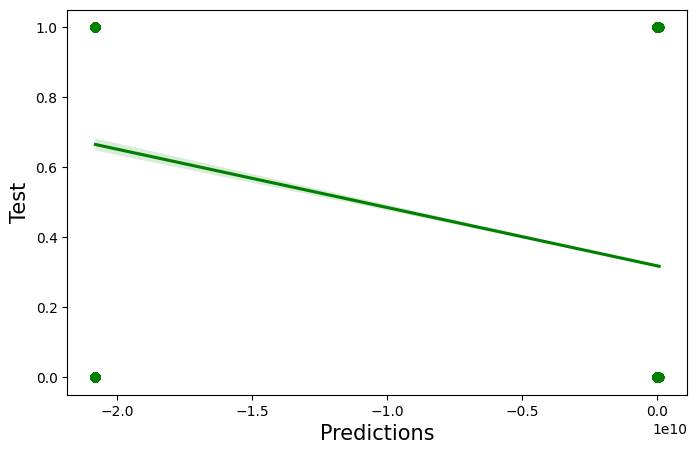

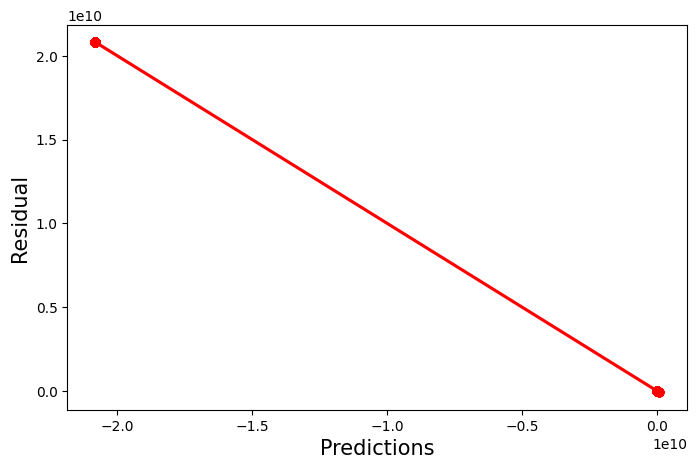

In [153]:
#Try 2

#Random Forest and Linear Regression on apccg_final_wo_days_to_churn_df
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Define the split date
split_date = pd.to_datetime('2019-01-01')

# Split the dataset into training and testing sets based on the split date
X_train = apccg_final_wo_days_to_churn_df[apccg_final_wo_days_to_churn_df['date'] < split_date]
X_test = apccg_final_wo_days_to_churn_df[apccg_final_wo_days_to_churn_df['date'] >= split_date]
y_train = X_train['this_action_leads_to_churn']
y_test = X_test['this_action_leads_to_churn']

# Drop the 'date' and 'this_action_leads_to_churn' columns from X_train and X_test
X_train = X_train.drop(['date', 'this_action_leads_to_churn'], axis=1)
X_test = X_test.drop(['date', 'this_action_leads_to_churn'], axis=1)

# Define a function to create a Random Forest Model
def get_rf_model(y_train, X_train, X_test):
    rf = RandomForestClassifier()
    figsize = (8, 5)
    model = rf.fit(X_train, y_train)

    # Print feature importances
    feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': model.feature_importances_})
    print('Feature Importances:')
    print(feature_importances)

    y_hat = model.predict(X_test)

    # Print predicted and actual values
    arr = np.c_[y_hat, y_test]
    print('\nPrinting predicted and actual values:\n', arr)

    # Print Mean Squared Error
    mse = mean_squared_error(y_test, y_hat)
    print('\nMean Squared Error:', mse)

    # Print R2 Score
    r2 = r2_score(y_test, y_hat)
    print('\nR2 Score:', r2)

    # Plot predictions vs. actual values
    fix, ax = plt.subplots(figsize=figsize)
    g = sns.regplot(y=y_test, x=y_hat, ax=ax)
    g.set_xlabel("Predictions", fontsize=15)
    g.set_ylabel("Test", fontsize=15)
    plt.show()

    # Plot residuals
    fix, ax = plt.subplots(figsize=figsize)
    g = sns.regplot(x=y_hat, y=y_test - y_hat, color="red", ax=ax)
    g.set_xlabel("Predictions", fontsize=15)
    g.set_ylabel("Residual", fontsize=15)
    plt.show()

    return model, arr

# Define a function to create a Linear Regression Model
def get_lr_model(y_train, X_train, X_test):
    model = LinearRegression()
    figsize = (8, 5)
    model.fit(X_train, y_train)

    # Print model coefficients and intercept
    coefficients = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': model.coef_})
    intercept = model.intercept_
    print('Model Coefficients:')
    print(coefficients)
    print('Intercept:', intercept)

    y_pred = model.predict(X_test)

    # Print predicted and actual values
    arr = np.c_[y_pred, y_test]
    print('\nPrinting predicted and actual values from sklearn:\n', arr)

    # Print Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)
    print('\nMean Squared Error:', mse)

    # Print R2 Score
    r2 = r2_score(y_test, y_pred)
    print('\nR2 Score:', r2)

    # Plot predictions vs. actual values
    fix, ax = plt.subplots(figsize=figsize)
    g = sns.regplot(y=y_test, x=y_pred, color="g", ax=ax)
    g.set_xlabel("Predictions", fontsize=15)
    g.set_ylabel("Test", fontsize=15)
    plt.show()

    # Plot residuals
    fix, ax = plt.subplots(figsize=figsize)
    g = sns.regplot(x=y_pred, y=y_test - y_pred, color="red", ax=ax)
    g.set_xlabel("Predictions", fontsize=15)
    g.set_ylabel("Residual", fontsize=15)
    plt.show()

    return model, coefficients, intercept

# Assuming you have already prepared your X_train, X_test, y_train, and y_test
# Run random forest model
model_rf, arr_rf = get_rf_model(y_train, X_train, X_test)

# Assuming you have already prepared your X_train and X_test for linear regression
# Run linear regression model
model_lr, arr_lr, intercept_lr = get_lr_model(y_train, X_train, X_test)


In [154]:
#Feature importance from apccg_df
# Assuming you have a trained RandomForestClassifier model (model_rf)

# Get feature importances from the model
feature_importances = model_rf.feature_importances_

# Get the list of feature names
feature_names = X_train.columns

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the sorted feature importances
print("Feature Importances:")
print(feature_importance_df)


Feature Importances:
                                Feature    Importance
47                    number_of_seasons  2.146513e-01
42                        number_churns  1.904234e-01
9                          ever_churned  1.693657e-01
43           number_churns_first_league  1.020307e-01
48                   number_of_payments  8.796345e-02
..                                  ...           ...
54                       log_msg_agreed  1.833118e-07
58  log_msg_attempted_to_access_message  1.441425e-07
68              log_msg_forgot_password  1.183283e-07
88                   log_msg_registered  0.000000e+00
71                        log_msg_image  0.000000e+00

[96 rows x 2 columns]


In [155]:
# Set the Pandas option to display all rows
pd.set_option("display.max_rows", None)

# Print the sorted feature importances
print("Feature Importances:")
print(feature_importance_df)


Feature Importances:
                                              Feature    Importance
47                                  number_of_seasons  2.146513e-01
42                                      number_churns  1.904234e-01
9                                        ever_churned  1.693657e-01
43                         number_churns_first_league  1.020307e-01
48                                 number_of_payments  8.796345e-02
38                               played_in_one_league  6.590073e-02
44                        number_churns_second_league  3.119781e-02
7                 player_paid_for_at_least_one_season  2.745473e-02
39                              played_in_two_leagues  2.487598e-02
11                              info_exists_season_id  2.171632e-02
12                            info_exists_division_id  1.674835e-02
25                            info_exists_comm_thread  3.205240e-03
31                   info_exists_activity_log_log_msg  3.129096e-03
30                    info_

In [156]:
# Save the feature importances to a CSV file with column names
feature_importance_df.to_csv("feature_importances.csv", index=False, header=["Feature", "Importance score"])


In [159]:
#by_player_by_season_df
#Drop id columns from dataframes
id_columns = [
    'division_player_id',
    'division_id',
    'player_id',
    'season_id',
    'league_id'
]

by_player_by_season_df_wo_id_df = by_player_by_season_final_df.drop(columns=id_columns)

In [162]:
#Random Forest and Linear Regression on by_player_by_season_df_wo_id_df
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Define the split date
split_date = pd.to_datetime('2019-01-01')

# Split the dataset into training and testing sets based on the split date
X_train = by_player_by_season_df_wo_id_df[by_player_by_season_df_wo_id_df['season_end_date'] < split_date]
X_test = by_player_by_season_df_wo_id_df[by_player_by_season_df_wo_id_df['season_end_date'] >= split_date]
y_train = X_train['this_season_leads_to_churn']
y_test = X_test['this_season_leads_to_churn']

# Drop the 'season_start_date', 'season_end_date' and 'this_season_leads_to_churn' columns from X_train and X_test
X_train = X_train.drop(['season_start_date','season_end_date', 'this_season_leads_to_churn'], axis=1)
X_test = X_test.drop(['season_start_date','season_end_date', 'this_season_leads_to_churn'], axis=1)

# Define a function to create a Random Forest Model
def get_rf_model(y_train, X_train, X_test):
    rf = RandomForestClassifier()
    figsize = (8, 5)
    model = rf.fit(X_train, y_train)

    # Print feature importances
    feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': model.feature_importances_})
    print('Feature Importances:')
    print(feature_importances)

    y_hat = model.predict(X_test)

    # Print predicted and actual values
    arr = np.c_[y_hat, y_test]
    print('\nPrinting predicted and actual values:\n', arr)

    # Print Mean Squared Error
    mse = mean_squared_error(y_test, y_hat)
    print('\nMean Squared Error:', mse)

    # Print R2 Score
    r2 = r2_score(y_test, y_hat)
    print('\nR2 Score:', r2)

    # Plot predictions vs. actual values
    fig, ax = plt.subplots(figsize=figsize)
    g = sns.regplot(y=y_test, x=y_hat, ax=ax)
    g.set_xlabel("Predictions", fontsize=15)
    g.set_ylabel("Test", fontsize=15)
    plt.show()

    # Plot residuals
    fig, ax = plt.subplots(figsize=figsize)
    g = sns.regplot(x=y_hat, y=y_test - y_hat, color="red", ax=ax)
    g.set_xlabel("Predictions", fontsize=15)
    g.set_ylabel("Residual", fontsize=15)
    plt.show()

    return model, arr

# Define a function to create a Linear Regression Model
def get_lr_model(y_train, X_train, X_test):
    model = LinearRegression()
    figsize = (8, 5)
    model.fit(X_train, y_train)

    # Print model coefficients and intercept
    coefficients = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': model.coef_})
    intercept = model.intercept_
    print('Model Coefficients:')
    print(coefficients)
    print('Intercept:', intercept)

    y_pred = model.predict(X_test)

    # Print predicted and actual values
    arr = np.c_[y_pred, y_test]
    print('\nPrinting predicted and actual values from sklearn:\n', arr)

    # Print Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)
    print('\nMean Squared Error:', mse)

    # Print R2 Score
    r2 = r2_score(y_test, y_pred)
    print('\nR2 Score:', r2)

    # Plot predictions vs. actual values
    fig, ax = plt.subplots(figsize=figsize)
    g = sns.regplot(y=y_test, x=y_pred, color="g", ax=ax)
    g.set_xlabel("Predictions", fontsize=15)
    g.set_ylabel("Test", fontsize=15)
    plt.show()

    # Plot residuals
    fig, ax = plt.subplots(figsize=figsize)
    g = sns.regplot(x=y_pred, y=y_test - y_pred, color="red", ax=ax)
    g.set_xlabel("Predictions", fontsize=15)
    g.set_ylabel("Residual", fontsize=15)
    plt.show()

    return model, coefficients, intercept

# Assuming you have already prepared your X_train, X_test, y_train, and y_test
# Run random forest model
model_rf, arr_rf = get_rf_model(y_train, X_train, X_test)

# Assuming you have already prepared your X_train and X_test for linear regression
# Run linear regression model
model_lr, arr_lr, intercept_lr = get_lr_model(y_train, X_train, X_test)


Feature Importances:
                                              Feature  Importance
0                        churn_count_from_this_league    0.021340
1                       days_since_joined_this_league    0.017916
2                              churn_days_this_league    0.024227
3               ratio_churned_to_included_this_league    0.026371
4               number_of_sent_challenges_to_opponent    0.005489
5                         number_of_games_this_season    0.047160
6     number_of_sent_email_this_season_to_an_opponent    0.007072
7                number_emails_received_from_opponent    0.007269
8            number_received_challenges_from_opponent    0.003785
9        number_received_challenges_resulting_in_game    0.003076
10           number_received_emails_resulting_in_game    0.013346
11            received_no_opponent_email_or_challenge    0.000730
12        number_sent_challenges_or_comms_to_opponent    0.005873
13  number_sent_challenges_or_comms_that_resulted_...  

ValueError: ignored

In [164]:
#Fill in NaN with 0
import pandas as pd

# Assuming your dataset is stored in a DataFrame called 'df'
# Replace 'df' with the actual name of your DataFrame
# Check for missing values (NaN) in each column
missing_values = by_player_by_season_df_wo_id_df.isnull().sum()

# Print the columns with missing values
columns_with_missing_values = missing_values[missing_values > 0]
print("Columns with Missing Values:")
print(columns_with_missing_values)

# Assuming your DataFrame is named 'df'
# Replace 'df' with the actual name of your DataFrame

# Fill NaN values in the 'ratio_churned_to_included_this_league' column with 0
by_player_by_season_df_wo_id_df['ratio_churned_to_included_this_league'].fillna(0, inplace=True)



Columns with Missing Values:
ratio_churned_to_included_this_league    130
dtype: int64


Feature Importances:
                                              Feature  Importance
0                        churn_count_from_this_league    0.019541
1                       days_since_joined_this_league    0.017298
2                              churn_days_this_league    0.032384
3               ratio_churned_to_included_this_league    0.030055
4               number_of_sent_challenges_to_opponent    0.003752
5                         number_of_games_this_season    0.030163
6     number_of_sent_email_this_season_to_an_opponent    0.006176
7                number_emails_received_from_opponent    0.009620
8            number_received_challenges_from_opponent    0.004827
9        number_received_challenges_resulting_in_game    0.004077
10           number_received_emails_resulting_in_game    0.018552
11            received_no_opponent_email_or_challenge    0.000739
12        number_sent_challenges_or_comms_to_opponent    0.008112
13  number_sent_challenges_or_comms_that_resulted_...  

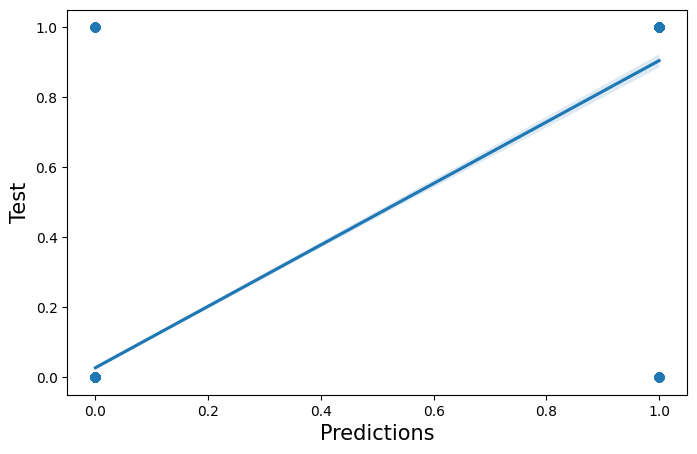

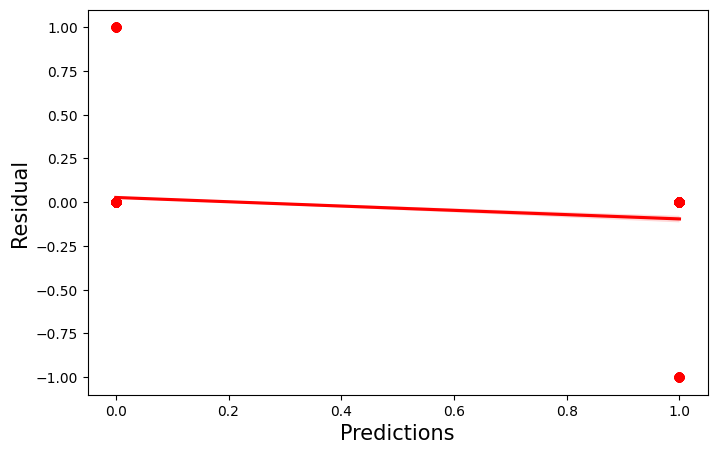

Model Coefficients:
                                              Feature  Coefficient
0                        churn_count_from_this_league    -0.000550
1                       days_since_joined_this_league     0.000111
2                              churn_days_this_league    -0.000200
3               ratio_churned_to_included_this_league     0.574482
4               number_of_sent_challenges_to_opponent     0.000821
5                         number_of_games_this_season     0.000144
6     number_of_sent_email_this_season_to_an_opponent    -0.003954
7                number_emails_received_from_opponent     0.006939
8            number_received_challenges_from_opponent     0.005730
9        number_received_challenges_resulting_in_game    -0.006679
10           number_received_emails_resulting_in_game    -0.000048
11            received_no_opponent_email_or_challenge     0.000578
12        number_sent_challenges_or_comms_to_opponent    -0.003134
13  number_sent_challenges_or_comms_that_r

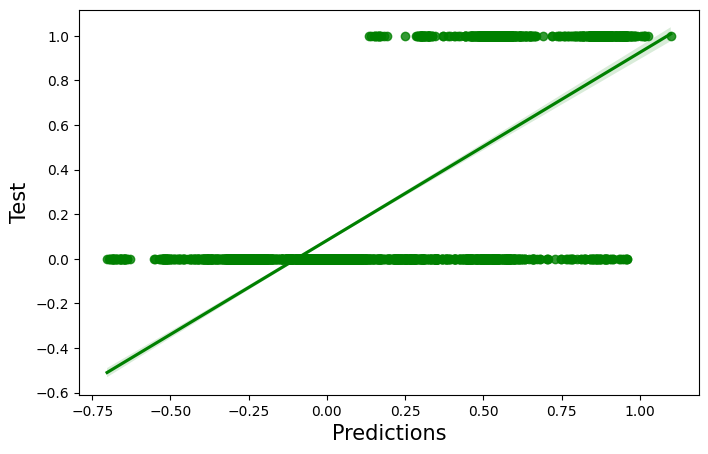

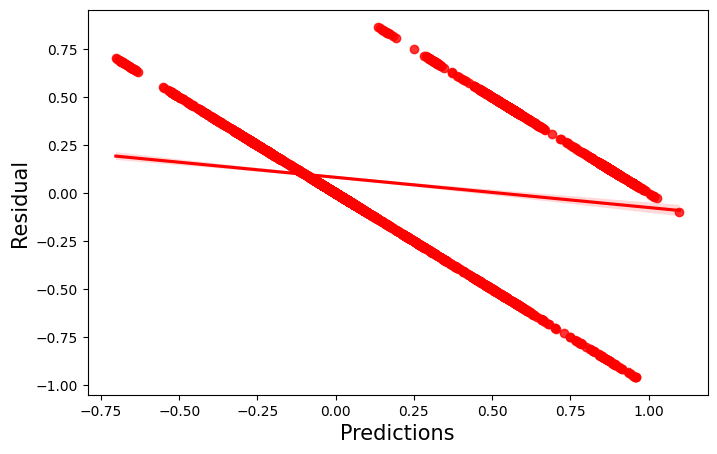

In [165]:
#Try2
#Random Forest and Linear Regression on by_player_by_season_df_wo_id_df
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Define the split date
split_date = pd.to_datetime('2019-01-01')

# Split the dataset into training and testing sets based on the split date
X_train = by_player_by_season_df_wo_id_df[by_player_by_season_df_wo_id_df['season_end_date'] < split_date]
X_test = by_player_by_season_df_wo_id_df[by_player_by_season_df_wo_id_df['season_end_date'] >= split_date]
y_train = X_train['this_season_leads_to_churn']
y_test = X_test['this_season_leads_to_churn']

# Drop the 'season_start_date', 'season_end_date' and 'this_season_leads_to_churn' columns from X_train and X_test
X_train = X_train.drop(['season_start_date','season_end_date', 'this_season_leads_to_churn'], axis=1)
X_test = X_test.drop(['season_start_date','season_end_date', 'this_season_leads_to_churn'], axis=1)

# Define a function to create a Random Forest Model
def get_rf_model(y_train, X_train, X_test):
    rf = RandomForestClassifier()
    figsize = (8, 5)
    model = rf.fit(X_train, y_train)

    # Print feature importances
    feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': model.feature_importances_})
    print('Feature Importances:')
    print(feature_importances)

    y_hat = model.predict(X_test)

    # Print predicted and actual values
    arr = np.c_[y_hat, y_test]
    print('\nPrinting predicted and actual values:\n', arr)

    # Print Mean Squared Error
    mse = mean_squared_error(y_test, y_hat)
    print('\nMean Squared Error:', mse)

    # Print R2 Score
    r2 = r2_score(y_test, y_hat)
    print('\nR2 Score:', r2)

    # Plot predictions vs. actual values
    fig, ax = plt.subplots(figsize=figsize)
    g = sns.regplot(y=y_test, x=y_hat, ax=ax)
    g.set_xlabel("Predictions", fontsize=15)
    g.set_ylabel("Test", fontsize=15)
    plt.show()

    # Plot residuals
    fig, ax = plt.subplots(figsize=figsize)
    g = sns.regplot(x=y_hat, y=y_test - y_hat, color="red", ax=ax)
    g.set_xlabel("Predictions", fontsize=15)
    g.set_ylabel("Residual", fontsize=15)
    plt.show()

    return model, arr

# Define a function to create a Linear Regression Model
def get_lr_model(y_train, X_train, X_test):
    model = LinearRegression()
    figsize = (8, 5)
    model.fit(X_train, y_train)

    # Print model coefficients and intercept
    coefficients = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': model.coef_})
    intercept = model.intercept_
    print('Model Coefficients:')
    print(coefficients)
    print('Intercept:', intercept)

    y_pred = model.predict(X_test)

    # Print predicted and actual values
    arr = np.c_[y_pred, y_test]
    print('\nPrinting predicted and actual values from sklearn:\n', arr)

    # Print Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)
    print('\nMean Squared Error:', mse)

    # Print R2 Score
    r2 = r2_score(y_test, y_pred)
    print('\nR2 Score:', r2)

    # Plot predictions vs. actual values
    fig, ax = plt.subplots(figsize=figsize)
    g = sns.regplot(y=y_test, x=y_pred, color="g", ax=ax)
    g.set_xlabel("Predictions", fontsize=15)
    g.set_ylabel("Test", fontsize=15)
    plt.show()

    # Plot residuals
    fig, ax = plt.subplots(figsize=figsize)
    g = sns.regplot(x=y_pred, y=y_test - y_pred, color="red", ax=ax)
    g.set_xlabel("Predictions", fontsize=15)
    g.set_ylabel("Residual", fontsize=15)
    plt.show()

    return model, coefficients, intercept

# Assuming you have already prepared your X_train, X_test, y_train, and y_test
# Run random forest model
model_rf, arr_rf = get_rf_model(y_train, X_train, X_test)

# Assuming you have already prepared your X_train and X_test for linear regression
# Run linear regression model
model_lr, arr_lr, intercept_lr = get_lr_model(y_train, X_train, X_test)


In [168]:
#Feature importance from by_player_by_season_df
# Assuming you have a trained RandomForestClassifier model (model_rf)

# Get feature importances from the model
feature_importances = model_rf.feature_importances_

# Get the list of feature names
feature_names = X_train.columns

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the sorted feature importances
# print("Feature Importances:")
# print(feature_importance_df)

# Set the Pandas option to display all rows
pd.set_option("display.max_rows", None)

# Print the sorted feature importances
print("Feature Importances:")
print(feature_importance_df)


# Save the feature importances to a CSV file with column names
feature_importance_df.to_csv("feature_importances_from_by_player_by_season_df.csv", index=False, header=["Feature", "Importance score"])


Feature Importances:
                                              Feature  Importance
15                 is_included_in_leagues_next_season    0.260291
26                            number_of_days_to_churn    0.234453
14                    entered_game_result_that_season    0.058150
16                         unplaying_appeal_to_remain    0.052278
23                                  number_of_seasons    0.036848
13  number_sent_challenges_or_comms_that_resulted_...    0.035677
2                              churn_days_this_league    0.032384
24        closeness_score_total_for_games_this_season    0.030879
5                         number_of_games_this_season    0.030163
3               ratio_churned_to_included_this_league    0.030055
20                     fraction_games_w_max_closeness    0.024141
0                        churn_count_from_this_league    0.019541
10           number_received_emails_resulting_in_game    0.018552
18  number_of_seasons_player_has_played_in_before_...  

In [ ]:
#Start time clock running
import time

# Record script start time
script_start_time = time.process_time()